In \[1\]:

    import pandas as pd
    import numpy as np
    import os
    import glob
    import re
    import nltk
    import matplotlib.pyplot as plt
    from collections import Counter
    import math
    #nltk.download('punkt')
    #nltk.download('averaged_perceptron_tagger')

In \[2\]:

    path = "C:\\Users\\Harshal\\Py_DS_ML_Bootcamp-master\\Refactored_Py_DS_ML_Bootcamp-master\\Bits_Pilani\\NLP"
    os.chdir(path)
    df = pd.DataFrame() 
    lines = []
    filename = []
    stories = []
    i=0
    for file in os.listdir():
        # Check whether file is in text format or not
        if file.endswith(".txt"):
            file_path = f"{path}\{file}"
            fileName, fileExtension = os.path.splitext(file_path)
            fn = fileName.split('C:\\Users\\Harshal\\Py_DS_ML_Bootcamp-master\\Refactored_Py_DS_ML_Bootcamp-master\\Bits_Pilani\\NLP\\')
            filename.insert(i,fn[1])
            with open(file_path, 'r') as f:
                lines = f.readlines()
                lines = [line.rstrip() for line in lines]
            stories.insert(i,lines)
            i=i+1
    print(len(filename))
    print(len(stories))
    df=pd.DataFrame({'fileName':filename,'Text': stories})
    print(df)

    12
    12
        fileName                                               Text
    0     13chil  [                                FOR CHILDREN:...
    1    3gables  [:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:...
    2     3lpigs  [                  THE THREE LITTLE PIGS, ,   ...
    3   3sonnets  [, Date:  03-09-89  20:46, From:  Staeorra Rok...
    4   3student  [:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:...
    5    3wishes  [                     THE THREE WISHES, ,    O...
    6     4moons  [                       Four Moons of Death, ,...
    7    5orange  [:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:...
    8   6ablemen  [                               SIX ABLE MEN, ...
    9   6napolen  [:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:...
    10  7oldsamr  [                         THE SEVEN OLD SAMURA...
    11  7voysinb  [                  THE SEVEN VOYAGES OF SINBAD...

In \[3\]:

    df.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 12 entries, 0 to 11
    Data columns (total 2 columns):
     #   Column    Non-Null Count  Dtype 
    ---  ------    --------------  ----- 
     0   fileName  12 non-null     object
     1   Text      12 non-null     object
    dtypes: object(2)
    memory usage: 320.0+ bytes

# Remove the punctuations. the special characters and convert the text to lower case. (2 Mark)<a href="#Remove-the-punctuations.-the-special-characters-and-convert-the-text-to-lower-case.--------(2-Mark)" class="anchor-link">¶</a>

In \[4\]:

    df['Text'] = df['Text'].astype('str') 

In \[5\]:

    df['Text'] = df['Text'].apply(lambda x:x.lower())

In \[6\]:

    df['Text'] = df['Text'].apply(lambda s:re.sub("[\[\]\\\()\{}\''\":=,-.^*+?$@&!\d{1}]","",s))

In \[7\]:

    df['Text'] = df['Text'].apply(lambda s:re.sub(" +", " ",s))

In \[8\]:

    df['Text'] = df['Text'].apply(lambda s:s.strip())

In \[9\]:

    df['Text'] = df['Text'].apply(lambda s:s.rstrip())

# Remove Stopwords (1 Mark)<a href="#Remove-Stopwords-(1-Mark)" class="anchor-link">¶</a>

In \[10\]:

    from nltk.corpus import stopwords
    #nltk.download('stopwords')

    sw_list = stopwords.words('english')

    df['Text'] = df['Text'].apply(lambda x: [item for item in x.split() if item not in sw_list]).apply(lambda x:" ".join(x))

In \[11\]:

    df['Text'] = df['Text'].apply(lambda s:s.strip())

In \[12\]:

    len(df['Text'])

Out\[12\]:

    12

# create bigrams for the entire dataset and list down 10 most frequent bigrams. ( 2 Marks )<a href="#create-bigrams-for-the-entire-dataset-and-list-down-10-most-frequent-bigrams.-(-2-Marks-)" class="anchor-link">¶</a>

In \[13\]:

    listOfFiles = df['Text'].tolist()
    listOfWords = []
    for file in listOfFiles:
        listOfWords.extend(file.split())
    #print(listOfWords)
    listOfFiles

Out\[13\]:

    ['children sly fox mr rabbit sat front porch rocking eating great big carrot looking looks like sly fox coming road said walking end porch shading eyes paws exclaimed sly fox good morning mr rabbit cried sly fox walked across yard good morning replied mr rabbit slight frown face well said sly fox havent seen long time thought would stop chat mr rabbit could rude home even enemy offered sly fox seat porch take chair said politely tbut sly fox stay long leaving asked mr rabbit mother good dinner tonight wont mrs rabbit three little rabs come dinner oh thought mr rabbit knows little rabs wants take us eat us pretended disappointed replied sorry sly fox engagement today want us come tomorrow sly fox chuckled inwardly readily agreed come next day wishing mr rabbit good day trotted road toward home soon sight mr rabbit ran house called mrs rabbit get things together said put rubber boots little rabs move quickly piney woods across brook old sly fox found home destroy us time rabbit family moved little rabs delighted new home woodland towering pines ground covered pine needles made soft carpeting wind made music pine trees birds sang fragrance flowers filled air found huge hollow tree mr rabbit burrowed deep made cozy home squirrels left nuts hidden around old tree owls hooted throughout night crickets chirped merrily next morning old sly fox knocked door left mr rabbit mrs hedgehog answered door good morning mrs hedgehog mr rabbit inquired sly fox wicked grin cunning look eyes replied mrs eedgehog none cordially rabbit family moved parts unknown right left yesterday ah exclaimed old sly fox mr rabbit family going dinner mother planned real feast dont come enjoy us oh replied mrs hedgehog smacking lips thinking goodies moved much let go tomorrow like nice young grasshoppers asked sly fox softly nothing good tender young grasshoppers answered mrs hedgehog fairly dribbling mouth thought dainty well said sly fox pass field number come get sack stop field open sack rake want mother bake apples deilicious much greedy mrs hedgehog resist sack went sly fox grin grabbed sack threw shoulder trotted toward home tafter going long way mrs hedgehog became suspicious cried long reach field grasshoppers silly greedy hedgehog field grasshoppers going eat dinner apple dumplings mother bake every hair mrs hedgehogs head stood end fright oh foolish greed trapped stayed home straightened house cooked dinner would sack eaten sly fox greediness never pays thought sly fox became tired slight rain begun fall looked dry place sit throwing sack ground chuckling thought sitting mrs hedgehog dropped heavily upon sack wow wow cried jumping quickly mrs hedgehog shot sharp quills might sly fox ran fro trying pull quills gone deep home ran screaming mother old mother fox threw log began pulling quills time calling neighbor fox bring honey put places quills mrs hedgehog crawled bag began walking slowly toward home thought never would greedy allow fooled sly fox one else meanwhile mr rabbit family living happily piney woods little rabs played crystal clear brook ran woods wading sailing little leaf boats trying catch silvery minnows darting late one evening papa mama rabbit sitting cozy fire talking papa rabbit house robe bedroom slippers reading newspaper every looked spectacles lovingly dainty little mama rabbit dressed flowered housecoat red slippers knitting little socks little rabs sniff sniff sniff came suddenly ears sly fox whispered papa rabbit face full concern alarm yes agreed mama rabbit voice trembling fright go cover little rabs straw tell quiet instructed papa rabbit mrs rabbit quickly covered little rabs cautioned quiet mice since well behaved obedient little rabs mother told left big stick beside old oak tree cried papa rabbit breath shall sniff sniff sniff went sly fox scratching earth old hollow tree began dig furiously poor little rabbit family sat still frightened hearts thumping paws shaking eyes bulging panic suddenly distance heard toot toottoot horns woof woof woof barking dogs papa rabbit whispered fox hunters heart gave bound relief nearer nearer came baying hounds music horns old sly fox busily digging failed hear first suddenly stopped digging threw back ears listen quickly jumped away log rabbit family lived started running hounds right baying loudly might horses feet beat excited rhythm redcoated fox hunters urged chase hill meadows ran sly fox running life dogs getting closer closer jumped across brook spied hole among bushes slid dogs went side stream water jumped across lost scent sly fox quickly ran hole took opposite direction way dogs going frightened near death resolved never bother rabbit family meanwhile papa rabbit heard hounds start chase turned mama rabbit cried safe last call little rabs prayers thanksgiving praise father art heaven prayers mama rabbit hustled making mint tea papa rabbit hot chocolate piled high whipped cream little rabs time lived happily among great whispering pines never bothered old sly fox beulah murrelle',
     'earths dreamlands bbs text file junkies rpgnet gm file archive site adveniure three gables dont think adventures mr sherlock holmes opened quite abruptly dramatically associate three gables seen holmes days idea new channel activities directed chatty mood morning however settled wellworn low armchair one side fire curled pipe mouth upon opposite chair visitor arrived said mad bull arrived would give clearer impression occurred door flown open huge negro burst room would comic figure terrific dressed loud gray check suit flowing salmoncoloured tie broad face flattened nose thrust forward sullen dark eyes smouldering gleam malice turned one us genlmen masser holmes asked holmes raised pipe languid smile oh said visitor coming un pleasant stealthy step round angle table see masser holmes keep hands folks busi ness leave folks manage affairs got masser holmes keep talking said holmes fine oh fine growled savage wont damn fine trim bit ive handled kind didnt look fine look masser holmes swung huge knotted lump fist friends nose holmes examined closely air great interest born asked come degrees may icy coolness friend may slight clatter made picked poker case visitors manner became less flamboyant well ive given fair warnin said ive friend thats interested harrow way know im meaning dont intend buttin got aint law aint law either come ill hand also dont forget ive wanted meet time said holmes wont ask sit dont like smell arent steve dixie bruiser thats name masser holmes youll get put sure give lip certainly last thing need said holmes staring visitors hideous mouth killing young perkins outside holborn bar youre going negro sprung back face leaden wont listen talk said ere perkins masser holmes trainin bull ring birmingham boy done gone get trouble yes youll tell magistrate steve said holmes ive watching barney stockdale help lord masser holmes thats enough get ill pick want goodmornin masser holmes hope aint hard feelins ere visit unless tell sent aint secret masser holmes genlman done gone mention set selp dont know masser holmes say steve go see mr holmes tell life aint safe go harrow way thats whole truth without waiting questioning visitor bolted room almost precipitately entered holmes knocked ashes pipe quiet chuckle glad forced break woolly head watson observed manoeuvres poker really rather harmless fellow great muscular foolish blus tering baby easily cowed seen one spencer john gang taken part dirty work late may clear time immediate principal barney astute person specialize assaults intimidation like want know back panicular occasion want intimidate harrow weald case decides look matter worth anyones take much trouble must something going tell comic interlude mrs maberleys note care come wire go dear mr sherlock holmes read succession strange incidents occur connection house much value advice would find home time tomorrow house within short walk weald station believe late husband mortimer maberley one early clients faithfully mary maberley address three gables harrow weald thats said holmes spare time watson get upon way short railway journey shorter drive brought us house brick timber villa standing acre undeveloped grassland three small projections upper windows made feeble attempt justify name behind grove melancholy halfgrown pines whole aspect place poor depressing none less found house well furnished lady received us engaging elderly person bore every mark refine ment culture remember husband well madam said holmes though years since used services trifling matter probably would familiar name son douglas holmes looked great interest dear mother douglas maberley knew slightly course london knew magnificent creature dead mr holmes dead attache rome died pneumonia last month sorry one could connect death man never known anyone vitally alive lived intensely every fibre intensely mr holmes ruin remember debonair splendid see moody morose brooding creature devel oped heart broken single month seemed see gallant boy turn wornout cynical man love affair woman fiend well talk poor lad asked come mr holmes dr watson service strange happenings house year wished lead retired life seen little neighbours three days ago call man said house agent said house would exactly suit client would part money would object seemed strange several empty houses market appear equally eligible naturally interested said therefore named price five hundred pounds gave closed offer added client desired buy furniture well would put price upon furniture old home see good named good round sum also agreed always wanted travel bargain good one really seemed mistress rest life yesterday man arrived agreement drawn luckily showed mr sutro lawyer lives harrow said strange document aware sign could legally take anything house even private possessions man came evening pointed said meant sell furniture everything said clothes jewels well well concession might made per sonal effects nothing shall go house unchecked client liberal man fads way things everything nothing must nothing said matter left whole thing seemed unusual thought extraordinary interruption holmes raised hand silence strode across room flung open door dragged great gaunt woman seized shoulder entered ungainly struggle like huge awkward chicken torn squawking coop leave alone adoin screeched susan well maam comin ask visitors stayin lunch man jumped listening last five minutes wish interrupt interesting narrative little wheezy susan breathe heavily kind work susan turned sulky amazed face upon captor anyhow right apullin like merely wished ask question presence mrs maberley mention anyone going write consult mr holmes posted letter susan exactly susan wrote sent message say mistress asking advice lie sent message susan wheezy people may live long know wicked thing tell fibs tell susan cried mistress believe bad treach erous woman remember saw speaking someone hedge business said woman sullenly suppose tell barney stockdale spoke said holmes well know want ask sure know well susan worth ten pounds tell back barney someone could lay thousand pounds every ten world rich man no; smiled rich woman got far may well give name earn tenner ill see hell first oh susan language clearing ive enough ill send box tomorrow flounced door goodbye susan paregoric stuff continued turning suddenly lively severe door closed behind flushed angry woman gang means business look close play game letter pm postmark yet susan passes word barney barney time go employer get instructions; incline latter susans grin thought blundered forms plan black steve called warned eleven oclock next morning thats quick work know want yes thats question house retired sea captain called ferguson anything remarkable ever heard wondering whether could buried something course people bury treasure nowadays postoffice bank always lunatics would dull world without first thought buried valuable case want furniture dont happen raphael first folio shakespeare without knowing dont think anything rarer crown derby teaset would hardly justify mystery besides openly state want covet teaset surely offer price without buying lock stock barrel read something know would give know read said dr watson agrees settles well mr holmes let us see whether purely mental analysis get finer point house year nearly two better long period one wants anything suddenly within three four days urgent demands would gather mean said object whatever may come house settled said holmes mrs maberley object arrived bought nothing new year indeed remarkable well think best let matters develop little clearer data lawyer capable man mr sutro capable another maid fair susan banged front door alone young girl try get sutro spend night two house might possibly want protection knows matter certainly obscure cant find must approach matter end try get principal houseagent man give address simply card occupation hainesjohnson auctioneer valuer dont think shall find directory honest business men dont conceal place business well let know fresh development taken case may rely upon shall see passed hall holmess eyes missed nothing lighted upon several trunks cases piled corner labels shone upon milano lucerne italy poor douglass things unpacked long arrived last week said surely might missing link know something value could possibly mr holmes poor douglas pay small annuity could value holmes lost thought delay longer mrs maberley said last things taken upstairs bedroom examine soon possible see cohtain come morrow hear report quite evident three gables close surveillance came round high hedge end lane negro prizefighter standing shadow came quite suddenly grim menacing figure looked lonely place holmes clapped hand pocket lookin gun masser holmes scentbottle steve funny masser holmes aint wont funny steve get gave fair warning morning well masser holmes done gone think said dont want talk affair masser perkins spose help masser holmes well tell behind job help lord masser holmes told truth dont know boss barney gives orders thats well bear mind steve lady house everything roof protection dont forget right masser holmes ill remember ive got thoroughly frightened skin wat son holmes remarked walked think would doublecross employer knew lucky knowledge spencer john crowd steve one watson case langdale pike going see get back may clearer matter saw holmes day could well imagine spent langdale pike human book reference upon matters social scandal strange languid creature spent waking hours bow window st jamess street club receiving station well transmitter gossip metropolis made said fourfigure income paragraphs contributed every week gar bage papers cater inquisitive public ever far turbid depths london life strange swirl eddy marked automatic exact ness human dial upon surface holmes discreetly helped langdale knowledge occasion helped turn met friend room early next morning conscious bearing well none less unpleasant surprise awaiting us took shape following telegram please come clients house burgled night police possession sutro holmes whistled drama come crisis quicker expected great drivingpower back business watson surprise heard sutro course lawyer made mistake fear asking spend night guard fellow clearly proved broken reed well nothing another journey harrow weald found three gables different establishment orderly household previous day small group idlers assembled garden gate couple constables examining windows geranium beds within met gray old gentleman introduced lawyer together bustling rubicund inspector greeted hoimes old friend well mr holmes chance case im afraid common ordinary burglary well within capacity poor old police experts need apply sure case good hands said holmes merely common burglary say quite know pretty well men find gang barney stockdale big nigger theyve seen excellent get well dont seem got much mrs maberley chloroformed house ah lady friend yesterday looking pale ill entered room leaning upon little maidservant gave good advice mr holmes said smiling ruefully alas take wish trouble mr sutro unprotected heard morning lawyer explained mr holmes advised friend house neglected advice paid look wretchedly ill said holmes perhaps hardly equal telling occurred said inspector tapping bulky notebook still lady exhausted really little tell doubt wicked susan planned entrance must known house inch conscious moment chloroform rag thrust mouth notion long may senseless woke one man bedside another rising bundle hand among sons baggage partially opened littered floor could get away sprang seized took big risk said inspector clung shook may struck remember mary maid heard noise began screaming window brought police rascals got away take well dont think anything value missing sure nothing sons trunks men leave clue one sheet paper may torn man grasped lying crumpled floor sons handwriting means much use said inspector burglars exactly said holmes rugged common sense none less curious see inspector drew folded sheet foolscap pocketbook never pass anything however trifling said pomposity advice mr holmes twenty five years experience learned lesson always chance fingermarks something holmes inspected sheet paper make inspector seems end queer novel far see may certainly prove end queer tale said holmes noticed number top page two hundred fortyfive odd two hundred fortyfour pages well suppose burglars got much good may seems queer thing break house order steal papers suggest anything inspector yes sir suggests hurry rascals grabbed came first hand wish joy got go sons things asked mrs maberley well found nothing valuable downstairs tried luck upstairs read make mr holmes must think inspector come window wat son stood together read fragment paper began middle sentence ran like face bled considerably cuts blows nothing bleeding heart saw lovely face face prepared sacrifice life looking agony humilia tion smiled yes heaven smiled like heartless fiend looked moment love died hate born man must live something embrace lady shall surely undoing complete revenge queer grammar said holmes smile handed paper back inspector notice suddenly changed writer carried away story imagined supreme moment hero seemed mighty poor stuff said inspector placed book mr holmes dont think anything case capable hands way mrs maberley say wished travel always dream mr holmes would like go cairo madeira riviera oh money would go round world quite round world well goodmorning may drop line evening passed window caught glimpse inspectors smile shake head clever fellows always touch madness read inspectors smile watson last lap little journey said holmes back roar central london think best clear matter would well come safer witness dealing lady isadora klein taken cab speeding address grosvenor square holmes sunk thought roused suddenly way watson suppose see clearly cant say gather going see lady behind mischief exactly name isadora klein convey nothing course celebrated beauty never woman touch pure spanish real blood masterfui conquistadors people leaders pernambuco generations married aged german sugar king klein presently found richest well lovely widow upon earth interval adventure pleased tastes several lovers douglas maberley one striking men london one accounts adventure society butterfly strong proud man gave expected belle dame sans merci fiction caprice satisfied matter ended party matter cant take word knows bring home story ah piecing together hear marry young duke lomond might almost son graces might overlook age big scandal would different matter imperative ah one finest cornerhouses west end machinelike footman took cards returned word lady home shall wait said holmes cheerfully machine broke home means home said footman good holmes answered means shall wait kindly give note mistress scribbled three four words upon sheet notebook folded handed man say holmes asked simply wrote shall police think pass us amazing celerity minute later arabian nights drawingroom vast wonderful half gloom picked occasional pink electric light lady come felt time life even proudest beauty finds half light welcome rose settee entered tall queenly perfect figure lovely masklike face two wonderful spanish eyes looked murder us intrusion insulting message asked holding slip paper need explain madame much respect intelligence though confess intelligence surprisingly fault late sir supposing hired bullies could frighten work surely man would take profession danger attracts forced examine case young maberley idea talking hired bullies holmes turned away wearily yes underrated intelligence well goodafter noon stop going scotland yard got halfway door overtaken us holding arm turned moment steel velvet come sit gentlemen let us talk matter feel may frank mr holmes feelings gentleman quick womans instinct find treat friend cannot promise reciprocate madame law represent justice far feeble powers go ready listen tell act doubt foolish threaten brave man like really foolish madame placed power band rascals may blackmail give away simple since promised frank may say one save barney stockdale susan wife least idea employer well first smiled nodded charming coquettish intimacy l see youve tested good hounds run silent hounds way sooner later biting hand feeds arrested burglary police already take comes paid shall appear matter unless bring would gentleman wom ans secret first place must give back manuscript broke ripple laughter walked fireplace calcined mass broke poker shall give back asked roguish exquisite look stood us challenging smile felt holmess criminals one would find hardest face however immune sentiment seals fate said coldly prompt actions madame overdone occasion threw poker clatter hard cried may tell whole story fancy could tell must look eyes mr holmes must realize point view woman sees lifes ambition ruined last moment woman blamed protects original sin yes yes admit dear boy douglas chanced could fit plans wanted marriage marriage mr holmes penniless commoner nothing less would serve became pertinacious given seemed think still must give intolerable last make realize hiring ruffians beat window indeed seem know everything well true barney boys drove away admit little rough could believed gentleman would act wrote book described story course wolf; lamb different names course; london would failed recognize say mr holmes well within rights air italy got blood brought old cruel italian spirit wrote sent copy book might torture anticipation two copies said one one publisher know publishers reached knew publisher novel know found heard italy came douglass sudden death long manuscript world safety course must among effects would returned mother set gang work one got house servant wanted thing honestly really truly ready buy house everything offered price cared ask tried way everything else failed mr holmes granting hard douglas god knows sorry else could whole future stake sherlock holmes shrugged shoulders well well said suppose shall compound felony usual much cost go round world firstclass style lady stared amazement could done five thousand pounds well think indeed good think sign check see comes mrs maberley owe little change air meantime lady wagged cautionary forefinger care care cant play edged tools forever without cutting dainty hands xa',
     'three little pigs upon time three little pigs left mummy daddy see world summer long roamed woods plainsplaying games fun none happier three little pigs easily made friends everyone wherever went given warm welcome summer drew close realized folk drifting back usual jobs preparing winter autumn came began rain three little pigs started feel needed real home sadly knew fun must set work like others theyd left cold rain roof heads talked decided laziest little pig said hed build straw hut wlll take day said others disagreed fragile said disapprovingly refused listen quite lazy second little pig went search planks seasoned wood clunk clunk clunk took two days nail together third little pig like wooden house thats way build house said takes time patience hard work buiid house strong enough stand wind rain snow protect us wolf days went wisest little pigs house took shape brick brick time time brothers visited saying chuckle working hard dont come play stubborn bricklayer pig said shall finish house first must solid sturdy ill come play said shall foolish like laughs last laughs longest wisest little pig found tracks big wolf neighbourhood little pigs rushed home alarm along came wolf scowling fiercely laziest pigs straw hut come ordered wolf mouth watering want speak id rather stay replied little pig tiny voice ill make come growled wolf angrily puffing chest took deep breath blew wlth might right onto house straw silly pig heaped thin poles fell great blast excited cleverness wolf notice little pig slithered underneath heap straw dashing towards brothers wooden house realized little pig escaping wolf grew wild rage come back roared trying catch pig ran wooden house little pig greeted brother shaking like leaf hope house wont fall lets lean door cant break outside wolf could hear little pigs words starving idea twocourse meal rained blows door open open want speak inside two brothers wept fear best hold door fast blows furious wolf braced new effort drew really enormous breath went whooooo wooden house collapsed like pack cards luckily wisest little pig watching scene window brick house rapidly opened door fleeing brothers moment soon wolf already hammering furiously door time wolf grave doubts house much solid air others blew blew third time vain house budge lnch three little pigs watched fear began fade quite exhausted efforts wolf decided try one tricks scrambled nearby ladder roof look chimney however wisest little pig seen thls ploy quickly said quick light fire long legs thrust chimney wolf sure slide black hole wouldntbe easy get sound little pigs voices made feel hungrier im dying hunger im goin try get let drop landing rather hot hot wolf landed fire stunned fall flames licked hairy coat tail became flaring torch never never go chimneyl squealed tried put flames tail ran away fast could three happy little pigs dancing round round yard began sing tralala tralala wicked black wolf never come back terrible day wisest little pigs brothers set work less time went two new brick houses wolf return roam neighbourhood caught sight three chimneys remembered terrible pain burnt tail left good safe happy wisest little pig called brothers work come lets go play',
     'date staeorra rokraven cloud sculptors air finds flight forms lofty wind one natures children taking part soaring go find friend join water spinning wispy art natures process eternal known way hang sky drapes wonder soft clouds grown fleecy strand filled webs take shapes perhaps artists brush thing unseen living tools elder gods express firey ones whose scales talons gleam grace heavens soft caress see strokes carving wings along falling rain strains dragon song march dreaming desire spark comes coiling edge sleep realms arcane become unknown psychic well beauty leap vision cherished call wispy strand takes shape fire fueled sources boldly enchant forming curves wish hearts desire womans eyes graced elvish slant shield maids arms reach wanting clasp intertwine within streaming hair sighing voices send heartfelt gasp fragrance heralds tawny skin bared honored lady may shadows walk fate may someday find heart unlock march bonfires circle gathered round roaring pit joining hands bask within glow moon crowned sky starry lit sing praise powers shadowed flow flames form dancing dragons wing smoke wrought visions climb air caring closeness bring psychic current bonding hearts share charge timeless place worlds call goddess love within hearts join joyous souls unfurled spirits dance ancient arts night forever captured glade see old souls remet friendships made march ja bordeaux sr xa',
     'earths dreamlands bbs text file junkies rpgnet gm file archive site adventure three students year combination events need enter caused mr sherlock holmes spend weeks one great university towns time small instructive adventure relate befell us obvious details would help reader exactly identify college criminal would injudicious offensive painful scan dal may well allowed die due discretion incident may however described since serves illustrate qualities friend markable endeavour statement avoid terms would serve limit events particular place give clue people concerned residing time furnished lodgings close library sherlock holmes pursuing laborious researches early english charters researches led results striking may subject one future narratives one evening received visit acquaintance mr hilton soames tutor lec turer college st lukes mr soames tall spare man nervous excitable temperament always known restless manner particular occasion state uncontrollable agitation clear something unusual occurred trust mr holmes spare hours valuable time painful incident st lukes really happy chance town loss busy desire distractions friend answered much prefer called aid police dear sir; course utterly impossible law evoked cannot stayed one cases credit college essential avoid scandal discretion well known powers one man world help beg mr holmes friends temper improved since deprived congenial surroundings baker street without scrapbooks chemicals homely untidiness uncomfortable man shrugged shoulders ungracious acquiescence visitor hurried words much excitable gesticulation poured forth story must explain mr holmes tomorrow first day examination fortescue scholarship one examiners subject greek first papers consists large passage greek translation candidate seen passage printed examina tion paper would naturally immense advantage candidate could prepare advance reason great care taken keep paper secret today three oclock proofs paper arrived printers exercise consists half chapter thucydides read carefully text must absolutely correct fourthirty task yet completed however promised take tea friends rooms left proof upon desk absent rather hour aware mr holmes college doors double green baize one within heavy oak one without approached outer door amazed see key instant imagined left feeling pocket found right duplicate existed far knew belonged servant bannister man looked room ten years whose honesty absolutely suspicion found key indeed entered room know wanted tea carelessly left key door came visit room must within minutes leaving forgetfulness key would mattered little upon occasion one day pro duced deplorable consequences moment looked table aware someone rummaged among papers proof three long slips left together found one lying floor one side table near window third left holmes stirred first time first page floor second window third left said exactly mr holmes amaze could possi bly know pray continue interesting statement instant imagined bannister taken unpar donable liberty examining papers denied however utmost earnestness convinced speaking truth alternative someone passing observed key door known entered look papers large sum money stake scholarship valuable one unscrupulous man might well run risk order gain advantage fellows bannister much upset incident nearly fainted found papers undoubtedly tampered gave little brandy left collapsed chair made careful examination room soon saw intruder left traces presence besides rumpled papers table window several shreds pencil sharpened broken tip lead lying also evidently rascal copied paper great hurry broken pencil compelled put fresh point excellent said holmes recovering good humour attention became engrossed case fortune friend new writingtable fine surface red leather prepared swear bannis ter smooth unstained found clean cut three inches long mere scratch positive cut table found small ball black dough clay specks something looks like saw dust convinced marks left man rifled papers footmarks evidence identity wits end suddenly happy thought occurred town came straight round put matter hands help mr holmes see dilemma either must find man else examination must postponed fresh papers prepared since cannot done without explanation ensue hideous scandal throw cloud college university things desire settle matter quietly discreetly shall happy look give advice said holmes rising putting overcoat case entirely devoid interest anyone visited room papers came yes young daulat ras indian student lives stair came ask particulars exami nation entered yes papers table best belief rolled might recognized proofs possibly one else room anyone know proofs would one save printer man bannister know certainly one knew bannister ill poor fellow left collapsed chair hurry come left door open locked papers first amounts mr soames unless indian student recognized roll proofs man tam pered came upon accidentally without knowing seems holmes gave enigmatic smile well said let us go round one cases watson mental physical right; come want mr soames disposal sittingroom client opened long low latticed window ancient lichentinted court old college gothic arched door led worn stone staircase ground floor tutors room three students one story already twilight reached scene problem holmes halted looked earnestly window approached standing tiptoe neck craned looked room must entered door opening except one pane said learned guide dear said holmes smiled singular way glanced companion well nothing learned best go inside lecturer unlocked outer door ushered us room stood entrance holmes made examina tion carpet afraid signs said one could hardly hope upon dry day servant seems quite recovered left chair say chair window see near little table come finished carpet let us take little table first course happened clear man entered took papers sheet sheet central table carried window table could see came across courtyard could effect escape matter fact could said soames entered side door ah thats good well anyhow mind let see three strips finger impressions well carried one first copied long wouid take using every possible contraction quarter hour less tossed seized next midst return caused make hurried retreat hurried since time replace papers would tell aware hurrying feet stair entered outer door cant say well wrote furiously broke pencil observe sharpen interest watson pencil ordinary one usual size soft lead outer colour dark blue makers name printed silver lettering piece remaining inch half long look pencil mr soames got man add possesses large blunt knife additional aid mr soames somewhat overwhelmed flood information follow points said really matter length holmes held small chip letters nn space clear wood see fear even watson always done injustice others could nn end word aware johann faber common makers name clear much pencil left usually follows johann held small table sideways electric light hoping paper wrote thin trace might come upon polished surface see nothing dont think thing learned central table small pellet presume black doughy mass spoke roughly pyramidal shape hollowed perceive say appear grains sawdust dear interesting cut positive tear see began thin scratch ended jagged hole much indebted directing attention case mr soames door lead bedroom since adventure came straight away like glance round charming oldfashioned room perhaps kindly wait minute examined floor see nothing curtain hang clothes behind anyone forced conceal room must since bed low wardrobe shallow one suppose holmes drew curtain aware little rigidity alertness attitude prepared emergency matter fact drawn curtain disclosed nothing three four suits clothes hanging line pegs holmes turned away stooped suddenly floor halloa whats said small pyramid black puttylike stuff exactly like one upon table study holmes held open palm glare electric light visitor seems left traces bedroom well sittingroom mr soames could wanted think clear enough came back unexpected way warning door could caught everything would betray rushed bedroom conceal good gracious mr holmes mean tell time talking bannister room man prisoner known read surely another alternative mr holmes dont know whether observed bedroom window latticepaned lead framework three separate windows one swinging hinge large enough admit man exactly looks angle courtyard partly invisible man might effected entrance left traces passed bedroom finally finding door open escaped way holmes shook head impatiently let us practical said understand say three students use stair habit passing door yes examination yes reason suspect one others soames hesitated delicate question said one hardly likes throw suspicion proofs let us hear suspicions look proofs tell words character three mcn inhabit rooms lower three gilchrist fine scholar athletc plays rugby team cricket team college got blue hurdles long jump fine manly fellow father notorious sir jabez gilchrist ruined turf scholar left poor hardworking industrious well second floor inhabited daulat ras indian quiet inscrutable fellow; indians well work though greek weak subject steady methodical top floor belongs miles mclaren brilliant fellow chooses work one brightest intellects university; wayward dissipated unprinci pled nearly expelled card scandal first year idling term must look forward dread examination suspect dare go far three perhaps least unlikely exactly mr soames let us look servant bannister little whitefaced cleanshaven grizzlyhaired fel low fifty still suffering sudden disturbance quiet routine life plump face twitching nervousness fingers could keep still investigating unhappy business bannister said master yes sir understand said holmes left key door yes sir extraordinary day papers inside unfortunate sir occasionally done thing times enter room halfpast four mr soamess tea time long stay saw absent withdrew look papers table sir certainly came leave key door teatray hand thought would come back key forgot outer door spring lock sir open time yes sir anyone room could get yes sir mr soames returned called much disturbed yes sir thing never happened many years nearly fainted sir understand began feel bad sir near door singular sat chair yonder near corner pass chairs dont know sir didnt matter sat really dont think knew much mr holmes looking bad quite ghastly stayed master left minute locked door went room suspect oh would venture say sir dont believe gentleman university capable profiting action sir ill believe thank said holmes oh one word mentioned three gentlemen attend anything amiss sir word havent seen sir good mr soames take walk quadrangle please three yellow squares light shone us gathering gloom three birds nests said holmes looking halloa whats one seems restless enough indian whose dark silhouette appeared suddenly upon blind pacing swiftly room like peep said holmes possible difficulty world soames answered set rooms quite oldest college unusual visitors go come along personally conduct names please said holmes knocked gilchrists door tall flaxenhaired slim young fellow opened made us welcome understood errand really curious pieces mediaeval domestic architecture within holmes charmed one insisted drawing notebook broke pencil borrow one host finally borrowed knife sharpen curious accident happened rooms indian silent little hooknosed fellow eyed us askance obviously glad holmess architectural studies come end could see either case holmes come upon clue searching third visit prove abortive outer door would open knock andnothing substantial torrent bad language came behind dont care go blazes roared angry voice morrows exam wont drawn anyone rude fellow said guide flushing anger withdrew stair course realize knocking none less conduct uncourteous indeed circumstances rather suspicious holmess response curious one tell exact height asked really mr holmes cannot undertake say taller indian tall gilchrist suppose five foot six would important said holmes mr soames wish goodnight guide cried aloud astonishment dismay good gracious mr holmes surely going leave abrupt fashion dont seem realize position tomorrow examination must take definite action tonight cannot allow examination held one papers tampered situation must faced must leave shall drop round early tomorrow morning chat matter possible may position indicate course action meanwhile change nothing nothing good mr holmes perfectly easy mind shall certainly find way difficulties take black clay also pencil cuttings goodbye darkness quadrangle looked windows indian still paced room others invisible well watson think holmes asked came main street quite little parlour game sort threecard trick three men must one take choice foulmouthed fellow top one worst record yet indian sly fellow also pacing room time nothing many men trying learn anything heart looked us queer way would flock strangers came preparing examination next day every moment value see nothing pencils knives satisfactory fellow puzzle bannister servant whats game matter impressed perfectly honest man thats puzzling part perfectly honest man well well heres large stationers shall begin researches four stationers consequences town holmes produced pencil chips bid high duplicate agreed one could ordered usual size pencil seldom kept stock friend appear depressed failure shrugged shoulders halfhumorous resignation good dear watson best final clue run nothing indeed little doubt build sufficient case without jove dear fellow nearly nine landlady babbled green peas seventhirty eternal tobacco watson irregularity meals expect get notice quit shall share downfall however solved problem nervous tutor careless servant three enterprising students holmes made allusion matter day though sat lost thought long time belated dinner eight morning came room finished toilet well watson said time went st lukes without breakfast certainly soames dreadful fidget able tell something positive anything positive tell think formed conclusion yes dear watson solved mystery fresh evidence could got aha nothing turned bed untimely hour six put two hours hard work covered least five miles something show look held hand palm three little pyramids black doughy clay holmes two yesterday one morning fair argument wherever came also source nos eh watson well come along put friend soames pain unfortunate tutor certainly state pitiable agita tion found chambers hours examination would commence still dilemma making facts public allowing culprit compete valuable scholarship could hardly stand still great mental agitation ran towards holmes two eager hands outstretched thank heaven come feared given despair shall examination proceed yes let proceed means rascal shall compete know think matter become public must give certain powers resolve small private courtmartial please soames watson ill take armchair middle think sufficiently imposing strike terror guilty breast kindly ring bell bannister entered shrank back evident surprise fear judicial appearance kindly close door said holmes bannister please tell us truth yesterdays incident man turned white roots hair told everything sir nothing add nothing sir well must make suggestions sat chair yesterday order conceal object would shown room bannisters face ghastly sir certainly suggestion said holmes suavely frankly admit unable prove seems probable enough since moment mr soamess back turned released man hiding bedroom bannister licked dry lips man sir ah thats pity bannister may spoken truth know lied mans face set sullen defiance man sir come come bannister sir one case give us information would please remain room stand near bed room door soames going ask great kindness go room young gilchrist ask step instant later tutor returned bringing student fine figure man tall lithe agile springy step pleasant open face troubled blue eyes glanced us finally rested expression blank dismay upon bannister farther corner close door said holmes mr gilchrist quite alone one need ever know one word passes us perfectly frank want know mr gilchrist honourable man ever came commit action yesterday unfortunate young man staggered back cast look full horror reproach bannister mr gilchrist sir never said word never one word cried servant said holmes sir must see bannisters words position hopeless chance lies frank confession moment gilchrist upraised hand tried control writhing features next thrown knees beside table burying face hands burst storm passionate sobbing come come said holmes kindly human err least one accuse callous criminal perhaps would easier tell mr soames occurred check wrong shall well well dont trouble answer listen see injustice moment mr soames said one even bannister could told papers room case began take definite shape mind printer one could course dismiss could examine papers office indian also thought nothing proofs roll could possibly know hand seemed unthinkable coincidence man dare enter room chance day papers table dismissed man entered knew papers know approached room examined window amused supposing contemplating possibility someone broad daylight eyes opposite rooms forced idea absurd measuring tall man would need order see passed papers central table six feet high could effort one less would chance already see reason think one three students man unusual height worth watching three entered took confidencc suggestions side table centre table could make nothing description gilchrist mentioned longdistance jumper whole thing came instant needed certain corroborative proofs speedily obtained happened young fellow employed afternoon athletic grounds practis ing jump returned carrying jumpingshoes provided aware several sharp spikes passed window saw means great height proofs upon table conjectured harm would done passed door perceived key left carelessness servant sudden impulse came enter see indeed proofs dangerous exploit could always pretend simply looked ask question well saw indeed proofs yielded temptation put shoes table put chair near window gloves said young man holmes looked triumphantly bannister put gloves chair took proofs sheet sheet copy thought tutor must return main gate would see know came back side gate suddenly heard door possible escape forgot gloves caught shoes darted bedroom observe scratch table slight one side deepens direction bedroom door enough show us shoe drawn direction culprit taken refuge earth round spike left table second sample loosened fell bed room may add walked athletic grounds morning saw tenacious black clay used jumping pit carried away specimen together fine tan sawdust strewn prevent athlete slipping told truth mr gilchrist student drawn erect yes sir true said good heavens nothing add cried soames yes sir shock disgraceful exposure bewildered letter mr soames wrote early morning middle restless night knew sin found sir see said determined go examination offered commission rhodesian police going south africa indeed pleased hear intend profit unfair advantage said soames change purpose gilchrist pointed bannister man set right path said come bannister said holmes clear said could let young man since left room must locked door went escaping window incredible clear last point mystery tell us reasons action simple enough sir known cleverness impossible could know time sir butler old sir jabez gilchrist young gentlemans father ruined came college servant never forgot old employer world watched son could sake old days well sir came room yesterday alarm given first thing saw mr gilchrists tan gloves alying chair knew gloves well understood message mr soames saw game flopped chair nothing would budge mr soames went came poor young master dandled knee confessed wasnt natural sir save wasnt natural also try speak dead father would done make understand could profit deed could blame sir indeed said holmes heartily springing feet well soames think cleared little problem breakfast awaits us home come watson sir trust bright future awaits rhodesia fallen low let us see future high rise xa',
     'three wishes upon time woodcutter lived happily wife pretty little log cabin middle thick forest morning set singing work came home evening plate hot steaming soup always waiting one day however strange surprise came upon big fir tree strange open holes trunk looked somehow different trees chop alarmed face elf popped hole whats banging asked elf youre thinking cutting tree home live woodcutter dropped axe astonlshment well stammered trees forest pick one lucky would found homeless taken aback words woodcutter qulckly recovered elf quite tiny big hefty chap boldly replied ill cut tree like right right broke elf shall put way dont cut tree grant three wishes agreed woodcutter scratched head three wishes say yes agree began hack another tree worked sweated task woodcutter kept thinking magic wishes ill see wife thinks woodcutters wife busily cleaning pot outside house husband arrived grabbing round waist twirled delight hooray hooray luck woman could understand husband pleased shrugged free later however glass fine wine table woodcutter told wife meeting elf began picture wonderful things elfs three wishes might give woodcutters wife took first sip wine husbands glass nice said smacking lips wish string sausages go though instantly bit tongue late air appeared sausages woodcutter stuttered rage done sausages stupid waste wish foollsh woman wish would stick nose sooner sald done sausages leapt stuck fast end womans nose time woodcutters wife flew rage idiot done things could wished mortified woodcutter repeated wifes mistake exclaimed id chop luckily stopped time realizing horror hed point tongue chopped wife complained blamed poor man burst laughing knew funny look sausages end nose really upset woodcutters wife hadnt thought looks tried tug away sausages would budge pulled vain sausages firmly attached nose terrified exclaimed theyll rest life feeling sorry wife wondering could ever put woman awkward nose woodcutter said ill try grasping string sausages tugged might simply pulled wife top pair sat floor gazing sadly shall said thinking thought theres one thing ventured woodcutters wife timidly yes im afraid husband sighed remembering dreams riches bravely wished third last wish wish sausages would leave wifes nose instantly husband wife hugged tearfully saying maybe well poor well happy evening reminder woodcutters meeting elf string sausages couple fried gloomily thinking meal cost',
     'four moons death ding dong melancholy tintinabulation iron bells echoed golden town arno shuffling feet filing granite cathedral murmuring voices paupers dominated sound residing peacefully zenith aquamarine abode ocher sun slight breeze whipped dead leaves tan soil revealing rustling slender brown hair man dressed white robe golden lace entered als pub entered bar tattooed bearded deepvoiced men sat tables discussing adventures treasures slurping various alcoholic beverages greetings came every person arch bishop sauntered towards empty table received sorts messages like good afternoon fleric thee today absolutely believe thy sermons al paced waxed oak table fleric stood wooden cudgel next wornout stool fleric shalt boar meat cup thy finest wine good selection thy cost copper pieces fleric willfully fleric placed platinum coins engraved quote annisette trust polished table al gratefully grinned scooped money briskly walkedoff jingling enclosed hands fleric slipped small ancient tome robes long sleeve flipped yellow pages chapter moons flerics eyes caught something made gray matter go work inscription crinkled paper read moons full shall raise deceased thou even look grave period thou shalt meet thy untimely demise almost hollow jaw drooped tonight night moons full fleric thought must warn everyone thin arm motioned brown haired woman held mahogany lute cotton clothes seemed oversized red silk hat topped scalp hello fleric thou want wandering minstreal like surely thou must better things talking peasent like warn everyone tonight moons full want thee madame suddenly time stood still gossiping shouting terminated surprised eyes fixed fleric without hesitating customers fled vicinity whispering think necessary fleric everyone else know woman replies walks al started strumming lute song praise goddess annisette heaving great sigh fleric continued peruse tiny book thou understand thou must understand moons behave flit pop lag go east west instanity flies across sky way flit fast lag slow orbit pop strangest moons appear time anywhere night behaviors gravity moons mix radiation sun creating dark rainbow unseen matter stimulates evil raise dead als stout jolly body loomed fleric food situated beside arch bishop flerics lunch smelled good odor grabbed flerics bony hand dragged towards cup brandy still staring book fleric drew wine closer hazel eyes lifted book rolled back gulped drink quenched thirst put bronze goblet back table slammed book shut warrior embodied plate armour sat flimsy stool opposite side legged wooden platform snap stool crumpled countless splinters thud fighter collapsed dirt floor help fleric pleaded myrmidon outstretched arm beckoned fleric starting nibble boar meat lift arch bishop threw slab meat yanked man floor greasy hands thank fleric mention boris guess mission fulfill yes must rescue children wandered towards graves ones beyond duke willing give us copper pieces look fleric split / okay fine yawned fleric blase besides looking buy armour particularly set mythril armour could use light weight armour cost gold means spending reward money want armour match color sword xcalibur boris drew blue bladed double edged sword sheath saber glowed ultramarine aura back get ready though fleric bolted bar without even getting tooth mark rest lunch thy lunch hungry eat called fleric dashing towards lodge far slums fleric knew must hurry sun halfway covered horizon ran house hung white robe steel rack foyer arch bishop rushed armoury flipping suits cloaks capes various pieces chain mail grabbed set extremely oversized dragonhide armour cleric fumbled attaching burntsienna leather pouch zinc belt armour hands fleric snapped mythril plate left gauntlet right thumb index finger grasped crystal shillelagh everything set fleric tried promenade swiftly possible back pub aureate hemisphere lingered naked swarm maple redwood trees footsteps became farther apart flit one moons became palpable eyesight bar boris jingled sac full exotic elixers gazing window eyes almost shut chin rested safely hand boriss eyelids popped open auditory nerves received words im ready aaaaah visited apothecary boris stated fleric fighters head nodded cleric treaded leaf infested ground toward graves ones beyond pair warriors weaved pass myriad marble tombstones shrills child laughter echoed direction garlocks charnel house instinctively tracked noise weapons drawn fleric boris saw five children sitting indianstyle granite roof crypt tiny fingers flicked strange color disks clay bowls side stone slab hey ffleric stammered smallest girl rosy cheeks blonde curls good afi mean evening children thou way best place tiddlywinks right tricia exclaimed overweight boy yes bubba else find flat surface smooth replied older girl come children need go home commanded boris go exclaimed youngest boy red hair yes thou boris flexed huge biceps lifted boy marble roof left hand hand tapped flerics shoulder hilt xcalibur arch bishop turned around see ebony blade pointing moons flit lag insanity glared bright light though stars fleric nodded led parade children towards arno hooooooowllllllll howl distant wolf heard planet pop th moon appeared oblivion creating dark rainbow little know soil softly broke apart nearby grave ahead party skeletons crimson hand poked earth grappled flerics leg walked thump fleric plunged ground full shock hit fleric recovered fall dusted soiled armour whole grisly skeleton began ascending grave revealing half cranium sliced eeeeeeeeeeeeeek cried children unison huddled behind boris flerics steel boots smacked skeletons ribs attempted strangle cleric half rotted body disintegrated corpses began climbing resting places zombies ghouls skeletons wights without sound attacked heroes even ghosts specters banshees rose graves even inorganic material began creeping towards party every swish boriss xcalibur decapitated least one undead cutting numbers flerics diamond shillelagh granulated every atom spirit flapping hairy wings small mammal hovered around nicky redhaired boy emerald mist dispensed animal transforming dark jetblack cape pearly white fangs approahed nickys throat closer nearer came nicky tried scream assistence yet shock petrified every muscle little boys body event observed fleric gargoyle threw buffet right arch bishops intestines wincing extreme pain fleric reeled back toppled onto grass point battle saw gruesome assault dealt neckbiter white bulb used projectile seasoning landed right mouth creature puff bluegreen smoke attacker decimated leaving terrified nicky behind severed wrinkled scarred body parts flew everywhere monsters silently climbed coffins marble gargoyle struck fleric earlier slashed corundum claws boriss wooden shield small plate easily crumpled relentless attacks living statue xcalibur suddenly radiated azure blue light boris channeled anger mystical sword sudden power myrmidon butchered stone giant number one appeared flerics mind knew cue sent goddess annisette heard pleas help death certainly reality goes plan must help friends reeshceno cleric chanted magical incantation summoned jigavolt trail electricity cosmos bolt fanned vaporizing undead instant strain spell way much mere mortals endurance withstand heaving greatest sigh entire existence sentient planet caused fleric crumple grassy hillock every bit undead organic debris slowly faded away cemetary looked nothing ever occurred children hovered limp body fleric slapped screamed even dumped water face body still mimicked corpse bruno took blistered fingers felt arch bishops neck pulse still pulse somewhat slowed dramatically thought cool steady gust wind ceased blow red orange yellow brown leaves around awhile dead silence kaboooom celestial lump rock plummeted atmosphere smashing planet force jolt shattered granite roof garlocks mausoleum hahahahahaha chuckled mysterious voice chill voice sent shivers everyones spines iron guantlet pulverized bolted steel door boris muttered younger girl stammered ggarlock half decomposed wool cloak engulfed metal covered body stepped charnel house yes alive bellowed dark warrior thou going much longer long boris answered thou fool surely thou must know omnipotent nothing stop weapons never penetrate eclipse armour garlocks words boris thrusted ebony sowrd adversary dark warrior wasnt even slightly incapacitated haha even xcalibur cannot damage someone become intangible thanks armour right potion maybe awake fleric thought jeff biggest boy bruno need heal flask fighter nodded nimbly dodging boneshattering jabs uppercuts hand reached bag hand completely smothered elixer covered rough surface jeff boldy ran boris receive flask tossed bubba quickly dumped purple liquid flerics mouth garlock raised gloved hand lump soil popped slipping boris fingers garlock locked together pounded boris myrmidon rolled awat dark warriors fist missed penetrated feet rocky soil thou feisty little fool shalt personally end thy pathetic existence bruno managed stand plate armour gashed dented scraped cracked crumpled leaving studded leather suit zap two projections electrically charged photons flew boris whack whack like baseball player game exist yet boris swung xcalibur blasts dissapated contact ebony blade flerics eyes flashed open saw boris reeling back crashing marble statue headless angel actually wasnt headless hes awake cried girls garlocks featureless titanium mask faced cleric two crimson glows mask glared fleric sothe arch bishop even powers cannot stop moons give power beyond comprehension taste fury fire gigantic ball flames rushed towards fleric lifting mythril shield blaze rebounded back dark warrior surprise garlock never decreased density molecules aaaaaarh shall pay outrage cursed garlock right torched one going visit apollyn forever returnyou count ba boriss consciousness flowed back brain sweaty biceps glistened moonlight wheres garlock cremated really yes annisette goddess well revered intentionally smashed moons flit insanity vacuum space muffled trace collision scholars astronomers wondered fate two moons face party marched back arno sad ringing chiming iron bells reverberated darkness world xaxa',
     'earths dreamlands bbs text file junkies rpgnet gm file archive site five orange pips glance notes records sherlock holmes cases years faced many present strange interesting features easy matter know choose leave however already gained publicity papers others offered field peculiar qualities friend possessed high degree object papers illustrate baffled analytical skill would narratives beginnings without ending others partially cleared explanations founded rather upon conjecture sur mise absolute logical proof dear however one last remark able details startling results tempted give account spite fact points connection never probably never entirely cleared year furnished us long series cases greater less interest retain records among headings one twelve months find account adventure paradol chamber amateur mendicant society held luxurious club lower vault furniture warehouse facts connected loss british bark sophy anderson singular adventures grice patersons island uffa finally camberwell poisoning case latter may remembered sherlock holmes able winding dead mans watch prove wound two hours therefore deceased gone bed within time deduction greatest importance clearing case may sketch future date none present singular features strange train circum stances taken pen describe latter days september equinoctial gales set exceptional violence day wind screamed rain beaten windows even heart great handmade london forced raise minds instant routine life recognize presence great elemental forces shriek mankind bars civilization like untamed beasts cage evening drew storm grew higher louder wind cried sobbed like child chimney sherlock holmes sat moodily one side fireplace crossindexing records crime deep one clark russells fine seastories howl gale without seemed blend text splash rain lengthen long swash sea waves wife visit mothers days dweller old quarters baker street said glancing companion surely bell could come tonight friend perhaps except none answered encourage visitors client serious case nothing less would bring man day hour take likely crony landladys sherlock holmes wrong conjecture however came step passage tapping door stretched long arm turn lamp away towards vacant chair upon newcomer must sit come said man entered young twoandtwenty outside wellgroomed trimly clad something refine ment delicacy bearing streaming umbrella held hand long shining waterproof told fierce weather come looked anxiously glare lamp could see face pale eyes heavy like man weighed great anxiety l owe apology said raising golden pincenez eyes trust intruding fear brought traces storm rain snug chamber give coat umbrella said holmes may rest hook dry presently come southwest see yes horsham clay chalk mixture see upon toe caps quite distinctive come advice easily got help always easy heard mr holmes heard major prendergast saved tankerville club scandal ah course wrongfully accused cheating cards said could solve anything said much never beaten beaten four times three times men woman compared number successes true generally successful may beg draw chair fire favour details case ordinary one none come last court appeal yet question sir whether experience ever listened mysterious inexplicable chain events happened family fill interest said holmes pray give us essential facts commencement afterwards question details seem important young man pulled chair pushed wet feet towards blaze name said john openshaw affairs far understand little awful business hereditary matter; order give idea facts must go back commencement affair must know grandfather two sons uncle elias father joseph father small factory coventry enlarged time invention bicycling patentee openshaw unbreakable tire business met success able sell retire upon handsome competence uncle elias emigrated america young man became planter florida reported done well time war fought jacksons army afterwards hood rose colonel lee laid arms uncle returned plantation remained three four years came back europe took small estate sussex near horsham made considerable fortune states reason leaving aversion negroes dislike republican policy extend ing franchise singular man fierce quicktempered foulmouthed angry retiring disposition years lived horsham doubt ever set foot town garden two three fields round house would take exercise though often weeks end would never leave room drank great deal brandy smoked heavily would see society want friends even brother didnt mind me; fact took fancy time saw first youngster twelve would year eight nine years england begged father let live kind way sober used fond playing backgammon draughts would make representative servants tradespeople time sixteen quite master house kept keys could go liked liked long disturb privacy one singular exception however single room lumberroom among attics invariably locked would never permit either anyone else enter boys curiosity peeped keyhole never able see collection old trunks bundles would expected room one day march letter foreign stamp lay upon table front colonels plate common thing receive letters bills paid ready money friends sort india said took pondicherry postmark opening hurriedly jumped five little dried orange pips pattered upon plate began laugh laugh struck lips sight face lip fallen eyes protruding skin colour putty glared envelope still held trembling hand k k k shrieked god god sins overtaken uncle cried death said rising table retired room leaving palpitating horror took envelope saw scrawled red ink upon inner flap gum letter k three times repeated nothing else save five dried pips could reason powering terror left breakfasttable ascended stair met coming old rusty key must belonged attic one hand small brass box like cashbox may like ill checkmate still said oath tell mary shall want fire room today send fordham horsham lawyer ordered lawyer arrived asked step room fire burning brightly grate mass black fluffy ashes burned paper brass box stood open empty beside glanced box noticed start upon lid printed treble k read morning upon envelope wish john said uncle witness leave estate advantages disadvantages brother father whence doubt descend enjoy peace well good find cannot take advice boy leave deadliest enemy sorry give twoedged thing cant say turn things going take kindly sign paper mr fordham shows signed paper directed lawyer took away singular incident made may think deepest impression upon pondered turned every way mind without able make anything yet could shake vague feeling dread left behind though sensation grew less keen weeks passed nothing happened disturb usual routine lives could see change uncle however drank ever less inclined sort society time would spend room door locked upon inside sometimes would emerge sort drunken frenzy would burst house tear garden revolver hand screaming afraid man cooped like sheep pen man devil hot fits however would rush tumultuously door lock bar behind like man brazen longer terror lies roots soul times seen face even cold day glisten moisture though new raised basin well come end matter mr holmes abuse patience came night made one drunken sallies never came back found went search face downward little greenscummed pool lay foot garden sign violence water two feet deep jury regard known eccentricity brought verdict suicide knew winced thought death much ado persuade gone way meet matter passed however father entered possession estate pounds lay credit bank one moment holmes interposed statement foresee one remarkable ever lis tened let date reception uncle letter date supposed suicide letter arrived march death seven weeks later upon night may thank pray proceed father took horsham property request made careful examination attic always locked found brass box although contents destroyed inside cover paper label initials k k k repeated upon letters memoranda receipts register written beneath presume indicated nature papers destroyed colonel openshaw rest nothing much importance attic save great many scattered papers notebooks bearing upon uncles life america war time showed done duty well borne repute brave soldier others date reconstruction southern states mostly concerned politics evidently taken strong part opposing carpetbag politicians sent north well beginning father came live horsham went well possible us january fourth day new year heard father give sharp cry surprise sat together breakfasttable sitting newly opened enve lope one hand five dried orange pips outstretched palm one always laughed called cockandbull story colonel looked scared puzzled thing come upon earth mean john stammered heart turned lead k k k said looked inside envelope cried letters written put papers sundial read peeping shoulder papers sundial asked sundial garden said i; papers must destroyed pooh said gripping hard courage civilized land cant tomfoolery kind thing come dundee answered glancing postmark preposterous practical joke said sundials papers shall take notice nonsense certainly speak police said laughed pains nothing sort let forbid wont fuss made nonsense vain argue obstinate man went however heart full forebodings third day coming letter father went home visit old friend major freebody command one forts upon portsdown hill glad go seemed farther danger away home however error upon second day absence received telegram major imploring come father fallen one deep chalkpits abound neighbourhood lying senseless shattered skull hurried passed away without ever recov ered consciousness appears returning fareham twilight country unknown chalkpit unfenced jury hesitation bringing verdict death accidental causes carefully examined every fact connected death unable find anything could suggest idea murder signs violence footmarks robbery record strangers seen upon roads yet need tell mind far ease wellnigh certain foul plot woven round sinister way came inheritance ask dispose answer well convinced troubles way dependent upon incident uncles life danger would pressing one house another january poor father met end two years eight months elapsed since time lived happily horsham begun hope curse passed way family ended last generation begun take comfort soon however; yesterday morning blow fell shape come upon father young man took waistcoat crumpled envelope turning table shook upon five little dried orange pips envelope continued postmark london eastern division within words upon fathers last message k k k; put papers sundial done asked holmes nothing nothing tell truth sank face thin white hands felt helpless felt like one poor rabbits snake writhing towards seem grasp resistless inexorable evil foresight precautions guard tut tut cried sherlock holmes must act man lost nothing energy save time despair seen police ah listened story smile convinced inspector formed opinion letters practical jokes deaths relations really accidents jury stated connected warnings holmes shook clenched hands air incredible imbecility cried however allowed policeman may main house come tonight orders stay house holmes raved air come cried come know today spoke major prendergast troubles advised come really two days since letter acted evidence suppose placed us suggestive detail might help us one thing said john openshaw rummaged coat pocket drawing piece discoloured blue tinted paper laid upon table remem brance said day uncle burned papers observed small unburned margins lay amid ashes particular colour found single sheet upon floor room inclined think may one papers perhaps fluttered among others way escaped destruction beyond mention pips see helps us much think page private diary writing undoubtedly uncles holmes moved lamp bent sheet paper showed ragged edge indeed torn book headed march beneath following enigmatical notices th hudson came old platform th set pips mccauley paramore john swain st augustine th mccauley cleared oth john swain cleared th visited paramore well thank said holmes folding paper return ing visitor must account lose another instant cannot spare time even discuss told must get home instantly act shall one thing must done must put piece paper shown us brass box described must also put note say papers burned uncle one remains must assert words carry conviction done must put box upon sundial directed understand entirely think revenge anything sort present think may gain means law; web weave already woven first consideration remove pressing danger threatens second clear mystery punish guilty parties thank said young man rising pulling overcoat given fresh life hope shall certainly advise lose instant take care meanwhile think doubt threatened real imminent danger go back train waterloo yet nine streets crowded l trust may safety yet cannot guard closely armed well tomorrow shall set work upon case shall see horsham secret lies london shall seek shall call upon day two days news box papers shall take advice every particular shook hands us took leave outside wind still screamed rain splashed pat tered windows strange wild story seemed come us amid mad elements blown upon us like sheet seaweed gale reabsorbed sherlock holmes sat time silence head sunk forward eyes bent upon red glow fire lit pipe leaning back chair watched blue smokerings chased ceiling think watson remarked last cases none fantastic save perhaps sign four well yes save perhaps yet john openshaw seems walking amid even greater perils sholtos asked formed definite conception perils question nature answered k k k pursue unhappy family sherlock holmes closed eyes placed elbows upon arms chair fingertips together ideal reasoner remarked would shown single fact bearings deduce chain events led also results would follow cuvier could correctly describe whole animal contemplation single bone observer thoroughly understood one link series incidents able accurately state ones yet grasped results reason alone attain problems may solved study baffled sought solution aid senses carry art however highest pitch necessary reasoner able utilize facts come knowledge; implies readily see possession knowledge even days free education encyclopaedias somewhat rare accomplishment impossible however man possess knowledge likely useful work endeav oured case remember rightly one occasion early days friendship defined limits precise fashion yes answered laughing singular document philosophy astronomy politics marked zero remember botany variable geology profound regards mudstains region within fifty miles town chemistry eccentric anatomy unsystematic sensational literature crime records unique violinplayer boxer swordsman lawyer selfpoisoner cocaine tobacco think main points analysis holmes grinned last item well said say said man keep little brainattic stocked furniture likely use rest put away lumberroom library get wants case one submitted us tonight need certainly muster resources kindly hand letter k american encyclopaedia stands upon shelf beside thank let us consider situation see may deduced first place may start strong presumption colonel openshaw strong rea son leaving america men time life change habits exchange willingly charming climate florida lonely life english provincial town extreme love solitude england suggests idea fear someone something may assume working hypothesis fear someone something drove america feared deduce considering formidable letters received successors remark postmarks letters first pondicherry second dundee third london east london deduce seaports writer board ship excellent already clue doubt probability strong probability writer board ship let us consider another point case pondicherry seven weeks elapsed threat fulfillment dundee three four days suggest anything greater distance travel letter also greater distance come see point least presumption vessel man men sailingship looks always seni singular warning token starting upon mission see quickly deed followed sign came dundee come pondicherry steamer would arrived almost soon letter matter fact seven weeks elapsed think seven weeks represented difference mail boat brought letter sailing vessel brought writer possible probable see deadly urgency new case urged young openshaw caution blow always fallen end time would take senders travel distance one comes london therefore cannot count upon delay good god cried mean relentless persecution papers openshaw carried obviously vital importance person persons sailingship think quite clear must one single man could carried two deaths way deceive coroners jury must several must men resource determination papers mean holder may way see k k k ceases initials individual becomes badge society society never said sherlock holmes bending forward sinking voice never heard ku klux klan never holmes turned leaves book upon knee said presently ku klux klan name derived fanciful resem blance sound produced cocking rifle terrible secret society formed exconfederate soldiers southern states civil war rapidly formed local branches different parts country notably tennessee louisiana carolinas georgia florida power used political purposes principally terrorizing negro vot ers murdering driving country opposed views outrages usually preceded warning sent marked man fantastic generally recognized shape sprig oakleaves parts melon seeds orange pips others receiving victim might either openly abjure former ways might fly country braved matter death would unfailingly come upon usually strange unforeseen manner perfect organization society systematic methods hardly case upon record man succeeded braving impunity outrages traced home perpetrators years organization flourished spite efforts united states government better classes community south eventually year movement rather suddenly collapsed although spo radic outbreaks sort since date observe said holmes laying volume sudden breaking society coincident disappearance openshaw america papers may well cause effect wonder family implacable spirits upon track understand register diary may implicate first men south may many sleep easy night recovered page seen might expect ran remember right sent pips b c sent societys warning successive entries b cleared left country finally c visited fear sinister result c well think doctor may let light dark place believe chance young openshaw meantime told nothing said done tonight hand violin let us try forget half hour miserable weather still miserable ways fellowmen cleared morning sun shining subdued brightness dim veil hangs great city sherlock holmes already breakfast came excuse waiting said he; foresee busy day looking case young openshaws steps take asked much depend upon results first inquir ies may go horsham go first shall commence city ring bell maid bring coffee waited lifted unopened newspaper table glanced eye rested upon heading sent chill heart holmes cried late ah said laying cup feared much done spoke calmly could see deeply moved eye caught name openshaw heading tragedy near waterloo bridge account nine ten last night policeconstable cook h division duty near waterloo bridge heard cry help splash water night however extremely dark stormy spite help several passersby quite impossible effect rescue alarm however given aid waterpolice body eventually recovered proved young gentleman whose name appears envelope found pocket john openshaw whose residence near horsham conjectured may hurrying catch last train waterloo station haste extreme darkness missed path walked edge one small landingplaces river steamboats body exhibited traces violence doubt deceased victim unfortunate accident effect calling attention authorities condi tion riverside landingstages sat silence minutes holmes depressed shaken ever seen hurts pride watson said last petty feeling doubt hurts pride becomes personal matter god sends health shall set hand upon gang come help send away death sprang chair paced room uncontrollable agitation flush upon sallow cheeks nervous clasping unclasping long thin hands must cunning devils exclaimed last could decoyed embankment direct line station bridge doubt crowded even night purpose well watson shall see win long run going police no; shall police spun web may take flies day engaged professional work late evening returned baker street sherlock holmes come back yet nearly ten oclock entered looking pale worn walked side board tearing piece loaf devoured vora ciously washing long draught water hungry remarked starving escaped memory nothing since breakfast nothing bite time think succeeded well clue hollow hand young openshaw shall long remain unavenged watson let us put devilish trademark upon well thought mean took orange cupboard tearing pieces squeezed pips upon table took five thrust envelope inside flap wrote h j sealed addressed captain james calhoun bark lone star savannah georgia await enters port said chuck ling may give sleepless night find sure precursor fate openshaw captain calhoun leader gang shall others first trace took large sheet paper pocket covered dates names spent whole day said lloyds regis ters files old papers following future career every vessel touched pondicherry january febru ary thirtysix ships fair tonnage reported months one lone star instantly attracted attention since although reported cleared london name given one states union texas think sure which; knew ship must american origin searched dundee records found bark lone star january suspicion became certainty inquired vessels lay present port london yes lone star arrived last week went albert dock found taken river early tide morning homeward bound savan nah wired gravesend learned passed time ago wind easterly doubt past goodwins far isle wight oh hand upon two mates learn nativeborn americans ship others finns germans know also three away ship last night stevedore loading cargo time sailingship reaches savannah mailboat carried letter cable informed police savannah three gentlemen badly wanted upon charge murder ever flaw however best laid human plans murderers john openshaw never receive orange pips would show another cunning resolute upon track long severe equinoctial gales year waited long news lone star savannah none ever reached us last hear somewhere far atlantic shattered sternpost boat seen swinging trough wave letters l carved upon shall ever know fate lone star xa',
     'six able men upon time lived young soldier named martin enlisted royal army flght war war long victorious king abandoned enemys territory returned troops homeland left martin guard bridge river separated two nations stay watch bridge king ordered dont let enemy soldier go days months passed soldier kept watch bridge survived asking passersby food two years thought authorities probably forgotten headed towards capital would ask king back pay pockets empty possessions pipe bit tobacco sword couple days later arrived valley stream crossed path big man hands big hams large shoulders bulls neck sitting stream man strangely soft kind voice asked would like cross stream soldier couldnt ask man effortlessly uprooted huge tree laid across stream martin offered man tobacco return found man nothing martin asked come along youll see things together begun walking away met hunter aiming rifle faraway hill aiming see cobweb tree top hill hunter asked want get spider hunter shot three men got top hill found big hole middle cobweb spider martin never seen anyone shoot well asked hunter join come us youll luck three men walked walked arrived windmill wheel mill turning even though wind men puzzled road found fat man sitting tree stump man blowing one nostrils mills direction fat man explained three amazed fellow travellers strength could sneeze hurricane soldier convinced follow approached city approached man hopped legs tied together tied asked unison man young thin answered untied would run fast wind would enjoy sights even character nicknamed fastfoot others joined group surprises extraordinary day far little man round face sat tree held hat left ear straighten hat explained freeze everything around naturally everybody took word stranger asked join group bizarre company finally arrived city public notice hung outside city walls princess announced whoever would beat race could marry soldier dusted uniform cleaned long trip ran palace wanted challenge princess said one servants would run place princess accepted challenge morning starting line fastfoot untied legs took like rocket one contestants jug filled nearby stream brought back full finish line way back fastfoot stopped pick flower carefully setting jug ground realizing princess still far away decided lie rest unfortunately fell asleep later princess caught saw fallen asleep kicked jug ran away sure victory far away sharp sighted hunter shot hit spot near fastfoots ear fastfoot woke sudden saw princess approaching finish line quickly ran back stream filled jug reached finish line fast lightning king furious would never let daughter marry miserable soldier invited unsuspecting martin palace martin told two years watching river made king ever angrier king however pretended feel guilty invited soldier friends banquet strange dining room fact dining room lined iron walls built huge furnace king ordered men seal dining rooms door light furnace proceeded watch slow death group unbreakable glass six men began eating suddenly felt floor grow hot rooms temperature rapidly increased martin lose head straightened hat round faced little man pretty soon shivering cold king uselessly urged men throw wood furnace soldier fnends found remedy kings wickedness one ever come torture chamber alive time king accept defeat even though still determined let daughter go offered soldier large sum money long gave wedding fill bag gold riches forget wedding thats fine martin said accept offer long pick bag man carry away poor king unaware strength one six friends began filling sack gold enough fill martin friends rich left court king become poor monarch lost temper realized soldier fooled called army commander ordered two battalions chase martin bring back dead alive costs later soldiers caught six young men surrounded give us back gold surrender demanded fattest men began blowing hard horses soldiers carried away minutes wounded soldiers scattered plain battalions longer threat six extraordinary friends continued journey divided gold jewels equal parts one went separate way martin crossed bridge watch long without reward never turned back',
     'earths dreamlands bbs text file junkies rpgnet gm file archive site adventure six napoleons unusual thing mr lestrade scotland yard look upon us evening visits wel come sherlock holmes enabled keep touch going police headquarters return news lestrde would bring holmes always ready listen attention details case upon detective engaged able occasionally without active interference give hint suggestion drawn vast knowledge experience particular evening lestrade spoken weather newspapers fallen silent puffing thoughtfully cigar holmes looked keenly anything remarkable hand asked oh mr holmes nothing particular tell lestrade laughed well mr holmes use denying something mind yet absurd business hesitated bother hand although trivial undoubtedly queer know taste common opinion comes dr watsons line disease said madness anyhow queer madness wouldnt think anyone living time day hatred napoleon first would break image could see holmes sank back chair thats business mine said exactly thats said man com mits burglary order break images brings away doctor policeman holmes sat burglary interesting let hear details lestrade took official notebook refreshed mem ory pages first case reported four days ago said shop morse hudson place sale pictures statues kennington road assistant left front shop instant heard crash hurrying found plaster bust napoleon stood several works art upon counter lying shivered fragments rushed road although sev eral passersby declared noticed man run shop could neither see anyone could find means identifying rascal seemed one senseless acts hooliganism occur time time reported constable beat plaster cast worth shillings whole affair appeared childish particular investigation second case however serious also singular occurred last night kennington road within hundred yards morse hudsons shop lives wellknown medical practi tioner named dr barnicot one largest practices upon south side thames residence principal consultingroom kennington road branch surgery dispensary lower brixton road two miles away dr barnicot enthusiastic admirer napoleon house full books pictures relics french em peror little time ago purchased morse hudson two duplicate plaster casts famous head napoleon french sculptor devine one placed hall house kennington road mantelpiece surgery lower brixton well dr barnicot came morning astonished find house burgled night nothing taken save plaster head hall carried dashed savagely garden wall splintered fragments discovered holmes rubbed hands certainly novel said thought would please got end yet dr barnicot due surgery twelve oclock imagine amazement arriving found window opened night broken pieces second bust strewn room smashed atoms stood neither case signs could give us clue criminal lunatic done mischief mr holmes got facts singular say grotesque said holmes may ask whether two busts smashed dr barnicots rooms exact duplicates one destroyed morse hudsons shop taken mould fact must tell theory man breaks influenced general hatred napoleon considering many hundreds statues great emperor must exist london much suppose coinci dence promiscuous iconoclast chance begin upon three specimens bust well thought said lestrade hand morse hudson purveyor busts part london three ones shop years although say many hundreds statues london probable three ones district therefore local fanatic would begin think dr watson limits possibilities monomania answered condition modern french psychologists called idee fixe may trifling character accompanied complete sanity every way man read deeply napoleon possibly received hereditary family injury great war might conceivably form idee fixe influence capable fantastic outrage wont dear watson said holmes shaking head amount idee fixe would enable interesting monomaniac find busts situated well explain dont attempt would observe certain method gentlemans eccentric proceedings example dr barnicots hall sound might arouse family bust taken outside broken whereas surgery less danger alarm smashed stood affair seems absurdly trifling yet dare call nothing trivial reflect classic cases least promising commencement remember watson dreadful business abernetty family first brought notice depth parsley sunk butter upon hot day cant afford therefore smile three broken busts lestrade shall much obliged let hear fresh development singular chain events development friend asked came quicker infinitely tragic form could imagined still dressing bedroom next morning tap door holmes entered telegram hand read aloud come instantly pitt street kensington lestrade asked dont know may anything suspect sequel story statues case friend image breaker begun operations another quarter london theres coffee table watson cab door half hour reached pitt street quiet little backwater beside one briskest currents london life one row flatchested respectable unromantic dwellings drove found rail ings front house lined curious crowd holmes whistled george attempted murder least nothing less hold london messageboy theres deed violence indicated fellows round shoulders outstretched neck whats watson top steps swilled ones dry footsteps enough anyhow well well theres lestrade front window shall soon know official received us grave face showed us sittingroom exceedingly unkempt agitated el derly man clad flannel dressinggown pacing introduced us owner house mr horace harker central press syndicate napoleon bust business said lestrade seemed interested last night mr holmes thought perhaps would glad present affair taken much graver turn turned murder mr harker tell gentlemen ex actly occurred man dressinggown turned upon us mel ancholy face extraordinary thing said life collecting peoples news real piece news come way confused bothered cant put two words together come journalist interviewed two col umns every evening paper giving away valu able copy telling story string different people make use however ive heard name mr sherlock holmes youll explain queer business shall paid trouble telling story holmes sat listened seems centre round bust napoleon bought room four months ago picked cheap harding brothers two doors high street station great deal journalistic work done night often write early morning today sitting den back top house three oclock convinced l heard sounds downstairs listened repeated concluded came outside suddenly five minutes later came horrible yell dreadful sound mr holmes ever heard ring ears long live sat frozen horror minute two seized poker went downstairs entered room found window wide open observed bust gone mantelpiece burglar take thing passes understanding plaster cast real value whatever see anyone going open window could reach front doorstep taking long stride clearly burglar done went round opened door stepping dark nearly fell dead man lying ran back light poor fellow great gash throat whole place swimming blood lay back knees drawn mouth horribly open shall see dreams time blow policewhistle must fainted knew nothing found policeman standing hall well murdered man asked holmes theres nothing show said lestrade shall see body mortuary made nothing tall man sunburned powerful thirty poorly dressed yet appear labourer hornhandled clasp knife lying pool blood beside whether weapon deed whether belonged dead man know name clothing nothing pockets save apple string shilling map london photograph evidently taken snapshot small camera represented alert sharpfeatured simian man thick eye brows peculiar projection lower part face like muzzle baboon became bust asked holmes careful study picture news came found front garden empty house campden house road broken fragments going round see come certainly must take one look round examined carpet window fellow either long legs active man said area beneath mean feat reach windowledge open window getting back comparatively simple com ing us see remains bust mr harker disconsolate journalist seated writingtable must try make something said though doubt first editions evening papers already full details like luck remember stand fell doncaster well journalist stand journal one account shaken write ill late murder done doorstep left room heard pen travelling shrilly foolscap spot fragments bust found hundred yards away first time eyes rested upon presentment great emperor seemed raise frantic destructive hatred mind unknown lay scattered splintered shards upon grass holmes picked several examined carefully convinced intent face purposeful manner last upon clue well asked lestrade holmes shrugged shoulders long way go yet said yet yet well suggestive facts act upon possession trifling bust worth eyes strange criminal human life one point singular fact break house immediately outside house break sole object rattled bustled meeting fellow hardly knew well thats likely enough wish call attention particularly position house garden bust destroyed lestrade looked empty house knew would disturbed garden yes another empty house farther street must passed came one break since evident every yard carried increased risk someone meeting give said lestrade holmes pointed street lamp heads could see could reason jove thats true said detective come think dr barnicots bust broken far red lamp well mr holmes fact remember docket may come something later bear upon steps propose take lestrade practical way getting opinion identify dead man difficulty found associates good start learning pitt street last night met killed doorstep mr horace harker dont think doubt; yet quite way approach case would oh must let influence way suggest go line mine compare notes afterwards supplement good said lestrade going back pitt street might see mr horace harker tell quite made mind certain dangerous homicidal lunatic napoleonic delusions house last night useful article lestrade stared dont seriously believe holmes smiled dont well perhaps dont sure interest mr horace harker subscribers central press syndicate watson think shall find long rather complex days work us glad lestrade could make convenient meet us baker street six oclock evening like keep photograph found dead mans pocket possible may ask company assistance upon small expedition undertaken night chain reasoning prove correct goodbye good luck sherlock holmes walked together high street stopped shop harding brothers whence bust purchased young assistant informed us mr harding would absent afternoon newcomer could give us information holmess face showed disappointment annoyance well well cant expect way watson said last must come back noon mr harding doubt surmised endeavouring trace busts source order find something peculiar may account remarkable fate let us make mr morse hudson kennington road see throw light upon problem drive hour brought us picturedealers establish ment small stout man red face peppery manner yes sir counter sir said pay rates taxes dont know ruffian come break ones goods yes sir sold dr barnicot two statues disgraceful sir nihilist plot thats make one anarchist would go breaking statues red republicans thats call em get statues dont see welll really want know got gelder co church street stepney wellknown house trade twenty years many l three two one three two dr barnicots one smashed broad daylight counter know photograph dont yes though beppo kind italian piecework man made useful shop could carve bit gild frame odd jobs fellow left last week ive heard nothing since dont know came went nothing gone two days bust smashed well thats could reasonably expect morse hudson said holmes emerged shop beppo common factor kennington kensington worth tenmile drive watson let us make gelder co stepney source origin busts shall surprised dont get help rapid succession passed fringe fashion able london hotel london theatrical london literary london commercial london finally maritime london till came riverside city hundred thousand souls tenement houses swelter reek outcasts europe broad thoroughfare abode wealthy city merchants found sculpture works searched outside considerable yard full monumental masonry inside large room fifty workers carving moulding manager big blond german received us civilly gave clear answer holmess questions reference books showed hundreds casts taken marble copy devines head napoleon three sent morse hudson year half batch six three sent harding brothers kensington reason six different casts could suggest possible cause anyone wish destroy fact laughed idea wholesale price six shillings retailer would get twelve cast taken two moulds side face two profiles plaster paris joined together make complete bust work usually done italians room finished busts put table passage dry afterwards stored could tell us production photograph remarkable effect upon manager face flushed anger brows knotted blue teutonic eyes ah rascal cried yes indeed know well always respectable establishment time ever police fellow year ago knifed another italian street came works police heels taken beppo name second name never knew serve right engag ing man face good workman one best get man lived got year doubt dared show nose cousin daresay could tell cried holmes word cousin word beg matter important farther go important seems grow referred ledger sale casts observed date june rd last year could give date beppo arrested could tell roughly paylist manager swered yes continued turning pages paid last may th thank said holmes dont think need intrude upon time patience last word caution say nothing researches turned faces westward afternoon far advanced able snatch hasty luncheon restaurant newsbill entrance announced kensington outrage murder madman contents paper showed mr horace harker got account print two columns occupied highly sensational flowery rendering whole incident holmes propped cruetstand read ate twice chuckled right watson said listen satisfactory know difference opinion upon case since mr lestrade one experienced members official force mr sherlock holmes wellknown consulting expert come conclusion grotesque series incidents ended tragic fashion arise lunacy rather deliberate crime explana tion save mental aberration cover facts press watson valuable institution know use quite finished hark back kensington see manager harding brothers say matter founder great emporium proved brisk crisp little person dapper quick clear head ready tongue yes sir already read account evening papers mr horace harker customer supplied bust months ago ordered three busts sort gelder co stepney sold oh daresay consulting sales book could easily tell yes entries one mr harker see one mr josiah brown laburnum lodge laburnum vale chiswick one mr sandeford lower grove road reading never seen face show photograph would hardly forget would sir ive seldom seen uglier italians staff yes sir several among workpeople cleaners daresay might get peep sales book wanted particular reason keeping watch upon book well well strange business hope let know anything comes inquiries holmes taken several notes mr hardings evi dence could see thoroughly satisfied turn affairs taking made remark however save unless hurried late appoint ment lestrade sure enough reached baker street detective already found pacing fever impatience look importance showed days work vain well asked luck mr holmes busy day entirely wasted one friend explained seen retailers also wholesale manufacturers trace busts beginning busts cried lestrade well well methods mr sherlock holmes say word think done better days work identified dead man dont say found cause crime splendid inspector makes specialty saffron hill italian quarter well dead man catholic emblem round neck along colour made think south inspector hill knew moment caught sight name pietro venucci naples one greatest cutthroats lon connected mafia know secret political society enforcing decrees murder see affair begins clear fellow probably italian also member mafia broken rules fashion pietro set upon track probably photograph found pocket man self may knife wrong person dogs fellow sees enter house waits outside scuffle receives deathwound mr sherlock holmes holmes clapped hands approvingly excellent lestrade excellent cried didnt quite follow explanation destruction busts busts never get busts head nothing; petty larceny six months murder really investigating tell gathering threads hands next stage simple one shall go hill italian quarter find man whose photograph got arrest charge murder come us think fancy attain end simpler way cant say certain depends well depends upon factor completely outside control great hopes fact betting exactly two one come us tonight shall able help lay heels italian quarter fancy chiswick address likely find come chiswick tonight lestrade ill promise go italian quarter tomorrow harm done delay think hours sleep would us good propose leave eleven oclock unlikely shall back morning youll dine us lestrade welcome sofa time us start meantime watson glad would ring express messenger letter send imponant go holmes spent evening rummaging among files old daily papers one lumberrooms packed last descended triumph eyes said nothing either us result researches part followed step step methods traced various windings complex case though could yet perceive goal would reach understood clearly holmes expected grotesque criminal make attempt upon two remaining busts one remembered chiswick doubt object journey catch act could admire cunning friend inserted wrong clue evening paper give fellow idea could continue scheme impunity surprised holmes suggested take revolver picked loaded huntingcrop favourite weapon fourwheeler door eleven drove spot side hammersmith bridge cabman directed wait short walk brought us secluded road fringed pleasant houses standing grounds light street lamp read laburnum villa upon gatepost one occupants evidently retired rest dark save fanlight hall door shed single blurred circle garden path wooden fence separated grounds road threw dense black shadow upon inner side crouched fear youll long wait holmes whispered may thank stars raining dont think even venture smoke pass time however two one chance get something pay us trouble proved however vigil long holmes led us fear ended sudden singular fashion instant without least sound warn us coming garden gate swung open lithe dark figure swift active ape rushed garden path saw whisk past light thrown door disappear black shadow house long pause held breath gentle creaking sound came ears window opened noise ceased long silence fellow making way house saw sudden flash dark lantern inside room sought evidently saw flash another blind another let us get open window nab climbs lestrade whispered could move man emerged came glimmering patch light saw carrled something white arm looked stealthily round silence deserted street reassured turning back upon us laid burden next instant sound sharp tap followed clatter rattle man intent upon never heard steps stole across grass plot bound tiger holmes back instant later lestrade either wrist handcuffs fastened turned saw hideous sallow face writhing furious features glaring us knew indeed man photograph secured prisoner holmes giving attention squatted doorstep engaged carefully examining man brought house bust napoleon iike one seen morning broken similar frag ments carefully holmes held separate shard light way differ shattered piece plaster completed examination hall lights flew door opened owner house jovial rotund figure shirt trousers presented himseli mr josiah brown suppose said holmes yes sir doubt mr sherlock holmes note sent express messenger exactly told locked every door inside awaited developments well im glad see got rascal hope gentlemen come refreshment however lestrade anxious get man safe quarters within minutes cab bcen summoned tour upon way london word would captive say glared us thc shadow matted hair hand seemed within reach snapped like hungry wolf stayed long enough policestation learn search clothing revealed nothing save shillings long sheath knife handle bore copious traces recent blood thats right said lestrade parted hill knows gentry give name youll find theory mafia work right im sure exceedingly obliged mr holmes workmanlike way laid hands upon dont quite understand yet fear rather late hour explanations said holmes besides one two details finished one cases worth working end come round rooms six oclock tomorrow think shall able show even grasped entire meaning business presents features make absolutely original history crime ever permit chronicle little problems watson foresee enliven pages account singular adventure napoleonic busts met next evening lestrade furnished much information concerning prisoner name ap peared beppo second name unknown well known neerdowell among italian colony skilful sculptor earned honest living taken evil courses twice already jail petty theft already heard stabbing fellowcountryman could talk english perfectly well reasons destroying busts still unknown refused answer questions upon subject police discovered busts might well made hands since engaged class work establishment gelder co infor mation much already knew holmes listened polite attention knew well could clearly see thoughts elsewhere detected mixture mingled uneasiness expectation beneath mask wont assume last started chair eyes brightened ring bell minute later heard steps upon stairs elderly redfaced man grizzled sidewhiskers ushered right hand carried oldfashioned carpetbag placed upon table mr sherlock holmes friend bowed smiled mr sandeford reading suppose said yes sir fear little late trains awkward wrote bust possession exactly letter said desire possess copy devines napoleon prepared pay ten pounds one possession right certainly much surprised letter could imagine knew owned thing course must surprised explanation simple mr harding harding brothers said sold last copy gave address oh tell paid well honest man though rich one gave fifteen shillings bust think ought know take ten pounds sure scruple honour mr sandeford named price intend stick well handsome mr holmes brought bust asked opened bag last saw placed upon table complete specimen bust already seen fragments holmes took paper pocket laid tenpound note upon table kindly sign paper mr sandeford presence witnesses simply say transfer every possible right ever bust methodical man see never know turn events might take afterwards thank mr sandeford; money wish good evening visitor disappeared sherlock holmess move ments rivet attention began taking clean white cloth drawer laying table placed newly acquired bust centre cloth finally picked huntingcrop struck napoleon sharp blow top head figure broke frag ments holmes bent eagerly shattered remains next instant loud shout triumph held one splinter round dark object fixed like plum pudding gentlemen cried let introduce famous black pearl borgias lestrade sat silent moment spontaneous impulse broke clapping wellwrought crisis play flush colour sprang holmess pale cheeks bowed us like master dramatist receives homage audience moments instant ceased reasoning machine betrayed human love admiration applause singularly proud reserved nature turned away disdain popular notoriety capable moved depths spontaneous wonder praise friend yes gentlemen said famous pearl existing world good fortune connected chain inductive reasoning trace prince colonnas bedroom dacre hotel lost interior last six busts napoleon manufactured gelder co stepney remember lestrade sensation caused disappear ance valuable jewel vain efforts london police recover consulted upon case unable throw light upon suspicion fell upon maid princess italian proved brother london failed trace connec tion maids name lucretia venucci doubt mind pietro murdered two nights ago brother looking dates old files paper find disappearance pearl exactly two days arrest beppo crime violence event took place factory gelder co moment busts made clearly see sequence events though see course inverse order way presented beppo pearl possession may stolen pietro may pietros confederate may gobetween pietro sister consequence us correct solution main fact pearl moment person pursued police made factory worked knew minutes conceal enormously valuable prize would otherwise found searched six plaster casts napoleon drying passage one still soft instant beppo skilful workman made small hole wet plaster dropped pearl touches covered aperture admirable hidingplace one could possibly find beppo condemned years imprison ment meanwhile six busts scattered london could tell contained treasure breaking could see even shaking would tell noth ing plaster wet probable pearl would adhere fact done beppo despair conducted search considerable ingenuity perseverance cousin works gelder found retail firms bought busts managed find employment morse hudson way tracked three pearl help italian employe succeeded finding three busts gone first harkers dogged confederate held beppo responsible loss pearl stabbed scuffle followed confederate carry photo graph asked means tracing wished inquire third person obvious reason well murder calculated beppo would probably hurry rather delay movements would fear police would read secret hastened get ahead course could say found pearl harkers bust even concluded certain pearl evident looking something since carried bust past houses order break garden lamp overlooking since harkers bust one three chances exactly told two one pearl inside remained two busts obvious would go london one first warned inmates house avoid second tragedy went happiest results time course knew certain borgia pearl name murdered man linked one event remained single bust reading one pearl must bought presence owner lies sat silence moment well said lestrade ive seen handle good many cases mr holmes dont know ever knew workmanlike one jealous scotland yard sir proud come tomorrow theres man oldest inspector youngest constable wouldnt glad shake hand thank said holmes thank turned away seemed nearly moved softer human emotions ever seen moment later cold practical thinker put pearl safe watson said get papers conksingleton forgery case goodbye lestrade little problem comes way shall happy give hint two solution xa',
     'seven old samurai upon time far japan band fierce robbers hiding place top mountain almost always covered grey clouds windswept battered storms robbers lived large cave piled spoils went mountain attacked village murdered poor folk chanced upon stole whatever could lay hands burned ground wherever robbers passed nothing smoking ruins weeping men women misery mournlng desolation emperor worried sent soldiers attack mountain robbers always managed drive emperor sent one last remaining samurai old raiko said raiko youve served many years bidding one last time go mountain head army wipe bloodthirsty bandits raiko sighed majesty young id alone today im old far old command army must said emperor submit force marauding robbers old samurai replied ill go six samurai like theyre old help faith us said raiko days later seven samurai set journey horses swords shields armour could longer worn anyway dressed humble pilgrims summit bandits watched come leader said cares seven beggars let climb seven reached cave raiko humbly said let us come cold outside theres wind blowing see old men well trouble leader gang scornfully replied come old men stay corner seven pilgrims huddled corner bandits ate meal food stolen villages nearby threw scraps food leftovers old men saying eat much good hours later raiko rose feet saying wind dropped go way thanks hospitality would like offer liqueur sake rice wine drink health robbers needed second telling blink eye emptied goatskin bottle raika held blink eye lay dead sake contained potent poison seven samurai old wield sword served emperor last time',
     'seven voyages sinbad sailor upon time years years ago baghdad lived porter called sinbad passing palace one day saw bench great doorway thought would rest put load sit curiosity got better slipping entrance went gardens sinbad like heaven everywhere flower beds gushing fountains palm trees whose shade many gentlemen strolling pages served cakes drinks sinbad couldnt help exclaiming aloud well never worked bone poor always hungry lucky men never carry burdens enjoy good food drink yet allahs sons world difference people live sinbad barely stopped speaking one pages came across said come master wishes speak rather alarmed sinbad followed lad hall owner house seated amongst guests come said whats name sinbad porter name sinbad sinbad sailor hear youve complaining id like know became rich working hard taking dreadful risks seven amazing adventurous voyages havent easy life know sit ill tell story father began sinbad sailor merchant died left fortune young foolish started squander riches one day discovered money gone didnt lose heart however decided become merchant like father money earned selling furniture carpets bought goods could set boarded ship bassora traders began trade every port one day captain dropped anchor near beautiful island went ashore hardly lit fires cook meal captain suddenly shouted; quick get away island huge fish thats sleeping waves long trees grown heat fires wakening dive deep minute back ship drop everything many managed climb aboard far away ended sea luckily found floating empty barrel clinging drifting winds currents reached island came ashore saw mare tethered stump man appeared asked come ive shipwrecked said man went follow said took cave offered food told adventure listened amazement dying know kept horse tethered shore used one king mihragians grooms replied moon full tether mares beach meet sea horses foals born beautiful none like whole world time new moon sea stallions arrive ill take king youre lucky know youd died hunger desert island hadnt met rescuer introduced friends gave friendly welcome later back city grooms told king adventure allahs saved ruler told listening carefully destiny live long life felt protection allah showered gifts favours appointed harbourmaster; job keep register freight transit found excellent post felt homesick every time ship came asked captain bound baghdad intended ask passage home one day however took note cargo ship tied asked anything else board yes replied captain theres still certain quantity goods aboard owner lost sea must drowned im going see sell take money back family baghdad name man lost enquired sinbad sailor let shout sinbad sailor clung barrel saved life drifted ashore island thanks allah met royal grooms king made harbourmaster goods youre carrying board ship belong well story ive never heard anything like exclaimed captain isnt honest soul left world captain gasped wont believe say perfectly obvious replied heard trader drowned inventing ridiculous adventure hope lay hands property point described captain every single thing taken place board ship since moment weighed anchor forced believe telling truth good gracious everyone gasped certainly never dreamt safe sound got trading goods back immediately thought something precious give king astounded happened everyone assured every word true gave gift allowed leave belongings went aboard days later bassora back baghdad grown far richer quickly forgot past suffering sinbad sailor ended tale gave sinbad porter three gold coins told return next day following day providing porter guests delicious meal sinbad sailor began speak one day great desire travel decided invest money trading goods went board ship bassora second voyage begin pleasant journey one day reached strange desert island many passengers decided go ashore sat bank river fell fast asleep awoke soul sight ship sailed captain forgot however decided climb tree survey island discovered great white dome full hope marched direction dome drew near realised doors sun yet set sky fiery pink suddenly everything went dark though night fallen looked saw enormous bird outstretch wings shutting sunlight remembered hearing bird huge fed nestlings elephants birds name rukh realised dome really one rukhs eggs indeed great bird settled top egg dropped sleep unwound turban twisted make rope tied end round birds leg would carry away first light dawn bird woke spread immense wings took flight high rise sky earth almost vanished sight landed plateau undid knot rukh floated valley returned large snake beak nobody lived plateau side valley lay mountain far high anyone ever climb could clamber valley got saw ground littered diamonds full terrible snakes couldnt help shuddering luckily snakes moving day fear rukh darkness fall found cave blocked entrance rock morning left cave started roam valley searching way suddenly came upon carcass animal remembered hearing story doomed valley diamond hunters would throw large dead animal precious gems stuck carcass hunters would wait vulture eagle appear bird prey would swoop meat carry away talons plateau diamond hunters shouting yelling forced bird give prey tale mind filled pockets diamonds roped dead animal little later huge eagle carried carcass plateau tear flesh beak men appeared shouting loudly eagle flapped away though clothes bloodstained alive told diamond hunters adventure gave diamonds man thrown carcass valley told allahs protection come alive valley snakes; something nobody else ever done next day set homewards bartered diamonds goods sell became richer ever arrived baghdad friends relations welcomed delight forgetting trials troubles went back easy life thats tale second voyage ill tell third tomorrow time eat ended sinbad sailor sinbad bearer burdens like present listened wideeyed story evening found gifted another three gold coins course next day hurried back sailors home sat side till rich mans friends came sat cheerful feast meal sinbad sailor told tale third voyage rich wanted become even richer got passage bassora fine vessel together merchants one day ran fierce storm captain began cry ship control sails tatters lets hope find shelter lee monkey mountain though monkeys dangerous beasts` shortly ship ran aground shore strange island next time surrounded tribe monkeys height child hairy smelly rushed stood without moving muscle afraid might could stand aside watch swarm masts tear rubber lifeboats sharp teeth soon giant wave swept vessel sea horrid creatures still aboard together cargo wandered island caught sight huge castlelike building though much afraid ventured gateway castle looked deserted somebody certainly lived middle courtyard stood large bench bonfire logs ablaze sank bench overcome fatigue fell fast asleep evening came ground began tremble terrifying creature approaching us real ogre gigantic fierce red eyes long fangs like wild pig great mouth huge ears ogre grabbed started prod enormous hands luckily skinny taste picked plumpest companions killed made meal meal stretched bench slept whiie shrank trembling corner unable sleep wink next morning giant went locking door behind us day terror giant returned picked another little band made meal soon fallen asleep came decision must kill hes asleep put two long sticks coals burning hot thrust giants eyes ogre leapt feet scream knocking us blinded quite unable catch us fumbled way door stumbled screaming horribly went ran fast could sea hastily made raft pieces driftwood raft barely water saw giant coming even horriblelooking giantess started hurl great rocks us hit could escape reach managed kill companions except two though raft scarcely afloat carried three us another island knowing roamed day meeting noone fell sound asleep night fell peaceful night however giant snake crept gobbled one friends curled went sleep shaking terror remaining companion climbed tree thinking sure safe friend settled lowest forked branch save life snake later finding poor man easy victim ate rather climb top tree didnt see could ever get away place alive however idea picking planks lying round tied one feet another side one along stomach another back last roof head gave sort armour late night snake best devour could matter hard tried wooden armour withstood crushing reptile squeezed squeezed till dawn sun came wearily gave slithered away untied planks set search food wanderings took tip island high sea sat downhearted staring water saw ship sail past hundred yards shore crew heard cries safe last hoisted aboard fed clothed later told amazing tale naturally astonished heard fair wind swept us safely port salahita captain said youre poor unfortunate stranger id like give another chance ship carrying batch goods belonging one passengers vanished desert island nothing ever heard im going sell articles take money back family like try selling ill give commission manage sell thanked captain kindness; desperately need however bosun busy listing cargo asked question captain said name put goods mark sinbad sailors thats name man disappeared im sinbad sailor exclaimed didnt disappear fell asleep island awoke gone goods diamond hunters met mountain told tale vouch crowd seamen merchants clustered round listen began murmur amongst believed words others swore liar suddenly however hearing words diamond hunters one merchants came good stare exclaimed remember told man roped carcass threw diamond valley well know face everything says true captain sharply demanded marks goods told realised none sinbad thats got belongings back able go trading though nothing happened returned home saw even richer thats tell third voyage sinbad said come back tomorrow ill describe fourth one thus saying ordered bearer burdens given three gold coins next morning sinbad porter hurried back rich friend enjoyed meal waited till guests appeared sinbad sailor started tell story fourth adventure past began feel urge travel knew go back sea bought great quantity goods said goodbye went bassora find ship begin voyage plain sailing till day hurricane ripped sails broke ship ended sea though us able cling bits wreckage keep afloat waters grew calm waves washed us ashore island first thought look food came upon building band naked men rushed without uttering sound shut us large pen brought us strange food trust refused eat overcome hunger friends gobbled lead ruin ate though magic hungrier felt horror realised naked men subjects ogre caught shipwrecked sailors fattened special food nice plump strangled roasted friends already minds led pasture like farm animals began starve time nothing skin bone nobody paying slightest attention took opportunity run away seven days seven nights walked without stopping dawn eighth day distance could see folk picking peppers took pity led king told majesty everything happened since day left baghdad feeling sorry king presented silver coin decided stay hospitable city easy make friends citizens soon great respect one day noticed everyone rich poor always rode bareback surprised mentioned king asked saddle like permission make one asked wish replied ordering servants provide everything required skilled carpenter built wooden shape stuffed wool covered leather blacksmith forged stirrups strapped saddle horses back persuaded king try riding delighted gave generous reward work days later visit prime minister wanted saddle end many important officials court set work making saddles quickly became wealthy time went reputation grew king sent one day highly respected well loved need wife wish marry young lady ive chosen willingly rich beautiful perfectly happy wife lived peace ever go home said ill take mans fate always mystery little time later went visit one neighbours wife died desperate good friend consoled dont torment like youve still life live maybe youll get married find wife even better first one expect remarry man replied ive one day live youre perfectly healthy know said shall buried along wife today thats custom speaking came mans friends relations dead woman gently laid coffin carried foot hill sea shore gravediggers lifted great stone revealing deep pit coffin lowered pit widower obliged follow taking nothing jug water seven pieces bread cried thats fate worse death` hurried straight king anyone cruel bury living dead asked isnt cruel replied custom followed since dawn time strangers suffer fate asked yes touches live land married aghast meant life would linked wifes die would buried sheer ill luck wife fall ill time died days later relatives arrived dressed adorning jewellery laid coffin firmly gripped though struggled protested lowered pit stone clanged back place head wild terror fainted came senses could see aid feeble light filtering tiny crack vast cavern around amongst broken coffins lay skeletons covered jewels horror gave way madness started gather precious stones without thinking would never able take place tomb overcome desperation screamed wept swore dropping exhausted wall cavern days passed carefully rationed bread water make last soon lost notion time idea long pit yet small ray hope shone within survived many adventures trials seemed impossible die one day noise rolling stones wakened sleep leapt feet rushed towards spot sound seemed come saw huge badger alarmed sudden arrival fled along tunnel followed crawling seemed eternity caught sight light hole rock badger entered open air found halfway hillside fresh air last felt though given new lease life however went back along tunnel cavern stripped dead jewels would never need shore managed catch lobsters molluscs days went last saw ship rushed top hill waved white cloth luckily someone saw lifeboat lowered water soon aboard safe sound ship continued way uneventful voyage days later returned baghdad family friends said sinbad happened fourth sea voyage sailor fell silent guests remarked tones wonder hosts adventures late porter rose feet leave found three gold coins slipped hand first light dawn next day sinbad porter went house sinbad sailor began tell another tale good dead fourth voyage soon forgot risks run began feel wanderlust time bought ship signed captain loaded cargo sailed traded one island another till one day dropped anchor bay desert island far distance could see white dome huge egg thats knew landed rukhs island though warned merchants broke egg took chick cook sky grew dark rukhs wings blotted sun ran back ship shouted cast immediately rukh saw egg broken flew search mate short time two great birds came back circled ship moment two flapped away well sea spotted birds gripping boulder talons captain managed swerve avoid rukhs rock second boulder scored direct hit prow smashing bits ship sank like stone luck would fate floated spar towards clinging washed tide onto island beach found immense garden eden thickly planted fruit trees full sparkling streams wandering garden came upon old man dressed leaves beside spring thinking must another shipwrecked sailor went without saying word old man gestured wanted go nearby forest unable walk hoisted onto shoulders however reached spot thought pointed refused get whats tried shrug back squeezed legs tightly round neck almost choked fell ground stranger began kick energy amazing one old small realised mercy indeed dint kicking made carry without moments rest time got rest fell asleep breaks short old fellow would let dazed blows furious illrewarded kindness helping first place wandering one day old man back saw large water melons field close vineyard vines laden grapes decided could easily make wine old man said mind let get job several days later grapes fermented old fellow saw happily tasting wine snatched gourd hands drained dry little later flat ground helplessly drunk kicked hard could ran days storm drove ship bay dropped anchor taken aboard given fresh clothes meal storm passed ship set sail weeks later reached monkey town strange town got name ferocious monkeys invaded every evening towards sundown citizens obliged leave town take refuge ships craft stay away shore anyone remaining town would killed fearsome creatures another stroke bad luck left ship gone visit town lingered market ship left without roaming feeling frightened almost evening man came come said monkeys get went aboard boat spent night sea returning rest people morning rest time passed island spent night mans boat owner became friend said whats job skills im merchant replied cant trade ive lost take sack said fill stones go men maybe youll manage make money filled sack stones went men palm grove outskirts town home tribe monkeys men started throw stones beasts perches treetops monkeys threw coconuts whether imitation men self defence know thrown stones filled sacks coconuts back town took coconut harvest friend sell many need store rest warehouse could thank enough help every day went palm grove came back laden coconuts sold stored rest warehouse one fine day ship sailed chance go home agreed price captain taking load coconuts set sail immediately calling islands ports bartered coconuts cinnamon island bought cinnamon pepper island got large quantity pepper landed island aloe trees grew wood tree best world bought large number planks later came pearl sea called fishermen promised many coconuts would fish pearls brought lots big pearls great fortune sir fishermen exclaimed never found many big pearls one time blessing allah easy trip bassora stopped time going baghdad found home family friends gave generously especially widows orphans always said done succeeded gaining nearly four times amount lost helped quickly forget misadventures soon dropped back carefree happygolucky life go said sinbad sailor return tomorrow ill tell happened sixth voyage sinbad porter received usual three gold coins went home next morning returned greeted sinbad sailors usual kindliness guests arrived cheerful feast present praised sailors generosity meal sinbad began tell tale well friends delighted back life round parties festivities forgot past suffering fears brushes death one day certain merchants returned long cruise came see seized longing set travels bought new goods took passage large ship peaceful voyage till day captain announced frightened tones wind blown us unknown waters anything happen idea reefs rocks charts show seas pray allah still greatly alarmed set sails quickly leave behind uncharted waters wind suddenly veered violently rudder split apart leaving us mercy waves short distance island surrounded terrifying rocks theres hope us cried captain second later ship crashed onto rocks smashing thousand splinters one two others managed cling rock came later wide beach encircled steep mountain wreckage many shipwreck lay scattered shore beside beach river flowed short distance disappearing opening rock quickly discovered things value found amongst wrecks picked rubies pearls emeralds diamonds great fear however dying hunger though trees one bore signs fruit even berry eat within days everyone died knew could last long decided dig grave feel weak told shall lay coffin wait death wind blow sand proper burial dug hole sat await end bank river cursing craze travel gazed running water suddenly realised must flowing somewhere perhaps even place people living make raft thought set work using driftwood beach order float entrance rock raft would short narrow made length height found two short sticks oars loaded gems found remaining items food shoved water lay current swept shadow rock darkness raft floated along brushing walls underground passageway ready capsize one minute next tunnel widened raft glided smoothly gently fell asleep awoke back open air lying grassy river bank surrounded men friendly looks quickly calmed fears welcome brother said one men opened eyes come almost shouted name allholy allah give bite food ill answer questions kindly people brought food drink gobbled hungrily told tale must take king said men extraordinary story hell interested hear hours later city new friends brought raft load king gave splendid welcome listened tale said glad scraped curious hear life land asked stay guest ive learned lot told caliph baghdad seems wise ruler wish send gift token friendship respect id like take return city long group merchants engaged ship sail bassora chance went king told wanted leave great courtesy since take gift caliph baghdad paid travelling expenses moment reached baghdad called caliph gift amazed wondered unknown king generous told happened spent almost whole week caliphs court ruler never tired hearing repeat story long last free return home carefully laid treasure strong boxes adventure sixth voyage ended sinbad sailor porter handed three gold coins went back came sunrise next day sinbad sailor began recount craved travel long time fair winds one day storm blew bringing driving rain like nothing ever seen little later captain began tear hair desperation cried pray allah saved sea doomed return took fistful earth box dampened seawater sniffed went say men strange part world evil forces weve hope escape close land king solomon buried home huge deadly snakes ships swallowed monster fish hardly captain said words terrible roar like sound thousand tempests flash giant fish rose deep swam towards us barely set eyes second another even gigantic fish broke surface sea three splashed round round us biggest hurled ship jaws gaping wide swallow us instant great wave heaved ship air threw rocks everyone board knocked sea gasping breath managed grab plank found alone others drowned get alive cried swear allah ill never leave baghdad two days nights floated sea third day feet located dry land island explored came river reminded previous voyage perhaps river would carry safety needed raft set finding suitable bits wood luckily laid hands precious sandalwood light floats well raft soon ready set river two days everything went smoothly third day current dragged direction cave terrorstricken tried vain pole raft bank river carried heart mountain time tunnel long series waterfalls boomed echoed like thunder battered beaten rushing waters long last running risk smashed pieces rocks river flowed calmly carried along till came city time half dead hunger terror old man white beard took home gave shelter days later said come son market sell goods could understand meant goods said nothing discovered sandalwood raft made valuable country became rich old man grew fond wanted marry daughter choice agree case daughter kind beautiful well rich time passed old man died inherited worldly goods also position chief merchants quickly made amazing discovery inhabitants city first day month certain men grew wings rose air flew far sight next day went back everyday life first day next month approached one winged men jumped back flew higher higher sky almost touching vaults heaven thought heard angels sing overcome emotion couldnt help calling praise glory allah hardly said last word giant tongue fire leapt sky missing us inches dived peak high mountain winged man yelled rage spoiled everything praising allah flying never dreamt would harm replied im sorry please take back city man agreed condition made mention allah back took straight home wife worried absence delighted see told happened said naive mustnt go near folk theyre brothers devil hate name allah father asked father never anything never anything wrong wanted marry would danger becoming wife winged man dont sell everything lets go together baghdad took advice months later came home saw friends relatives given hope ever setting eyes gave us great homecoming everyone astonished hear story overjoyed swore last voyage also last adventure concluded host please excuse complaints didnt know idea much gone become rich said sinbad porter sinbad sailor hugged asked remain house guest day sinbad sailor sinbad porter lived together brothers']

In \[14\]:

    len(listOfWords)

Out\[14\]:

    20977

In \[15\]:

    bigrams_series = (pd.Series(nltk.ngrams(listOfWords, 2)).value_counts())[:10]
    bigrams_series

Out\[15\]:

    (mr, holmes)          43
    (said, holmes)        42
    (sly, fox)            26
    (sherlock, holmes)    23
    (one, day)            18
    (sinbad, sailor)      17
    (masser, holmes)      16
    (mr, soames)          16
    (let, us)             16
    (yes, sir)            14
    dtype: int64

In \[16\]:

    bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))

Out\[16\]:

    <AxesSubplot:>

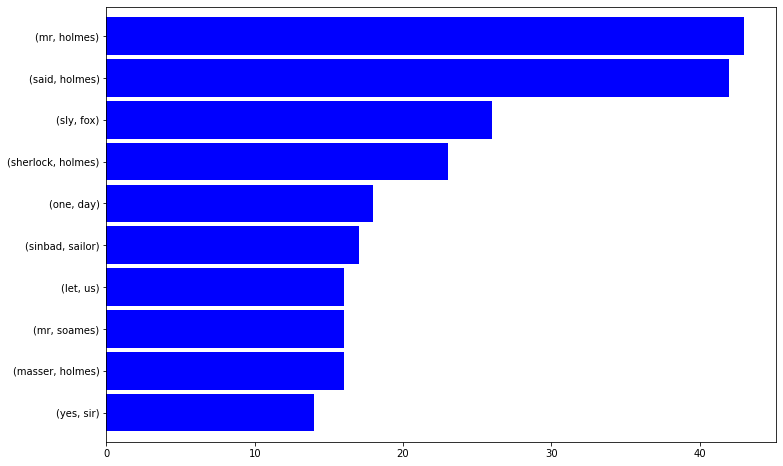

# You have to implement TF-IDF the Algorithm from scratch. ( 4 Mark )<a href="#You-have-to-implement-TF-IDF-the-Algorithm-from-scratch.---(-4-Mark-)" class="anchor-link">¶</a>

In \[17\]:

    DF = {}
    for i in range(len(listOfFiles)):
        tokens = listOfFiles[i].split()
        for w in tokens:
            try:
                DF[w].add(i)
            except:
                DF[w] = {i}
    DF

Out\[17\]:

    {'children': {0, 3, 6},
     'sly': {0, 4},
     'fox': {0},
     'mr': {0, 1, 4, 7, 9},
     'rabbit': {0},
     'sat': {0, 4, 5, 6, 7, 8, 9, 11},
     'front': {0, 1, 7, 9},
     'porch': {0},
     'rocking': {0},
     'eating': {0, 8},
     'great': {0, 1, 2, 4, 6, 7, 9, 11},
     'big': {0, 1, 2, 5, 8, 9, 11},
     'carrot': {0},
     'looking': {0, 1, 4, 6, 7, 9},
     'looks': {0, 4, 5, 7, 11},
     'like': {0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11},
     'coming': {0, 1, 7, 9, 11},
     'road': {0, 8, 9},
     'said': {0, 1, 2, 4, 5, 7, 8, 9, 10, 11},
     'walking': {0, 7, 8},
     'end': {0, 1, 4, 5, 6, 7, 9, 11},
     'shading': {0},
     'eyes': {0, 1, 3, 4, 6, 7, 9, 11},
     'paws': {0},
     'exclaimed': {0, 5, 6, 7, 11},
     'good': {0, 1, 2, 4, 6, 7, 9, 10, 11},
     'morning': {0, 1, 4, 5, 7, 8, 9, 11},
     'cried': {0, 1, 4, 6, 7, 9, 11},
     'walked': {0, 1, 4, 6, 7, 8, 9, 11},
     'across': {0, 1, 4, 6, 8, 9, 11},
     'yard': {0, 1, 2, 9},
     'replied': {0, 2, 5, 6, 10, 11},
     'slight': {0, 1, 4, 6},
     'frown': {0},
     'face': {0, 1, 4, 5, 6, 7, 8, 9, 11},
     'well': {0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11},
     'havent': {0, 4, 11},
     'seen': {0, 1, 2, 4, 7, 8, 9, 11},
     'long': {0, 1, 2, 4, 6, 7, 8, 9, 11},
     'time': {0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11},
     'thought': {0, 1, 4, 5, 6, 7, 8, 9, 11},
     'would': {0, 1, 4, 5, 7, 8, 9, 10, 11},
     'stop': {0, 1, 6},
     'chat': {0, 4},
     'could': {0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11},
     'rude': {0, 4},
     'home': {0, 1, 2, 4, 5, 6, 7, 11},
     'even': {0, 1, 4, 6, 7, 8, 9, 11},
     'enemy': {0, 7, 8},
     'offered': {0, 1, 4, 7, 8, 11},
     'seat': {0},
     'take': {0, 1, 2, 3, 4, 7, 9, 11},
     'chair': {0, 1, 4, 7, 9},
     'politely': {0},
     'tbut': {0},
     'stay': {0, 2, 4, 7, 8, 10, 11},
     'leaving': {0, 4, 6, 7, 11},
     'asked': {0, 1, 4, 5, 7, 8, 9, 11},
     'mother': {0, 1},
     'dinner': {0, 4},
     'tonight': {0, 4, 6, 7, 9},
     'wont': {0, 1, 2, 4, 7, 9, 11},
     'mrs': {0, 1},
     'three': {0, 1, 2, 4, 5, 7, 8, 9, 11},
     'little': {0, 1, 2, 4, 5, 6, 7, 8, 9, 11},
     'rabs': {0},
     'come': {0, 1, 2, 4, 6, 7, 8, 9, 10, 11},
     'oh': {0, 1, 4, 7, 9},
     'knows': {0, 1, 9},
     'wants': {0, 1, 7},
     'us': {0, 1, 2, 4, 6, 7, 8, 9, 10, 11},
     'eat': {0, 6, 10, 11},
     'pretended': {0, 8},
     'disappointed': {0},
     'sorry': {0, 1, 5, 7, 11},
     'engagement': {0},
     'today': {0, 4, 6, 7, 9, 10, 11},
     'want': {0, 1, 2, 4, 6, 7, 8, 9},
     'tomorrow': {0, 1, 4, 7, 9, 11},
     'chuckled': {0, 6, 9},
     'inwardly': {0},
     'readily': {0, 7},
     'agreed': {0, 1, 4, 5, 11},
     'next': {0, 1, 4, 6, 9, 11},
     'day': {0, 1, 2, 4, 5, 7, 8, 9, 11},
     'wishing': {0},
     'trotted': {0},
     'toward': {0, 6},
     'soon': {0, 1, 2, 4, 7, 8, 9, 11},
     'sight': {0, 2, 7, 9, 11},
     'ran': {0, 1, 2, 4, 6, 7, 8, 9, 11},
     'house': {0, 1, 2, 5, 6, 7, 9, 11},
     'called': {0, 1, 2, 4, 6, 7, 8, 9, 11},
     'get': {0, 1, 2, 4, 6, 7, 8, 9, 11},
     'things': {0, 1, 4, 5, 6, 7, 8, 11},
     'together': {0, 1, 2, 4, 6, 7, 8, 9, 11},
     'put': {0, 1, 2, 4, 5, 6, 7, 9, 11},
     'rubber': {0, 11},
     'boots': {0, 6},
     'move': {0, 9},
     'quickly': {0, 2, 6, 7, 8, 11},
     'piney': {0},
     'woods': {0, 2},
     'brook': {0},
     'old': {0, 1, 3, 4, 7, 9, 10, 11},
     'found': {0, 1, 2, 4, 5, 7, 8, 9, 11},
     'destroy': {0, 9},
     'family': {0, 7, 9, 11},
     'moved': {0, 7, 9},
     'delighted': {0, 11},
     'new': {0, 1, 2, 4, 7, 11},
     'woodland': {0},
     'towering': {0},
     'pines': {0, 1},
     'ground': {0, 4, 6, 8, 10, 11},
     'covered': {0, 4, 6, 7, 9, 10, 11},
     'pine': {0},
     'needles': {0},
     'made': {0, 1, 2, 3, 4, 6, 7, 8, 9, 11},
     'soft': {0, 3, 4, 8, 9},
     'carpeting': {0},
     'wind': {0, 2, 3, 6, 7, 8, 10, 11},
     'music': {0},
     'trees': {0, 5, 6, 11},
     'birds': {0, 4, 11},
     'sang': {0},
     'fragrance': {0, 3},
     'flowers': {0},
     'filled': {0, 3, 8, 11},
     'air': {0, 1, 2, 3, 5, 7, 11},
     'huge': {0, 1, 6, 8, 11},
     'hollow': {0, 6, 7},
     'tree': {0, 5, 8, 11},
     'burrowed': {0},
     'deep': {0, 2, 7, 11},
     'cozy': {0},
     'squirrels': {0},
     'left': {0, 1, 2, 4, 6, 7, 8, 9, 11},
     'nuts': {0},
     'hidden': {0},
     'around': {0, 6, 8, 11},
     'owls': {0},
     'hooted': {0},
     'throughout': {0},
     'night': {0, 1, 3, 4, 6, 7, 9, 11},
     'crickets': {0},
     'chirped': {0},
     'merrily': {0},
     'knocked': {0, 1, 4, 11},
     'door': {0, 1, 2, 4, 6, 7, 8, 9, 11},
     'hedgehog': {0},
     'answered': {0, 1, 4, 6, 7, 8, 9},
     'inquired': {0, 7},
     'wicked': {0, 1, 2},
     'grin': {0, 1},
     'cunning': {0, 7, 9},
     'look': {0, 1, 2, 4, 5, 6, 9, 11},
     'eedgehog': {0},
     'none': {0, 1, 2, 4, 7, 11},
     'cordially': {0},
     'parts': {0, 6, 7, 8},
     'unknown': {0, 3, 7, 9, 11},
     'right': {0, 1, 2, 4, 5, 6, 7, 9},
     'yesterday': {0, 1, 4, 7},
     'ah': {0, 1, 4, 7, 9},
     'going': {0, 1, 4, 6, 7, 9, 11},
     'planned': {0, 1},
     'real': {0, 1, 2, 7, 9, 11},
     'feast': {0, 11},
     'dont': {0, 1, 2, 4, 5, 8, 9, 11},
     'enjoy': {0, 7, 8, 11},
     'smacking': {0, 5},
     'lips': {0, 4, 5, 7},
     'thinking': {0, 5, 11},
     'goodies': {0},
     'much': {0, 1, 2, 4, 6, 7, 9, 10, 11},
     'let': {0, 1, 2, 4, 7, 8, 9, 10, 11},
     'go': {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11},
     'nice': {0, 5, 11},
     'young': {0, 1, 4, 7, 8, 9, 10, 11},
     'grasshoppers': {0},
     'softly': {0, 6},
     'nothing': {0, 1, 4, 6, 7, 8, 9, 10, 11},
     'tender': {0},
     'fairly': {0},
     'dribbling': {0},
     'mouth': {0, 1, 2, 6, 9, 11},
     'dainty': {0, 1},
     'pass': {0, 1, 4, 6, 9},
     'field': {0, 7, 11},
     'number': {0, 1, 6, 7, 11},
     'sack': {0, 8, 11},
     'open': {0, 1, 2, 4, 5, 6, 7, 9, 11},
     'rake': {0},
     'bake': {0},
     'apples': {0},
     'deilicious': {0},
     'greedy': {0},
     'resist': {0},
     'went': {0, 2, 4, 7, 8, 9, 10, 11},
     'grabbed': {0, 1, 6, 11},
     'threw': {0, 1, 6, 9, 10, 11},
     'shoulder': {0, 1, 6, 7},
     'tafter': {0},
     'way': {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11},
     'became': {0, 1, 2, 4, 6, 7, 9, 11},
     'suspicious': {0, 4},
     'reach': {0, 3, 9, 11},
     'silly': {0, 2},
     'apple': {0, 9},
     'dumplings': {0},
     'every': {0, 1, 4, 6, 7, 9, 11},
     'hair': {0, 3, 4, 6, 9, 11},
     'hedgehogs': {0},
     'head': {0, 1, 4, 5, 6, 7, 8, 9, 10, 11},
     'stood': {0, 1, 4, 6, 7, 9, 11},
     'fright': {0},
     'foolish': {0, 1, 2, 11},
     'greed': {0},
     'trapped': {0},
     'stayed': {0, 4, 9},
     'straightened': {0, 8},
     'cooked': {0},
     'eaten': {0},
     'greediness': {0},
     'never': {0, 1, 2, 4, 6, 7, 8, 9, 11},
     'pays': {0},
     'tired': {0, 11},
     'rain': {0, 2, 3, 7, 11},
     'begun': {0, 7, 8, 9},
     'fall': {0, 2, 6, 11},
     'looked': {0, 1, 4, 5, 6, 7, 9, 11},
     'dry': {0, 4, 7, 9, 11},
     'place': {0, 1, 3, 4, 6, 7, 8, 9, 10, 11},
     'sit': {0, 1, 7, 11},
     'throwing': {0},
     'chuckling': {0},
     'sitting': {0, 6, 7, 8, 9},
     'dropped': {0, 5, 9, 10, 11},
     'heavily': {0, 1, 7},
     'upon': {0, 1, 2, 4, 5, 7, 8, 9, 10, 11},
     'wow': {0},
     'jumping': {0, 4},
     'shot': {0, 8},
     'sharp': {0, 4, 7, 8, 9, 11},
     'quills': {0},
     'might': {0, 1, 2, 4, 5, 7, 9, 11},
     'fro': {0},
     'trying': {0, 2, 4},
     'pull': {0},
     'gone': {0, 1, 7, 9, 11},
     'screaming': {0, 1, 7, 11},
     'log': {0, 5},
     'began': {0, 1, 2, 4, 5, 6, 7, 8, 9, 11},
     'pulling': {0, 7},
     'calling': {0, 7, 11},
     'neighbor': {0},
     'bring': {0, 1, 3, 7, 8, 9},
     'honey': {0},
     'places': {0, 6},
     'crawled': {0},
     'bag': {0, 6, 8, 9},
     'slowly': {0, 6},
     'allow': {0, 4},
     'fooled': {0, 8},
     'one': {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11},
     'else': {0, 1, 4, 6, 7, 11},
     'meanwhile': {0, 4, 7, 9},
     'living': {0, 3, 6, 9, 11},
     'happily': {0, 5, 7, 11},
     'played': {0},
     'crystal': {0, 6},
     'clear': {0, 1, 4, 7, 9},
     'wading': {0},
     'sailing': {0, 7, 11},
     'leaf': {0, 2, 6},
     'boats': {0},
     'catch': {0, 2, 7, 9, 11},
     'silvery': {0},
     'minnows': {0},
     'darting': {0},
     'late': {0, 1, 5, 7, 9, 11},
     'evening': {0, 1, 4, 5, 6, 7, 9, 11},
     'papa': {0},
     'mama': {0},
     'fire': {0, 1, 2, 3, 6, 7, 11},
     'talking': {0, 1, 4, 6},
     'robe': {0, 6},
     'bedroom': {0, 1, 4, 9},
     'slippers': {0},
     'reading': {0, 9},
     'newspaper': {0, 7},
     'spectacles': {0},
     'lovingly': {0},
     'dressed': {0, 1, 6, 9, 10, 11},
     'flowered': {0},
     'housecoat': {0},
     'red': {0, 4, 6, 7, 9, 11},
     'knitting': {0},
     'socks': {0},
     'sniff': {0},
     'came': {0, 1, 2, 4, 5, 6, 7, 9, 11},
     'suddenly': {0, 1, 4, 6, 7, 8, 9, 11},
     'ears': {0, 9, 11},
     'whispered': {0, 9},
     'full': {0, 4, 6, 7, 8, 9, 11},
     'concern': {0},
     'alarm': {0, 2, 4, 7, 9},
     'yes': {0, 1, 4, 5, 6, 7, 9, 11},
     'voice': {0, 2, 4, 6, 7, 8},
     'trembling': {0, 7, 11},
     'cover': {0, 7, 9},
     'straw': {0, 2},
     'tell': {0, 1, 4, 7, 9, 11},
     'quiet': {0, 1, 4, 9},
     'instructed': {0},
     'cautioned': {0},
     'mice': {0},
     'since': {0, 1, 4, 7, 9, 11},
     'behaved': {0},
     'obedient': {0},
     'told': {0, 1, 4, 5, 7, 8, 9, 11},
     'stick': {0, 5, 9},
     'beside': {0, 4, 6, 7, 9, 11},
     'oak': {0, 4, 6},
     'breath': {0, 2, 9, 11},
     'shall': {0, 1, 2, 4, 5, 6, 7, 9, 11},
     'scratching': {0},
     'earth': {0, 1, 4, 6, 7, 11},
     'dig': {0, 11},
     'furiously': {0, 2, 4},
     'poor': {0, 1, 4, 5, 7, 8, 9, 10, 11},
     'still': {0, 1, 4, 6, 7, 8, 9, 11},
     'frightened': {0, 1, 11},
     'hearts': {0, 3},
     'thumping': {0},
     'shaking': {0, 2, 9, 11},
     'bulging': {0},
     'panic': {0},
     'distance': {0, 7, 11},
     'heard': {0, 1, 4, 6, 7, 9, 11},
     'toot': {0},
     'toottoot': {0},
     'horns': {0},
     'woof': {0},
     'barking': {0},
     'dogs': {0, 9},
     'hunters': {0, 11},
     'heart': {0, 1, 3, 4, 7, 11},
     'gave': {0, 1, 4, 8, 9, 11},
     'bound': {0, 7, 9, 11},
     'relief': {0},
     'nearer': {0, 6},
     'baying': {0},
     'hounds': {0, 1},
     'busily': {0, 5},
     'digging': {0},
     'failed': {0, 1, 9},
     'hear': {0, 1, 2, 4, 7, 9, 11},
     'first': {0, 1, 2, 4, 5, 7, 9, 11},
     'stopped': {0, 5, 8, 9, 11},
     'back': {0, 1, 2, 4, 6, 7, 8, 9, 11},
     'listen': {0, 1, 2, 4, 9, 11},
     'jumped': {0, 1, 7, 11},
     'away': {0, 1, 2, 4, 5, 6, 7, 8, 9, 11},
     'lived': {0, 1, 5, 7, 8, 9, 10, 11},
     'started': {0, 2, 6, 9, 11},
     'running': {0, 11},
     'loudly': {0, 11},
     'horses': {0, 8, 10, 11},
     'feet': {0, 4, 6, 7, 10, 11},
     'beat': {0, 1, 8, 9},
     'excited': {0, 2},
     'rhythm': {0},
     'redcoated': {0},
     'urged': {0, 7, 8},
     'chase': {0, 8},
     'hill': {0, 7, 8, 9, 11},
     'meadows': {0},
     'life': {0, 1, 4, 5, 7, 9, 11},
     'getting': {0, 6, 9},
     'closer': {0, 6},
     'spied': {0},
     'hole': {0, 2, 4, 5, 8, 9, 11},
     'among': {0, 1, 4, 7, 9},
     'bushes': {0},
     'slid': {0},
     'side': {0, 1, 4, 6, 7, 9, 11},
     'stream': {0, 8},
     'water': {0, 3, 6, 7, 11},
     'lost': {0, 1, 4, 7, 8, 9, 11},
     'scent': {0},
     'took': {0, 1, 2, 4, 5, 6, 7, 8, 9, 11},
     'opposite': {0, 1, 4, 6},
     'direction': {0, 4, 6, 8, 11},
     'near': {0, 4, 7, 8, 11},
     'death': {0, 1, 6, 7, 8, 11},
     'resolved': {0},
     'bother': {0, 9},
     'start': {0, 7, 9},
     'turned': {0, 1, 4, 6, 7, 8, 9},
     'safe': {0, 1, 2, 9, 11},
     'last': {0, 1, 2, 4, 5, 7, 9, 10, 11},
     'call': {0, 1, 3, 7, 9},
     'prayers': {0},
     'thanksgiving': {0},
     'praise': {0, 3, 6, 9, 11},
     'father': {0, 4, 7, 11},
     'art': {0, 3, 7, 9},
     'heaven': {0, 1, 4, 11},
     'hustled': {0},
     'making': {0, 4, 9, 11},
     'mint': {0},
     'tea': {0, 4},
     'hot': {0, 2, 5, 7, 8, 9, 11},
     'chocolate': {0},
     'piled': {0, 1, 10},
     'high': {0, 1, 4, 7, 9, 11},
     'whipped': {0, 6},
     'cream': {0},
     'whispering': {0, 6},
     'bothered': {0, 9},
     'beulah': {0},
     'murrelle': {0},
     'earths': {1, 4, 7, 9},
     'dreamlands': {1, 4, 7, 9},
     'bbs': {1, 4, 7, 9},
     'text': {1, 4, 7, 9},
     'file': {1, 4, 7, 9},
     'junkies': {1, 4, 7, 9},
     'rpgnet': {1, 4, 7, 9},
     'gm': {1, 4, 7, 9},
     'archive': {1, 4, 7, 9},
     'site': {1, 4, 7, 9},
     'adveniure': {1},
     'gables': {1},
     'think': {1, 4, 6, 7, 9},
     'adventures': {1, 6, 7, 11},
     'sherlock': {1, 4, 7, 9},
     'holmes': {1, 4, 7, 9},
     'opened': {1, 2, 4, 7, 9, 11},
     'quite': {1, 2, 4, 5, 7, 9, 11},
     'abruptly': {1},
     'dramatically': {1, 6},
     'associate': {1},
     'days': {1, 2, 4, 7, 8, 9, 10, 11},
     'idea': {1, 2, 4, 7, 9, 11},
     'channel': {1},
     'activities': {1},
     'directed': {1, 7, 9},
     'chatty': {1},
     'mood': {1},
     'however': {1, 2, 4, 5, 7, 8, 9, 11},
     'settled': {1, 11},
     'wellworn': {1},
     'low': {1, 4},
     'armchair': {1, 4},
     'curled': {1, 11},
     'pipe': {1, 7, 8},
     'visitor': {1, 4, 7, 9},
     'arrived': {1, 4, 5, 7, 8, 11},
     'mad': {1, 7},
     'bull': {1},
     'give': {1, 4, 5, 6, 7, 8, 9, 11},
     'clearer': {1},
     'impression': {1, 7},
     'occurred': {1, 4, 6, 9},
     'flown': {1},
     'negro': {1, 7},
     'burst': {1, 4, 5, 7},
     'room': {1, 4, 7, 8, 9},
     'comic': {1},
     'figure': {1, 4, 9},
     'terrific': {1},
     'loud': {1, 9},
     'gray': {1, 6},
     'check': {1, 4},
     'suit': {1, 6},
     'flowing': {1, 11},
     'salmoncoloured': {1},
     'tie': {1},
     'broad': {1, 4, 9},
     'flattened': {1},
     'nose': {1, 5, 9},
     'thrust': {1, 2, 7, 11},
     'forward': {1, 4, 7},
     'sullen': {1, 4},
     'dark': {1, 4, 6, 7, 9, 11},
     'smouldering': {1},
     'gleam': {1, 3},
     'malice': {1},
     'genlmen': {1},
     'masser': {1},
     'raised': {1, 6, 7},
     'languid': {1},
     'smile': {1, 4, 7, 9},
     'un': {1},
     'pleasant': {1, 4, 9, 11},
     'stealthy': {1},
     'step': {1, 4, 7, 9},
     'round': {1, 2, 3, 4, 5, 7, 8, 9, 11},
     'angle': {1, 4},
     'table': {1, 4, 5, 6, 7, 9},
     'see': {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11},
     'keep': {1, 4, 7, 9, 11},
     'hands': {1, 3, 4, 6, 7, 8, 9, 10, 11},
     'folks': {1},
     'busi': {1},
     'ness': {1},
     'leave': {1, 4, 5, 7, 9, 11},
     'manage': {1, 11},
     'affairs': {1, 7, 9},
     'got': {1, 4, 7, 8, 9, 11},
     'fine': {1, 4, 5, 6, 7, 8, 11},
     'growled': {1, 2},
     'savage': {1},
     'damn': {1},
     'trim': {1},
     'bit': {1, 5, 6, 8, 9},
     'ive': {1, 9, 11},
     'handled': {1},
     'kind': {1, 7, 8, 9, 11},
     'didnt': {1, 4, 7, 9, 11},
     'swung': {1, 6, 9},
     'knotted': {1, 9},
     'lump': {1, 6},
     'fist': {1, 6},
     'friends': {1, 2, 4, 6, 7, 8, 11},
     'examined': {1, 4, 7, 9},
     'closely': {1, 7},
     'interest': {1, 4, 7, 9},
     'born': {1, 11},
     'degrees': {1},
     'may': {1, 3, 4, 7, 9},
     'icy': {1},
     'coolness': {1},
     'friend': {1, 3, 4, 7, 9, 11},
     'clatter': {1, 9},
     'picked': {1, 9, 11},
     'poker': {1, 9},
     'case': {1, 4, 7, 9, 11},
     'visitors': {1, 4, 7},
     'manner': {1, 4, 7, 9},
     'less': {1, 2, 4, 7, 9},
     'flamboyant': {1},
     'given': {1, 2, 4, 7, 11},
     'fair': {1, 4, 7, 11},
     'warnin': {1},
     'thats': {1, 2, 4, 8, 9, 11},
     'interested': {1, 9, 11},
     'harrow': {1},
     'know': {1, 4, 6, 7, 9, 11},
     'im': {1, 2, 5, 6, 9, 10, 11},
     'meaning': {1, 9},
     'intend': {1, 4, 9},
     'buttin': {1},
     'aint': {1},
     'law': {1, 4},
     'either': {1, 4, 7, 9},
     'ill': {1, 2, 4, 5, 7, 9, 10, 11},
     'hand': {1, 4, 6, 7, 9, 11},
     'also': {1, 4, 7, 9, 11},
     'forget': {1, 7, 8, 9, 11},
     'wanted': {1, 4, 7, 8, 9, 11},
     'meet': {1, 6, 7, 9, 11},
     'ask': {1, 4, 7, 8, 9, 11},
     'smell': {1},
     'arent': {1},
     'steve': {1},
     'dixie': {1},
     'bruiser': {1},
     'name': {1, 4, 7, 9, 11},
     'youll': {1, 8, 9, 11},
     'sure': {1, 2, 7, 8, 9, 11},
     'lip': {1, 7},
     'certainly': {1, 4, 6, 7, 9, 11},
     'thing': {1, 3, 4, 5, 7, 9, 11},
     'need': {1, 4, 6, 7, 9, 11},
     'staring': {1, 6, 11},
     'hideous': {1, 4, 9},
     'killing': {1},
     'perkins': {1},
     'outside': {1, 2, 5, 7, 8, 9, 10},
     'holborn': {1},
     'bar': {1, 6, 7},
     'youre': {1, 5, 11},
     'sprung': {1},
     'leaden': {1},
     'talk': {1, 9},
     'ere': {1},
     'trainin': {1},
     'ring': {1, 4, 7, 9},
     'birmingham': {1},
     'boy': {1, 6, 7},
     'done': {1, 4, 5, 7, 9, 11},
     'trouble': {1, 4, 9, 10},
     'magistrate': {1},
     'watching': {1, 2, 4, 8},
     'barney': {1},
     'stockdale': {1},
     'help': {1, 4, 6, 7, 9, 10, 11},
     'lord': {1},
     'enough': {1, 2, 4, 8, 9, 11},
     'pick': {1, 5, 8},
     'goodmornin': {1},
     'hope': {1, 2, 4, 7, 9, 11},
     'hard': {1, 2, 4, 7, 8, 11},
     'feelins': {1},
     'visit': {1, 4, 6, 7, 11},
     'unless': {1, 4, 9},
     'sent': {1, 6, 7, 9, 10, 11},
     'secret': {1, 4, 7, 9},
     'genlman': {1},
     'mention': {1, 6, 7, 11},
     'set': {1, 2, 4, 5, 6, 7, 9, 10, 11},
     'selp': {1},
     'say': {1, 4, 5, 7, 9, 11},
     'whole': {1, 4, 6, 7, 9, 11},
     'truth': {1, 4, 7, 11},
     'without': {1, 4, 6, 7, 8, 9, 11},
     'waiting': {1, 5, 7},
     'questioning': {1},
     'bolted': {1, 6},
     'almost': {1, 6, 7, 10, 11},
     'precipitately': {1},
     'entered': {1, 4, 6, 7, 9, 11},
     'ashes': {1, 7},
     'chuckle': {1, 2},
     'glad': {1, 4, 7, 9, 11},
     'forced': {1, 4, 7, 11},
     'break': {1, 2, 9},
     'woolly': {1},
     'watson': {1, 4, 7, 9},
     'observed': {1, 4, 6, 7, 9},
     'manoeuvres': {1},
     'really': {1, 2, 4, 5, 6, 7, 9, 11},
     'rather': {1, 2, 4, 7, 9, 11},
     'harmless': {1},
     'fellow': {1, 4, 8, 9, 11},
     'muscular': {1},
     'blus': {1},
     'tering': {1},
     'baby': {1},
     'easily': {1, 2, 6, 7, 9, 11},
     'cowed': {1},
     'spencer': {1},
     'john': {1, 7},
     'gang': {1, 7, 10},
     'taken': {1, 4, 5, 7, 9, 11},
     'part': {1, 3, 4, 7, 9, 11},
     'dirty': {1},
     'work': {1, 2, 4, 5, 6, 7, 9, 11},
     'immediate': {1},
     'principal': {1, 9},
     'astute': {1},
     'person': {1, 6, 7, 9},
     'specialize': {1},
     'assaults': {1},
     'intimidation': {1},
     'panicular': {1},
     'occasion': {1, 4, 7},
     'intimidate': {1},
     'weald': {1},
     'decides': {1},
     'matter': {1, 4, 6, 7, 9, 11},
     'worth': {1, 4, 9},
     'anyones': {1},
     'must': {1, 2, 4, 6, 7, 9, 10, 11},
     'something': {1, 4, 6, 7, 9, 11},
     'interlude': {1},
     'maberleys': {1},
     'note': {1, 7, 9, 11},
     'care': {1, 4, 7},
     'wire': {1},
     'dear': {1, 4, 7, 9},
     'read': {1, 4, 6, 7, 9},
     'succession': {1, 9},
     'strange': {1, 5, 6, 7, 8, 9, 11},
     'incidents': {1, 7, 9},
     'occur': {1, 9},
     'connection': {1, 7},
     'value': {1, 4, 9, 11},
     'advice': {1, 4, 7, 11},
     'find': {1, 3, 4, 6, 7, 9, 11},
     'within': {1, 3, 4, 7, 9, 11},
     'short': {1, 9, 11},
     'walk': {1, 3, 4, 9, 11},
     'station': {1, 7, 9},
     'believe': {1, 4, 6, 7, 9, 11},
     'husband': {1, 5},
     'mortimer': {1},
     'maberley': {1},
     'early': {1, 4, 7, 9},
     'clients': {1},
     'faithfully': {1},
     'mary': {1, 7},
     'address': {1, 9},
     'spare': {1, 4, 7},
     'railway': {1},
     'journey': {1, 8, 9, 10, 11},
     'shorter': {1},
     'drive': {1, 9, 10},
     'brought': {1, 7, 8, 9, 11},
     'brick': {1, 2},
     'timber': {1},
     'villa': {1, 9},
     'standing': {1, 4, 9},
     'acre': {1},
     'undeveloped': {1},
     'grassland': {1},
     'small': {1, 4, 6, 7, 9, 11},
     'projections': {1, 6},
     'upper': {1},
     'windows': {1, 4, 7},
     'feeble': {1, 11},
     'attempt': {1, 9},
     'justify': {1},
     'behind': {1, 4, 6, 7, 11},
     'grove': {1, 9, 11},
     'melancholy': {1, 6},
     'halfgrown': {1},
     'aspect': {1},
     'depressing': {1},
     'furnished': {1, 4, 7, 9},
     'lady': {1, 3, 11},
     'received': {1, 4, 6, 7, 9, 11},
     'engaging': {1},
     'elderly': {1, 9},
     'bore': {1, 9, 11},
     'mark': {1, 6, 11},
     'refine': {1, 7},
     'ment': {1, 7, 9},
     'culture': {1},
     'remember': {1, 7, 9, 11},
     'madam': {1},
     'though': {1, 4, 5, 6, 7, 8, 9, 11},
     'years': {1, 4, 7, 8, 9, 10, 11},
     'used': {1, 4, 6, 7, 11},
     'services': {1},
     'trifling': {1, 9},
     'probably': {1, 7, 8, 9},
     'familiar': {1},
     'son': {1, 4, 7, 11},
     'douglas': {1},
     'knew': {1, 2, 4, 5, 6, 7, 9, 11},
     'slightly': {1, 6},
     'course': {1, 4, 7, 9, 11},
     'london': {1, 7, 9},
     'magnificent': {1},
     'creature': {1, 6, 11},
     'dead': {1, 4, 6, 7, 8, 9, 10, 11},
     'attache': {1},
     'rome': {1},
     'died': {1, 11},
     'pneumonia': {1},
     'month': {1, 11},
     'connect': {1},
     'man': {1, 4, 5, 6, 7, 8, 9, 11},
     'known': {1, 3, 4, 7, 9},
     'anyone': {1, 4, 7, 8, 9, 11},
     'vitally': {1},
     'alive': {1, 6, 8, 11},
     'intensely': {1},
     'fibre': {1},
     'ruin': {1, 11},
     'debonair': {1},
     'splendid': {1, 9, 11},
     'moody': {1},
     'morose': {1},
     'brooding': {1},
     'devel': {1},
     'oped': {1},
     'broken': {1, 4, 9, 11},
     'single': {1, 7, 9, 11},
     'seemed': {1, 4, 6, 7, 9, 11},
     'gallant': {1},
     'turn': {1, 7, 9},
     'wornout': {1, 6},
     'cynical': {1},
     'love': {1, 3, 7, 9},
     'affair': {1, 7, 9},
     'woman': {1, 5, 6, 7, 11},
     'fiend': {1},
     'lad': {1, 11},
     'dr': {1, 9},
     'service': {1},
     'happenings': {1},
     'year': {1, 4, 7, 9},
     'wished': {1, 5, 9},
     'lead': {1, 4, 7, 11},
     'retired': {1, 7, 9},
     'neighbours': {1, 11},
     'ago': {1, 7, 9, 11},
     'agent': {1},
     'exactly': {1, 4, 9},
     'client': {1, 4, 7},
     'money': {1, 4, 6, 7, 8, 9, 11},
     'object': {1, 4, 7, 9},
     'several': {1, 4, 7, 9, 11},
     'empty': {1, 6, 7, 8, 9, 11},
     'houses': {1, 2, 9},
     'market': {1, 11},
     'appear': {1, 4, 6, 9, 11},
     'equally': {1},
     'eligible': {1},
     'naturally': {1, 4, 8, 11},
     'therefore': {1, 7, 9},
     'named': {1, 8, 9},
     'price': {1, 9, 11},
     'five': {1, 4, 6, 7, 9},
     'hundred': {1, 9, 11},
     'pounds': {1, 7, 9},
     'closed': {1, 7},
     'offer': {1, 8, 10},
     'added': {1},
     'desired': {1},
     'buy': {1, 6},
     'furniture': {1, 7, 11},
     'sum': {1, 4, 8},
     'always': {1, 4, 5, 7, 9, 10, 11},
     'travel': {1, 7, 11},
     'bargain': {1},
     'mistress': {1},
     'rest': {1, 5, 6, 7, 8, 9, 11},
     'agreement': {1},
     'drawn': {1, 4, 6, 9},
     'luckily': {1, 2, 5, 11},
     'showed': {1, 7, 9},
     'sutro': {1},
     'lawyer': {1, 7},
     'lives': {1, 4, 7, 9},
     'document': {1, 7},
     'aware': {1, 4},
     'sign': {1, 7, 9},
     'legally': {1},
     'anything': {1, 4, 7, 9, 11},
     'private': {1, 4, 7},
     'possessions': {1, 8},
     'pointed': {1, 4, 9, 11},
     'meant': {1, 11},
     'sell': {1, 7, 11},
     'everything': {1, 4, 6, 8, 11},
     'clothes': {1, 4, 6, 11},
     'jewels': {1, 8, 11},
     'concession': {1},
     'per': {1},
     'sonal': {1},
     'effects': {1},
     'unchecked': {1},
     'liberal': {1},
     'fads': {1},
     'unusual': {1, 4, 9},
     'extraordinary': {1, 4, 8, 9, 11},
     'interruption': {1},
     'silence': {1, 6, 7, 9},
     'strode': {1},
     'flung': {1},
     'dragged': {1, 6, 11},
     'gaunt': {1},
     'seized': {1, 4, 9, 11},
     'ungainly': {1},
     'struggle': {1},
     'awkward': {1, 5, 9},
     'chicken': {1},
     'torn': {1, 7},
     'squawking': {1},
     'coop': {1},
     'alone': {1, 4, 7, 10, 11},
     'adoin': {1},
     'screeched': {1},
     'susan': {1},
     'maam': {1},
     'comin': {1},
     'stayin': {1},
     'lunch': {1, 6},
     'listening': {1, 11},
     'minutes': {1, 4, 7, 8, 9},
     'wish': {1, 3, 4, 5, 7, 9, 11},
     'interrupt': {1},
     'interesting': {1, 4, 7, 9},
     'narrative': {1},
     'wheezy': {1},
     'breathe': {1},
     'sulky': {1},
     'amazed': {1, 4, 8, 11},
     'captor': {1},
     'anyhow': {1, 4, 9},
     'apullin': {1},
     'merely': {1},
     'question': {1, 4, 7, 11},
     'presence': {1, 4, 7, 9},
     'write': {1, 9},
     'consult': {1},
     'posted': {1},
     'letter': {1, 4, 7, 9},
     'wrote': {1, 4, 7, 9},
     'message': {1, 4, 7},
     'asking': {1, 8},
     'lie': {1, 8},
     'people': {1, 4, 9, 11},
     'live': {1, 5, 7, 9, 11},
     'fibs': {1},
     'bad': {1, 4, 11},
     'treach': {1},
     'erous': {1},
     'saw': {1, 4, 6, 7, 8, 9, 11},
     'speaking': {1, 4, 11},
     'someone': {1, 4, 6, 7, 9, 11},
     'hedge': {1},
     'business': {1, 4, 7, 9},
     'sullenly': {1},
     'suppose': {1, 4, 7, 9},
     'spoke': {1, 4, 7},
     'ten': {1, 4, 7, 9},
     'lay': {1, 7, 9, 10, 11},
     'thousand': {1, 9, 11},
     'world': {1, 2, 4, 6, 9, 11},
     'rich': {1, 8, 9, 11},
     'no;': {1, 7},
     'smiled': {1, 4, 9},
     'far': {1, 4, 6, 7, 8, 9, 10, 11},
     'earn': {1},
     'tenner': {1},
     'hell': {1, 11},
     'language': {1, 4},
     'clearing': {1, 7},
     'send': {1, 3, 7, 9, 11},
     'box': {1, 7, 11},
     'flounced': {1},
     'goodbye': {1, 4, 9, 11},
     'paregoric': {1},
     'stuff': {1, 4},
     'continued': {1, 6, 7, 8, 9, 11},
     'turning': {1, 7, 8, 9},
     'lively': {1},
     'severe': {1, 7},
     'flushed': {1, 9},
     'angry': {1, 4, 7},
     'means': {1, 4, 6, 7, 9},
     'close': {1, 2, 4, 11},
     'play': {1, 2, 9},
     'game': {1, 4, 6},
     'pm': {1},
     'postmark': {1, 7},
     'yet': {1, 4, 6, 7, 9, 11},
     'passes': {1, 4, 9},
     'word': {1, 4, 8, 9, 11},
     'employer': {1, 4},
     'instructions;': {1},
     'incline': {1},
     'latter': {1, 7},
     'susans': {1},
     'blundered': {1},
     'forms': {1, 3},
     'plan': {1, 6},
     'black': {1, 2, 4, 7, 9},
     'warned': {1, 9, 11},
     'eleven': {1, 9},
     'oclock': {1, 4, 7, 9},
     'quick': {1, 2, 9, 11},
     'sea': {1, 7, 11},
     'captain': {1, 7, 11},
     'ferguson': {1},
     'remarkable': {1, 7, 9},
     'ever': {1, 4, 5, 6, 7, 8, 9, 11},
     'wondering': {1, 5},
     'whether': {1, 4, 7, 9, 11},
     'buried': {1, 11},
     'bury': {1, 11},
     'treasure': {1, 9, 11},
     'nowadays': {1},
     'postoffice': {1},
     'bank': {1, 7, 11},
     'lunatics': {1},
     'dull': {1},
     'valuable': {1, 4, 9, 11},
     'happen': {1, 11},
     'raphael': {1},
     'folio': {1},
     'shakespeare': {1},
     'knowing': {1, 4, 11},
     'rarer': {1},
     'crown': {1},
     'derby': {1},
     'teaset': {1},
     'hardly': {1, 4, 7, 9, 11},
     'mystery': {1, 4, 7, 11},
     'besides': {1, 4, 6, 9},
     'openly': {1, 7},
     'state': {1, 4, 7},
     'covet': {1},
     'surely': {1, 4, 6, 7},
     'buying': {1},
     'lock': {1, 4, 7},
     'stock': {1, 4},
     'barrel': {1, 11},
     'agrees': {1},
     'settles': {1},
     'purely': {1},
     'mental': {1, 4, 9},
     ...}

In \[18\]:

    for i in DF:
        DF[i] = len(DF[i])
    DF

Out\[18\]:

    {'children': 3,
     'sly': 2,
     'fox': 1,
     'mr': 5,
     'rabbit': 1,
     'sat': 8,
     'front': 4,
     'porch': 1,
     'rocking': 1,
     'eating': 2,
     'great': 8,
     'big': 7,
     'carrot': 1,
     'looking': 6,
     'looks': 5,
     'like': 11,
     'coming': 5,
     'road': 3,
     'said': 10,
     'walking': 3,
     'end': 8,
     'shading': 1,
     'eyes': 8,
     'paws': 1,
     'exclaimed': 5,
     'good': 9,
     'morning': 8,
     'cried': 7,
     'walked': 8,
     'across': 7,
     'yard': 4,
     'replied': 6,
     'slight': 4,
     'frown': 1,
     'face': 9,
     'well': 11,
     'havent': 3,
     'seen': 8,
     'long': 9,
     'time': 11,
     'thought': 9,
     'would': 9,
     'stop': 3,
     'chat': 2,
     'could': 11,
     'rude': 2,
     'home': 8,
     'even': 8,
     'enemy': 3,
     'offered': 6,
     'seat': 1,
     'take': 8,
     'chair': 5,
     'politely': 1,
     'tbut': 1,
     'stay': 7,
     'leaving': 5,
     'asked': 8,
     'mother': 2,
     'dinner': 2,
     'tonight': 5,
     'wont': 7,
     'mrs': 2,
     'three': 9,
     'little': 10,
     'rabs': 1,
     'come': 10,
     'oh': 5,
     'knows': 3,
     'wants': 3,
     'us': 10,
     'eat': 4,
     'pretended': 2,
     'disappointed': 1,
     'sorry': 5,
     'engagement': 1,
     'today': 7,
     'want': 8,
     'tomorrow': 6,
     'chuckled': 3,
     'inwardly': 1,
     'readily': 2,
     'agreed': 5,
     'next': 6,
     'day': 9,
     'wishing': 1,
     'trotted': 1,
     'toward': 2,
     'soon': 8,
     'sight': 5,
     'ran': 9,
     'house': 8,
     'called': 9,
     'get': 9,
     'things': 8,
     'together': 9,
     'put': 9,
     'rubber': 2,
     'boots': 2,
     'move': 2,
     'quickly': 6,
     'piney': 1,
     'woods': 2,
     'brook': 1,
     'old': 8,
     'found': 9,
     'destroy': 2,
     'family': 4,
     'moved': 3,
     'delighted': 2,
     'new': 6,
     'woodland': 1,
     'towering': 1,
     'pines': 2,
     'ground': 6,
     'covered': 7,
     'pine': 1,
     'needles': 1,
     'made': 10,
     'soft': 5,
     'carpeting': 1,
     'wind': 8,
     'music': 1,
     'trees': 4,
     'birds': 3,
     'sang': 1,
     'fragrance': 2,
     'flowers': 1,
     'filled': 4,
     'air': 7,
     'huge': 5,
     'hollow': 3,
     'tree': 4,
     'burrowed': 1,
     'deep': 4,
     'cozy': 1,
     'squirrels': 1,
     'left': 9,
     'nuts': 1,
     'hidden': 1,
     'around': 4,
     'owls': 1,
     'hooted': 1,
     'throughout': 1,
     'night': 8,
     'crickets': 1,
     'chirped': 1,
     'merrily': 1,
     'knocked': 4,
     'door': 9,
     'hedgehog': 1,
     'answered': 7,
     'inquired': 2,
     'wicked': 3,
     'grin': 2,
     'cunning': 3,
     'look': 8,
     'eedgehog': 1,
     'none': 6,
     'cordially': 1,
     'parts': 4,
     'unknown': 5,
     'right': 8,
     'yesterday': 4,
     'ah': 5,
     'going': 7,
     'planned': 2,
     'real': 6,
     'feast': 2,
     'dont': 8,
     'enjoy': 4,
     'smacking': 2,
     'lips': 4,
     'thinking': 3,
     'goodies': 1,
     'much': 9,
     'let': 9,
     'go': 12,
     'nice': 3,
     'young': 8,
     'grasshoppers': 1,
     'softly': 2,
     'nothing': 9,
     'tender': 1,
     'fairly': 1,
     'dribbling': 1,
     'mouth': 6,
     'dainty': 2,
     'pass': 5,
     'field': 3,
     'number': 5,
     'sack': 3,
     'open': 9,
     'rake': 1,
     'bake': 1,
     'apples': 1,
     'deilicious': 1,
     'greedy': 1,
     'resist': 1,
     'went': 8,
     'grabbed': 4,
     'threw': 6,
     'shoulder': 4,
     'tafter': 1,
     'way': 12,
     'became': 8,
     'suspicious': 2,
     'reach': 4,
     'silly': 2,
     'apple': 2,
     'dumplings': 1,
     'every': 7,
     'hair': 6,
     'hedgehogs': 1,
     'head': 10,
     'stood': 7,
     'fright': 1,
     'foolish': 4,
     'greed': 1,
     'trapped': 1,
     'stayed': 3,
     'straightened': 2,
     'cooked': 1,
     'eaten': 1,
     'greediness': 1,
     'never': 9,
     'pays': 1,
     'tired': 2,
     'rain': 5,
     'begun': 4,
     'fall': 4,
     'looked': 8,
     'dry': 5,
     'place': 10,
     'sit': 4,
     'throwing': 1,
     'chuckling': 1,
     'sitting': 5,
     'dropped': 5,
     'heavily': 3,
     'upon': 10,
     'wow': 1,
     'jumping': 2,
     'shot': 2,
     'sharp': 6,
     'quills': 1,
     'might': 8,
     'fro': 1,
     'trying': 3,
     'pull': 1,
     'gone': 5,
     'screaming': 4,
     'log': 2,
     'began': 10,
     'pulling': 2,
     'calling': 3,
     'neighbor': 1,
     'bring': 6,
     'honey': 1,
     'places': 2,
     'crawled': 1,
     'bag': 4,
     'slowly': 2,
     'allow': 2,
     'fooled': 2,
     'one': 12,
     'else': 6,
     'meanwhile': 4,
     'living': 5,
     'happily': 4,
     'played': 1,
     'crystal': 2,
     'clear': 5,
     'wading': 1,
     'sailing': 3,
     'leaf': 3,
     'boats': 1,
     'catch': 5,
     'silvery': 1,
     'minnows': 1,
     'darting': 1,
     'late': 6,
     'evening': 8,
     'papa': 1,
     'mama': 1,
     'fire': 7,
     'talking': 4,
     'robe': 2,
     'bedroom': 4,
     'slippers': 1,
     'reading': 2,
     'newspaper': 2,
     'spectacles': 1,
     'lovingly': 1,
     'dressed': 6,
     'flowered': 1,
     'housecoat': 1,
     'red': 6,
     'knitting': 1,
     'socks': 1,
     'sniff': 1,
     'came': 9,
     'suddenly': 8,
     'ears': 3,
     'whispered': 2,
     'full': 7,
     'concern': 1,
     'alarm': 5,
     'yes': 8,
     'voice': 6,
     'trembling': 3,
     'cover': 3,
     'straw': 2,
     'tell': 6,
     'quiet': 4,
     'instructed': 1,
     'cautioned': 1,
     'mice': 1,
     'since': 6,
     'behaved': 1,
     'obedient': 1,
     'told': 8,
     'stick': 3,
     'beside': 6,
     'oak': 3,
     'breath': 4,
     'shall': 9,
     'scratching': 1,
     'earth': 6,
     'dig': 2,
     'furiously': 3,
     'poor': 9,
     'still': 8,
     'frightened': 3,
     'hearts': 2,
     'thumping': 1,
     'shaking': 4,
     'bulging': 1,
     'panic': 1,
     'distance': 3,
     'heard': 7,
     'toot': 1,
     'toottoot': 1,
     'horns': 1,
     'woof': 1,
     'barking': 1,
     'dogs': 2,
     'hunters': 2,
     'heart': 6,
     'gave': 6,
     'bound': 4,
     'relief': 1,
     'nearer': 2,
     'baying': 1,
     'hounds': 2,
     'busily': 2,
     'digging': 1,
     'failed': 3,
     'hear': 7,
     'first': 8,
     'stopped': 5,
     'back': 9,
     'listen': 6,
     'jumped': 4,
     'away': 10,
     'lived': 8,
     'started': 5,
     'running': 2,
     'loudly': 2,
     'horses': 4,
     'feet': 6,
     'beat': 4,
     'excited': 2,
     'rhythm': 1,
     'redcoated': 1,
     'urged': 3,
     'chase': 2,
     'hill': 5,
     'meadows': 1,
     'life': 7,
     'getting': 3,
     'closer': 2,
     'spied': 1,
     'hole': 7,
     'among': 5,
     'bushes': 1,
     'slid': 1,
     'side': 7,
     'stream': 2,
     'water': 5,
     'lost': 7,
     'scent': 1,
     'took': 10,
     'opposite': 4,
     'direction': 5,
     'near': 5,
     'death': 6,
     'resolved': 1,
     'bother': 2,
     'start': 3,
     'turned': 7,
     'safe': 5,
     'last': 9,
     'call': 5,
     'prayers': 1,
     'thanksgiving': 1,
     'praise': 5,
     'father': 4,
     'art': 4,
     'heaven': 4,
     'hustled': 1,
     'making': 4,
     'mint': 1,
     'tea': 2,
     'hot': 7,
     'chocolate': 1,
     'piled': 3,
     'high': 6,
     'whipped': 2,
     'cream': 1,
     'whispering': 2,
     'bothered': 2,
     'beulah': 1,
     'murrelle': 1,
     'earths': 4,
     'dreamlands': 4,
     'bbs': 4,
     'text': 4,
     'file': 4,
     'junkies': 4,
     'rpgnet': 4,
     'gm': 4,
     'archive': 4,
     'site': 4,
     'adveniure': 1,
     'gables': 1,
     'think': 5,
     'adventures': 4,
     'sherlock': 4,
     'holmes': 4,
     'opened': 6,
     'quite': 7,
     'abruptly': 1,
     'dramatically': 2,
     'associate': 1,
     'days': 8,
     'idea': 6,
     'channel': 1,
     'activities': 1,
     'directed': 3,
     'chatty': 1,
     'mood': 1,
     'however': 8,
     'settled': 2,
     'wellworn': 1,
     'low': 2,
     'armchair': 2,
     'curled': 2,
     'pipe': 3,
     'visitor': 4,
     'arrived': 6,
     'mad': 2,
     'bull': 1,
     'give': 8,
     'clearer': 1,
     'impression': 2,
     'occurred': 4,
     'flown': 1,
     'negro': 2,
     'burst': 4,
     'room': 5,
     'comic': 1,
     'figure': 3,
     'terrific': 1,
     'loud': 2,
     'gray': 2,
     'check': 2,
     'suit': 2,
     'flowing': 2,
     'salmoncoloured': 1,
     'tie': 1,
     'broad': 3,
     'flattened': 1,
     'nose': 3,
     'thrust': 4,
     'forward': 3,
     'sullen': 2,
     'dark': 6,
     'smouldering': 1,
     'gleam': 2,
     'malice': 1,
     'genlmen': 1,
     'masser': 1,
     'raised': 3,
     'languid': 1,
     'smile': 4,
     'un': 1,
     'pleasant': 4,
     'stealthy': 1,
     'step': 4,
     'round': 9,
     'angle': 2,
     'table': 6,
     'see': 11,
     'keep': 5,
     'hands': 9,
     'folks': 1,
     'busi': 1,
     'ness': 1,
     'leave': 6,
     'manage': 2,
     'affairs': 3,
     'got': 6,
     'fine': 7,
     'growled': 2,
     'savage': 1,
     'damn': 1,
     'trim': 1,
     'bit': 5,
     'ive': 3,
     'handled': 1,
     'kind': 5,
     'didnt': 5,
     'swung': 3,
     'knotted': 2,
     'lump': 2,
     'fist': 2,
     'friends': 7,
     'examined': 4,
     'closely': 2,
     'interest': 4,
     'born': 2,
     'degrees': 1,
     'may': 5,
     'icy': 1,
     'coolness': 1,
     'friend': 6,
     'clatter': 2,
     'picked': 3,
     'poker': 2,
     'case': 5,
     'visitors': 3,
     'manner': 4,
     'less': 5,
     'flamboyant': 1,
     'given': 5,
     'fair': 4,
     'warnin': 1,
     'thats': 6,
     'interested': 3,
     'harrow': 1,
     'know': 6,
     'im': 7,
     'meaning': 2,
     'intend': 3,
     'buttin': 1,
     'aint': 1,
     'law': 2,
     'either': 4,
     'ill': 8,
     'hand': 6,
     'also': 5,
     'forget': 5,
     'wanted': 6,
     'meet': 5,
     'ask': 6,
     'smell': 1,
     'arent': 1,
     'steve': 1,
     'dixie': 1,
     'bruiser': 1,
     'name': 5,
     'youll': 4,
     'sure': 6,
     'lip': 2,
     'certainly': 6,
     'thing': 7,
     'need': 6,
     'staring': 3,
     'hideous': 3,
     'killing': 1,
     'perkins': 1,
     'outside': 7,
     'holborn': 1,
     'bar': 3,
     'youre': 3,
     'sprung': 1,
     'leaden': 1,
     'talk': 2,
     'ere': 1,
     'trainin': 1,
     'ring': 4,
     'birmingham': 1,
     'boy': 3,
     'done': 6,
     'trouble': 4,
     'magistrate': 1,
     'watching': 4,
     'barney': 1,
     'stockdale': 1,
     'help': 7,
     'lord': 1,
     'enough': 6,
     'pick': 3,
     'goodmornin': 1,
     'hope': 6,
     'hard': 6,
     'feelins': 1,
     'visit': 5,
     'unless': 3,
     'sent': 6,
     'secret': 4,
     'genlman': 1,
     'mention': 4,
     'set': 9,
     'selp': 1,
     'say': 6,
     'whole': 6,
     'truth': 4,
     'without': 7,
     'waiting': 3,
     'questioning': 1,
     'bolted': 2,
     'almost': 5,
     'precipitately': 1,
     'entered': 6,
     'ashes': 2,
     'chuckle': 2,
     'glad': 5,
     'forced': 4,
     'break': 3,
     'woolly': 1,
     'watson': 4,
     'observed': 5,
     'manoeuvres': 1,
     'really': 8,
     'rather': 6,
     'harmless': 1,
     'fellow': 5,
     'muscular': 1,
     'blus': 1,
     'tering': 1,
     'baby': 1,
     'easily': 6,
     'cowed': 1,
     'spencer': 1,
     'john': 2,
     'gang': 3,
     'taken': 6,
     'part': 6,
     'dirty': 1,
     'work': 8,
     'immediate': 1,
     'principal': 2,
     'astute': 1,
     'person': 4,
     'specialize': 1,
     'assaults': 1,
     'intimidation': 1,
     'panicular': 1,
     'occasion': 3,
     'intimidate': 1,
     'weald': 1,
     'decides': 1,
     'matter': 6,
     'worth': 3,
     'anyones': 1,
     'must': 8,
     'something': 6,
     'interlude': 1,
     'maberleys': 1,
     'note': 4,
     'care': 3,
     'wire': 1,
     'dear': 4,
     'read': 5,
     'succession': 2,
     'strange': 7,
     'incidents': 3,
     'occur': 2,
     'connection': 2,
     'value': 4,
     'advice': 4,
     'find': 7,
     'within': 6,
     'short': 3,
     'walk': 5,
     'station': 3,
     'believe': 6,
     'husband': 2,
     'mortimer': 1,
     'maberley': 1,
     'early': 4,
     'clients': 1,
     'faithfully': 1,
     'mary': 2,
     'address': 2,
     'spare': 3,
     'railway': 1,
     'journey': 5,
     'shorter': 1,
     'drive': 3,
     'brought': 5,
     'brick': 2,
     'timber': 1,
     'villa': 2,
     'standing': 3,
     'acre': 1,
     'undeveloped': 1,
     'grassland': 1,
     'small': 6,
     'projections': 2,
     'upper': 1,
     'windows': 3,
     'feeble': 2,
     'attempt': 2,
     'justify': 1,
     'behind': 5,
     'grove': 3,
     'melancholy': 2,
     'halfgrown': 1,
     'aspect': 1,
     'depressing': 1,
     'furnished': 4,
     'lady': 3,
     'received': 6,
     'engaging': 1,
     'elderly': 2,
     'bore': 3,
     'mark': 3,
     'refine': 2,
     'ment': 3,
     'culture': 1,
     'remember': 4,
     'madam': 1,
     'though': 8,
     'years': 7,
     'used': 5,
     'services': 1,
     'trifling': 2,
     'probably': 4,
     'familiar': 1,
     'son': 4,
     'douglas': 1,
     'knew': 8,
     'slightly': 2,
     'course': 5,
     'london': 3,
     'magnificent': 1,
     'creature': 3,
     'dead': 8,
     'attache': 1,
     'rome': 1,
     'died': 2,
     'pneumonia': 1,
     'month': 2,
     'connect': 1,
     'man': 8,
     'known': 5,
     'anyone': 6,
     'vitally': 1,
     'alive': 4,
     'intensely': 1,
     'fibre': 1,
     'ruin': 2,
     'debonair': 1,
     'splendid': 3,
     'moody': 1,
     'morose': 1,
     'brooding': 1,
     'devel': 1,
     'oped': 1,
     'broken': 4,
     'single': 4,
     'seemed': 6,
     'gallant': 1,
     'turn': 3,
     'wornout': 2,
     'cynical': 1,
     'love': 4,
     'affair': 3,
     'woman': 5,
     'fiend': 1,
     'lad': 2,
     'dr': 2,
     'service': 1,
     'happenings': 1,
     'year': 4,
     'wished': 3,
     'lead': 4,
     'retired': 3,
     'neighbours': 2,
     'ago': 4,
     'agent': 1,
     'exactly': 3,
     'client': 3,
     'money': 7,
     'object': 4,
     'several': 5,
     'empty': 6,
     'houses': 3,
     'market': 2,
     'appear': 5,
     'equally': 1,
     'eligible': 1,
     'naturally': 4,
     'therefore': 3,
     'named': 3,
     'price': 3,
     'five': 5,
     'hundred': 3,
     'pounds': 3,
     'closed': 2,
     'offer': 3,
     'added': 1,
     'desired': 1,
     'buy': 2,
     'furniture': 3,
     'sum': 3,
     'always': 7,
     'travel': 3,
     'bargain': 1,
     'mistress': 1,
     'rest': 7,
     'agreement': 1,
     'drawn': 4,
     'luckily': 4,
     'showed': 3,
     'sutro': 1,
     'lawyer': 2,
     'lives': 4,
     'document': 2,
     'aware': 2,
     'sign': 3,
     'legally': 1,
     'anything': 5,
     'private': 3,
     'possessions': 2,
     'pointed': 4,
     'meant': 2,
     'sell': 3,
     'everything': 5,
     'clothes': 4,
     'jewels': 3,
     'concession': 1,
     'per': 1,
     'sonal': 1,
     'effects': 1,
     'unchecked': 1,
     'liberal': 1,
     'fads': 1,
     'unusual': 3,
     'extraordinary': 5,
     'interruption': 1,
     'silence': 4,
     'strode': 1,
     'flung': 1,
     'dragged': 3,
     'gaunt': 1,
     'seized': 4,
     'ungainly': 1,
     'struggle': 1,
     'awkward': 3,
     'chicken': 1,
     'torn': 2,
     'squawking': 1,
     'coop': 1,
     'alone': 5,
     'adoin': 1,
     'screeched': 1,
     'susan': 1,
     'maam': 1,
     'comin': 1,
     'stayin': 1,
     'lunch': 2,
     'listening': 2,
     'minutes': 5,
     'wish': 7,
     'interrupt': 1,
     'interesting': 4,
     'narrative': 1,
     'wheezy': 1,
     'breathe': 1,
     'sulky': 1,
     'amazed': 4,
     'captor': 1,
     'anyhow': 3,
     'apullin': 1,
     'merely': 1,
     'question': 4,
     'presence': 4,
     'write': 2,
     'consult': 1,
     'posted': 1,
     'letter': 4,
     'wrote': 4,
     'message': 3,
     'asking': 2,
     'lie': 2,
     'people': 4,
     'live': 5,
     'fibs': 1,
     'bad': 3,
     'treach': 1,
     'erous': 1,
     'saw': 7,
     'speaking': 3,
     'someone': 6,
     'hedge': 1,
     'business': 4,
     'sullenly': 1,
     'suppose': 4,
     'spoke': 3,
     'ten': 4,
     'lay': 5,
     'thousand': 3,
     'world': 6,
     'rich': 4,
     'no;': 2,
     'smiled': 3,
     'far': 8,
     'earn': 1,
     'tenner': 1,
     'hell': 2,
     'language': 2,
     'clearing': 2,
     'send': 5,
     'box': 3,
     'flounced': 1,
     'goodbye': 4,
     'paregoric': 1,
     'stuff': 2,
     'continued': 6,
     'turning': 4,
     'lively': 1,
     'severe': 2,
     'flushed': 2,
     'angry': 3,
     'means': 5,
     'close': 4,
     'play': 3,
     'game': 3,
     'pm': 1,
     'postmark': 2,
     'yet': 6,
     'passes': 3,
     'word': 5,
     'employer': 2,
     'instructions;': 1,
     'incline': 1,
     'latter': 2,
     'susans': 1,
     'blundered': 1,
     'forms': 2,
     'plan': 2,
     'black': 5,
     'warned': 3,
     'eleven': 2,
     'oclock': 4,
     'quick': 4,
     'sea': 3,
     'captain': 3,
     'ferguson': 1,
     'remarkable': 3,
     'ever': 8,
     'wondering': 2,
     'whether': 5,
     'buried': 2,
     'bury': 2,
     'treasure': 3,
     'nowadays': 1,
     'postoffice': 1,
     'bank': 3,
     'lunatics': 1,
     'dull': 1,
     'valuable': 4,
     'happen': 2,
     'raphael': 1,
     'folio': 1,
     'shakespeare': 1,
     'knowing': 3,
     'rarer': 1,
     'crown': 1,
     'derby': 1,
     'teaset': 1,
     'hardly': 5,
     'mystery': 4,
     'besides': 4,
     'openly': 2,
     'state': 3,
     'covet': 1,
     'surely': 4,
     'buying': 1,
     'lock': 3,
     'stock': 2,
     'barrel': 2,
     'agrees': 1,
     'settles': 1,
     'purely': 1,
     'mental': 3,
     ...}

In \[19\]:

    total_vocab_size = len(DF)
    total_vocab_size

Out\[19\]:

    5643

In \[20\]:

    total_vocab = [x for x in DF]
    print(total_vocab[:20])

    ['children', 'sly', 'fox', 'mr', 'rabbit', 'sat', 'front', 'porch', 'rocking', 'eating', 'great', 'big', 'carrot', 'looking', 'looks', 'like', 'coming', 'road', 'said', 'walking']

In \[21\]:

    def doc_freq(word):
        c = 0
        try:
            c = DF[word]
        except:
            pass
        return c

In \[22\]:

    doc = 0
    tf_idf_offiles = {}
    N = len(listOfFiles)
    for i in range(N):
        
        tokens = listOfFiles[i].split()
        counter = Counter(tokens)
        words_count = len(tokens)

        for token in np.unique(tokens):        
            tf = counter[token]/words_count
            docf = doc_freq(token)
            idf = np.log((N+1)/(docf+1)) #numerator is added 1 to avoid negative values        
            tf_idf_offiles[doc, token] = tf*idf

        doc += 1

In \[23\]:

    tf_idf_offiles

Out\[23\]:

    {(0, 'across'): 0.0024035040385232713,
     (0, 'agreed'): 0.0019138363570135686,
     (0, 'ah'): 0.0009569181785067843,
     (0, 'air'): 0.0006008760096308178,
     (0, 'alarm'): 0.0009569181785067843,
     (0, 'allow'): 0.001814773599991865,
     (0, 'among'): 0.0019138363570135686,
     (0, 'answered'): 0.0012017520192616356,
     (0, 'apple'): 0.001814773599991865,
     (0, 'apples'): 0.0023165868526009792,
     (0, 'around'): 0.0011825636695884114,
     (0, 'art'): 0.0011825636695884114,
     (0, 'asked'): 0.0009102098517953399,
     (0, 'away'): 0.00020675010478114634,
     (0, 'back'): 0.0003247082481033305,
     (0, 'bag'): 0.0011825636695884114,
     (0, 'bake'): 0.0046331737052019584,
     (0, 'barking'): 0.0023165868526009792,
     (0, 'baying'): 0.0046331737052019584,
     (0, 'beat'): 0.0011825636695884114,
     (0, 'became'): 0.0009102098517953399,
     (0, 'bedroom'): 0.0011825636695884114,
     (0, 'began'): 0.000620250314343439,
     (0, 'begun'): 0.0011825636695884114,
     (0, 'behaved'): 0.0023165868526009792,
     (0, 'beside'): 0.0007661376341661182,
     (0, 'beulah'): 0.0023165868526009792,
     (0, 'big'): 0.0012017520192616356,
     (0, 'birds'): 0.0014587314311158988,
     (0, 'boats'): 0.0023165868526009792,
     (0, 'boots'): 0.001814773599991865,
     (0, 'bother'): 0.001814773599991865,
     (0, 'bothered'): 0.001814773599991865,
     (0, 'bound'): 0.0011825636695884114,
     (0, 'breath'): 0.0011825636695884114,
     (0, 'bring'): 0.0007661376341661182,
     (0, 'brook'): 0.006949760557802938,
     (0, 'bulging'): 0.0023165868526009792,
     (0, 'burrowed'): 0.0023165868526009792,
     (0, 'bushes'): 0.0023165868526009792,
     (0, 'busily'): 0.001814773599991865,
     (0, 'call'): 0.0009569181785067843,
     (0, 'called'): 0.0003247082481033305,
     (0, 'calling'): 0.0014587314311158988,
     (0, 'came'): 0.000649416496206661,
     (0, 'carpeting'): 0.0023165868526009792,
     (0, 'carrot'): 0.0023165868526009792,
     (0, 'catch'): 0.0009569181785067843,
     (0, 'cautioned'): 0.0023165868526009792,
     (0, 'chair'): 0.0009569181785067843,
     (0, 'chase'): 0.00362954719998373,
     (0, 'chat'): 0.001814773599991865,
     (0, 'children'): 0.0014587314311158988,
     (0, 'chirped'): 0.0023165868526009792,
     (0, 'chocolate'): 0.0023165868526009792,
     (0, 'chuckled'): 0.0014587314311158988,
     (0, 'chuckling'): 0.0023165868526009792,
     (0, 'clear'): 0.0009569181785067843,
     (0, 'closer'): 0.00362954719998373,
     (0, 'come'): 0.0010337505239057317,
     (0, 'coming'): 0.0009569181785067843,
     (0, 'concern'): 0.0023165868526009792,
     (0, 'cooked'): 0.0023165868526009792,
     (0, 'cordially'): 0.0023165868526009792,
     (0, 'could'): 9.906275702170342e-05,
     (0, 'cover'): 0.0014587314311158988,
     (0, 'covered'): 0.0012017520192616356,
     (0, 'cozy'): 0.0046331737052019584,
     (0, 'crawled'): 0.0023165868526009792,
     (0, 'cream'): 0.0023165868526009792,
     (0, 'crickets'): 0.0023165868526009792,
     (0, 'cried'): 0.0030043800481540893,
     (0, 'crystal'): 0.001814773599991865,
     (0, 'cunning'): 0.0014587314311158988,
     (0, 'dainty'): 0.00362954719998373,
     (0, 'darting'): 0.0023165868526009792,
     (0, 'day'): 0.000649416496206661,
     (0, 'death'): 0.0007661376341661182,
     (0, 'deep'): 0.0023651273391768228,
     (0, 'deilicious'): 0.0023165868526009792,
     (0, 'delighted'): 0.001814773599991865,
     (0, 'destroy'): 0.001814773599991865,
     (0, 'dig'): 0.001814773599991865,
     (0, 'digging'): 0.0046331737052019584,
     (0, 'dinner'): 0.009073867999959326,
     (0, 'direction'): 0.0009569181785067843,
     (0, 'disappointed'): 0.0023165868526009792,
     (0, 'distance'): 0.0014587314311158988,
     (0, 'dogs'): 0.00725909439996746,
     (0, 'dont'): 0.00045510492589766996,
     (0, 'door'): 0.000649416496206661,
     (0, 'dressed'): 0.0007661376341661182,
     (0, 'dribbling'): 0.0023165868526009792,
     (0, 'dropped'): 0.0009569181785067843,
     (0, 'dry'): 0.0009569181785067843,
     (0, 'dumplings'): 0.0023165868526009792,
     (0, 'ears'): 0.0029174628622317977,
     (0, 'earth'): 0.0007661376341661182,
     (0, 'eat'): 0.0023651273391768228,
     (0, 'eaten'): 0.0023165868526009792,
     (0, 'eating'): 0.001814773599991865,
     (0, 'eedgehog'): 0.0023165868526009792,
     (0, 'else'): 0.0007661376341661182,
     (0, 'end'): 0.0009102098517953399,
     (0, 'enemy'): 0.0014587314311158988,
     (0, 'engagement'): 0.0023165868526009792,
     (0, 'enjoy'): 0.0011825636695884114,
     (0, 'even'): 0.00045510492589766996,
     (0, 'evening'): 0.00045510492589766996,
     (0, 'every'): 0.0012017520192616356,
     (0, 'excited'): 0.001814773599991865,
     (0, 'exclaimed'): 0.0019138363570135686,
     (0, 'eyes'): 0.0013653147776930099,
     (0, 'face'): 0.000649416496206661,
     (0, 'failed'): 0.0014587314311158988,
     (0, 'fairly'): 0.0023165868526009792,
     (0, 'fall'): 0.0011825636695884114,
     (0, 'family'): 0.00827794568711888,
     (0, 'father'): 0.0011825636695884114,
     (0, 'feast'): 0.001814773599991865,
     (0, 'feet'): 0.0007661376341661182,
     (0, 'field'): 0.005834925724463595,
     (0, 'filled'): 0.0011825636695884114,
     (0, 'fire'): 0.0006008760096308178,
     (0, 'first'): 0.00045510492589766996,
     (0, 'flowered'): 0.0023165868526009792,
     (0, 'flowers'): 0.0023165868526009792,
     (0, 'fooled'): 0.001814773599991865,
     (0, 'foolish'): 0.0011825636695884114,
     (0, 'found'): 0.000649416496206661,
     (0, 'fox'): 0.06949760557802938,
     (0, 'fragrance'): 0.001814773599991865,
     (0, 'fright'): 0.0046331737052019584,
     (0, 'frightened'): 0.0029174628622317977,
     (0, 'fro'): 0.0023165868526009792,
     (0, 'front'): 0.0011825636695884114,
     (0, 'frown'): 0.0023165868526009792,
     (0, 'full'): 0.0006008760096308178,
     (0, 'furiously'): 0.0014587314311158988,
     (0, 'gave'): 0.0007661376341661182,
     (0, 'get'): 0.000649416496206661,
     (0, 'getting'): 0.0014587314311158988,
     (0, 'go'): 0.0,
     (0, 'going'): 0.0024035040385232713,
     (0, 'gone'): 0.0009569181785067843,
     (0, 'good'): 0.001948249488619983,
     (0, 'goodies'): 0.0023165868526009792,
     (0, 'grabbed'): 0.0011825636695884114,
     (0, 'grasshoppers'): 0.009266347410403917,
     (0, 'great'): 0.0009102098517953399,
     (0, 'greed'): 0.0023165868526009792,
     (0, 'greediness'): 0.0023165868526009792,
     (0, 'greedy'): 0.006949760557802938,
     (0, 'grin'): 0.00362954719998373,
     (0, 'ground'): 0.0015322752683322365,
     (0, 'hair'): 0.0007661376341661182,
     (0, 'happily'): 0.0023651273391768228,
     (0, 'havent'): 0.0014587314311158988,
     (0, 'head'): 0.00020675010478114634,
     (0, 'hear'): 0.0006008760096308178,
     (0, 'heard'): 0.0012017520192616356,
     (0, 'heart'): 0.0007661376341661182,
     (0, 'hearts'): 0.001814773599991865,
     (0, 'heaven'): 0.0011825636695884114,
     (0, 'heavily'): 0.0014587314311158988,
     (0, 'hedgehog'): 0.023165868526009794,
     (0, 'hedgehogs'): 0.0023165868526009792,
     (0, 'hidden'): 0.0023165868526009792,
     (0, 'high'): 0.0007661376341661182,
     (0, 'hill'): 0.0009569181785067843,
     (0, 'hole'): 0.0012017520192616356,
     (0, 'hollow'): 0.0029174628622317977,
     (0, 'home'): 0.0040959443330790294,
     (0, 'honey'): 0.0023165868526009792,
     (0, 'hooted'): 0.0023165868526009792,
     (0, 'horns'): 0.0046331737052019584,
     (0, 'horses'): 0.0011825636695884114,
     (0, 'hot'): 0.0006008760096308178,
     (0, 'hounds'): 0.005444320799975595,
     (0, 'house'): 0.0013653147776930099,
     (0, 'housecoat'): 0.0023165868526009792,
     (0, 'huge'): 0.0009569181785067843,
     (0, 'hunters'): 0.00362954719998373,
     (0, 'hustled'): 0.0023165868526009792,
     (0, 'inquired'): 0.001814773599991865,
     (0, 'instructed'): 0.0023165868526009792,
     (0, 'inwardly'): 0.0023165868526009792,
     (0, 'jumped'): 0.0035476910087652337,
     (0, 'jumping'): 0.001814773599991865,
     (0, 'knitting'): 0.0023165868526009792,
     (0, 'knocked'): 0.0011825636695884114,
     (0, 'knows'): 0.0014587314311158988,
     (0, 'last'): 0.0003247082481033305,
     (0, 'late'): 0.0007661376341661182,
     (0, 'leaf'): 0.0014587314311158988,
     (0, 'leaving'): 0.0009569181785067843,
     (0, 'left'): 0.001298832992413322,
     (0, 'let'): 0.0003247082481033305,
     (0, 'life'): 0.0006008760096308178,
     (0, 'like'): 0.00019812551404340683,
     (0, 'lips'): 0.0011825636695884114,
     (0, 'listen'): 0.0007661376341661182,
     (0, 'little'): 0.003101251571717195,
     (0, 'lived'): 0.0009102098517953399,
     (0, 'living'): 0.0009569181785067843,
     (0, 'log'): 0.00362954719998373,
     (0, 'long'): 0.001298832992413322,
     (0, 'look'): 0.00045510492589766996,
     (0, 'looked'): 0.0009102098517953399,
     (0, 'looking'): 0.0007661376341661182,
     (0, 'looks'): 0.0009569181785067843,
     (0, 'lost'): 0.0006008760096308178,
     (0, 'loudly'): 0.001814773599991865,
     (0, 'lovingly'): 0.0023165868526009792,
     (0, 'made'): 0.000620250314343439,
     (0, 'making'): 0.0011825636695884114,
     (0, 'mama'): 0.011582934263004897,
     (0, 'meadows'): 0.0023165868526009792,
     (0, 'meanwhile'): 0.0023651273391768228,
     (0, 'merrily'): 0.0023165868526009792,
     (0, 'mice'): 0.0023165868526009792,
     (0, 'might'): 0.0009102098517953399,
     (0, 'minnows'): 0.0023165868526009792,
     (0, 'mint'): 0.0023165868526009792,
     (0, 'morning'): 0.0018204197035906798,
     (0, 'mother'): 0.012703415199943056,
     (0, 'mouth'): 0.0007661376341661182,
     (0, 'move'): 0.001814773599991865,
     (0, 'moved'): 0.004376194293347696,
     (0, 'mr'): 0.012439936320588195,
     (0, 'mrs'): 0.025406830399886112,
     (0, 'much'): 0.000649416496206661,
     (0, 'murrelle'): 0.0023165868526009792,
     (0, 'music'): 0.0046331737052019584,
     (0, 'near'): 0.0009569181785067843,
     (0, 'nearer'): 0.00362954719998373,
     (0, 'needles'): 0.0023165868526009792,
     (0, 'neighbor'): 0.0023165868526009792,
     (0, 'never'): 0.001298832992413322,
     (0, 'new'): 0.0007661376341661182,
     (0, 'newspaper'): 0.001814773599991865,
     (0, 'next'): 0.0015322752683322365,
     (0, 'nice'): 0.0014587314311158988,
     (0, 'night'): 0.00045510492589766996,
     (0, 'none'): 0.0007661376341661182,
     (0, 'nothing'): 0.0003247082481033305,
     (0, 'number'): 0.0009569181785067843,
     (0, 'nuts'): 0.0023165868526009792,
     (0, 'oak'): 0.0014587314311158988,
     (0, 'obedient'): 0.0023165868526009792,
     (0, 'offered'): 0.0007661376341661182,
     (0, 'oh'): 0.0028707545355203526,
     (0, 'old'): 0.0040959443330790294,
     (0, 'one'): 0.0,
     (0, 'open'): 0.0003247082481033305,
     (0, 'opposite'): 0.0011825636695884114,
     (0, 'owls'): 0.0023165868526009792,
     (0, 'panic'): 0.0023165868526009792,
     (0, 'papa'): 0.018532694820807834,
     (0, 'parts'): 0.0011825636695884114,
     (0, 'pass'): 0.0009569181785067843,
     (0, 'paws'): 0.0046331737052019584,
     (0, 'pays'): 0.0023165868526009792,
     (0, 'piled'): 0.0014587314311158988,
     (0, 'pine'): 0.0046331737052019584,
     (0, 'pines'): 0.00362954719998373,
     (0, 'piney'): 0.0046331737052019584,
     (0, 'place'): 0.00020675010478114634,
     (0, 'places'): 0.001814773599991865,
     (0, 'planned'): 0.001814773599991865,
     (0, 'played'): 0.0023165868526009792,
     (0, 'politely'): 0.0023165868526009792,
     (0, 'poor'): 0.0003247082481033305,
     (0, 'porch'): 0.006949760557802938,
     (0, 'praise'): 0.0009569181785067843,
     (0, 'prayers'): 0.0046331737052019584,
     (0, 'pretended'): 0.001814773599991865,
     (0, 'pull'): 0.0023165868526009792,
     (0, 'pulling'): 0.001814773599991865,
     (0, 'put'): 0.000649416496206661,
     (0, 'quickly'): 0.003830688170830591,
     (0, 'quiet'): 0.0023651273391768228,
     (0, 'quills'): 0.009266347410403917,
     (0, 'rabbit'): 0.07644736613583232,
     (0, 'rabs'): 0.025482455378610772,
     (0, 'rain'): 0.0009569181785067843,
     (0, 'rake'): 0.0023165868526009792,
     (0, 'ran'): 0.001948249488619983,
     (0, 'reach'): 0.0011825636695884114,
     (0, 'readily'): 0.001814773599991865,
     (0, 'reading'): 0.001814773599991865,
     (0, 'real'): 0.0007661376341661182,
     (0, 'red'): 0.0007661376341661182,
     (0, 'redcoated'): 0.0023165868526009792,
     (0, 'relief'): 0.0023165868526009792,
     (0, 'replied'): 0.003064550536664473,
     (0, 'resist'): 0.0023165868526009792,
     (0, 'resolved'): 0.0023165868526009792,
     (0, 'rhythm'): 0.0023165868526009792,
     (0, 'right'): 0.0009102098517953399,
     (0, 'road'): 0.0029174628622317977,
     (0, 'robe'): 0.001814773599991865,
     (0, 'rocking'): 0.0023165868526009792,
     (0, 'rubber'): 0.001814773599991865,
     (0, 'rude'): 0.001814773599991865,
     (0, 'running'): 0.00362954719998373,
     (0, 'sack'): 0.010211120017811291,
     (0, 'safe'): 0.0009569181785067843,
     (0, 'said'): 0.0010337505239057317,
     (0, 'sailing'): 0.0014587314311158988,
     (0, 'sang'): 0.0023165868526009792,
     (0, 'sat'): 0.0009102098517953399,
     (0, 'scent'): 0.0023165868526009792,
     (0, 'scratching'): 0.0023165868526009792,
     (0, 'screaming'): 0.0011825636695884114,
     (0, 'seat'): 0.0023165868526009792,
     (0, 'seen'): 0.00045510492589766996,
     (0, 'shading'): 0.0023165868526009792,
     (0, 'shaking'): 0.0011825636695884114,
     (0, 'shall'): 0.0003247082481033305,
     (0, 'sharp'): 0.0007661376341661182,
     (0, 'shot'): 0.001814773599991865,
     (0, 'shoulder'): 0.0011825636695884114,
     (0, 'side'): 0.0006008760096308178,
     (0, 'sight'): 0.0009569181785067843,
     (0, 'silly'): 0.001814773599991865,
     (0, 'silvery'): 0.0023165868526009792,
     (0, 'since'): 0.0007661376341661182,
     (0, 'sit'): 0.0011825636695884114,
     (0, 'sitting'): 0.0019138363570135686,
     (0, 'slid'): 0.0023165868526009792,
     (0, 'slight'): 0.0023651273391768228,
     (0, 'slippers'): 0.0046331737052019584,
     (0, 'slowly'): 0.001814773599991865,
     (0, 'sly'): 0.04718411359978849,
     (0, 'smacking'): 0.001814773599991865,
     (0, 'sniff'): 0.013899521115605875,
     (0, 'socks'): 0.0023165868526009792,
     (0, 'soft'): 0.0009569181785067843,
     (0, 'softly'): 0.001814773599991865,
     (0, 'soon'): 0.00045510492589766996,
     (0, 'sorry'): 0.0009569181785067843,
     (0, 'spectacles'): 0.0023165868526009792,
     (0, 'spied'): 0.0023165868526009792,
     (0, 'squirrels'): 0.0023165868526009792,
     (0, 'start'): 0.0014587314311158988,
     (0, 'started'): 0.0009569181785067843,
     (0, 'stay'): 0.0006008760096308178,
     (0, 'stayed'): 0.0014587314311158988,
     (0, 'stick'): 0.0014587314311158988,
     (0, 'still'): 0.00045510492589766996,
     (0, 'stood'): 0.0006008760096308178,
     (0, 'stop'): 0.0029174628622317977,
     (0, 'stopped'): 0.0009569181785067843,
     (0, 'straightened'): 0.001814773599991865,
     (0, 'straw'): 0.001814773599991865,
     (0, 'stream'): 0.001814773599991865,
     (0, 'suddenly'): 0.0013653147776930099,
     (0, 'suspicious'): 0.001814773599991865,
     (0, 'tafter'): 0.0023165868526009792,
     (0, 'take'): 0.0009102098517953399,
     (0, 'talking'): 0.0011825636695884114,
     (0, 'tbut'): 0.0023165868526009792,
     (0, 'tea'): 0.001814773599991865,
     (0, 'tell'): 0.0007661376341661182,
     (0, 'tender'): 0.0023165868526009792,
     (0, 'thanksgiving'): 0.0023165868526009792,
     (0, 'things'): 0.00045510492589766996,
     (0, 'thinking'): 0.0014587314311158988,
     (0, 'thought'): 0.001948249488619983,
     (0, 'three'): 0.0003247082481033305,
     (0, 'threw'): 0.0022984129024983544,
     (0, 'throughout'): 0.0023165868526009792,
     (0, 'throwing'): 0.0023165868526009792,
     (0, 'thumping'): 0.0023165868526009792,
     (0, 'time'): 0.00039625102808681366,
     (0, 'tired'): 0.001814773599991865,
     (0, 'today'): 0.0006008760096308178,
     (0, 'together'): 0.0003247082481033305,
     (0, 'told'): 0.00045510492589766996,
     (0, 'tomorrow'): 0.0015322752683322365,
     (0, 'tonight'): 0.0009569181785067843,
     (0, 'took'): 0.00020675010478114634,
     (0, 'toot'): 0.0023165868526009792,
     (0, 'toottoot'): 0.0023165868526009792,
     (0, 'toward'): 0.005444320799975595,
     (0, 'towering'): 0.0023165868526009792,
     (0, 'trapped'): 0.0023165868526009792,
     (0, 'tree'): 0.0047302546783536455,
     (0, 'trees'): 0.0011825636695884114,
     (0, 'trembling'): 0.0014587314311158988,
     (0, 'trotted'): 0.0046331737052019584,
     (0, 'trying'): 0.0029174628622317977,
     (0, 'turned'): 0.0006008760096308178,
     (0, 'unknown'): 0.0009569181785067843,
     (0, 'upon'): 0.00020675010478114634,
     (0, 'urged'): 0.0014587314311158988,
     (0, 'us'): 0.0010337505239057317,
     (0, 'voice'): 0.0007661376341661182,
     (0, 'wading'): 0.0023165868526009792,
     (0, 'walked'): 0.00045510492589766996,
     (0, 'walking'): 0.0029174628622317977,
     (0, 'want'): 0.0009102098517953399,
     (0, 'wants'): 0.0014587314311158988,
     (0, 'water'): 0.0009569181785067843,
     (0, 'way'): 0.0,
     (0, 'well'): 0.00029718827106511023,
     (0, 'went'): 0.0013653147776930099,
     (0, 'whipped'): 0.001814773599991865,
     (0, 'whispered'): 0.00362954719998373,
     (0, 'whispering'): 0.001814773599991865,
     (0, 'wicked'): 0.0014587314311158988,
     (0, 'wind'): 0.00045510492589766996,
     (0, 'wishing'): 0.0023165868526009792,
     (0, 'wont'): 0.0006008760096308178,
     (0, 'woodland'): 0.0023165868526009792,
     (0, 'woods'): 0.005444320799975595,
     (0, 'woof'): 0.006949760557802938,
     (0, 'would'): 0.0009741247443099915,
     (0, 'wow'): 0.0046331737052019584,
     (0, 'yard'): 0.0011825636695884114,
     (0, 'yes'): 0.00045510492589766996,
     (0, 'yesterday'): 0.0011825636695884114,
     (0, 'young'): 0.0009102098517953399,
     (1, 'abruptly'): 0.000667785293222116,
     (1, 'accounts'): 0.000667785293222116,
     (1, 'acre'): 0.000667785293222116,
     (1, 'across'): 0.00017321006627959358,
     (1, 'act'): 0.0008409953595017097,
     (1, 'actions'): 0.000667785293222116,
     (1, 'activities'): 0.000667785293222116,
     (1, 'added'): 0.000667785293222116,
     (1, 'address'): 0.0015693939373458011,
     (1, 'admit'): 0.0010462626248972009,
     (1, 'adoin'): 0.000667785293222116,
     (1, 'adveniure'): 0.000667785293222116,
     (1, 'adventure'): 0.0005516873979546784,
     (1, 'adventures'): 0.0003408888494568093,
     (1, 'advice'): 0.0017044442472840462,
     (1, 'advised'): 0.0005231313124486004,
     (1, 'affair'): 0.0008409953595017097,
     (1, 'affairs'): 0.00042049767975085487,
     (1, 'afraid'): 0.0002758436989773392,
     (1, 'age'): 0.000667785293222116,
     (1, 'aged'): 0.000667785293222116,
     (1, 'agent'): 0.000667785293222116,
     (1, 'ago'): 0.0003408888494568093,
     (1, 'agony'): 0.000667785293222116,
     (1, 'agreed'): 0.0002758436989773392,
     (1, 'agreement'): 0.000667785293222116,
     (1, 'agrees'): 0.000667785293222116,
     (1, 'ah'): 0.0008275310969320175,
     (1, 'aint'): 0.004006711759332696,
     (1, 'air'): 0.0005196301988387807,
     (1, 'alas'): 0.000667785293222116,
     (1, 'alive'): 0.0003408888494568093,
     (1, 'almost'): 0.0005516873979546784,
     (1, 'alone'): 0.0005516873979546784,
     (1, 'already'): 0.0002208488078509538,
     (1, 'also'): 0.0005516873979546784,
     (1, 'always'): 0.0008660503313979679,
     (1, 'amazed'): 0.0003408888494568093,
     (1, 'amazement'): 0.00042049767975085487,
     (1, 'amazing'): 0.0005231313124486004,
     (1, 'ambition'): 0.000667785293222116,
     (1, 'among'): 0.0005516873979546784,
     (1, 'analysis'): 0.0005231313124486004,
     (1, 'angle'): 0.0005231313124486004,
     (1, 'angry'): 0.00042049767975085487,
     (1, 'annuity'): 0.000667785293222116,
     (1, 'another'): 0.0006625464235528614,
     (1, 'ans'): 0.000667785293222116,
     (1, 'answered'): 0.00017321006627959358,
     (1, 'anticipation'): 0.000667785293222116,
     (1, 'anyhow'): 0.00042049767975085487,
     (1, 'anyone'): 0.0004416976157019076,
     (1, 'anyones'): 0.000667785293222116,
     (1, 'anything'): 0.0022067495918187134,
     (1, 'appear'): 0.0005516873979546784,
     (1, 'apply'): 0.000667785293222116,
     (1, 'approach'): 0.0005231313124486004,
     (1, 'apullin'): 0.000667785293222116,
     (1, 'arabian'): 0.000667785293222116,
     (1, 'archive'): 0.0003408888494568093,
     (1, 'arent'): 0.000667785293222116,
     (1, 'arm'): 0.0003408888494568093,
     (1, 'armchair'): 0.0005231313124486004,
     (1, 'arrested'): 0.0005231313124486004,
     (1, 'arrived'): 0.001104244039254769,
     (1, 'ashes'): 0.0005231313124486004,
     (1, 'ask'): 0.001104244039254769,
     (1, 'asked'): 0.0009183280274267647,
     (1, 'asking'): 0.0010462626248972009,
     (1, 'aspect'): 0.000667785293222116,
     (1, 'assaults'): 0.000667785293222116,
     (1, 'assembled'): 0.000667785293222116,
     (1, 'associate'): 0.000667785293222116,
     (1, 'astute'): 0.000667785293222116,
     (1, 'attache'): 0.000667785293222116,
     (1, 'attempt'): 0.0005231313124486004,
     (1, 'attracts'): 0.000667785293222116,
     (1, 'auctioneer'): 0.000667785293222116,
     (1, 'automatic'): 0.000667785293222116,
     (1, 'awaiting'): 0.000667785293222116,
     (1, 'aware'): 0.0005231313124486004,
     (1, 'away'): 0.0003575899065212263,
     (1, 'awkward'): 0.00042049767975085487,
     (1, 'baby'): 0.000667785293222116,
     (1, 'back'): 0.000842411123869932,
     (1, 'bad'): 0.00042049767975085487,
     (1, 'bage'): 0.000667785293222116,
     (1, 'baggage'): 0.000667785293222116,
     (1, 'band'): 0.00042049767975085487,
     (1, 'banged'): 0.000667785293222116,
     (1, 'bank'): 0.00042049767975085487,
     (1, 'bar'): 0.00042049767975085487,
     (1, 'bargain'): 0.000667785293222116,
     (1, 'barney'): 0.00667785293222116,
     (1, 'barrel'): 0.0005231313124486004,
     (1, 'bbs'): 0.0003408888494568093,
     (1, 'bear'): 0.0005231313124486004,
     (1, 'bearing'): 0.0005231313124486004,
     (1, 'beat'): 0.0003408888494568093,
     (1, 'beauty'): 0.0010462626248972009,
     (1, 'became'): 0.00026237943640764703,
     (1, 'bedroom'): 0.0003408888494568093,
     (1, 'beds'): 0.0005231313124486004,
     (1, 'bedside'): 0.000667785293222116,
     (1, 'began'): 0.00011919663550707545,
     (1, 'behind'): 0.0011033747959093567,
     (1, 'believe'): 0.0004416976157019076,
     (1, 'believed'): 0.0005231313124486004,
     (1, 'belle'): 0.000667785293222116,
     (1, 'besides'): 0.0003408888494568093,
     (1, 'best'): 0.00034642013255918716,
     (1, 'better'): 0.0002758436989773392,
     (1, 'big'): 0.0005196301988387807,
     (1, 'birmingham'): 0.000667785293222116,
     (1, 'bit'): 0.0002758436989773392,
     (1, 'biting'): 0.000667785293222116,
     (1, 'black'): 0.0002758436989773392,
     (1, 'blackmail'): 0.000667785293222116,
     (1, 'blamed'): 0.0005231313124486004,
     (1, 'bled'): 0.000667785293222116,
     (1, 'bleeding'): 0.000667785293222116,
     (1, 'blood'): 0.0010462626248972009,
     (1, 'blows'): 0.00042049767975085487,
     (1, 'blundered'): 0.000667785293222116,
     (1, 'blus'): 0.000667785293222116,
     (1, 'bolted'): 0.0005231313124486004,
     (1, 'book'): 0.001363555397827237,
     (1, 'bore'): 0.00042049767975085487,
     (1, 'born'): 0.0010462626248972009,
     (1, 'boss'): 0.000667785293222116,
     (1, 'bought'): 0.00042049767975085487,
     (1, 'bow'): 0.000667785293222116,
     (1, 'box'): 0.00042049767975085487,
     (1, 'boy'): 0.0012614930392525646,
     (1, 'boys'): 0.00042049767975085487,
     (1, 'brave'): 0.0005231313124486004,
     (1, 'break'): 0.0008409953595017097,
     (1, 'breathe'): 0.000667785293222116,
     (1, 'brick'): 0.0005231313124486004,
     (1, 'bring'): 0.0004416976157019076,
     (1, 'broad'): 0.00042049767975085487,
     (1, 'broke'): 0.0006625464235528614,
     (1, 'broken'): 0.0006817776989136186,
     (1, 'brooding'): 0.000667785293222116,
     (1, 'brought'): 0.0008275310969320175,
     (1, 'bruiser'): 0.000667785293222116,
     (1, 'bulky'): 0.000667785293222116,
     (1, 'bull'): 0.001335570586444232,
     (1, 'bullies'): 0.001335570586444232,
     (1, 'bundle'): 0.000667785293222116,
     (1, 'burglars'): 0.001335570586444232,
     (1, 'burglary'): 0.0015693939373458011,
     (1, 'burgled'): 0.0005231313124486004,
     (1, 'buried'): 0.0010462626248972009,
     (1, 'burst'): 0.0003408888494568093,
     (1, 'bury'): 0.0005231313124486004,
     (1, 'busi'): 0.000667785293222116,
     (1, 'business'): 0.0017044442472840462,
     (1, 'bustling'): 0.000667785293222116,
     (1, 'butterfly'): 0.000667785293222116,
     (1, 'buttin'): 0.000667785293222116,
     (1, 'buy'): 0.0010462626248972009,
     (1, 'buying'): 0.000667785293222116,
     (1, 'cab'): 0.0005231313124486004,
     (1, 'cairo'): 0.000667785293222116,
     (1, 'calcined'): 0.000667785293222116,
     (1, 'call'): 0.0002758436989773392,
     (1, 'called'): 0.000187202471971096,
     (1, 'came'): 0.00046800617992774,
     (1, 'cannot'): 0.0003408888494568093,
     (1, 'cant'): 0.0008833952314038152,
     (1, 'capable'): 0.0012614930392525646,
     (1, 'capacity'): 0.000667785293222116,
     (1, 'caprice'): 0.000667785293222116,
     (1, 'captain'): 0.00042049767975085487,
     (1, 'captor'): 0.000667785293222116,
     (1, 'card'): 0.0005231313124486004,
     (1, 'cards'): 0.00042049767975085487,
     (1, 'care'): 0.0012614930392525646,
     (1, 'cared'): 0.000667785293222116,
     (1, 'carried'): 0.0002208488078509538,
     (1, 'case'): 0.0024825932907960526,
     (1, 'cases'): 0.0003408888494568093,
     (1, 'cater'): 0.000667785293222116,
     (1, 'caught'): 0.00013118971820382351,
     (1, 'cautionary'): 0.000667785293222116,
     (1, 'celebrated'): 0.000667785293222116,
     (1, 'celerity'): 0.000667785293222116,
     (1, 'central'): 0.00042049767975085487,
     (1, 'certainly'): 0.0006625464235528614,
     (1, 'chair'): 0.0002758436989773392,
     (1, 'challenging'): 0.000667785293222116,
     (1, 'chance'): 0.0005516873979546784,
     (1, 'chanced'): 0.0005231313124486004,
     (1, 'change'): 0.00042049767975085487,
     (1, 'changed'): 0.000667785293222116,
     (1, 'channel'): 0.000667785293222116,
     (1, 'charming'): 0.00042049767975085487,
     (1, 'chatty'): 0.000667785293222116,
     (1, 'check'): 0.0010462626248972009,
     (1, 'cheerfully'): 0.000667785293222116,
     (1, 'chicken'): 0.000667785293222116,
     (1, 'chloroform'): 0.000667785293222116,
     (1, 'chloroformed'): 0.000667785293222116,
     (1, 'chuckle'): 0.0005231313124486004,
     (1, 'clapped'): 0.0005231313124486004,
     (1, 'clatter'): 0.0010462626248972009,
     (1, 'clear'): 0.0005516873979546784,
     (1, 'clearer'): 0.002003355879666348,
     (1, 'clearing'): 0.0005231313124486004,
     (1, 'clearly'): 0.0010462626248972009,
     (1, 'clever'): 0.000667785293222116,
     (1, 'client'): 0.0012614930392525646,
     (1, 'clients'): 0.001335570586444232,
     (1, 'close'): 0.0006817776989136186,
     (1, 'closed'): 0.0010462626248972009,
     (1, 'closely'): 0.0005231313124486004,
     (1, 'clothes'): 0.0003408888494568093,
     (1, 'club'): 0.0005231313124486004,
     (1, 'clue'): 0.0003408888494568093,
     (1, 'clung'): 0.0005231313124486004,
     (1, 'cohtain'): 0.000667785293222116,
     (1, 'coldly'): 0.000667785293222116,
     (1, 'come'): 0.0007151798130424526,
     (1, 'comes'): 0.0006817776989136186,
     (1, 'comic'): 0.001335570586444232,
     (1, 'comin'): 0.000667785293222116,
     (1, 'coming'): 0.0002758436989773392,
     (1, 'common'): 0.0010226665483704278,
     (1, 'commoner'): 0.000667785293222116,
     (1, 'complete'): 0.0005231313124486004,
     (1, 'compound'): 0.000667785293222116,
     (1, 'conceal'): 0.00042049767975085487,
     (1, 'concession'): 0.000667785293222116,
     (1, 'confess'): 0.000667785293222116,
     (1, 'connect'): 0.000667785293222116,
     (1, 'connection'): 0.0005231313124486004,
     (1, 'conquistadors'): 0.000667785293222116,
     (1, 'conscious'): 0.001335570586444232,
     (1, 'considerably'): 0.000667785293222116,
     (1, 'constables'): 0.000667785293222116,
     (1, 'consult'): 0.000667785293222116,
     (1, 'continued'): 0.0002208488078509538,
     (1, 'contributed'): 0.000667785293222116,
     (1, 'convey'): 0.000667785293222116,
     (1, 'coolness'): 0.000667785293222116,
     (1, 'coop'): 0.000667785293222116,
     (1, 'copies'): 0.000667785293222116,
     (1, 'copy'): 0.00042049767975085487,
     (1, 'coquettish'): 0.000667785293222116,
     (1, 'corner'): 0.0003408888494568093,
     (1, 'cornerhouses'): 0.000667785293222116,
     (1, 'cost'): 0.00042049767975085487,
     (1, 'could'): 0.00039978519708509065,
     (1, 'couple'): 0.00042049767975085487,
     (1, 'course'): 0.001655062193864035,
     (1, 'course;'): 0.000667785293222116,
     (1, 'covet'): 0.000667785293222116,
     (1, 'cowed'): 0.000667785293222116,
     (1, 'creature'): 0.0012614930392525646,
     (1, 'cried'): 0.00034642013255918716,
     (1, 'criminals'): 0.000667785293222116,
     (1, 'crisis'): 0.0005231313124486004,
     (1, 'crowd'): 0.00042049767975085487,
     (1, 'crown'): 0.000667785293222116,
     (1, 'cruel'): 0.0005231313124486004,
     (1, 'crumpled'): 0.00042049767975085487,
     (1, 'culture'): 0.000667785293222116,
     (1, 'curious'): 0.0003408888494568093,
     (1, 'curled'): 0.0005231313124486004,
     (1, 'cuts'): 0.000667785293222116,
     (1, 'cutting'): 0.00042049767975085487,
     (1, 'cynical'): 0.000667785293222116,
     (1, 'dainty'): 0.0005231313124486004,
     (1, 'dame'): 0.000667785293222116,
     (1, 'damn'): 0.000667785293222116,
     (1, 'danger'): 0.0003408888494568093,
     (1, 'dark'): 0.0002208488078509538,
     (1, 'data'): 0.000667785293222116,
     (1, 'day'): 0.000187202471971096,
     (1, 'days'): 0.00039356915461147057,
     (1, 'dead'): 0.00026237943640764703,
     (1, 'dealing'): 0.000667785293222116,
     (1, 'dear'): 0.0010226665483704278,
     (1, 'death'): 0.0004416976157019076,
     (1, 'debonair'): 0.000667785293222116,
     (1, 'decides'): 0.000667785293222116,
     (1, 'degrees'): 0.000667785293222116,
     (1, 'delay'): 0.00042049767975085487,
     (1, 'demands'): 0.000667785293222116,
     (1, 'depressing'): 0.000667785293222116,
     (1, 'depths'): 0.0005231313124486004,
     (1, 'derby'): 0.000667785293222116,
     (1, 'described'): 0.0003408888494568093,
     (1, 'desired'): 0.000667785293222116,
     (1, 'devel'): 0.000667785293222116,
     (1, 'develop'): 0.000667785293222116,
     (1, 'development'): 0.0005231313124486004,
     (1, 'dial'): 0.000667785293222116,
     (1, 'didnt'): 0.0002758436989773392,
     (1, 'died'): 0.0010462626248972009,
     (1, 'different'): 0.0010226665483704278,
     (1, 'directed'): 0.00042049767975085487,
     (1, 'directory'): 0.000667785293222116,
     (1, 'dirty'): 0.000667785293222116,
     (1, 'discreetly'): 0.0005231313124486004,
     (1, 'dixie'): 0.000667785293222116,
     (1, 'document'): 0.0005231313124486004,
     (1, 'done'): 0.0008833952314038152,
     (1, 'dont'): 0.001967845773057353,
     (1, 'door'): 0.0005616074159132881,
     (1, 'doublecross'): 0.000667785293222116,
     (1, 'doubt'): 0.0006817776989136186,
     (1, 'douglas'): 0.004006711759332696,
     (1, 'douglass'): 0.001335570586444232,
     (1, 'downstairs'): 0.0005231313124486004,
     (1, 'dr'): 0.0010462626248972009,
     (1, 'dragged'): 0.00042049767975085487,
     (1, 'drama'): 0.000667785293222116,
     (1, 'dramatically'): 0.0005231313124486004,
     (1, 'drawingroom'): 0.000667785293222116,
     (1, 'drawn'): 0.0003408888494568093,
     (1, 'dream'): 0.000667785293222116,
     (1, 'dreamlands'): 0.0003408888494568093,
     (1, 'dressed'): 0.0002208488078509538,
     (1, 'drew'): 0.0002208488078509538,
     (1, 'drive'): 0.00042049767975085487,
     (1, 'drivingpower'): 0.000667785293222116,
     (1, 'drop'): 0.0003408888494568093,
     (1, 'drove'): 0.0003408888494568093,
     (1, 'duke'): 0.0005231313124486004,
     (1, 'dull'): 0.000667785293222116,
     (1, 'early'): 0.0006817776989136186,
     (1, 'earn'): 0.000667785293222116,
     (1, 'earth'): 0.0002208488078509538,
     (1, 'earths'): 0.0003408888494568093,
     (1, 'easily'): 0.0002208488078509538,
     (1, 'eddy'): 0.000667785293222116,
     (1, 'edged'): 0.0005231313124486004,
     (1, 'effects'): 0.001335570586444232,
     (1, 'either'): 0.0003408888494568093,
     (1, 'elderly'): 0.0005231313124486004,
     (1, 'electric'): 0.0005231313124486004,
     (1, 'eleven'): 0.0005231313124486004,
     (1, 'eligible'): 0.000667785293222116,
     (1, 'else'): 0.0004416976157019076,
     (1, 'embrace'): 0.000667785293222116,
     (1, 'employer'): 0.0015693939373458011,
     (1, 'empty'): 0.0002208488078509538,
     (1, 'end'): 0.0006559485910191176,
     (1, 'ended'): 0.0002758436989773392,
     (1, 'engaging'): 0.000667785293222116,
     (1, 'enough'): 0.0004416976157019076,
     (1, 'entered'): 0.0008833952314038152,
     (1, 'entrance'): 0.0003408888494568093,
     (1, 'equal'): 0.0005231313124486004,
     (1, 'equally'): 0.000667785293222116,
     (1, 'ere'): 0.001335570586444232,
     (1, 'erous'): 0.000667785293222116,
     (1, 'establishment'): 0.0005231313124486004,
     (1, 'even'): 0.00026237943640764703,
     (1, 'evening'): 0.00026237943640764703,
     (1, 'ever'): 0.00026237943640764703,
     (1, 'every'): 0.0006928402651183743,
     (1, 'everything'): 0.001655062193864035,
     (1, 'evident'): 0.00042049767975085487,
     (1, 'exact'): 0.00042049767975085487,
     (1, 'exactly'): 0.0016819907190034195,
     (1, 'examine'): 0.0010462626248972009,
     (1, 'examined'): 0.0003408888494568093,
     (1, 'examining'): 0.00042049767975085487,
     (1, 'excellent'): 0.0002758436989773392,
     (1, 'exhausted'): 0.00042049767975085487,
     (1, 'expected'): 0.0008409953595017097,
     (1, 'experience'): 0.00042049767975085487,
     (1, 'experts'): 0.000667785293222116,
     (1, 'explain'): 0.00042049767975085487,
     (1, 'explained'): 0.00042049767975085487,
     (1, 'exquisite'): 0.000667785293222116,
     (1, 'extraordinary'): 0.0002758436989773392,
     (1, 'eyes'): 0.0005247588728152941,
     (1, 'face'): 0.000748809887884384,
     (1, 'fads'): 0.000667785293222116,
     (1, 'failed'): 0.0008409953595017097,
     (1, 'fair'): 0.0010226665483704278,
     (1, 'faithfully'): 0.000667785293222116,
     (1, 'familiar'): 0.000667785293222116,
     (1, 'fancy'): 0.00042049767975085487,
     (1, 'far'): 0.0005247588728152941,
     (1, 'fate'): 0.0002208488078509538,
     (1, 'fault'): 0.000667785293222116,
     (1, 'fear'): 0.0002208488078509538,
     (1, 'feeble'): 0.0010462626248972009,
     (1, 'feeds'): 0.000667785293222116,
     (1, 'feel'): 0.0002758436989773392,
     (1, 'feelings'): 0.000667785293222116,
     (1, 'feelins'): 0.000667785293222116,
     (1, 'fellow'): 0.0005516873979546784,
     (1, 'fellows'): 0.00042049767975085487,
     (1, 'felony'): 0.000667785293222116,
     (1, 'felt'): 0.0005516873979546784,
     (1, 'ferguson'): 0.000667785293222116,
     (1, 'fibre'): 0.000667785293222116,
     (1, 'fibs'): 0.000667785293222116,
     (1, 'fiction'): 0.000667785293222116,
     (1, 'fiend'): 0.001335570586444232,
     (1, 'figure'): 0.0012614930392525646,
     (1, 'file'): 0.0006817776989136186,
     (1, 'find'): 0.0010392603976775614,
     (1, 'finds'): 0.0005231313124486004,
     (1, 'fine'): 0.0006928402651183743,
     (1, 'finer'): 0.000667785293222116,
     (1, 'finest'): 0.0005231313124486004,
     (1, 'fingermarks'): 0.000667785293222116,
     (1, 'fire'): 0.00017321006627959358,
     (1, 'fireplace'): 0.0005231313124486004,
     (1, 'first'): 0.0007871383092229411,
     (1, 'firstclass'): 0.000667785293222116,
     (1, 'fist'): 0.0005231313124486004,
     (1, 'fit'): 0.000667785293222116,
     (1, 'five'): 0.0011033747959093567,
     (1, 'flamboyant'): 0.000667785293222116,
     (1, 'flattened'): 0.000667785293222116,
     (1, 'floor'): 0.0004416976157019076,
     (1, 'flounced'): 0.000667785293222116,
     (1, 'flowing'): 0.0005231313124486004,
     (1, 'flown'): 0.000667785293222116,
     (1, 'flung'): 0.000667785293222116,
     (1, 'flushed'): 0.0005231313124486004,
     (1, 'folded'): 0.001335570586444232,
     (1, 'folio'): 0.000667785293222116,
     (1, 'folks'): 0.001335570586444232,
     (1, 'following'): 0.00042049767975085487,
     (1, 'foolish'): 0.0010226665483704278,
     (1, 'foolscap'): 0.0005231313124486004,
     (1, 'footman'): 0.001335570586444232,
     (1, 'forced'): 0.0006817776989136186,
     (1, 'forefinger'): 0.000667785293222116,
     (1, 'forever'): 0.00042049767975085487,
     (1, 'forget'): 0.0005516873979546784,
     (1, 'forms'): 0.0005231313124486004,
     (1, 'fortyfive'): 0.000667785293222116,
     (1, 'fortyfour'): 0.000667785293222116,
     (1, 'forward'): 0.00042049767975085487,
     (1, 'found'): 0.00046800617992774,
     (1, 'four'): 0.0004416976157019076,
     (1, 'fourfigure'): 0.000667785293222116,
     (1, 'fragment'): 0.000667785293222116,
     (1, 'frank'): 0.0010462626248972009,
     (1, 'fresh'): 0.0002758436989773392,
     (1, 'friend'): 0.0015459416549566767,
     (1, 'friends'): 0.00017321006627959358,
     (1, 'frighten'): 0.000667785293222116,
     (1, 'frightened'): 0.00042049767975085487,
     (1, 'front'): 0.0003408888494568093,
     (1, 'funny'): 0.0010462626248972009,
     (1, 'furnished'): 0.0003408888494568093,
     (1, 'furniture'): 0.0016819907190034195,
     (1, 'future'): 0.00042049767975085487,
     (1, 'gables'): 0.00333892646611058,
     (1, 'gallant'): 0.000667785293222116,
     (1, 'game'): 0.00042049767975085487,
     (1, 'gang'): 0.0016819907190034195,
     (1, 'gar'): 0.000667785293222116,
     (1, 'garden'): 0.0003408888494568093,
     (1, 'gate'): 0.00042049767975085487,
     (1, 'gather'): 0.0010462626248972009,
     (1, 'gaunt'): 0.000667785293222116,
     (1, 'gave'): 0.0008833952314038152,
     (1, 'generations'): 0.000667785293222116,
     (1, 'genlman'): 0.000667785293222116,
     (1, 'genlmen'): 0.000667785293222116,
     (1, 'gentleman'): 0.0016819907190034195,
     (1, 'gentlemen'): 0.0002758436989773392,
     (1, 'geranium'): 0.000667785293222116,
     (1, 'german'): 0.0005231313124486004,
     (1, 'get'): 0.0011232148318265761,
     (1, 'girl'): 0.0005231313124486004,
     (1, 'give'): 0.0013118971820382352,
     (1, 'given'): 0.0005516873979546784,
     (1, 'gives'): 0.000667785293222116,
     (1, 'glad'): 0.0002758436989773392,
     (1, 'gleam'): 0.0005231313124486004,
     (1, 'glimpse'): 0.000667785293222116,
     (1, 'gloom'): 0.0005231313124486004,
     (1, 'gm'): 0.0003408888494568093,
     (1, 'go'): 0.0,
     (1, 'god'): 0.0005231313124486004,
     (1, 'going'): 0.0010392603976775614,
     (1, 'gone'): 0.0008275310969320175,
     (1, 'good'): 0.000842411123869932,
     (1, 'goodafter'): 0.000667785293222116,
     (1, 'goodbye'): 0.0003408888494568093,
     (1, 'goodmornin'): 0.000667785293222116,
     (1, 'goodmorning'): 0.000667785293222116,
     (1, 'gossip'): 0.000667785293222116,
     (1, 'got'): 0.0024293368863604918,
     (1, 'grabbed'): 0.0003408888494568093,
     (1, 'graces'): 0.000667785293222116,
     (1, 'grammar'): 0.000667785293222116,
     (1, 'granting'): 0.000667785293222116,
     (1, 'grasped'): 0.0003408888494568093,
     (1, 'grassland'): 0.000667785293222116,
     (1, 'gray'): 0.0010462626248972009,
     (1, 'great'): 0.0006559485910191176,
     (1, 'greeted'): 0.00042049767975085487,
     (1, 'grim'): 0.000667785293222116,
     (1, 'grin'): 0.0005231313124486004,
     (1, 'grosvenor'): 0.000667785293222116,
     (1, 'group'): 0.00042049767975085487,
     (1, 'grove'): 0.00042049767975085487,
     (1, 'growled'): 0.0005231313124486004,
     (1, 'guard'): 0.00042049767975085487,
     (1, 'gun'): 0.000667785293222116,
     (1, 'hainesjohnson'): 0.000667785293222116,
     (1, 'half'): 0.0004416976157019076,
     (1, 'halfgrown'): 0.000667785293222116,
     (1, 'halfway'): 0.00042049767975085487,
     (1, 'hall'): 0.00042049767975085487,
     (1, 'hand'): 0.0013250928471057227,
     (1, 'handed'): 0.0010462626248972009,
     (1, 'handled'): 0.000667785293222116,
     (1, 'hands'): 0.000374404943942192,
     (1, 'handwriting'): 0.000667785293222116,
     (1, 'happen'): 0.0005231313124486004,
     (1, 'happenings'): 0.000667785293222116,
     (1, 'hard'): 0.0006625464235528614,
     (1, 'hardest'): 0.000667785293222116,
     (1, 'hardly'): 0.0005516873979546784,
     (1, 'harmless'): 0.000667785293222116,
     (1, 'harrow'): 0.004006711759332696,
     (1, 'hate'): 0.0005231313124486004,
     (1, 'head'): 0.00011919663550707545,
     (1, 'hear'): 0.00034642013255918716,
     (1, 'heard'): 0.0008660503313979679,
     (1, 'heart'): 0.0004416976157019076,
     (1, 'heartless'): 0.000667785293222116,
     (1, 'heaven'): 0.0003408888494568093,
     (1, 'heavily'): 0.00042049767975085487,
     (1, 'hedge'): 0.001335570586444232,
     (1, 'hell'): 0.0005231313124486004,
     (1, 'help'): 0.0005196301988387807,
     (1, 'helped'): 0.0010462626248972009,
     (1, 'hero'): 0.000667785293222116,
     (1, 'hideous'): 0.00042049767975085487,
     (1, 'high'): 0.0002208488078509538,
     (1, 'hired'): 0.001335570586444232,
     (1, 'hiring'): 0.000667785293222116,
     (1, 'hoimes'): 0.000667785293222116,
     (1, 'holborn'): 0.000667785293222116,
     (1, 'holding'): 0.001335570586444232,
     (1, 'holmes'): 0.02386221946197665,
     (1, 'holmess'): 0.0008409953595017097,
     (1, 'home'): 0.0007871383092229411,
     (1, 'honest'): 0.0003408888494568093,
     (1, 'honestly'): 0.000667785293222116,
     (1, 'hope'): 0.0002208488078509538,
     (1, 'hounds'): 0.0010462626248972009,
     (1, 'hours'): 0.0002208488078509538,
     (1, 'house'): 0.002754984082280294,
     (1, 'houseagent'): 0.000667785293222116,
     (1, 'household'): 0.000667785293222116,
     (1, 'houses'): 0.00042049767975085487,
     (1, 'however'): 0.00039356915461147057,
     (1, 'huge'): 0.0008275310969320175,
     (1, 'human'): 0.0006817776989136186,
     (1, 'humilia'): 0.000667785293222116,
     (1, 'hundred'): 0.0012614930392525646,
     (1, 'hurry'): 0.0003408888494568093,
     (1, 'husband'): 0.0010462626248972009,
     (1, 'icy'): 0.000667785293222116,
     (1, 'idea'): 0.0006625464235528614,
     (1, 'idlers'): 0.000667785293222116,
     (1, 'ill'): 0.0009183280274267647,
     (1, 'im'): 0.00034642013255918716,
     (1, 'imagine'): 0.0005231313124486004,
     ...}

# Use the above-implemented algorithm and the values to calculate TF-IDF (using TF IDF formula) on the preprocessed data for unigrams and list down the top 10 words which have the highest TF-IDF Value. (2 Marks)<a href="#Use-the-above-implemented-algorithm-and-the-values-to-calculate-TF-IDF-(using-TF-IDF-formula)-on-the-preprocessed-data-for-unigrams-and-list-down-the-top-10-words-which-have-the-highest-TF-IDF-Value.-(2-Marks)" class="anchor-link">¶</a>

In \[24\]:

    tf_idf_offiles
    max(tf_idf_offiles, key=tf_idf_offiles.get)
    sorted(tf_idf_offiles, key=tf_idf_offiles.get, reverse=True)[:10]

Out\[24\]:

    [(0, 'rabbit'),
     (0, 'fox'),
     (5, 'sausages'),
     (0, 'sly'),
     (6, 'fleric'),
     (5, 'woodcutter'),
     (10, 'raiko'),
     (10, 'robbers'),
     (10, 'samurai'),
     (2, 'pigs')]

# Label the cleaned Tf-IDF dataset ( obtained after performing step 1 and step 2 ) ( 2 Mark )<a href="#Label-the-cleaned-Tf-IDF-dataset-(-obtained-after-performing-step-1-and-step-2-)---(-2-Mark-)" class="anchor-link">¶</a>

In \[25\]:

    N = len(listOfFiles)
    tagged_documents = [""]*N
    word_count = 0
    for i in range(N):    
        tokens = listOfFiles[i].split()
        tagged_documents[i] = nltk.pos_tag(tokens)
        word_count = word_count + len(tagged_documents[i])
    print(tagged_documents[0])
    word_count

    [('children', 'NNS'), ('sly', 'RB'), ('fox', 'VBP'), ('mr', 'JJ'), ('rabbit', 'NN'), ('sat', 'VBD'), ('front', 'JJ'), ('porch', 'NN'), ('rocking', 'VBG'), ('eating', 'VBG'), ('great', 'JJ'), ('big', 'JJ'), ('carrot', 'NN'), ('looking', 'VBG'), ('looks', 'NNS'), ('like', 'IN'), ('sly', 'RB'), ('fox', 'JJ'), ('coming', 'VBG'), ('road', 'NN'), ('said', 'VBD'), ('walking', 'JJ'), ('end', 'NN'), ('porch', 'NN'), ('shading', 'VBG'), ('eyes', 'NNS'), ('paws', 'NNS'), ('exclaimed', 'VBD'), ('sly', 'RB'), ('fox', 'JJ'), ('good', 'JJ'), ('morning', 'NN'), ('mr', 'NN'), ('rabbit', 'NN'), ('cried', 'VBD'), ('sly', 'RB'), ('fox', 'JJ'), ('walked', 'VBN'), ('across', 'IN'), ('yard', 'RB'), ('good', 'JJ'), ('morning', 'NN'), ('replied', 'VBD'), ('mr', 'JJ'), ('rabbit', 'NN'), ('slight', 'VBD'), ('frown', 'JJ'), ('face', 'NN'), ('well', 'RB'), ('said', 'VBD'), ('sly', 'RB'), ('fox', 'JJ'), ('havent', 'NN'), ('seen', 'VBN'), ('long', 'JJ'), ('time', 'NN'), ('thought', 'VBN'), ('would', 'MD'), ('stop', 'VB'), ('chat', 'NN'), ('mr', 'JJ'), ('rabbit', 'NN'), ('could', 'MD'), ('rude', 'VB'), ('home', 'NN'), ('even', 'RB'), ('enemy', 'RB'), ('offered', 'VBN'), ('sly', 'RB'), ('fox', 'JJ'), ('seat', 'NN'), ('porch', 'NNS'), ('take', 'VBP'), ('chair', 'NN'), ('said', 'VBD'), ('politely', 'RB'), ('tbut', 'JJ'), ('sly', 'RB'), ('fox', 'JJ'), ('stay', 'NN'), ('long', 'RB'), ('leaving', 'VBG'), ('asked', 'VBD'), ('mr', 'JJ'), ('rabbit', 'NN'), ('mother', 'RB'), ('good', 'JJ'), ('dinner', 'NN'), ('tonight', 'NN'), ('wont', 'NN'), ('mrs', 'NN'), ('rabbit', 'NN'), ('three', 'CD'), ('little', 'JJ'), ('rabs', 'JJ'), ('come', 'NN'), ('dinner', 'NN'), ('oh', 'IN'), ('thought', 'VBN'), ('mr', 'NN'), ('rabbit', 'NN'), ('knows', 'VBZ'), ('little', 'JJ'), ('rabs', 'JJ'), ('wants', 'VBZ'), ('take', 'VB'), ('us', 'PRP'), ('eat', 'VB'), ('us', 'PRP'), ('pretended', 'VBN'), ('disappointed', 'JJ'), ('replied', 'VBD'), ('sorry', 'JJ'), ('sly', 'RB'), ('fox', 'JJ'), ('engagement', 'NN'), ('today', 'NN'), ('want', 'VBP'), ('us', 'PRP'), ('come', 'VB'), ('tomorrow', 'NN'), ('sly', 'RB'), ('fox', 'VBZ'), ('chuckled', 'VBN'), ('inwardly', 'RB'), ('readily', 'RB'), ('agreed', 'VBD'), ('come', 'JJ'), ('next', 'JJ'), ('day', 'NN'), ('wishing', 'VBG'), ('mr', 'JJ'), ('rabbit', 'NN'), ('good', 'JJ'), ('day', 'NN'), ('trotted', 'VBD'), ('road', 'NN'), ('toward', 'IN'), ('home', 'NN'), ('soon', 'RB'), ('sight', 'VBD'), ('mr', 'JJ'), ('rabbit', 'NN'), ('ran', 'VBD'), ('house', 'NN'), ('called', 'VBN'), ('mrs', 'NN'), ('rabbit', 'NN'), ('get', 'VBP'), ('things', 'NNS'), ('together', 'RB'), ('said', 'VBD'), ('put', 'VBN'), ('rubber', 'RP'), ('boots', 'JJ'), ('little', 'JJ'), ('rabs', 'JJ'), ('move', 'NN'), ('quickly', 'RB'), ('piney', 'VBD'), ('woods', 'NNS'), ('across', 'IN'), ('brook', 'NN'), ('old', 'JJ'), ('sly', 'RB'), ('fox', 'VBZ'), ('found', 'VBN'), ('home', 'NN'), ('destroy', 'NN'), ('us', 'PRP'), ('time', 'NN'), ('rabbit', 'VB'), ('family', 'NN'), ('moved', 'VBD'), ('little', 'JJ'), ('rabs', 'NN'), ('delighted', 'VBD'), ('new', 'JJ'), ('home', 'NN'), ('woodland', 'NN'), ('towering', 'VBG'), ('pines', 'NNS'), ('ground', 'NN'), ('covered', 'VBD'), ('pine', 'NN'), ('needles', 'NNS'), ('made', 'VBN'), ('soft', 'JJ'), ('carpeting', 'NN'), ('wind', 'NN'), ('made', 'VBD'), ('music', 'NN'), ('pine', 'NN'), ('trees', 'NNS'), ('birds', 'NNS'), ('sang', 'VBD'), ('fragrance', 'NN'), ('flowers', 'NNS'), ('filled', 'VBD'), ('air', 'NN'), ('found', 'VBD'), ('huge', 'JJ'), ('hollow', 'NN'), ('tree', 'NN'), ('mr', 'NN'), ('rabbit', 'NN'), ('burrowed', 'VBD'), ('deep', 'JJ'), ('made', 'VBN'), ('cozy', 'NN'), ('home', 'NN'), ('squirrels', 'NNS'), ('left', 'VBN'), ('nuts', 'JJ'), ('hidden', 'NN'), ('around', 'IN'), ('old', 'JJ'), ('tree', 'JJ'), ('owls', 'NN'), ('hooted', 'VBD'), ('throughout', 'IN'), ('night', 'NN'), ('crickets', 'NNS'), ('chirped', 'VBD'), ('merrily', 'RB'), ('next', 'JJ'), ('morning', 'NN'), ('old', 'JJ'), ('sly', 'RB'), ('fox', 'VBZ'), ('knocked', 'JJ'), ('door', 'NN'), ('left', 'VBD'), ('mr', 'JJ'), ('rabbit', 'NN'), ('mrs', 'JJ'), ('hedgehog', 'NN'), ('answered', 'VBD'), ('door', 'JJ'), ('good', 'JJ'), ('morning', 'NN'), ('mrs', 'NN'), ('hedgehog', 'NN'), ('mr', 'NN'), ('rabbit', 'NN'), ('inquired', 'VBD'), ('sly', 'RB'), ('fox', 'JJ'), ('wicked', 'VBD'), ('grin', 'JJ'), ('cunning', 'VBG'), ('look', 'VB'), ('eyes', 'NNS'), ('replied', 'VBD'), ('mrs', 'JJ'), ('eedgehog', 'NN'), ('none', 'NN'), ('cordially', 'RB'), ('rabbit', 'VBZ'), ('family', 'NN'), ('moved', 'VBD'), ('parts', 'NNS'), ('unknown', 'JJ'), ('right', 'RB'), ('left', 'VBD'), ('yesterday', 'NN'), ('ah', 'NN'), ('exclaimed', 'VBD'), ('old', 'JJ'), ('sly', 'RB'), ('fox', 'JJ'), ('mr', 'NN'), ('rabbit', 'NN'), ('family', 'NN'), ('going', 'VBG'), ('dinner', 'NN'), ('mother', 'NN'), ('planned', 'VBD'), ('real', 'JJ'), ('feast', 'NN'), ('dont', 'NN'), ('come', 'VBP'), ('enjoy', 'VBP'), ('us', 'PRP'), ('oh', 'JJ'), ('replied', 'VBD'), ('mrs', 'JJ'), ('hedgehog', 'NN'), ('smacking', 'VBG'), ('lips', 'NNS'), ('thinking', 'VBG'), ('goodies', 'NNS'), ('moved', 'VBD'), ('much', 'JJ'), ('let', 'NN'), ('go', 'VB'), ('tomorrow', 'NN'), ('like', 'IN'), ('nice', 'JJ'), ('young', 'JJ'), ('grasshoppers', 'NNS'), ('asked', 'VBD'), ('sly', 'RB'), ('fox', 'JJ'), ('softly', 'RB'), ('nothing', 'NN'), ('good', 'JJ'), ('tender', 'NN'), ('young', 'JJ'), ('grasshoppers', 'NNS'), ('answered', 'VBD'), ('mrs', 'JJ'), ('hedgehog', 'NN'), ('fairly', 'RB'), ('dribbling', 'VBG'), ('mouth', 'NN'), ('thought', 'VBD'), ('dainty', 'RB'), ('well', 'RB'), ('said', 'VBD'), ('sly', 'RB'), ('fox', 'JJ'), ('pass', 'NN'), ('field', 'NN'), ('number', 'NN'), ('come', 'VBP'), ('get', 'VB'), ('sack', 'JJ'), ('stop', 'JJ'), ('field', 'NN'), ('open', 'JJ'), ('sack', 'NN'), ('rake', 'NN'), ('want', 'VBP'), ('mother', 'NN'), ('bake', 'NN'), ('apples', 'VBZ'), ('deilicious', 'JJ'), ('much', 'JJ'), ('greedy', 'NN'), ('mrs', 'NN'), ('hedgehog', 'JJ'), ('resist', 'NN'), ('sack', 'NN'), ('went', 'VBD'), ('sly', 'RB'), ('fox', 'JJ'), ('grin', 'NN'), ('grabbed', 'VBD'), ('sack', 'JJ'), ('threw', 'NN'), ('shoulder', 'NN'), ('trotted', 'VBD'), ('toward', 'IN'), ('home', 'NN'), ('tafter', 'NN'), ('going', 'VBG'), ('long', 'JJ'), ('way', 'NN'), ('mrs', 'JJ'), ('hedgehog', 'NN'), ('became', 'VBD'), ('suspicious', 'JJ'), ('cried', 'VBN'), ('long', 'JJ'), ('reach', 'NN'), ('field', 'NN'), ('grasshoppers', 'NNS'), ('silly', 'RB'), ('greedy', 'VBP'), ('hedgehog', 'JJ'), ('field', 'NN'), ('grasshoppers', 'NNS'), ('going', 'VBG'), ('eat', 'NN'), ('dinner', 'NN'), ('apple', 'NN'), ('dumplings', 'NNS'), ('mother', 'RB'), ('bake', 'VBP'), ('every', 'DT'), ('hair', 'NN'), ('mrs', 'VBZ'), ('hedgehogs', 'NNS'), ('head', 'NN'), ('stood', 'VBD'), ('end', 'JJ'), ('fright', 'NN'), ('oh', 'MD'), ('foolish', 'VB'), ('greed', 'NN'), ('trapped', 'VBN'), ('stayed', 'VBD'), ('home', 'NN'), ('straightened', 'VBN'), ('house', 'NN'), ('cooked', 'VBD'), ('dinner', 'NN'), ('would', 'MD'), ('sack', 'VB'), ('eaten', 'VB'), ('sly', 'RB'), ('fox', 'JJ'), ('greediness', 'NN'), ('never', 'RB'), ('pays', 'VBZ'), ('thought', 'VBN'), ('sly', 'RB'), ('fox', 'JJ'), ('became', 'VBD'), ('tired', 'JJ'), ('slight', 'JJ'), ('rain', 'NN'), ('begun', 'VBN'), ('fall', 'NN'), ('looked', 'VBD'), ('dry', 'JJ'), ('place', 'NN'), ('sit', 'NN'), ('throwing', 'VBG'), ('sack', 'NN'), ('ground', 'NN'), ('chuckling', 'VBG'), ('thought', 'VBD'), ('sitting', 'VBG'), ('mrs', 'JJ'), ('hedgehog', 'NN'), ('dropped', 'VBD'), ('heavily', 'RB'), ('upon', 'JJ'), ('sack', 'NN'), ('wow', 'NN'), ('wow', 'NN'), ('cried', 'VBD'), ('jumping', 'VBG'), ('quickly', 'RB'), ('mrs', 'VB'), ('hedgehog', 'NN'), ('shot', 'NN'), ('sharp', 'JJ'), ('quills', 'NNS'), ('might', 'MD'), ('sly', 'RB'), ('fox', 'VB'), ('ran', 'NN'), ('fro', 'NN'), ('trying', 'VBG'), ('pull', 'JJ'), ('quills', 'NNS'), ('gone', 'VBN'), ('deep', 'JJ'), ('home', 'NN'), ('ran', 'VBD'), ('screaming', 'VBG'), ('mother', 'NN'), ('old', 'JJ'), ('mother', 'NN'), ('fox', 'NN'), ('threw', 'VBD'), ('log', 'NN'), ('began', 'VBD'), ('pulling', 'VBG'), ('quills', 'NNS'), ('time', 'NN'), ('calling', 'VBG'), ('neighbor', 'NN'), ('fox', 'NN'), ('bring', 'VBG'), ('honey', 'NN'), ('put', 'VBD'), ('places', 'NNS'), ('quills', 'NNS'), ('mrs', 'VBP'), ('hedgehog', 'NN'), ('crawled', 'VBD'), ('bag', 'NN'), ('began', 'VBD'), ('walking', 'VBG'), ('slowly', 'RB'), ('toward', 'IN'), ('home', 'NN'), ('thought', 'NN'), ('never', 'RB'), ('would', 'MD'), ('greedy', 'VB'), ('allow', 'VB'), ('fooled', 'VBN'), ('sly', 'RB'), ('fox', 'JJ'), ('one', 'CD'), ('else', 'RB'), ('meanwhile', 'RB'), ('mr', 'JJ'), ('rabbit', 'NN'), ('family', 'NN'), ('living', 'VBG'), ('happily', 'RB'), ('piney', 'VB'), ('woods', 'NNS'), ('little', 'JJ'), ('rabs', 'JJ'), ('played', 'VBN'), ('crystal', 'NN'), ('clear', 'JJ'), ('brook', 'NN'), ('ran', 'VBD'), ('woods', 'NNS'), ('wading', 'VBG'), ('sailing', 'VBG'), ('little', 'JJ'), ('leaf', 'JJ'), ('boats', 'NNS'), ('trying', 'VBG'), ('catch', 'NN'), ('silvery', 'NN'), ('minnows', 'VBZ'), ('darting', 'VBG'), ('late', 'JJ'), ('one', 'CD'), ('evening', 'NN'), ('papa', 'NN'), ('mama', 'NN'), ('rabbit', 'NN'), ('sitting', 'VBG'), ('cozy', 'JJ'), ('fire', 'NN'), ('talking', 'VBG'), ('papa', 'JJ'), ('rabbit', 'NN'), ('house', 'NN'), ('robe', 'NN'), ('bedroom', 'NN'), ('slippers', 'NNS'), ('reading', 'VBG'), ('newspaper', 'NN'), ('every', 'DT'), ('looked', 'VBD'), ('spectacles', 'NNS'), ('lovingly', 'RB'), ('dainty', 'JJ'), ('little', 'JJ'), ('mama', 'JJ'), ('rabbit', 'NN'), ('dressed', 'VBN'), ('flowered', 'VBN'), ('housecoat', 'NN'), ('red', 'JJ'), ('slippers', 'NNS'), ('knitting', 'VBG'), ('little', 'JJ'), ('socks', 'NNS'), ('little', 'JJ'), ('rabs', 'JJ'), ('sniff', 'NN'), ('sniff', 'NN'), ('sniff', 'NN'), ('came', 'VBD'), ('suddenly', 'RB'), ('ears', 'VBZ'), ('sly', 'RB'), ('fox', 'JJ'), ('whispered', 'VBD'), ('papa', 'JJ'), ('rabbit', 'NN'), ('face', 'NN'), ('full', 'JJ'), ('concern', 'NN'), ('alarm', 'JJ'), ('yes', 'NNS'), ('agreed', 'VBD'), ('mama', 'JJ'), ('rabbit', 'NN'), ('voice', 'NN'), ('trembling', 'VBG'), ('fright', 'JJ'), ('go', 'VB'), ('cover', 'RB'), ('little', 'JJ'), ('rabs', 'JJ'), ('straw', 'NN'), ('tell', 'NN'), ('quiet', 'JJ'), ('instructed', 'JJ'), ('papa', 'NN'), ('rabbit', 'NN'), ('mrs', 'JJ'), ('rabbit', 'NN'), ('quickly', 'RB'), ('covered', 'VBD'), ('little', 'JJ'), ('rabs', 'NN'), ('cautioned', 'VBD'), ('quiet', 'JJ'), ('mice', 'NN'), ('since', 'IN'), ('well', 'RB'), ('behaved', 'VBN'), ('obedient', 'JJ'), ('little', 'JJ'), ('rabs', 'NN'), ('mother', 'NN'), ('told', 'VBD'), ('left', 'VBD'), ('big', 'JJ'), ('stick', 'NN'), ('beside', 'NN'), ('old', 'JJ'), ('oak', 'NN'), ('tree', 'NN'), ('cried', 'VBD'), ('papa', 'JJ'), ('rabbit', 'NN'), ('breath', 'NN'), ('shall', 'MD'), ('sniff', 'VB'), ('sniff', 'NN'), ('sniff', 'NN'), ('went', 'VBD'), ('sly', 'RB'), ('fox', 'JJ'), ('scratching', 'VBG'), ('earth', 'NN'), ('old', 'JJ'), ('hollow', 'JJ'), ('tree', 'NN'), ('began', 'VBD'), ('dig', 'RB'), ('furiously', 'RB'), ('poor', 'JJ'), ('little', 'JJ'), ('rabbit', 'NN'), ('family', 'NN'), ('sat', 'VBD'), ('still', 'RB'), ('frightened', 'VBN'), ('hearts', 'NNS'), ('thumping', 'VBG'), ('paws', 'NN'), ('shaking', 'VBG'), ('eyes', 'NNS'), ('bulging', 'VBG'), ('panic', 'JJ'), ('suddenly', 'RB'), ('distance', 'NN'), ('heard', 'VBD'), ('toot', 'JJ'), ('toottoot', 'NN'), ('horns', 'NNS'), ('woof', 'VBP'), ('woof', 'JJ'), ('woof', 'NN'), ('barking', 'VBG'), ('dogs', 'NNS'), ('papa', 'JJ'), ('rabbit', 'NN'), ('whispered', 'VBD'), ('fox', 'JJ'), ('hunters', 'NNS'), ('heart', 'NN'), ('gave', 'VBD'), ('bound', 'VBN'), ('relief', 'NN'), ('nearer', 'NN'), ('nearer', 'NN'), ('came', 'VBD'), ('baying', 'VBG'), ('hounds', 'NNS'), ('music', 'NN'), ('horns', 'VBZ'), ('old', 'JJ'), ('sly', 'RB'), ('fox', 'VBZ'), ('busily', 'RB'), ('digging', 'VBG'), ('failed', 'VBD'), ('hear', 'JJ'), ('first', 'JJ'), ('suddenly', 'RB'), ('stopped', 'VBD'), ('digging', 'VBG'), ('threw', 'VBD'), ('back', 'RP'), ('ears', 'NNS'), ('listen', 'VBP'), ('quickly', 'RB'), ('jumped', 'VBD'), ('away', 'RP'), ('log', 'JJ'), ('rabbit', 'NN'), ('family', 'NN'), ('lived', 'VBD'), ('started', 'VBD'), ('running', 'VBG'), ('hounds', 'NNS'), ('right', 'RB'), ('baying', 'VBG'), ('loudly', 'RB'), ('might', 'MD'), ('horses', 'VB'), ('feet', 'NNS'), ('beat', 'JJ'), ('excited', 'JJ'), ('rhythm', 'NN'), ('redcoated', 'VBD'), ('fox', 'JJ'), ('hunters', 'NNS'), ('urged', 'VBD'), ('chase', 'NN'), ('hill', 'NN'), ('meadows', 'VBZ'), ('ran', 'VBD'), ('sly', 'RB'), ('fox', 'JJ'), ('running', 'VBG'), ('life', 'NN'), ('dogs', 'NNS'), ('getting', 'VBG'), ('closer', 'RB'), ('closer', 'RBR'), ('jumped', 'JJ'), ('across', 'IN'), ('brook', 'NN'), ('spied', 'VBN'), ('hole', 'NN'), ('among', 'IN'), ('bushes', 'NNS'), ('slid', 'JJ'), ('dogs', 'NNS'), ('went', 'VBD'), ('side', 'JJ'), ('stream', 'NN'), ('water', 'NN'), ('jumped', 'VBD'), ('across', 'IN'), ('lost', 'VBN'), ('scent', 'NN'), ('sly', 'RB'), ('fox', 'JJ'), ('quickly', 'RB'), ('ran', 'VBD'), ('hole', 'JJ'), ('took', 'VBD'), ('opposite', 'JJ'), ('direction', 'NN'), ('way', 'NN'), ('dogs', 'NNS'), ('going', 'VBG'), ('frightened', 'VBD'), ('near', 'IN'), ('death', 'NN'), ('resolved', 'VBN'), ('never', 'RB'), ('bother', 'JJR'), ('rabbit', 'NN'), ('family', 'NN'), ('meanwhile', 'RB'), ('papa', 'JJ'), ('rabbit', 'NN'), ('heard', 'NN'), ('hounds', 'VBZ'), ('start', 'JJ'), ('chase', 'NN'), ('turned', 'VBD'), ('mama', 'JJ'), ('rabbit', 'NN'), ('cried', 'VBD'), ('safe', 'JJ'), ('last', 'JJ'), ('call', 'NN'), ('little', 'JJ'), ('rabs', 'JJ'), ('prayers', 'NNS'), ('thanksgiving', 'VBG'), ('praise', 'NN'), ('father', 'RB'), ('art', 'RB'), ('heaven', 'JJ'), ('prayers', 'NNS'), ('mama', 'VBP'), ('rabbit', 'NN'), ('hustled', 'VBD'), ('making', 'VBG'), ('mint', 'NN'), ('tea', 'NN'), ('papa', 'JJ'), ('rabbit', 'NN'), ('hot', 'JJ'), ('chocolate', 'NN'), ('piled', 'VBN'), ('high', 'JJ'), ('whipped', 'VBD'), ('cream', 'NN'), ('little', 'JJ'), ('rabs', 'JJ'), ('time', 'NN'), ('lived', 'VBD'), ('happily', 'RB'), ('among', 'IN'), ('great', 'JJ'), ('whispering', 'VBG'), ('pines', 'NNS'), ('never', 'RB'), ('bothered', 'VBN'), ('old', 'JJ'), ('sly', 'RB'), ('fox', 'JJ'), ('beulah', 'NN'), ('murrelle', 'NN')]

Out\[25\]:

    20977

In \[26\]:

    tagged_documents_ = []
    for s in tagged_documents:
        s.insert(0,('##','##'))
        s.append(('&&','&&'))
        tagged_documents_.append(s)

In \[27\]:

    i = int(len(tagged_documents) * 0.8)
    test_data = tagged_documents_[i:]
    train_data = tagged_documents_[:i]

In \[28\]:

    test_data

Out\[28\]:

    [[('##', '##'),
      ('earths', 'JJ'),
      ('dreamlands', 'NNS'),
      ('bbs', 'JJ'),
      ('text', 'NN'),
      ('file', 'NN'),
      ('junkies', 'NNS'),
      ('rpgnet', 'VBP'),
      ('gm', 'NN'),
      ('file', 'NN'),
      ('archive', 'JJ'),
      ('site', 'NN'),
      ('adventure', 'NN'),
      ('six', 'CD'),
      ('napoleons', 'NNS'),
      ('unusual', 'JJ'),
      ('thing', 'NN'),
      ('mr', 'NN'),
      ('lestrade', 'VBD'),
      ('scotland', 'RB'),
      ('yard', 'JJ'),
      ('look', 'NN'),
      ('upon', 'IN'),
      ('us', 'PRP'),
      ('evening', 'VBG'),
      ('visits', 'NNS'),
      ('wel', 'VBP'),
      ('come', 'JJ'),
      ('sherlock', 'NN'),
      ('holmes', 'NNS'),
      ('enabled', 'VBD'),
      ('keep', 'VB'),
      ('touch', 'NN'),
      ('going', 'VBG'),
      ('police', 'JJ'),
      ('headquarters', 'NNS'),
      ('return', 'VBP'),
      ('news', 'NN'),
      ('lestrde', 'NNS'),
      ('would', 'MD'),
      ('bring', 'VB'),
      ('holmes', 'NNS'),
      ('always', 'RB'),
      ('ready', 'VBP'),
      ('listen', 'JJ'),
      ('attention', 'NN'),
      ('details', 'NNS'),
      ('case', 'NN'),
      ('upon', 'IN'),
      ('detective', 'NN'),
      ('engaged', 'VBN'),
      ('able', 'JJ'),
      ('occasionally', 'RB'),
      ('without', 'IN'),
      ('active', 'JJ'),
      ('interference', 'NN'),
      ('give', 'JJ'),
      ('hint', 'NN'),
      ('suggestion', 'NN'),
      ('drawn', 'VBN'),
      ('vast', 'JJ'),
      ('knowledge', 'NN'),
      ('experience', 'NN'),
      ('particular', 'JJ'),
      ('evening', 'NN'),
      ('lestrade', 'NN'),
      ('spoken', 'VBD'),
      ('weather', 'JJR'),
      ('newspapers', 'NNS'),
      ('fallen', 'VBN'),
      ('silent', 'JJ'),
      ('puffing', 'VBG'),
      ('thoughtfully', 'RB'),
      ('cigar', 'JJ'),
      ('holmes', 'NNS'),
      ('looked', 'VBD'),
      ('keenly', 'RB'),
      ('anything', 'NN'),
      ('remarkable', 'JJ'),
      ('hand', 'NN'),
      ('asked', 'VBD'),
      ('oh', 'JJ'),
      ('mr', 'NN'),
      ('holmes', 'NNS'),
      ('nothing', 'NN'),
      ('particular', 'JJ'),
      ('tell', 'NN'),
      ('lestrade', 'NN'),
      ('laughed', 'VBD'),
      ('well', 'RB'),
      ('mr', 'RB'),
      ('holmes', 'NNS'),
      ('use', 'VBP'),
      ('denying', 'VBG'),
      ('something', 'NN'),
      ('mind', 'NN'),
      ('yet', 'RB'),
      ('absurd', 'JJ'),
      ('business', 'NN'),
      ('hesitated', 'VBD'),
      ('bother', 'JJR'),
      ('hand', 'NN'),
      ('although', 'IN'),
      ('trivial', 'JJ'),
      ('undoubtedly', 'RB'),
      ('queer', 'VBP'),
      ('know', 'JJ'),
      ('taste', 'NN'),
      ('common', 'JJ'),
      ('opinion', 'NN'),
      ('comes', 'VBZ'),
      ('dr', 'JJ'),
      ('watsons', 'NNS'),
      ('line', 'NN'),
      ('disease', 'NN'),
      ('said', 'VBD'),
      ('madness', 'JJ'),
      ('anyhow', 'NN'),
      ('queer', 'NN'),
      ('madness', 'NN'),
      ('wouldnt', 'NN'),
      ('think', 'VBP'),
      ('anyone', 'NN'),
      ('living', 'JJ'),
      ('time', 'NN'),
      ('day', 'NN'),
      ('hatred', 'VBD'),
      ('napoleon', 'NN'),
      ('first', 'RB'),
      ('would', 'MD'),
      ('break', 'VB'),
      ('image', 'NN'),
      ('could', 'MD'),
      ('see', 'VB'),
      ('holmes', 'NNS'),
      ('sank', 'VB'),
      ('back', 'RB'),
      ('chair', 'NN'),
      ('thats', 'NNS'),
      ('business', 'NN'),
      ('mine', 'NN'),
      ('said', 'VBD'),
      ('exactly', 'RB'),
      ('thats', 'VBN'),
      ('said', 'VBD'),
      ('man', 'NN'),
      ('com', 'NN'),
      ('mits', 'VBZ'),
      ('burglary', 'JJ'),
      ('order', 'NN'),
      ('break', 'NN'),
      ('images', 'NNS'),
      ('brings', 'VBZ'),
      ('away', 'RB'),
      ('doctor', 'JJ'),
      ('policeman', 'JJ'),
      ('holmes', 'NNS'),
      ('sat', 'VBD'),
      ('burglary', 'JJ'),
      ('interesting', 'JJ'),
      ('let', 'NN'),
      ('hear', 'VB'),
      ('details', 'NNS'),
      ('lestrade', 'VB'),
      ('took', 'VBD'),
      ('official', 'JJ'),
      ('notebook', 'NN'),
      ('refreshed', 'VBD'),
      ('mem', 'JJ'),
      ('ory', 'NN'),
      ('pages', 'NNS'),
      ('first', 'RB'),
      ('case', 'NN'),
      ('reported', 'VBD'),
      ('four', 'CD'),
      ('days', 'NNS'),
      ('ago', 'RB'),
      ('said', 'VBD'),
      ('shop', 'NN'),
      ('morse', 'NN'),
      ('hudson', 'NN'),
      ('place', 'NN'),
      ('sale', 'NN'),
      ('pictures', 'NNS'),
      ('statues', 'VBP'),
      ('kennington', 'VB'),
      ('road', 'NN'),
      ('assistant', 'NN'),
      ('left', 'VBD'),
      ('front', 'JJ'),
      ('shop', 'NN'),
      ('instant', 'JJ'),
      ('heard', 'NN'),
      ('crash', 'NN'),
      ('hurrying', 'VBG'),
      ('found', 'VBN'),
      ('plaster', 'NN'),
      ('bust', 'NN'),
      ('napoleon', 'RB'),
      ('stood', 'VBD'),
      ('several', 'JJ'),
      ('works', 'NNS'),
      ('art', 'RB'),
      ('upon', 'IN'),
      ('counter', 'NN'),
      ('lying', 'VBG'),
      ('shivered', 'VBD'),
      ('fragments', 'NNS'),
      ('rushed', 'VBN'),
      ('road', 'NN'),
      ('although', 'IN'),
      ('sev', 'JJ'),
      ('eral', 'JJ'),
      ('passersby', 'NN'),
      ('declared', 'VBD'),
      ('noticed', 'JJ'),
      ('man', 'NN'),
      ('run', 'VB'),
      ('shop', 'NN'),
      ('could', 'MD'),
      ('neither', 'VB'),
      ('see', 'VB'),
      ('anyone', 'NN'),
      ('could', 'MD'),
      ('find', 'VB'),
      ('means', 'NNS'),
      ('identifying', 'VBG'),
      ('rascal', 'NN'),
      ('seemed', 'VBD'),
      ('one', 'CD'),
      ('senseless', 'NN'),
      ('acts', 'VBZ'),
      ('hooliganism', 'NN'),
      ('occur', 'JJ'),
      ('time', 'NN'),
      ('time', 'NN'),
      ('reported', 'VBD'),
      ('constable', 'JJ'),
      ('beat', 'NN'),
      ('plaster', 'NN'),
      ('cast', 'VBD'),
      ('worth', 'JJ'),
      ('shillings', 'NNS'),
      ('whole', 'JJ'),
      ('affair', 'NN'),
      ('appeared', 'VBD'),
      ('childish', 'JJ'),
      ('particular', 'JJ'),
      ('investigation', 'NN'),
      ('second', 'JJ'),
      ('case', 'NN'),
      ('however', 'RB'),
      ('serious', 'JJ'),
      ('also', 'RB'),
      ('singular', 'JJ'),
      ('occurred', 'VBD'),
      ('last', 'JJ'),
      ('night', 'NN'),
      ('kennington', 'NN'),
      ('road', 'NN'),
      ('within', 'IN'),
      ('hundred', 'JJ'),
      ('yards', 'NNS'),
      ('morse', 'JJ'),
      ('hudsons', 'NNS'),
      ('shop', 'VBP'),
      ('lives', 'VBZ'),
      ('wellknown', 'JJ'),
      ('medical', 'JJ'),
      ('practi', 'NN'),
      ('tioner', 'NN'),
      ('named', 'VBN'),
      ('dr', 'NN'),
      ('barnicot', 'NN'),
      ('one', 'CD'),
      ('largest', 'JJS'),
      ('practices', 'NNS'),
      ('upon', 'IN'),
      ('south', 'JJ'),
      ('side', 'NN'),
      ('thames', 'NNS'),
      ('residence', 'NN'),
      ('principal', 'JJ'),
      ('consultingroom', 'NN'),
      ('kennington', 'NN'),
      ('road', 'NN'),
      ('branch', 'NN'),
      ('surgery', 'NN'),
      ('dispensary', 'JJ'),
      ('lower', 'JJR'),
      ('brixton', 'NN'),
      ('road', 'NN'),
      ('two', 'CD'),
      ('miles', 'NNS'),
      ('away', 'RB'),
      ('dr', 'VBP'),
      ('barnicot', 'JJ'),
      ('enthusiastic', 'JJ'),
      ('admirer', 'NN'),
      ('napoleon', 'NN'),
      ('house', 'NN'),
      ('full', 'JJ'),
      ('books', 'NNS'),
      ('pictures', 'VBZ'),
      ('relics', 'NNS'),
      ('french', 'JJ'),
      ('em', 'VBP'),
      ('peror', 'VB'),
      ('little', 'JJ'),
      ('time', 'NN'),
      ('ago', 'IN'),
      ('purchased', 'JJ'),
      ('morse', 'NN'),
      ('hudson', 'NN'),
      ('two', 'CD'),
      ('duplicate', 'NN'),
      ('plaster', 'NN'),
      ('casts', 'VBZ'),
      ('famous', 'JJ'),
      ('head', 'NN'),
      ('napoleon', 'NN'),
      ('french', 'JJ'),
      ('sculptor', 'NN'),
      ('devine', 'VB'),
      ('one', 'CD'),
      ('placed', 'VBN'),
      ('hall', 'NN'),
      ('house', 'NN'),
      ('kennington', 'NN'),
      ('road', 'NN'),
      ('mantelpiece', 'NN'),
      ('surgery', 'NN'),
      ('lower', 'JJR'),
      ('brixton', 'NN'),
      ('well', 'RB'),
      ('dr', 'RB'),
      ('barnicot', 'NN'),
      ('came', 'VBD'),
      ('morning', 'NN'),
      ('astonished', 'JJ'),
      ('find', 'NN'),
      ('house', 'NN'),
      ('burgled', 'VBD'),
      ('night', 'NN'),
      ('nothing', 'NN'),
      ('taken', 'VBN'),
      ('save', 'VBP'),
      ('plaster', 'JJ'),
      ('head', 'NN'),
      ('hall', 'NN'),
      ('carried', 'VBD'),
      ('dashed', 'VBN'),
      ('savagely', 'RB'),
      ('garden', 'JJ'),
      ('wall', 'NN'),
      ('splintered', 'VBD'),
      ('fragments', 'NNS'),
      ('discovered', 'VBN'),
      ('holmes', 'NNS'),
      ('rubbed', 'VBD'),
      ('hands', 'NNS'),
      ('certainly', 'RB'),
      ('novel', 'VBP'),
      ('said', 'VBD'),
      ('thought', 'VBN'),
      ('would', 'MD'),
      ('please', 'VB'),
      ('got', 'VBD'),
      ('end', 'JJ'),
      ('yet', 'RB'),
      ('dr', 'JJ'),
      ('barnicot', 'NN'),
      ('due', 'JJ'),
      ('surgery', 'NN'),
      ('twelve', 'NN'),
      ('oclock', 'NN'),
      ('imagine', 'NN'),
      ('amazement', 'NN'),
      ('arriving', 'VBG'),
      ('found', 'VBD'),
      ('window', 'NN'),
      ('opened', 'VBD'),
      ('night', 'NN'),
      ('broken', 'NN'),
      ('pieces', 'NNS'),
      ('second', 'JJ'),
      ('bust', 'JJ'),
      ('strewn', 'NN'),
      ('room', 'NN'),
      ('smashed', 'VBD'),
      ('atoms', 'NNS'),
      ('stood', 'VBD'),
      ('neither', 'DT'),
      ('case', 'NN'),
      ('signs', 'NNS'),
      ('could', 'MD'),
      ('give', 'VB'),
      ('us', 'PRP'),
      ('clue', 'JJ'),
      ('criminal', 'JJ'),
      ('lunatic', 'JJ'),
      ('done', 'VBN'),
      ('mischief', 'NN'),
      ('mr', 'NN'),
      ('holmes', 'NNS'),
      ('got', 'VBD'),
      ('facts', 'NNS'),
      ('singular', 'JJ'),
      ('say', 'VBP'),
      ('grotesque', 'NN'),
      ('said', 'VBD'),
      ('holmes', 'NNS'),
      ('may', 'MD'),
      ('ask', 'VB'),
      ('whether', 'IN'),
      ('two', 'CD'),
      ('busts', 'NNS'),
      ('smashed', 'VBD'),
      ('dr', 'JJ'),
      ('barnicots', 'NNS'),
      ('rooms', 'NNS'),
      ('exact', 'JJ'),
      ('duplicates', 'VBZ'),
      ('one', 'CD'),
      ('destroyed', 'NN'),
      ('morse', 'NN'),
      ('hudsons', 'NNS'),
      ('shop', 'VBP'),
      ('taken', 'VBN'),
      ('mould', 'JJ'),
      ('fact', 'NN'),
      ('must', 'MD'),
      ('tell', 'VB'),
      ('theory', 'JJ'),
      ('man', 'NN'),
      ('breaks', 'NNS'),
      ('influenced', 'VBD'),
      ('general', 'JJ'),
      ('hatred', 'VBD'),
      ('napoleon', 'JJ'),
      ('considering', 'VBG'),
      ('many', 'JJ'),
      ('hundreds', 'NNS'),
      ('statues', 'NNS'),
      ('great', 'JJ'),
      ('emperor', 'NN'),
      ('must', 'MD'),
      ('exist', 'VB'),
      ('london', 'RB'),
      ('much', 'JJ'),
      ('suppose', 'VB'),
      ('coinci', 'JJ'),
      ('dence', 'NN'),
      ('promiscuous', 'JJ'),
      ('iconoclast', 'NN'),
      ('chance', 'NN'),
      ('begin', 'NN'),
      ('upon', 'IN'),
      ('three', 'CD'),
      ('specimens', 'NNS'),
      ('bust', 'RB'),
      ('well', 'RB'),
      ('thought', 'VBN'),
      ('said', 'VBD'),
      ('lestrade', 'JJ'),
      ('hand', 'NN'),
      ('morse', 'NN'),
      ('hudson', 'NN'),
      ('purveyor', 'NN'),
      ('busts', 'NNS'),
      ('part', 'NN'),
      ('london', 'VBP'),
      ('three', 'CD'),
      ('ones', 'NNS'),
      ('shop', 'CD'),
      ('years', 'NNS'),
      ('although', 'IN'),
      ('say', 'VBP'),
      ('many', 'JJ'),
      ('hundreds', 'NNS'),
      ('statues', 'NNS'),
      ('london', 'RBR'),
      ('probable', 'JJ'),
      ('three', 'CD'),
      ('ones', 'NNS'),
      ('district', 'NN'),
      ('therefore', 'RB'),
      ('local', 'JJ'),
      ('fanatic', 'NN'),
      ('would', 'MD'),
      ('begin', 'VB'),
      ('think', 'VB'),
      ('dr', 'JJ'),
      ('watson', 'NN'),
      ('limits', 'NNS'),
      ('possibilities', 'NNS'),
      ('monomania', 'VBP'),
      ('answered', 'VBN'),
      ('condition', 'NN'),
      ('modern', 'JJ'),
      ('french', 'JJ'),
      ('psychologists', 'NNS'),
      ('called', 'VBD'),
      ('idee', 'JJ'),
      ('fixe', 'NN'),
      ('may', 'MD'),
      ('trifling', 'VB'),
      ('character', 'NN'),
      ('accompanied', 'VBD'),
      ('complete', 'JJ'),
      ('sanity', 'NN'),
      ('every', 'DT'),
      ('way', 'NN'),
      ('man', 'NN'),
      ('read', 'VBP'),
      ('deeply', 'RB'),
      ('napoleon', 'JJ'),
      ('possibly', 'RB'),
      ('received', 'VBD'),
      ('hereditary', 'JJ'),
      ('family', 'NN'),
      ('injury', 'NN'),
      ('great', 'JJ'),
      ('war', 'NN'),
      ('might', 'MD'),
      ('conceivably', 'RB'),
      ('form', 'VB'),
      ('idee', 'NN'),
      ('fixe', 'JJ'),
      ('influence', 'NN'),
      ('capable', 'JJ'),
      ('fantastic', 'JJ'),
      ('outrage', 'NN'),
      ('wont', 'NN'),
      ('dear', 'JJ'),
      ('watson', 'NN'),
      ('said', 'VBD'),
      ('holmes', 'NNS'),
      ('shaking', 'VBG'),
      ('head', 'NN'),
      ('amount', 'NN'),
      ('idee', 'JJ'),
      ('fixe', 'NN'),
      ('would', 'MD'),
      ('enable', 'VB'),
      ('interesting', 'JJ'),
      ('monomaniac', 'JJ'),
      ('find', 'NN'),
      ('busts', 'NNS'),
      ('situated', 'VBD'),
      ('well', 'RB'),
      ('explain', 'RB'),
      ('dont', 'JJ'),
      ('attempt', 'NN'),
      ('would', 'MD'),
      ('observe', 'VB'),
      ('certain', 'JJ'),
      ('method', 'NN'),
      ('gentlemans', 'NNS'),
      ('eccentric', 'JJ'),
      ('proceedings', 'NNS'),
      ('example', 'NN'),
      ('dr', 'VBP'),
      ('barnicots', 'NNS'),
      ('hall', 'VBP'),
      ('sound', 'NN'),
      ('might', 'MD'),
      ('arouse', 'VB'),
      ('family', 'NN'),
      ('bust', 'IN'),
      ('taken', 'VBN'),
      ('outside', 'RB'),
      ('broken', 'JJ'),
      ('whereas', 'JJ'),
      ('surgery', 'NN'),
      ('less', 'JJR'),
      ('danger', 'JJ'),
      ('alarm', 'NN'),
      ('smashed', 'VBD'),
      ('stood', 'RB'),
      ('affair', 'JJ'),
      ('seems', 'VBZ'),
      ('absurdly', 'RB'),
      ('trifling', 'VBG'),
      ('yet', 'RB'),
      ('dare', 'VB'),
      ('call', 'NN'),
      ('nothing', 'NN'),
      ('trivial', 'JJ'),
      ('reflect', 'NN'),
      ('classic', 'JJ'),
      ('cases', 'NNS'),
      ('least', 'JJS'),
      ('promising', 'JJ'),
      ('commencement', 'JJ'),
      ('remember', 'VB'),
      ('watson', 'JJ'),
      ('dreadful', 'JJ'),
      ('business', 'NN'),
      ('abernetty', 'VBD'),
      ('family', 'NN'),
      ('first', 'RB'),
      ('brought', 'VBD'),
      ('notice', 'RB'),
      ('depth', 'JJ'),
      ('parsley', 'NN'),
      ('sunk', 'NN'),
      ('butter', 'NN'),
      ('upon', 'IN'),
      ('hot', 'JJ'),
      ('day', 'NN'),
      ('cant', 'JJ'),
      ('afford', 'NN'),
      ('therefore', 'RB'),
      ('smile', 'JJ'),
      ('three', 'CD'),
      ('broken', 'JJ'),
      ('busts', 'NNS'),
      ('lestrade', 'VBD'),
      ('shall', 'MD'),
      ('much', 'RB'),
      ('obliged', 'VB'),
      ('let', 'NN'),
      ('hear', 'VB'),
      ('fresh', 'JJ'),
      ('development', 'NN'),
      ('singular', 'NN'),
      ('chain', 'NN'),
      ('events', 'NNS'),
      ('development', 'NN'),
      ('friend', 'NN'),
      ('asked', 'VBD'),
      ('came', 'VBD'),
      ('quicker', 'RBR'),
      ('infinitely', 'RB'),
      ('tragic', 'JJ'),
      ('form', 'NN'),
      ('could', 'MD'),
      ('imagined', 'VB'),
      ('still', 'RB'),
      ('dressing', 'VBG'),
      ('bedroom', 'NN'),
      ('next', 'IN'),
      ('morning', 'NN'),
      ('tap', 'NN'),
      ('door', 'NN'),
      ('holmes', 'NNS'),
      ('entered', 'VBD'),
      ('telegram', 'JJ'),
      ('hand', 'NN'),
      ('read', 'VBD'),
      ('aloud', 'JJ'),
      ('come', 'VBN'),
      ('instantly', 'RB'),
      ('pitt', 'JJ'),
      ('street', 'NN'),
      ('kensington', 'NNP'),
      ('lestrade', 'VBD'),
      ('asked', 'VBN'),
      ('dont', 'NNS'),
      ('know', 'VBP'),
      ('may', 'MD'),
      ('anything', 'NN'),
      ('suspect', 'VB'),
      ('sequel', 'JJ'),
      ('story', 'NN'),
      ('statues', 'NNS'),
      ('case', 'NN'),
      ('friend', 'VBP'),
      ('image', 'NN'),
      ('breaker', 'NN'),
      ('begun', 'VBN'),
      ('operations', 'NNS'),
      ('another', 'DT'),
      ('quarter', 'NN'),
      ('london', 'NN'),
      ('theres', 'NNS'),
      ('coffee', 'VBP'),
      ('table', 'JJ'),
      ('watson', 'JJ'),
      ('cab', 'NN'),
      ('door', 'NN'),
      ('half', 'NN'),
      ('hour', 'NN'),
      ('reached', 'VBD'),
      ('pitt', 'JJ'),
      ('street', 'NN'),
      ('quiet', 'JJ'),
      ('little', 'JJ'),
      ('backwater', 'NN'),
      ('beside', 'IN'),
      ('one', 'CD'),
      ('briskest', 'JJS'),
      ('currents', 'NNS'),
      ('london', 'JJ'),
      ('life', 'NN'),
      ('one', 'CD'),
      ('row', 'NN'),
      ('flatchested', 'VBD'),
      ('respectable', 'JJ'),
      ('unromantic', 'JJ'),
      ('dwellings', 'NNS'),
      ('drove', 'VBD'),
      ('found', 'VBN'),
      ('rail', 'JJ'),
      ('ings', 'NNS'),
      ('front', 'JJ'),
      ('house', 'NN'),
      ('lined', 'VBD'),
      ('curious', 'JJ'),
      ('crowd', 'NN'),
      ('holmes', 'NNS'),
      ('whistled', 'VBD'),
      ('george', 'NN'),
      ('attempted', 'VBN'),
      ('murder', 'NN'),
      ('least', 'JJS'),
      ('nothing', 'NN'),
      ('less', 'JJR'),
      ('hold', 'JJ'),
      ('london', 'NN'),
      ('messageboy', 'NN'),
      ('theres', 'NNS'),
      ('deed', 'VBP'),
      ('violence', 'NN'),
      ('indicated', 'VBD'),
      ('fellows', 'NNS'),
      ('round', 'NN'),
      ('shoulders', 'NNS'),
      ('outstretched', 'VBD'),
      ('neck', 'NN'),
      ('whats', 'NNS'),
      ('watson', 'VBP'),
      ('top', 'JJ'),
      ('steps', 'NNS'),
      ('swilled', 'VBD'),
      ('ones', 'NNS'),
      ('dry', 'JJ'),
      ('footsteps', 'NNS'),
      ('enough', 'RB'),
      ('anyhow', 'RB'),
      ('well', 'RB'),
      ('well', 'RB'),
      ('theres', 'VBZ'),
      ('lestrade', 'JJ'),
      ('front', 'NN'),
      ('window', 'NN'),
      ('shall', 'MD'),
      ('soon', 'RB'),
      ('know', 'VB'),
      ('official', 'JJ'),
      ('received', 'VBD'),
      ('us', 'PRP'),
      ('grave', 'VB'),
      ('face', 'NN'),
      ('showed', 'VBD'),
      ('us', 'PRP'),
      ('sittingroom', 'VB'),
      ('exceedingly', 'RB'),
      ('unkempt', 'JJ'),
      ('agitated', 'VBN'),
      ('el', 'RB'),
      ('derly', 'JJ'),
      ('man', 'NN'),
      ('clad', 'NN'),
      ('flannel', 'VBP'),
      ('dressinggown', 'IN'),
      ('pacing', 'VBG'),
      ('introduced', 'VBD'),
      ('us', 'PRP'),
      ('owner', 'NN'),
      ('house', 'NN'),
      ('mr', 'VBD'),
      ('horace', 'NN'),
      ('harker', 'NN'),
      ('central', 'JJ'),
      ('press', 'NN'),
      ('syndicate', 'NN'),
      ('napoleon', 'NN'),
      ('bust', 'NN'),
      ('business', 'NN'),
      ('said', 'VBD'),
      ('lestrade', 'NN'),
      ('seemed', 'VBD'),
      ('interested', 'JJ'),
      ('last', 'JJ'),
      ('night', 'NN'),
      ('mr', 'NN'),
      ('holmes', 'NNS'),
      ('thought', 'VBD'),
      ('perhaps', 'RB'),
      ('would', 'MD'),
      ('glad', 'VB'),
      ('present', 'JJ'),
      ('affair', 'NN'),
      ('taken', 'VBN'),
      ('much', 'RB'),
      ('graver', 'JJ'),
      ('turn', 'NN'),
      ('turned', 'VBD'),
      ('murder', 'JJR'),
      ('mr', 'NN'),
      ('harker', 'NN'),
      ('tell', 'VBP'),
      ('gentlemen', 'NNS'),
      ('ex', 'VBP'),
      ('actly', 'RB'),
      ('occurred', 'VBN'),
      ('man', 'NN'),
      ('dressinggown', 'NN'),
      ('turned', 'VBD'),
      ('upon', 'IN'),
      ('us', 'PRP'),
      ('mel', 'VBP'),
      ('ancholy', 'JJ'),
      ('face', 'NN'),
      ('extraordinary', 'JJ'),
      ('thing', 'NN'),
      ('said', 'VBD'),
      ('life', 'NN'),
      ('collecting', 'VBG'),
      ('peoples', 'NNS'),
      ('news', 'NN'),
      ('real', 'JJ'),
      ('piece', 'NN'),
      ('news', 'NN'),
      ('come', 'VB'),
      ('way', 'NN'),
      ('confused', 'VBN'),
      ('bothered', 'VBN'),
      ('cant', 'JJ'),
      ('put', 'VBD'),
      ('two', 'CD'),
      ('words', 'NNS'),
      ('together', 'RB'),
      ('come', 'VBP'),
      ('journalist', 'NN'),
      ('interviewed', 'VBN'),
      ('two', 'CD'),
      ('col', 'JJ'),
      ('umns', 'JJ'),
      ('every', 'DT'),
      ('evening', 'VBG'),
      ('paper', 'NN'),
      ('giving', 'VBG'),
      ('away', 'RB'),
      ('valu', 'JJ'),
      ('able', 'JJ'),
      ('copy', 'NN'),
      ('telling', 'VBG'),
      ('story', 'NN'),
      ('string', 'VBG'),
      ('different', 'JJ'),
      ('people', 'NNS'),
      ('make', 'VBP'),
      ('use', 'NN'),
      ('however', 'RB'),
      ('ive', 'JJ'),
      ('heard', 'NN'),
      ('name', 'NN'),
      ('mr', 'NN'),
      ('sherlock', 'NN'),
      ('holmes', 'NNS'),
      ('youll', 'VBP'),
      ('explain', 'VB'),
      ('queer', 'NN'),
      ('business', 'NN'),
      ('shall', 'MD'),
      ('paid', 'VB'),
      ('trouble', 'NN'),
      ('telling', 'VBG'),
      ('story', 'NN'),
      ('holmes', 'NNS'),
      ('sat', 'VBD'),
      ('listened', 'VBN'),
      ('seems', 'VBZ'),
      ('centre', 'JJ'),
      ('round', 'NN'),
      ('bust', 'NN'),
      ('napoleon', 'NN'),
      ('bought', 'VBD'),
      ('room', 'NN'),
      ('four', 'CD'),
      ('months', 'NNS'),
      ('ago', 'RB'),
      ('picked', 'VBD'),
      ('cheap', 'JJ'),
      ('harding', 'VBG'),
      ('brothers', 'NNS'),
      ('two', 'CD'),
      ('doors', 'NNS'),
      ('high', 'JJ'),
      ('street', 'NN'),
      ('station', 'NN'),
      ('great', 'JJ'),
      ('deal', 'NN'),
      ('journalistic', 'JJ'),
      ('work', 'NN'),
      ('done', 'VBN'),
      ('night', 'NN'),
      ('often', 'RB'),
      ('write', 'JJ'),
      ('early', 'JJ'),
      ('morning', 'NN'),
      ('today', 'NN'),
      ('sitting', 'VBG'),
      ('den', 'JJ'),
      ('back', 'RB'),
      ('top', 'JJ'),
      ('house', 'NN'),
      ('three', 'CD'),
      ('oclock', 'NN'),
      ('convinced', 'VBD'),
      ('l', 'JJ'),
      ('heard', 'NN'),
      ('sounds', 'VBZ'),
      ('downstairs', 'NNS'),
      ('listened', 'VBD'),
      ('repeated', 'VBN'),
      ('concluded', 'VBD'),
      ('came', 'VBD'),
      ('outside', 'IN'),
      ('suddenly', 'RB'),
      ('five', 'CD'),
      ('minutes', 'NNS'),
      ('later', 'RB'),
      ('came', 'VBD'),
      ('horrible', 'JJ'),
      ('yell', 'RB'),
      ('dreadful', 'JJ'),
      ('sound', 'NN'),
      ('mr', 'NN'),
      ('holmes', 'VBZ'),
      ('ever', 'RB'),
      ('heard', 'VBN'),
      ('ring', 'VBG'),
      ('ears', 'NNS'),
      ('long', 'RB'),
      ('live', 'VBP'),
      ('sat', 'JJ'),
      ('frozen', 'JJ'),
      ('horror', 'NN'),
      ('minute', 'NN'),
      ('two', 'CD'),
      ('seized', 'VBN'),
      ('poker', 'NN'),
      ('went', 'VBD'),
      ('downstairs', 'NNS'),
      ('entered', 'VBD'),
      ('room', 'NN'),
      ('found', 'VBD'),
      ('window', 'JJ'),
      ('wide', 'JJ'),
      ('open', 'JJ'),
      ('observed', 'VBN'),
      ('bust', 'NN'),
      ('gone', 'VBN'),
      ('mantelpiece', 'JJ'),
      ('burglar', 'JJ'),
      ('take', 'VB'),
      ('thing', 'NN'),
      ('passes', 'NNS'),
      ('understanding', 'VBG'),
      ('plaster', 'NN'),
      ('cast', 'VBD'),
      ('real', 'JJ'),
      ('value', 'NN'),
      ('whatever', 'WDT'),
      ('see', 'VBP'),
      ('anyone', 'NN'),
      ('going', 'VBG'),
      ('open', 'JJ'),
      ('window', 'NN'),
      ('could', 'MD'),
      ('reach', 'VB'),
      ('front', 'JJ'),
      ('doorstep', 'NN'),
      ('taking', 'VBG'),
      ('long', 'JJ'),
      ('stride', 'RB'),
      ('clearly', 'RB'),
      ('burglar', 'JJ'),
      ('done', 'VBN'),
      ('went', 'VBD'),
      ('round', 'NN'),
      ('opened', 'VBD'),
      ('door', 'JJ'),
      ('stepping', 'VBG'),
      ('dark', 'JJ'),
      ('nearly', 'RB'),
      ('fell', 'VBD'),
      ('dead', 'JJ'),
      ('man', 'NN'),
      ('lying', 'VBG'),
      ('ran', 'VBD'),
      ('back', 'RB'),
      ('light', 'JJ'),
      ('poor', 'JJ'),
      ('fellow', 'JJ'),
      ('great', 'JJ'),
      ...],
     [('##', '##'),
      ('seven', 'CD'),
      ('old', 'JJ'),
      ('samurai', 'FW'),
      ('upon', 'JJ'),
      ('time', 'NN'),
      ('far', 'RB'),
      ('japan', 'JJ'),
      ('band', 'VBP'),
      ('fierce', 'JJ'),
      ('robbers', 'NNS'),
      ('hiding', 'VBG'),
      ('place', 'NN'),
      ('top', 'NN'),
      ('mountain', 'NN'),
      ('almost', 'RB'),
      ('always', 'RB'),
      ('covered', 'VBN'),
      ('grey', 'NN'),
      ('clouds', 'NNS'),
      ('windswept', 'VBD'),
      ('battered', 'JJ'),
      ('storms', 'NNS'),
      ('robbers', 'NNS'),
      ('lived', 'VBD'),
      ('large', 'JJ'),
      ('cave', 'NN'),
      ('piled', 'VBN'),
      ('spoils', 'NNS'),
      ('went', 'VBD'),
      ('mountain', 'NN'),
      ('attacked', 'JJ'),
      ('village', 'NN'),
      ('murdered', 'VBD'),
      ('poor', 'JJ'),
      ('folk', 'NN'),
      ('chanced', 'VBD'),
      ('upon', 'IN'),
      ('stole', 'JJ'),
      ('whatever', 'WDT'),
      ('could', 'MD'),
      ('lay', 'VB'),
      ('hands', 'NNS'),
      ('burned', 'VBN'),
      ('ground', 'NN'),
      ('wherever', 'NN'),
      ('robbers', 'NNS'),
      ('passed', 'VBD'),
      ('nothing', 'NN'),
      ('smoking', 'NN'),
      ('ruins', 'VBZ'),
      ('weeping', 'VBG'),
      ('men', 'NNS'),
      ('women', 'NNS'),
      ('misery', 'NN'),
      ('mournlng', 'NN'),
      ('desolation', 'NN'),
      ('emperor', 'NN'),
      ('worried', 'VBD'),
      ('sent', 'JJ'),
      ('soldiers', 'NNS'),
      ('attack', 'VBP'),
      ('mountain', 'NN'),
      ('robbers', 'NNS'),
      ('always', 'RB'),
      ('managed', 'VBD'),
      ('drive', 'JJ'),
      ('emperor', 'NN'),
      ('sent', 'VBD'),
      ('one', 'CD'),
      ('last', 'JJ'),
      ('remaining', 'VBG'),
      ('samurai', 'JJ'),
      ('old', 'JJ'),
      ('raiko', 'NN'),
      ('said', 'VBD'),
      ('raiko', 'JJ'),
      ('youve', 'NNP'),
      ('served', 'VBD'),
      ('many', 'JJ'),
      ('years', 'NNS'),
      ('bidding', 'VBG'),
      ('one', 'CD'),
      ('last', 'JJ'),
      ('time', 'NN'),
      ('go', 'VB'),
      ('mountain', 'RB'),
      ('head', 'JJ'),
      ('army', 'NN'),
      ('wipe', 'NN'),
      ('bloodthirsty', 'NN'),
      ('bandits', 'NNS'),
      ('raiko', 'VBP'),
      ('sighed', 'VBN'),
      ('majesty', 'JJ'),
      ('young', 'JJ'),
      ('id', 'NN'),
      ('alone', 'RB'),
      ('today', 'NN'),
      ('im', 'JJ'),
      ('old', 'JJ'),
      ('far', 'RB'),
      ('old', 'JJ'),
      ('command', 'NN'),
      ('army', 'NN'),
      ('must', 'MD'),
      ('said', 'VBD'),
      ('emperor', 'NN'),
      ('submit', 'NN'),
      ('force', 'NN'),
      ('marauding', 'VBG'),
      ('robbers', 'NNS'),
      ('old', 'JJ'),
      ('samurai', 'NN'),
      ('replied', 'VBD'),
      ('ill', 'JJ'),
      ('go', 'VB'),
      ('six', 'CD'),
      ('samurai', 'NNS'),
      ('like', 'IN'),
      ('theyre', 'NN'),
      ('old', 'JJ'),
      ('help', 'NN'),
      ('faith', 'VB'),
      ('us', 'PRP'),
      ('said', 'VBD'),
      ('raiko', 'NN'),
      ('days', 'NNS'),
      ('later', 'RB'),
      ('seven', 'CD'),
      ('samurai', 'NNS'),
      ('set', 'VBD'),
      ('journey', 'NN'),
      ('horses', 'NNS'),
      ('swords', 'VBP'),
      ('shields', 'NNS'),
      ('armour', 'NNS'),
      ('could', 'MD'),
      ('longer', 'RB'),
      ('worn', 'VB'),
      ('anyway', 'RB'),
      ('dressed', 'VBN'),
      ('humble', 'JJ'),
      ('pilgrims', 'NNS'),
      ('summit', 'VBP'),
      ('bandits', 'NNS'),
      ('watched', 'VBD'),
      ('come', 'JJ'),
      ('leader', 'NN'),
      ('said', 'VBD'),
      ('cares', 'NNS'),
      ('seven', 'CD'),
      ('beggars', 'NNS'),
      ('let', 'VB'),
      ('climb', 'VB'),
      ('seven', 'CD'),
      ('reached', 'NNS'),
      ('cave', 'VBP'),
      ('raiko', 'NN'),
      ('humbly', 'RB'),
      ('said', 'VBD'),
      ('let', 'VB'),
      ('us', 'PRP'),
      ('come', 'VB'),
      ('cold', 'JJ'),
      ('outside', 'JJ'),
      ('theres', 'NNS'),
      ('wind', 'VBP'),
      ('blowing', 'VBG'),
      ('see', 'VBP'),
      ('old', 'JJ'),
      ('men', 'NNS'),
      ('well', 'RB'),
      ('trouble', 'NN'),
      ('leader', 'NN'),
      ('gang', 'NN'),
      ('scornfully', 'RB'),
      ('replied', 'VBD'),
      ('come', 'JJ'),
      ('old', 'JJ'),
      ('men', 'NNS'),
      ('stay', 'VBP'),
      ('corner', 'RB'),
      ('seven', 'CD'),
      ('pilgrims', 'NNS'),
      ('huddled', 'VBD'),
      ('corner', 'NN'),
      ('bandits', 'NNS'),
      ('ate', 'VBP'),
      ('meal', 'JJ'),
      ('food', 'NN'),
      ('stolen', 'VBN'),
      ('villages', 'NNS'),
      ('nearby', 'RB'),
      ('threw', 'VBD'),
      ('scraps', 'NNS'),
      ('food', 'NN'),
      ('leftovers', 'NNS'),
      ('old', 'JJ'),
      ('men', 'NNS'),
      ('saying', 'VBG'),
      ('eat', 'NN'),
      ('much', 'RB'),
      ('good', 'JJ'),
      ('hours', 'NNS'),
      ('later', 'RB'),
      ('raiko', 'VBP'),
      ('rose', 'VBD'),
      ('feet', 'NNS'),
      ('saying', 'VBG'),
      ('wind', 'NN'),
      ('dropped', 'VBD'),
      ('go', 'VB'),
      ('way', 'NN'),
      ('thanks', 'NNS'),
      ('hospitality', 'NN'),
      ('would', 'MD'),
      ('like', 'VB'),
      ('offer', 'NN'),
      ('liqueur', 'JJ'),
      ('sake', 'NN'),
      ('rice', 'NN'),
      ('wine', 'NN'),
      ('drink', 'VBP'),
      ('health', 'NN'),
      ('robbers', 'NNS'),
      ('needed', 'VBD'),
      ('second', 'JJ'),
      ('telling', 'JJ'),
      ('blink', 'NN'),
      ('eye', 'NN'),
      ('emptied', 'VBD'),
      ('goatskin', 'JJ'),
      ('bottle', 'NN'),
      ('raika', 'FW'),
      ('held', 'VBN'),
      ('blink', 'VBP'),
      ('eye', 'NN'),
      ('lay', 'NN'),
      ('dead', 'JJ'),
      ('sake', 'NN'),
      ('contained', 'VBD'),
      ('potent', 'JJ'),
      ('poison', 'NN'),
      ('seven', 'CD'),
      ('samurai', 'NN'),
      ('old', 'JJ'),
      ('wield', 'NN'),
      ('sword', 'NN'),
      ('served', 'VBD'),
      ('emperor', 'DT'),
      ('last', 'JJ'),
      ('time', 'NN'),
      ('&&', '&&')],
     [('##', '##'),
      ('seven', 'CD'),
      ('voyages', 'NNS'),
      ('sinbad', 'VBP'),
      ('sailor', 'NN'),
      ('upon', 'IN'),
      ('time', 'NN'),
      ('years', 'NNS'),
      ('years', 'NNS'),
      ('ago', 'RB'),
      ('baghdad', 'RB'),
      ('lived', 'VBD'),
      ('porter', 'NN'),
      ('called', 'VBN'),
      ('sinbad', 'NN'),
      ('passing', 'VBG'),
      ('palace', 'NN'),
      ('one', 'CD'),
      ('day', 'NN'),
      ('saw', 'VBD'),
      ('bench', 'JJ'),
      ('great', 'JJ'),
      ('doorway', 'NN'),
      ('thought', 'VBD'),
      ('would', 'MD'),
      ('rest', 'VB'),
      ('put', 'VBN'),
      ('load', 'RB'),
      ('sit', 'JJ'),
      ('curiosity', 'NN'),
      ('got', 'VBD'),
      ('better', 'RBR'),
      ('slipping', 'VBG'),
      ('entrance', 'NN'),
      ('went', 'VBD'),
      ('gardens', 'NNS'),
      ('sinbad', 'VBP'),
      ('like', 'IN'),
      ('heaven', 'NN'),
      ('everywhere', 'RB'),
      ('flower', 'VBZ'),
      ('beds', 'NNS'),
      ('gushing', 'VBG'),
      ('fountains', 'NNS'),
      ('palm', 'JJ'),
      ('trees', 'NNS'),
      ('whose', 'WP$'),
      ('shade', 'VBD'),
      ('many', 'JJ'),
      ('gentlemen', 'NNS'),
      ('strolling', 'VBG'),
      ('pages', 'NNS'),
      ('served', 'VBD'),
      ('cakes', 'NNS'),
      ('drinks', 'NNS'),
      ('sinbad', 'VBP'),
      ('couldnt', 'NN'),
      ('help', 'NN'),
      ('exclaiming', 'VBG'),
      ('aloud', 'RB'),
      ('well', 'RB'),
      ('never', 'RB'),
      ('worked', 'VBN'),
      ('bone', 'NN'),
      ('poor', 'JJ'),
      ('always', 'RB'),
      ('hungry', 'JJ'),
      ('lucky', 'JJ'),
      ('men', 'NNS'),
      ('never', 'RB'),
      ('carry', 'VBP'),
      ('burdens', 'NNS'),
      ('enjoy', 'RB'),
      ('good', 'JJ'),
      ('food', 'NN'),
      ('drink', 'NN'),
      ('yet', 'RB'),
      ('allahs', 'JJ'),
      ('sons', 'NNS'),
      ('world', 'NN'),
      ('difference', 'NN'),
      ('people', 'NNS'),
      ('live', 'VBP'),
      ('sinbad', 'NN'),
      ('barely', 'RB'),
      ('stopped', 'VBD'),
      ('speaking', 'VBG'),
      ('one', 'CD'),
      ('pages', 'NNS'),
      ('came', 'VBD'),
      ('across', 'IN'),
      ('said', 'VBD'),
      ('come', 'VBN'),
      ('master', 'NN'),
      ('wishes', 'NNS'),
      ('speak', 'VBP'),
      ('rather', 'RB'),
      ('alarmed', 'JJ'),
      ('sinbad', 'NN'),
      ('followed', 'VBD'),
      ('lad', 'JJ'),
      ('hall', 'NN'),
      ('owner', 'NN'),
      ('house', 'NN'),
      ('seated', 'VBD'),
      ('amongst', 'JJ'),
      ('guests', 'NNS'),
      ('come', 'VBP'),
      ('said', 'VBD'),
      ('whats', 'NNS'),
      ('name', 'VBP'),
      ('sinbad', 'JJ'),
      ('porter', 'NN'),
      ('name', 'NN'),
      ('sinbad', 'JJ'),
      ('sinbad', 'NN'),
      ('sailor', 'NN'),
      ('hear', 'VBP'),
      ('youve', 'NN'),
      ('complaining', 'VBG'),
      ('id', 'NNS'),
      ('like', 'IN'),
      ('know', 'VBP'),
      ('became', 'VBD'),
      ('rich', 'JJ'),
      ('working', 'VBG'),
      ('hard', 'JJ'),
      ('taking', 'VBG'),
      ('dreadful', 'JJ'),
      ('risks', 'NNS'),
      ('seven', 'CD'),
      ('amazing', 'VBG'),
      ('adventurous', 'JJ'),
      ('voyages', 'NNS'),
      ('havent', 'NN'),
      ('easy', 'JJ'),
      ('life', 'NN'),
      ('know', 'VBP'),
      ('sit', 'NN'),
      ('ill', 'NN'),
      ('tell', 'VB'),
      ('story', 'NN'),
      ('father', 'NN'),
      ('began', 'VBD'),
      ('sinbad', 'JJ'),
      ('sailor', 'NN'),
      ('merchant', 'NN'),
      ('died', 'VBD'),
      ('left', 'VBN'),
      ('fortune', 'NN'),
      ('young', 'JJ'),
      ('foolish', 'NN'),
      ('started', 'VBD'),
      ('squander', 'JJR'),
      ('riches', 'NNS'),
      ('one', 'CD'),
      ('day', 'NN'),
      ('discovered', 'VBD'),
      ('money', 'NN'),
      ('gone', 'VBN'),
      ('didnt', 'RB'),
      ('lose', 'JJ'),
      ('heart', 'NN'),
      ('however', 'RB'),
      ('decided', 'VBD'),
      ('become', 'JJ'),
      ('merchant', 'NN'),
      ('like', 'IN'),
      ('father', 'JJR'),
      ('money', 'NN'),
      ('earned', 'VBN'),
      ('selling', 'VBG'),
      ('furniture', 'NN'),
      ('carpets', 'NNS'),
      ('bought', 'VBD'),
      ('goods', 'NNS'),
      ('could', 'MD'),
      ('set', 'VB'),
      ('boarded', 'VBD'),
      ('ship', 'NN'),
      ('bassora', 'NN'),
      ('traders', 'NNS'),
      ('began', 'VBD'),
      ('trade', 'VB'),
      ('every', 'DT'),
      ('port', 'NN'),
      ('one', 'CD'),
      ('day', 'NN'),
      ('captain', 'NN'),
      ('dropped', 'VBD'),
      ('anchor', 'NN'),
      ('near', 'IN'),
      ('beautiful', 'JJ'),
      ('island', 'NN'),
      ('went', 'VBD'),
      ('ashore', 'RB'),
      ('hardly', 'RB'),
      ('lit', 'JJ'),
      ('fires', 'NNS'),
      ('cook', 'VBP'),
      ('meal', 'NN'),
      ('captain', 'NN'),
      ('suddenly', 'RB'),
      ('shouted;', 'VBZ'),
      ('quick', 'JJ'),
      ('get', 'VB'),
      ('away', 'RB'),
      ('island', 'JJ'),
      ('huge', 'JJ'),
      ('fish', 'NN'),
      ('thats', 'NNS'),
      ('sleeping', 'VBG'),
      ('waves', 'NNS'),
      ('long', 'RB'),
      ('trees', 'NNS'),
      ('grown', 'VBP'),
      ('heat', 'NN'),
      ('fires', 'NNS'),
      ('wakening', 'VBG'),
      ('dive', 'JJ'),
      ('deep', 'JJ'),
      ('minute', 'NN'),
      ('back', 'RB'),
      ('ship', 'JJ'),
      ('drop', 'NN'),
      ('everything', 'NN'),
      ('many', 'JJ'),
      ('managed', 'VBD'),
      ('climb', 'NNS'),
      ('aboard', 'IN'),
      ('far', 'RB'),
      ('away', 'RB'),
      ('ended', 'VBN'),
      ('sea', 'NN'),
      ('luckily', 'RB'),
      ('found', 'VBD'),
      ('floating', 'VBG'),
      ('empty', 'JJ'),
      ('barrel', 'NN'),
      ('clinging', 'VBG'),
      ('drifting', 'VBG'),
      ('winds', 'NNS'),
      ('currents', 'NNS'),
      ('reached', 'VBD'),
      ('island', 'NN'),
      ('came', 'VBD'),
      ('ashore', 'RB'),
      ('saw', 'JJ'),
      ('mare', 'NN'),
      ('tethered', 'VBD'),
      ('stump', 'JJ'),
      ('man', 'NN'),
      ('appeared', 'VBD'),
      ('asked', 'VBD'),
      ('come', 'JJ'),
      ('ive', 'JJ'),
      ('shipwrecked', 'VBN'),
      ('said', 'VBD'),
      ('man', 'NN'),
      ('went', 'VBD'),
      ('follow', 'JJ'),
      ('said', 'VBD'),
      ('took', 'VBD'),
      ('cave', 'NN'),
      ('offered', 'VBN'),
      ('food', 'NN'),
      ('told', 'VBD'),
      ('adventure', 'NN'),
      ('listened', 'VBN'),
      ('amazement', 'JJ'),
      ('dying', 'VBG'),
      ('know', 'JJ'),
      ('kept', 'JJ'),
      ('horse', 'NN'),
      ('tethered', 'VBD'),
      ('shore', 'RB'),
      ('used', 'JJ'),
      ('one', 'CD'),
      ('king', 'NN'),
      ('mihragians', 'NNS'),
      ('grooms', 'NNS'),
      ('replied', 'VBD'),
      ('moon', 'NN'),
      ('full', 'JJ'),
      ('tether', 'NN'),
      ('mares', 'NNS'),
      ('beach', 'VBP'),
      ('meet', 'JJ'),
      ('sea', 'NN'),
      ('horses', 'NNS'),
      ('foals', 'NNS'),
      ('born', 'VBP'),
      ('beautiful', 'JJ'),
      ('none', 'NN'),
      ('like', 'IN'),
      ('whole', 'JJ'),
      ('world', 'NN'),
      ('time', 'NN'),
      ('new', 'JJ'),
      ('moon', 'NN'),
      ('sea', 'NN'),
      ('stallions', 'NNS'),
      ('arrive', 'VBP'),
      ('ill', 'JJ'),
      ('take', 'VB'),
      ('king', 'NN'),
      ('youre', 'NN'),
      ('lucky', 'NN'),
      ('know', 'VBP'),
      ('youd', 'RB'),
      ('died', 'VBN'),
      ('hunger', 'NN'),
      ('desert', 'NN'),
      ('island', 'NN'),
      ('hadnt', 'NN'),
      ('met', 'VBD'),
      ('rescuer', 'NN'),
      ('introduced', 'VBN'),
      ('friends', 'NNS'),
      ('gave', 'VBD'),
      ('friendly', 'RB'),
      ('welcome', 'JJ'),
      ('later', 'RB'),
      ('back', 'RB'),
      ('city', 'NN'),
      ('grooms', 'NNS'),
      ('told', 'VBD'),
      ('king', 'VBG'),
      ('adventure', 'NN'),
      ('allahs', 'NN'),
      ('saved', 'VBD'),
      ('ruler', 'NN'),
      ('told', 'VBD'),
      ('listening', 'VBG'),
      ('carefully', 'RB'),
      ('destiny', 'JJ'),
      ('live', 'VBP'),
      ('long', 'JJ'),
      ('life', 'NN'),
      ('felt', 'VBD'),
      ('protection', 'NN'),
      ('allah', 'NN'),
      ('showered', 'VBD'),
      ('gifts', 'NNS'),
      ('favours', 'RB'),
      ('appointed', 'VBN'),
      ('harbourmaster;', 'NN'),
      ('job', 'NN'),
      ('keep', 'VB'),
      ('register', 'NN'),
      ('freight', 'NN'),
      ('transit', 'NN'),
      ('found', 'VBD'),
      ('excellent', 'JJ'),
      ('post', 'NN'),
      ('felt', 'VBD'),
      ('homesick', 'JJ'),
      ('every', 'DT'),
      ('time', 'NN'),
      ('ship', 'NN'),
      ('came', 'VBD'),
      ('asked', 'VBN'),
      ('captain', 'NN'),
      ('bound', 'IN'),
      ('baghdad', 'NN'),
      ('intended', 'VBN'),
      ('ask', 'JJ'),
      ('passage', 'NN'),
      ('home', 'NN'),
      ('one', 'CD'),
      ('day', 'NN'),
      ('however', 'RB'),
      ('took', 'VBD'),
      ('note', 'NN'),
      ('cargo', 'NN'),
      ('ship', 'NN'),
      ('tied', 'VBN'),
      ('asked', 'VBD'),
      ('anything', 'NN'),
      ('else', 'RB'),
      ('board', 'NN'),
      ('yes', 'UH'),
      ('replied', 'VBD'),
      ('captain', 'NN'),
      ('theres', 'NNS'),
      ('still', 'RB'),
      ('certain', 'JJ'),
      ('quantity', 'NN'),
      ('goods', 'NNS'),
      ('aboard', 'IN'),
      ('owner', 'NN'),
      ('lost', 'VBD'),
      ('sea', 'NN'),
      ('must', 'MD'),
      ('drowned', 'VB'),
      ('im', 'NN'),
      ('going', 'VBG'),
      ('see', 'VBP'),
      ('sell', 'VB'),
      ('take', 'VB'),
      ('money', 'NN'),
      ('back', 'RB'),
      ('family', 'NN'),
      ('baghdad', 'NN'),
      ('name', 'NN'),
      ('man', 'NN'),
      ('lost', 'VBD'),
      ('enquired', 'JJ'),
      ('sinbad', 'NN'),
      ('sailor', 'NN'),
      ('let', 'NN'),
      ('shout', 'NN'),
      ('sinbad', 'VB'),
      ('sailor', 'NN'),
      ('clung', 'NN'),
      ('barrel', 'NN'),
      ('saved', 'VBD'),
      ('life', 'NN'),
      ('drifted', 'VBD'),
      ('ashore', 'RB'),
      ('island', 'JJ'),
      ('thanks', 'NNS'),
      ('allah', 'VBP'),
      ('met', 'VBN'),
      ('royal', 'JJ'),
      ('grooms', 'NNS'),
      ('king', 'VBG'),
      ('made', 'VBN'),
      ('harbourmaster', 'NN'),
      ('goods', 'NNS'),
      ('youre', 'NN'),
      ('carrying', 'VBG'),
      ('board', 'NN'),
      ('ship', 'NN'),
      ('belong', 'RB'),
      ('well', 'RB'),
      ('story', 'NN'),
      ('ive', 'JJ'),
      ('never', 'RB'),
      ('heard', 'VBP'),
      ('anything', 'NN'),
      ('like', 'IN'),
      ('exclaimed', 'VBN'),
      ('captain', 'NN'),
      ('isnt', 'NN'),
      ('honest', 'JJS'),
      ('soul', 'NN'),
      ('left', 'VBD'),
      ('world', 'NN'),
      ('captain', 'NN'),
      ('gasped', 'VBD'),
      ('wont', 'JJ'),
      ('believe', 'NNS'),
      ('say', 'VBP'),
      ('perfectly', 'RB'),
      ('obvious', 'JJ'),
      ('replied', 'VBD'),
      ('heard', 'JJ'),
      ('trader', 'NN'),
      ('drowned', 'VBD'),
      ('inventing', 'VBG'),
      ('ridiculous', 'JJ'),
      ('adventure', 'NN'),
      ('hope', 'VBP'),
      ('lay', 'VB'),
      ('hands', 'NNS'),
      ('property', 'NN'),
      ('point', 'NN'),
      ('described', 'VBD'),
      ('captain', 'JJ'),
      ('every', 'DT'),
      ('single', 'JJ'),
      ('thing', 'NN'),
      ('taken', 'VBN'),
      ('place', 'NN'),
      ('board', 'NN'),
      ('ship', 'NN'),
      ('since', 'IN'),
      ('moment', 'NN'),
      ('weighed', 'VBN'),
      ('anchor', 'RB'),
      ('forced', 'VBN'),
      ('believe', 'VBP'),
      ('telling', 'VBG'),
      ('truth', 'NN'),
      ('good', 'JJ'),
      ('gracious', 'JJ'),
      ('everyone', 'NN'),
      ('gasped', 'VBD'),
      ('certainly', 'RB'),
      ('never', 'RB'),
      ('dreamt', 'VBP'),
      ('safe', 'JJ'),
      ('sound', 'NN'),
      ('got', 'VBD'),
      ('trading', 'VBG'),
      ('goods', 'NNS'),
      ('back', 'RB'),
      ('immediately', 'RB'),
      ('thought', 'VBN'),
      ('something', 'NN'),
      ('precious', 'JJ'),
      ('give', 'JJ'),
      ('king', 'NN'),
      ('astounded', 'VBD'),
      ('happened', 'VBD'),
      ('everyone', 'NN'),
      ('assured', 'VBN'),
      ('every', 'DT'),
      ('word', 'NN'),
      ('true', 'JJ'),
      ('gave', 'VBD'),
      ('gift', 'NN'),
      ('allowed', 'VBN'),
      ('leave', 'VBP'),
      ('belongings', 'NNS'),
      ('went', 'VBD'),
      ('aboard', 'IN'),
      ('days', 'NNS'),
      ('later', 'RB'),
      ('bassora', 'VBP'),
      ('back', 'RB'),
      ('baghdad', 'JJ'),
      ('grown', 'NN'),
      ('far', 'RB'),
      ('richer', 'RBR'),
      ('quickly', 'RB'),
      ('forgot', 'VBD'),
      ('past', 'JJ'),
      ('suffering', 'NN'),
      ('sinbad', 'NN'),
      ('sailor', 'NN'),
      ('ended', 'VBD'),
      ('tale', 'NN'),
      ('gave', 'VBD'),
      ('sinbad', 'JJ'),
      ('porter', 'NN'),
      ('three', 'CD'),
      ('gold', 'NN'),
      ('coins', 'NNS'),
      ('told', 'VBD'),
      ('return', 'NN'),
      ('next', 'JJ'),
      ('day', 'NN'),
      ('following', 'VBG'),
      ('day', 'NN'),
      ('providing', 'VBG'),
      ('porter', 'NN'),
      ('guests', 'NNS'),
      ('delicious', 'JJ'),
      ('meal', 'NN'),
      ('sinbad', 'NNS'),
      ('sailor', 'NN'),
      ('began', 'VBD'),
      ('speak', 'JJ'),
      ('one', 'CD'),
      ('day', 'NN'),
      ('great', 'JJ'),
      ('desire', 'NN'),
      ('travel', 'NN'),
      ('decided', 'VBD'),
      ('invest', 'JJ'),
      ('money', 'NN'),
      ('trading', 'NN'),
      ('goods', 'NNS'),
      ('went', 'VBD'),
      ('board', 'NN'),
      ('ship', 'NN'),
      ('bassora', 'IN'),
      ('second', 'JJ'),
      ('voyage', 'NN'),
      ('begin', 'NN'),
      ('pleasant', 'JJ'),
      ('journey', 'NN'),
      ('one', 'CD'),
      ('day', 'NN'),
      ('reached', 'VBD'),
      ('strange', 'JJ'),
      ('desert', 'NN'),
      ('island', 'VBP'),
      ('many', 'JJ'),
      ('passengers', 'NNS'),
      ('decided', 'VBD'),
      ('go', 'VB'),
      ('ashore', 'RB'),
      ('sat', 'JJ'),
      ('bank', 'NN'),
      ('river', 'NN'),
      ('fell', 'VBD'),
      ('fast', 'RB'),
      ('asleep', 'JJ'),
      ('awoke', 'NN'),
      ('soul', 'NN'),
      ('sight', 'VBD'),
      ('ship', 'NN'),
      ('sailed', 'VBD'),
      ('captain', 'NN'),
      ('forgot', 'VBD'),
      ('however', 'RB'),
      ('decided', 'JJ'),
      ('climb', 'NN'),
      ('tree', 'NN'),
      ('survey', 'NN'),
      ('island', 'NN'),
      ('discovered', 'VBD'),
      ('great', 'JJ'),
      ('white', 'JJ'),
      ('dome', 'NN'),
      ('full', 'JJ'),
      ('hope', 'NN'),
      ('marched', 'VBN'),
      ('direction', 'NN'),
      ('dome', 'NN'),
      ('drew', 'VBD'),
      ('near', 'RB'),
      ('realised', 'VBN'),
      ('doors', 'NNS'),
      ('sun', 'VBP'),
      ('yet', 'RB'),
      ('set', 'VBN'),
      ('sky', 'NN'),
      ('fiery', 'NN'),
      ('pink', 'VBP'),
      ('suddenly', 'RB'),
      ('everything', 'NN'),
      ('went', 'VBD'),
      ('dark', 'JJ'),
      ('though', 'IN'),
      ('night', 'NN'),
      ('fallen', 'VBN'),
      ('looked', 'VBD'),
      ('saw', 'RB'),
      ('enormous', 'JJ'),
      ('bird', 'NN'),
      ('outstretch', 'NN'),
      ('wings', 'NNS'),
      ('shutting', 'VBG'),
      ('sunlight', 'NN'),
      ('remembered', 'VBD'),
      ('hearing', 'VBG'),
      ('bird', 'NN'),
      ('huge', 'JJ'),
      ('fed', 'NN'),
      ('nestlings', 'NNS'),
      ('elephants', 'NNS'),
      ('birds', 'NNS'),
      ('name', 'NN'),
      ('rukh', 'NN'),
      ('realised', 'VBD'),
      ('dome', 'JJ'),
      ('really', 'RB'),
      ('one', 'CD'),
      ('rukhs', 'NN'),
      ('eggs', 'NNS'),
      ('indeed', 'RB'),
      ('great', 'JJ'),
      ('bird', 'NN'),
      ('settled', 'VBD'),
      ('top', 'JJ'),
      ('egg', 'NN'),
      ('dropped', 'VBD'),
      ('sleep', 'JJ'),
      ('unwound', 'JJ'),
      ('turban', 'NN'),
      ('twisted', 'VBD'),
      ('make', 'JJ'),
      ('rope', 'NN'),
      ('tied', 'VBN'),
      ('end', 'NN'),
      ('round', 'NN'),
      ('birds', 'NNS'),
      ('leg', 'NN'),
      ('would', 'MD'),
      ('carry', 'VB'),
      ('away', 'RP'),
      ('first', 'JJ'),
      ('light', 'JJ'),
      ('dawn', 'NN'),
      ('bird', 'NN'),
      ('woke', 'VBD'),
      ('spread', 'JJ'),
      ('immense', 'JJ'),
      ('wings', 'NNS'),
      ('took', 'VBD'),
      ('flight', 'NN'),
      ('high', 'JJ'),
      ('rise', 'NN'),
      ('sky', 'NN'),
      ('earth', 'NN'),
      ('almost', 'RB'),
      ('vanished', 'VBD'),
      ('sight', 'NN'),
      ('landed', 'VBD'),
      ('plateau', 'NN'),
      ('undid', 'JJ'),
      ('knot', 'NN'),
      ('rukh', 'NN'),
      ('floated', 'VBD'),
      ('valley', 'NN'),
      ('returned', 'VBN'),
      ('large', 'JJ'),
      ('snake', 'NN'),
      ('beak', 'NN'),
      ('nobody', 'NN'),
      ('lived', 'VBD'),
      ('plateau', 'JJ'),
      ('side', 'NN'),
      ('valley', 'NN'),
      ('lay', 'VBD'),
      ('mountain', 'NN'),
      ('far', 'RB'),
      ('high', 'JJ'),
      ('anyone', 'NN'),
      ('ever', 'RB'),
      ('climb', 'NN'),
      ('could', 'MD'),
      ('clamber', 'VB'),
      ('valley', 'JJ'),
      ('got', 'NNS'),
      ('saw', 'VBD'),
      ('ground', 'NN'),
      ('littered', 'VBD'),
      ('diamonds', 'NNS'),
      ('full', 'JJ'),
      ('terrible', 'JJ'),
      ('snakes', 'NNS'),
      ('couldnt', 'VBP'),
      ('help', 'NN'),
      ('shuddering', 'VBG'),
      ('luckily', 'RB'),
      ('snakes', 'NNS'),
      ('moving', 'VBG'),
      ('day', 'NN'),
      ('fear', 'VB'),
      ('rukh', 'NN'),
      ('darkness', 'NN'),
      ('fall', 'NN'),
      ('found', 'VBD'),
      ('cave', 'NN'),
      ('blocked', 'VBN'),
      ('entrance', 'NN'),
      ('rock', 'NN'),
      ('morning', 'NN'),
      ('left', 'VBD'),
      ('cave', 'NN'),
      ('started', 'VBN'),
      ('roam', 'JJ'),
      ('valley', 'NN'),
      ('searching', 'VBG'),
      ('way', 'NN'),
      ('suddenly', 'RB'),
      ('came', 'VBD'),
      ('upon', 'IN'),
      ('carcass', 'NN'),
      ('animal', 'NN'),
      ('remembered', 'VBD'),
      ('hearing', 'JJ'),
      ('story', 'NN'),
      ('doomed', 'VBD'),
      ('valley', 'JJ'),
      ('diamond', 'NN'),
      ('hunters', 'NNS'),
      ('would', 'MD'),
      ('throw', 'VB'),
      ('large', 'JJ'),
      ('dead', 'JJ'),
      ('animal', 'NN'),
      ('precious', 'JJ'),
      ('gems', 'NNS'),
      ('stuck', 'VBN'),
      ('carcass', 'NN'),
      ('hunters', 'NNS'),
      ('would', 'MD'),
      ('wait', 'VB'),
      ('vulture', 'NN'),
      ('eagle', 'NN'),
      ('appear', 'VBP'),
      ('bird', 'NN'),
      ('prey', 'NN'),
      ('would', 'MD'),
      ('swoop', 'VB'),
      ('meat', 'NN'),
      ('carry', 'VB'),
      ('away', 'RP'),
      ('talons', 'NNS'),
      ('plateau', 'VBP'),
      ('diamond', 'NN'),
      ('hunters', 'NNS'),
      ('shouting', 'VBG'),
      ('yelling', 'VBG'),
      ('forced', 'JJ'),
      ('bird', 'NN'),
      ('give', 'VBP'),
      ('prey', 'JJ'),
      ('tale', 'JJ'),
      ('mind', 'NN'),
      ('filled', 'VBN'),
      ('pockets', 'NNS'),
      ('diamonds', 'NNS'),
      ('roped', 'VBN'),
      ('dead', 'JJ'),
      ('animal', 'NN'),
      ('little', 'JJ'),
      ('later', 'RB'),
      ('huge', 'JJ'),
      ('eagle', 'NN'),
      ('carried', 'VBD'),
      ('carcass', 'NN'),
      ('plateau', 'NN'),
      ('tear', 'JJ'),
      ('flesh', 'JJ'),
      ('beak', 'NN'),
      ('men', 'NNS'),
      ('appeared', 'VBD'),
      ('shouting', 'VBG'),
      ('loudly', 'RB'),
      ('eagle', 'VBP'),
      ('flapped', 'VBN'),
      ('away', 'RB'),
      ('though', 'IN'),
      ('clothes', 'NNS'),
      ('bloodstained', 'VBD'),
      ('alive', 'JJ'),
      ('told', 'JJ'),
      ('diamond', 'NN'),
      ('hunters', 'NNS'),
      ('adventure', 'VBP'),
      ('gave', 'VBD'),
      ('diamonds', 'NNS'),
      ('man', 'NN'),
      ('thrown', 'IN'),
      ('carcass', 'NN'),
      ('valley', 'NN'),
      ('told', 'VBD'),
      ('allahs', 'JJ'),
      ('protection', 'NN'),
      ('come', 'VB'),
      ('alive', 'JJ'),
      ('valley', 'NN'),
      ('snakes;', 'NN'),
      ('something', 'NN'),
      ('nobody', 'NN'),
      ('else', 'RB'),
      ('ever', 'RB'),
      ('done', 'VBN'),
      ('next', 'JJ'),
      ('day', 'NN'),
      ('set', 'VBN'),
      ('homewards', 'NNS'),
      ('bartered', 'VBD'),
      ('diamonds', 'NNS'),
      ('goods', 'NNS'),
      ('sell', 'VBP'),
      ('became', 'VBD'),
      ('richer', 'RB'),
      ('ever', 'RB'),
      ('arrived', 'VBN'),
      ('baghdad', 'JJ'),
      ('friends', 'NNS'),
      ('relations', 'NNS'),
      ('welcomed', 'VBD'),
      ('delight', 'JJ'),
      ('forgetting', 'NN'),
      ('trials', 'NNS'),
      ('troubles', 'NNS'),
      ('went', 'VBD'),
      ('back', 'RB'),
      ('easy', 'JJ'),
      ('life', 'NN'),
      ('thats', 'NNS'),
      ('tale', 'JJ'),
      ('second', 'JJ'),
      ('voyage', 'NN'),
      ('ill', 'NN'),
      ('tell', 'VB'),
      ('third', 'JJ'),
      ('tomorrow', 'NN'),
      ('time', 'NN'),
      ('eat', 'NN'),
      ('ended', 'VBD'),
      ('sinbad', 'JJ'),
      ('sailor', 'NN'),
      ('sinbad', 'NN'),
      ('bearer', 'NN'),
      ('burdens', 'VBZ'),
      ('like', 'IN'),
      ('present', 'NN'),
      ('listened', 'VBN'),
      ('wideeyed', 'JJ'),
      ('story', 'NN'),
      ('evening', 'VBG'),
      ('found', 'VBN'),
      ('gifted', 'VBD'),
      ('another', 'DT'),
      ('three', 'CD'),
      ('gold', 'NN'),
      ('coins', 'NNS'),
      ('course', 'NN'),
      ('next', 'JJ'),
      ('day', 'NN'),
      ('hurried', 'VBD'),
      ('back', 'RP'),
      ('sailors', 'NNS'),
      ('home', 'NN'),
      ('sat', 'VBD'),
      ('side', 'NN'),
      ('till', 'NN'),
      ('rich', 'JJ'),
      ('mans', 'NNS'),
      ('friends', 'NNS'),
      ('came', 'VBD'),
      ('sat', 'RB'),
      ('cheerful', 'JJ'),
      ('feast', 'JJ'),
      ('meal', 'NN'),
      ('sinbad', 'NN'),
      ('sailor', 'NN'),
      ('told', 'VBD'),
      ('tale', 'JJ'),
      ('third', 'JJ'),
      ('voyage', 'NN'),
      ('rich', 'JJ'),
      ('wanted', 'VBD'),
      ('become', 'JJ'),
      ('even', 'RB'),
      ('richer', 'JJR'),
      ('got', 'VBD'),
      ('passage', 'JJ'),
      ('bassora', 'JJ'),
      ('fine', 'JJ'),
      ('vessel', 'NN'),
      ('together', 'RB'),
      ('merchants', 'NNS'),
      ('one', 'CD'),
      ('day', 'NN'),
      ('ran', 'VBD'),
      ('fierce', 'JJ'),
      ('storm', 'NN'),
      ('captain', 'NN'),
      ('began', 'VBD'),
      ('cry', 'JJ'),
      ('ship', 'NN'),
      ('control', 'NN'),
      ('sails', 'VBZ'),
      ('tatters', 'NNS'),
      ('lets', 'NNS'),
      ('hope', 'VBP'),
      ('find', 'VB'),
      ('shelter', 'JJ'),
      ('lee', 'JJ'),
      ('monkey', 'NN'),
      ('mountain', 'NN'),
      ('though', 'IN'),
      ('monkeys', 'NNS'),
      ('dangerous', 'JJ'),
      ('beasts`', 'NNS'),
      ('shortly', 'RB'),
      ('ship', 'VBP'),
      ('ran', 'JJ'),
      ('aground', 'IN'),
      ('shore', 'NN'),
      ('strange', 'JJ'),
      ('island', 'NN'),
      ('next', 'JJ'),
      ('time', 'NN'),
      ('surrounded', 'VBD'),
      ('tribe', 'JJ'),
      ('monkeys', 'NNS'),
      ('height', 'VBD'),
      ('child', 'JJ'),
      ('hairy', 'NN'),
      ('smelly', 'RB'),
      ('rushed', 'VBD'),
      ('stood', 'NN'),
      ('without', 'IN'),
      ('moving', 'VBG'),
      ('muscle', 'NN'),
      ('afraid', 'NN'),
      ('might', 'MD'),
      ('could', 'MD'),
      ('stand', 'VB'),
      ('aside', 'RB'),
      ('watch', 'JJ'),
      ('swarm', 'NN'),
      ('masts', 'NNS'),
      ('tear', 'VBP'),
      ('rubber', 'JJ'),
      ('lifeboats', 'NNS'),
      ('sharp', 'JJ'),
      ('teeth', 'JJ'),
      ('soon', 'RB'),
      ('giant', 'JJ'),
      ('wave', 'NN'),
      ('swept', 'VBN'),
      ('vessel', 'RB'),
      ('sea', 'JJ'),
      ('horrid', 'NN'),
      ('creatures', 'NNS'),
      ('still', 'RB'),
      ('aboard', 'IN'),
      ...]]

In \[29\]:

    train_data

Out\[29\]:

    [[('##', '##'),
      ('children', 'NNS'),
      ('sly', 'RB'),
      ('fox', 'VBP'),
      ('mr', 'JJ'),
      ('rabbit', 'NN'),
      ('sat', 'VBD'),
      ('front', 'JJ'),
      ('porch', 'NN'),
      ('rocking', 'VBG'),
      ('eating', 'VBG'),
      ('great', 'JJ'),
      ('big', 'JJ'),
      ('carrot', 'NN'),
      ('looking', 'VBG'),
      ('looks', 'NNS'),
      ('like', 'IN'),
      ('sly', 'RB'),
      ('fox', 'JJ'),
      ('coming', 'VBG'),
      ('road', 'NN'),
      ('said', 'VBD'),
      ('walking', 'JJ'),
      ('end', 'NN'),
      ('porch', 'NN'),
      ('shading', 'VBG'),
      ('eyes', 'NNS'),
      ('paws', 'NNS'),
      ('exclaimed', 'VBD'),
      ('sly', 'RB'),
      ('fox', 'JJ'),
      ('good', 'JJ'),
      ('morning', 'NN'),
      ('mr', 'NN'),
      ('rabbit', 'NN'),
      ('cried', 'VBD'),
      ('sly', 'RB'),
      ('fox', 'JJ'),
      ('walked', 'VBN'),
      ('across', 'IN'),
      ('yard', 'RB'),
      ('good', 'JJ'),
      ('morning', 'NN'),
      ('replied', 'VBD'),
      ('mr', 'JJ'),
      ('rabbit', 'NN'),
      ('slight', 'VBD'),
      ('frown', 'JJ'),
      ('face', 'NN'),
      ('well', 'RB'),
      ('said', 'VBD'),
      ('sly', 'RB'),
      ('fox', 'JJ'),
      ('havent', 'NN'),
      ('seen', 'VBN'),
      ('long', 'JJ'),
      ('time', 'NN'),
      ('thought', 'VBN'),
      ('would', 'MD'),
      ('stop', 'VB'),
      ('chat', 'NN'),
      ('mr', 'JJ'),
      ('rabbit', 'NN'),
      ('could', 'MD'),
      ('rude', 'VB'),
      ('home', 'NN'),
      ('even', 'RB'),
      ('enemy', 'RB'),
      ('offered', 'VBN'),
      ('sly', 'RB'),
      ('fox', 'JJ'),
      ('seat', 'NN'),
      ('porch', 'NNS'),
      ('take', 'VBP'),
      ('chair', 'NN'),
      ('said', 'VBD'),
      ('politely', 'RB'),
      ('tbut', 'JJ'),
      ('sly', 'RB'),
      ('fox', 'JJ'),
      ('stay', 'NN'),
      ('long', 'RB'),
      ('leaving', 'VBG'),
      ('asked', 'VBD'),
      ('mr', 'JJ'),
      ('rabbit', 'NN'),
      ('mother', 'RB'),
      ('good', 'JJ'),
      ('dinner', 'NN'),
      ('tonight', 'NN'),
      ('wont', 'NN'),
      ('mrs', 'NN'),
      ('rabbit', 'NN'),
      ('three', 'CD'),
      ('little', 'JJ'),
      ('rabs', 'JJ'),
      ('come', 'NN'),
      ('dinner', 'NN'),
      ('oh', 'IN'),
      ('thought', 'VBN'),
      ('mr', 'NN'),
      ('rabbit', 'NN'),
      ('knows', 'VBZ'),
      ('little', 'JJ'),
      ('rabs', 'JJ'),
      ('wants', 'VBZ'),
      ('take', 'VB'),
      ('us', 'PRP'),
      ('eat', 'VB'),
      ('us', 'PRP'),
      ('pretended', 'VBN'),
      ('disappointed', 'JJ'),
      ('replied', 'VBD'),
      ('sorry', 'JJ'),
      ('sly', 'RB'),
      ('fox', 'JJ'),
      ('engagement', 'NN'),
      ('today', 'NN'),
      ('want', 'VBP'),
      ('us', 'PRP'),
      ('come', 'VB'),
      ('tomorrow', 'NN'),
      ('sly', 'RB'),
      ('fox', 'VBZ'),
      ('chuckled', 'VBN'),
      ('inwardly', 'RB'),
      ('readily', 'RB'),
      ('agreed', 'VBD'),
      ('come', 'JJ'),
      ('next', 'JJ'),
      ('day', 'NN'),
      ('wishing', 'VBG'),
      ('mr', 'JJ'),
      ('rabbit', 'NN'),
      ('good', 'JJ'),
      ('day', 'NN'),
      ('trotted', 'VBD'),
      ('road', 'NN'),
      ('toward', 'IN'),
      ('home', 'NN'),
      ('soon', 'RB'),
      ('sight', 'VBD'),
      ('mr', 'JJ'),
      ('rabbit', 'NN'),
      ('ran', 'VBD'),
      ('house', 'NN'),
      ('called', 'VBN'),
      ('mrs', 'NN'),
      ('rabbit', 'NN'),
      ('get', 'VBP'),
      ('things', 'NNS'),
      ('together', 'RB'),
      ('said', 'VBD'),
      ('put', 'VBN'),
      ('rubber', 'RP'),
      ('boots', 'JJ'),
      ('little', 'JJ'),
      ('rabs', 'JJ'),
      ('move', 'NN'),
      ('quickly', 'RB'),
      ('piney', 'VBD'),
      ('woods', 'NNS'),
      ('across', 'IN'),
      ('brook', 'NN'),
      ('old', 'JJ'),
      ('sly', 'RB'),
      ('fox', 'VBZ'),
      ('found', 'VBN'),
      ('home', 'NN'),
      ('destroy', 'NN'),
      ('us', 'PRP'),
      ('time', 'NN'),
      ('rabbit', 'VB'),
      ('family', 'NN'),
      ('moved', 'VBD'),
      ('little', 'JJ'),
      ('rabs', 'NN'),
      ('delighted', 'VBD'),
      ('new', 'JJ'),
      ('home', 'NN'),
      ('woodland', 'NN'),
      ('towering', 'VBG'),
      ('pines', 'NNS'),
      ('ground', 'NN'),
      ('covered', 'VBD'),
      ('pine', 'NN'),
      ('needles', 'NNS'),
      ('made', 'VBN'),
      ('soft', 'JJ'),
      ('carpeting', 'NN'),
      ('wind', 'NN'),
      ('made', 'VBD'),
      ('music', 'NN'),
      ('pine', 'NN'),
      ('trees', 'NNS'),
      ('birds', 'NNS'),
      ('sang', 'VBD'),
      ('fragrance', 'NN'),
      ('flowers', 'NNS'),
      ('filled', 'VBD'),
      ('air', 'NN'),
      ('found', 'VBD'),
      ('huge', 'JJ'),
      ('hollow', 'NN'),
      ('tree', 'NN'),
      ('mr', 'NN'),
      ('rabbit', 'NN'),
      ('burrowed', 'VBD'),
      ('deep', 'JJ'),
      ('made', 'VBN'),
      ('cozy', 'NN'),
      ('home', 'NN'),
      ('squirrels', 'NNS'),
      ('left', 'VBN'),
      ('nuts', 'JJ'),
      ('hidden', 'NN'),
      ('around', 'IN'),
      ('old', 'JJ'),
      ('tree', 'JJ'),
      ('owls', 'NN'),
      ('hooted', 'VBD'),
      ('throughout', 'IN'),
      ('night', 'NN'),
      ('crickets', 'NNS'),
      ('chirped', 'VBD'),
      ('merrily', 'RB'),
      ('next', 'JJ'),
      ('morning', 'NN'),
      ('old', 'JJ'),
      ('sly', 'RB'),
      ('fox', 'VBZ'),
      ('knocked', 'JJ'),
      ('door', 'NN'),
      ('left', 'VBD'),
      ('mr', 'JJ'),
      ('rabbit', 'NN'),
      ('mrs', 'JJ'),
      ('hedgehog', 'NN'),
      ('answered', 'VBD'),
      ('door', 'JJ'),
      ('good', 'JJ'),
      ('morning', 'NN'),
      ('mrs', 'NN'),
      ('hedgehog', 'NN'),
      ('mr', 'NN'),
      ('rabbit', 'NN'),
      ('inquired', 'VBD'),
      ('sly', 'RB'),
      ('fox', 'JJ'),
      ('wicked', 'VBD'),
      ('grin', 'JJ'),
      ('cunning', 'VBG'),
      ('look', 'VB'),
      ('eyes', 'NNS'),
      ('replied', 'VBD'),
      ('mrs', 'JJ'),
      ('eedgehog', 'NN'),
      ('none', 'NN'),
      ('cordially', 'RB'),
      ('rabbit', 'VBZ'),
      ('family', 'NN'),
      ('moved', 'VBD'),
      ('parts', 'NNS'),
      ('unknown', 'JJ'),
      ('right', 'RB'),
      ('left', 'VBD'),
      ('yesterday', 'NN'),
      ('ah', 'NN'),
      ('exclaimed', 'VBD'),
      ('old', 'JJ'),
      ('sly', 'RB'),
      ('fox', 'JJ'),
      ('mr', 'NN'),
      ('rabbit', 'NN'),
      ('family', 'NN'),
      ('going', 'VBG'),
      ('dinner', 'NN'),
      ('mother', 'NN'),
      ('planned', 'VBD'),
      ('real', 'JJ'),
      ('feast', 'NN'),
      ('dont', 'NN'),
      ('come', 'VBP'),
      ('enjoy', 'VBP'),
      ('us', 'PRP'),
      ('oh', 'JJ'),
      ('replied', 'VBD'),
      ('mrs', 'JJ'),
      ('hedgehog', 'NN'),
      ('smacking', 'VBG'),
      ('lips', 'NNS'),
      ('thinking', 'VBG'),
      ('goodies', 'NNS'),
      ('moved', 'VBD'),
      ('much', 'JJ'),
      ('let', 'NN'),
      ('go', 'VB'),
      ('tomorrow', 'NN'),
      ('like', 'IN'),
      ('nice', 'JJ'),
      ('young', 'JJ'),
      ('grasshoppers', 'NNS'),
      ('asked', 'VBD'),
      ('sly', 'RB'),
      ('fox', 'JJ'),
      ('softly', 'RB'),
      ('nothing', 'NN'),
      ('good', 'JJ'),
      ('tender', 'NN'),
      ('young', 'JJ'),
      ('grasshoppers', 'NNS'),
      ('answered', 'VBD'),
      ('mrs', 'JJ'),
      ('hedgehog', 'NN'),
      ('fairly', 'RB'),
      ('dribbling', 'VBG'),
      ('mouth', 'NN'),
      ('thought', 'VBD'),
      ('dainty', 'RB'),
      ('well', 'RB'),
      ('said', 'VBD'),
      ('sly', 'RB'),
      ('fox', 'JJ'),
      ('pass', 'NN'),
      ('field', 'NN'),
      ('number', 'NN'),
      ('come', 'VBP'),
      ('get', 'VB'),
      ('sack', 'JJ'),
      ('stop', 'JJ'),
      ('field', 'NN'),
      ('open', 'JJ'),
      ('sack', 'NN'),
      ('rake', 'NN'),
      ('want', 'VBP'),
      ('mother', 'NN'),
      ('bake', 'NN'),
      ('apples', 'VBZ'),
      ('deilicious', 'JJ'),
      ('much', 'JJ'),
      ('greedy', 'NN'),
      ('mrs', 'NN'),
      ('hedgehog', 'JJ'),
      ('resist', 'NN'),
      ('sack', 'NN'),
      ('went', 'VBD'),
      ('sly', 'RB'),
      ('fox', 'JJ'),
      ('grin', 'NN'),
      ('grabbed', 'VBD'),
      ('sack', 'JJ'),
      ('threw', 'NN'),
      ('shoulder', 'NN'),
      ('trotted', 'VBD'),
      ('toward', 'IN'),
      ('home', 'NN'),
      ('tafter', 'NN'),
      ('going', 'VBG'),
      ('long', 'JJ'),
      ('way', 'NN'),
      ('mrs', 'JJ'),
      ('hedgehog', 'NN'),
      ('became', 'VBD'),
      ('suspicious', 'JJ'),
      ('cried', 'VBN'),
      ('long', 'JJ'),
      ('reach', 'NN'),
      ('field', 'NN'),
      ('grasshoppers', 'NNS'),
      ('silly', 'RB'),
      ('greedy', 'VBP'),
      ('hedgehog', 'JJ'),
      ('field', 'NN'),
      ('grasshoppers', 'NNS'),
      ('going', 'VBG'),
      ('eat', 'NN'),
      ('dinner', 'NN'),
      ('apple', 'NN'),
      ('dumplings', 'NNS'),
      ('mother', 'RB'),
      ('bake', 'VBP'),
      ('every', 'DT'),
      ('hair', 'NN'),
      ('mrs', 'VBZ'),
      ('hedgehogs', 'NNS'),
      ('head', 'NN'),
      ('stood', 'VBD'),
      ('end', 'JJ'),
      ('fright', 'NN'),
      ('oh', 'MD'),
      ('foolish', 'VB'),
      ('greed', 'NN'),
      ('trapped', 'VBN'),
      ('stayed', 'VBD'),
      ('home', 'NN'),
      ('straightened', 'VBN'),
      ('house', 'NN'),
      ('cooked', 'VBD'),
      ('dinner', 'NN'),
      ('would', 'MD'),
      ('sack', 'VB'),
      ('eaten', 'VB'),
      ('sly', 'RB'),
      ('fox', 'JJ'),
      ('greediness', 'NN'),
      ('never', 'RB'),
      ('pays', 'VBZ'),
      ('thought', 'VBN'),
      ('sly', 'RB'),
      ('fox', 'JJ'),
      ('became', 'VBD'),
      ('tired', 'JJ'),
      ('slight', 'JJ'),
      ('rain', 'NN'),
      ('begun', 'VBN'),
      ('fall', 'NN'),
      ('looked', 'VBD'),
      ('dry', 'JJ'),
      ('place', 'NN'),
      ('sit', 'NN'),
      ('throwing', 'VBG'),
      ('sack', 'NN'),
      ('ground', 'NN'),
      ('chuckling', 'VBG'),
      ('thought', 'VBD'),
      ('sitting', 'VBG'),
      ('mrs', 'JJ'),
      ('hedgehog', 'NN'),
      ('dropped', 'VBD'),
      ('heavily', 'RB'),
      ('upon', 'JJ'),
      ('sack', 'NN'),
      ('wow', 'NN'),
      ('wow', 'NN'),
      ('cried', 'VBD'),
      ('jumping', 'VBG'),
      ('quickly', 'RB'),
      ('mrs', 'VB'),
      ('hedgehog', 'NN'),
      ('shot', 'NN'),
      ('sharp', 'JJ'),
      ('quills', 'NNS'),
      ('might', 'MD'),
      ('sly', 'RB'),
      ('fox', 'VB'),
      ('ran', 'NN'),
      ('fro', 'NN'),
      ('trying', 'VBG'),
      ('pull', 'JJ'),
      ('quills', 'NNS'),
      ('gone', 'VBN'),
      ('deep', 'JJ'),
      ('home', 'NN'),
      ('ran', 'VBD'),
      ('screaming', 'VBG'),
      ('mother', 'NN'),
      ('old', 'JJ'),
      ('mother', 'NN'),
      ('fox', 'NN'),
      ('threw', 'VBD'),
      ('log', 'NN'),
      ('began', 'VBD'),
      ('pulling', 'VBG'),
      ('quills', 'NNS'),
      ('time', 'NN'),
      ('calling', 'VBG'),
      ('neighbor', 'NN'),
      ('fox', 'NN'),
      ('bring', 'VBG'),
      ('honey', 'NN'),
      ('put', 'VBD'),
      ('places', 'NNS'),
      ('quills', 'NNS'),
      ('mrs', 'VBP'),
      ('hedgehog', 'NN'),
      ('crawled', 'VBD'),
      ('bag', 'NN'),
      ('began', 'VBD'),
      ('walking', 'VBG'),
      ('slowly', 'RB'),
      ('toward', 'IN'),
      ('home', 'NN'),
      ('thought', 'NN'),
      ('never', 'RB'),
      ('would', 'MD'),
      ('greedy', 'VB'),
      ('allow', 'VB'),
      ('fooled', 'VBN'),
      ('sly', 'RB'),
      ('fox', 'JJ'),
      ('one', 'CD'),
      ('else', 'RB'),
      ('meanwhile', 'RB'),
      ('mr', 'JJ'),
      ('rabbit', 'NN'),
      ('family', 'NN'),
      ('living', 'VBG'),
      ('happily', 'RB'),
      ('piney', 'VB'),
      ('woods', 'NNS'),
      ('little', 'JJ'),
      ('rabs', 'JJ'),
      ('played', 'VBN'),
      ('crystal', 'NN'),
      ('clear', 'JJ'),
      ('brook', 'NN'),
      ('ran', 'VBD'),
      ('woods', 'NNS'),
      ('wading', 'VBG'),
      ('sailing', 'VBG'),
      ('little', 'JJ'),
      ('leaf', 'JJ'),
      ('boats', 'NNS'),
      ('trying', 'VBG'),
      ('catch', 'NN'),
      ('silvery', 'NN'),
      ('minnows', 'VBZ'),
      ('darting', 'VBG'),
      ('late', 'JJ'),
      ('one', 'CD'),
      ('evening', 'NN'),
      ('papa', 'NN'),
      ('mama', 'NN'),
      ('rabbit', 'NN'),
      ('sitting', 'VBG'),
      ('cozy', 'JJ'),
      ('fire', 'NN'),
      ('talking', 'VBG'),
      ('papa', 'JJ'),
      ('rabbit', 'NN'),
      ('house', 'NN'),
      ('robe', 'NN'),
      ('bedroom', 'NN'),
      ('slippers', 'NNS'),
      ('reading', 'VBG'),
      ('newspaper', 'NN'),
      ('every', 'DT'),
      ('looked', 'VBD'),
      ('spectacles', 'NNS'),
      ('lovingly', 'RB'),
      ('dainty', 'JJ'),
      ('little', 'JJ'),
      ('mama', 'JJ'),
      ('rabbit', 'NN'),
      ('dressed', 'VBN'),
      ('flowered', 'VBN'),
      ('housecoat', 'NN'),
      ('red', 'JJ'),
      ('slippers', 'NNS'),
      ('knitting', 'VBG'),
      ('little', 'JJ'),
      ('socks', 'NNS'),
      ('little', 'JJ'),
      ('rabs', 'JJ'),
      ('sniff', 'NN'),
      ('sniff', 'NN'),
      ('sniff', 'NN'),
      ('came', 'VBD'),
      ('suddenly', 'RB'),
      ('ears', 'VBZ'),
      ('sly', 'RB'),
      ('fox', 'JJ'),
      ('whispered', 'VBD'),
      ('papa', 'JJ'),
      ('rabbit', 'NN'),
      ('face', 'NN'),
      ('full', 'JJ'),
      ('concern', 'NN'),
      ('alarm', 'JJ'),
      ('yes', 'NNS'),
      ('agreed', 'VBD'),
      ('mama', 'JJ'),
      ('rabbit', 'NN'),
      ('voice', 'NN'),
      ('trembling', 'VBG'),
      ('fright', 'JJ'),
      ('go', 'VB'),
      ('cover', 'RB'),
      ('little', 'JJ'),
      ('rabs', 'JJ'),
      ('straw', 'NN'),
      ('tell', 'NN'),
      ('quiet', 'JJ'),
      ('instructed', 'JJ'),
      ('papa', 'NN'),
      ('rabbit', 'NN'),
      ('mrs', 'JJ'),
      ('rabbit', 'NN'),
      ('quickly', 'RB'),
      ('covered', 'VBD'),
      ('little', 'JJ'),
      ('rabs', 'NN'),
      ('cautioned', 'VBD'),
      ('quiet', 'JJ'),
      ('mice', 'NN'),
      ('since', 'IN'),
      ('well', 'RB'),
      ('behaved', 'VBN'),
      ('obedient', 'JJ'),
      ('little', 'JJ'),
      ('rabs', 'NN'),
      ('mother', 'NN'),
      ('told', 'VBD'),
      ('left', 'VBD'),
      ('big', 'JJ'),
      ('stick', 'NN'),
      ('beside', 'NN'),
      ('old', 'JJ'),
      ('oak', 'NN'),
      ('tree', 'NN'),
      ('cried', 'VBD'),
      ('papa', 'JJ'),
      ('rabbit', 'NN'),
      ('breath', 'NN'),
      ('shall', 'MD'),
      ('sniff', 'VB'),
      ('sniff', 'NN'),
      ('sniff', 'NN'),
      ('went', 'VBD'),
      ('sly', 'RB'),
      ('fox', 'JJ'),
      ('scratching', 'VBG'),
      ('earth', 'NN'),
      ('old', 'JJ'),
      ('hollow', 'JJ'),
      ('tree', 'NN'),
      ('began', 'VBD'),
      ('dig', 'RB'),
      ('furiously', 'RB'),
      ('poor', 'JJ'),
      ('little', 'JJ'),
      ('rabbit', 'NN'),
      ('family', 'NN'),
      ('sat', 'VBD'),
      ('still', 'RB'),
      ('frightened', 'VBN'),
      ('hearts', 'NNS'),
      ('thumping', 'VBG'),
      ('paws', 'NN'),
      ('shaking', 'VBG'),
      ('eyes', 'NNS'),
      ('bulging', 'VBG'),
      ('panic', 'JJ'),
      ('suddenly', 'RB'),
      ('distance', 'NN'),
      ('heard', 'VBD'),
      ('toot', 'JJ'),
      ('toottoot', 'NN'),
      ('horns', 'NNS'),
      ('woof', 'VBP'),
      ('woof', 'JJ'),
      ('woof', 'NN'),
      ('barking', 'VBG'),
      ('dogs', 'NNS'),
      ('papa', 'JJ'),
      ('rabbit', 'NN'),
      ('whispered', 'VBD'),
      ('fox', 'JJ'),
      ('hunters', 'NNS'),
      ('heart', 'NN'),
      ('gave', 'VBD'),
      ('bound', 'VBN'),
      ('relief', 'NN'),
      ('nearer', 'NN'),
      ('nearer', 'NN'),
      ('came', 'VBD'),
      ('baying', 'VBG'),
      ('hounds', 'NNS'),
      ('music', 'NN'),
      ('horns', 'VBZ'),
      ('old', 'JJ'),
      ('sly', 'RB'),
      ('fox', 'VBZ'),
      ('busily', 'RB'),
      ('digging', 'VBG'),
      ('failed', 'VBD'),
      ('hear', 'JJ'),
      ('first', 'JJ'),
      ('suddenly', 'RB'),
      ('stopped', 'VBD'),
      ('digging', 'VBG'),
      ('threw', 'VBD'),
      ('back', 'RP'),
      ('ears', 'NNS'),
      ('listen', 'VBP'),
      ('quickly', 'RB'),
      ('jumped', 'VBD'),
      ('away', 'RP'),
      ('log', 'JJ'),
      ('rabbit', 'NN'),
      ('family', 'NN'),
      ('lived', 'VBD'),
      ('started', 'VBD'),
      ('running', 'VBG'),
      ('hounds', 'NNS'),
      ('right', 'RB'),
      ('baying', 'VBG'),
      ('loudly', 'RB'),
      ('might', 'MD'),
      ('horses', 'VB'),
      ('feet', 'NNS'),
      ('beat', 'JJ'),
      ('excited', 'JJ'),
      ('rhythm', 'NN'),
      ('redcoated', 'VBD'),
      ('fox', 'JJ'),
      ('hunters', 'NNS'),
      ('urged', 'VBD'),
      ('chase', 'NN'),
      ('hill', 'NN'),
      ('meadows', 'VBZ'),
      ('ran', 'VBD'),
      ('sly', 'RB'),
      ('fox', 'JJ'),
      ('running', 'VBG'),
      ('life', 'NN'),
      ('dogs', 'NNS'),
      ('getting', 'VBG'),
      ('closer', 'RB'),
      ('closer', 'RBR'),
      ('jumped', 'JJ'),
      ('across', 'IN'),
      ('brook', 'NN'),
      ('spied', 'VBN'),
      ('hole', 'NN'),
      ('among', 'IN'),
      ('bushes', 'NNS'),
      ('slid', 'JJ'),
      ('dogs', 'NNS'),
      ('went', 'VBD'),
      ('side', 'JJ'),
      ('stream', 'NN'),
      ('water', 'NN'),
      ('jumped', 'VBD'),
      ('across', 'IN'),
      ('lost', 'VBN'),
      ('scent', 'NN'),
      ('sly', 'RB'),
      ('fox', 'JJ'),
      ('quickly', 'RB'),
      ('ran', 'VBD'),
      ('hole', 'JJ'),
      ('took', 'VBD'),
      ('opposite', 'JJ'),
      ('direction', 'NN'),
      ('way', 'NN'),
      ('dogs', 'NNS'),
      ('going', 'VBG'),
      ('frightened', 'VBD'),
      ('near', 'IN'),
      ('death', 'NN'),
      ('resolved', 'VBN'),
      ('never', 'RB'),
      ('bother', 'JJR'),
      ('rabbit', 'NN'),
      ('family', 'NN'),
      ('meanwhile', 'RB'),
      ('papa', 'JJ'),
      ('rabbit', 'NN'),
      ('heard', 'NN'),
      ('hounds', 'VBZ'),
      ('start', 'JJ'),
      ('chase', 'NN'),
      ('turned', 'VBD'),
      ('mama', 'JJ'),
      ('rabbit', 'NN'),
      ('cried', 'VBD'),
      ('safe', 'JJ'),
      ('last', 'JJ'),
      ('call', 'NN'),
      ('little', 'JJ'),
      ('rabs', 'JJ'),
      ('prayers', 'NNS'),
      ('thanksgiving', 'VBG'),
      ('praise', 'NN'),
      ('father', 'RB'),
      ('art', 'RB'),
      ('heaven', 'JJ'),
      ('prayers', 'NNS'),
      ('mama', 'VBP'),
      ('rabbit', 'NN'),
      ('hustled', 'VBD'),
      ('making', 'VBG'),
      ('mint', 'NN'),
      ('tea', 'NN'),
      ('papa', 'JJ'),
      ('rabbit', 'NN'),
      ('hot', 'JJ'),
      ('chocolate', 'NN'),
      ('piled', 'VBN'),
      ('high', 'JJ'),
      ('whipped', 'VBD'),
      ('cream', 'NN'),
      ('little', 'JJ'),
      ('rabs', 'JJ'),
      ('time', 'NN'),
      ('lived', 'VBD'),
      ('happily', 'RB'),
      ('among', 'IN'),
      ('great', 'JJ'),
      ('whispering', 'VBG'),
      ('pines', 'NNS'),
      ('never', 'RB'),
      ('bothered', 'VBN'),
      ('old', 'JJ'),
      ('sly', 'RB'),
      ('fox', 'JJ'),
      ('beulah', 'NN'),
      ('murrelle', 'NN'),
      ('&&', '&&')],
     [('##', '##'),
      ('earths', 'JJ'),
      ('dreamlands', 'NNS'),
      ('bbs', 'JJ'),
      ('text', 'NN'),
      ('file', 'NN'),
      ('junkies', 'NNS'),
      ('rpgnet', 'VBP'),
      ('gm', 'NN'),
      ('file', 'NN'),
      ('archive', 'JJ'),
      ('site', 'NN'),
      ('adveniure', 'NN'),
      ('three', 'CD'),
      ('gables', 'NNS'),
      ('dont', 'RB'),
      ('think', 'VBP'),
      ('adventures', 'NNS'),
      ('mr', 'VBP'),
      ('sherlock', 'NN'),
      ('holmes', 'NNS'),
      ('opened', 'VBD'),
      ('quite', 'RB'),
      ('abruptly', 'RB'),
      ('dramatically', 'RB'),
      ('associate', 'JJ'),
      ('three', 'CD'),
      ('gables', 'NNS'),
      ('seen', 'VBN'),
      ('holmes', 'NNS'),
      ('days', 'NNS'),
      ('idea', 'NN'),
      ('new', 'JJ'),
      ('channel', 'NN'),
      ('activities', 'NNS'),
      ('directed', 'VBD'),
      ('chatty', 'JJ'),
      ('mood', 'NN'),
      ('morning', 'NN'),
      ('however', 'RB'),
      ('settled', 'VBD'),
      ('wellworn', 'JJ'),
      ('low', 'JJ'),
      ('armchair', 'NN'),
      ('one', 'CD'),
      ('side', 'NN'),
      ('fire', 'NN'),
      ('curled', 'VBD'),
      ('pipe', 'JJ'),
      ('mouth', 'NN'),
      ('upon', 'IN'),
      ('opposite', 'JJ'),
      ('chair', 'NN'),
      ('visitor', 'NN'),
      ('arrived', 'VBD'),
      ('said', 'VBD'),
      ('mad', 'JJ'),
      ('bull', 'NN'),
      ('arrived', 'VBD'),
      ('would', 'MD'),
      ('give', 'VB'),
      ('clearer', 'JJR'),
      ('impression', 'NN'),
      ('occurred', 'VBD'),
      ('door', 'JJ'),
      ('flown', 'VBN'),
      ('open', 'JJ'),
      ('huge', 'JJ'),
      ('negro', 'NN'),
      ('burst', 'NN'),
      ('room', 'NN'),
      ('would', 'MD'),
      ('comic', 'VB'),
      ('figure', 'NN'),
      ('terrific', 'NN'),
      ('dressed', 'VBD'),
      ('loud', 'JJ'),
      ('gray', 'JJ'),
      ('check', 'NN'),
      ('suit', 'NN'),
      ('flowing', 'VBG'),
      ('salmoncoloured', 'VBN'),
      ('tie', 'JJ'),
      ('broad', 'JJ'),
      ('face', 'NN'),
      ('flattened', 'VBD'),
      ('nose', 'JJ'),
      ('thrust', 'JJ'),
      ('forward', 'RB'),
      ('sullen', 'VBN'),
      ('dark', 'JJ'),
      ('eyes', 'NNS'),
      ('smouldering', 'VBG'),
      ('gleam', 'NN'),
      ('malice', 'NN'),
      ('turned', 'VBD'),
      ('one', 'CD'),
      ('us', 'PRP'),
      ('genlmen', 'VBP'),
      ('masser', 'JJR'),
      ('holmes', 'NNS'),
      ('asked', 'VBD'),
      ('holmes', 'NNS'),
      ('raised', 'VBN'),
      ('pipe', 'JJ'),
      ('languid', 'NN'),
      ('smile', 'NN'),
      ('oh', 'NN'),
      ('said', 'VBD'),
      ('visitor', 'NN'),
      ('coming', 'VBG'),
      ('un', 'JJ'),
      ('pleasant', 'JJ'),
      ('stealthy', 'JJ'),
      ('step', 'NN'),
      ('round', 'NN'),
      ('angle', 'VBZ'),
      ('table', 'JJ'),
      ('see', 'VB'),
      ('masser', 'JJR'),
      ('holmes', 'NNS'),
      ('keep', 'VB'),
      ('hands', 'NNS'),
      ('folks', 'NNS'),
      ('busi', 'VBP'),
      ('ness', 'JJ'),
      ('leave', 'VBP'),
      ('folks', 'NNS'),
      ('manage', 'VBP'),
      ('affairs', 'NNS'),
      ('got', 'VBD'),
      ('masser', 'RBR'),
      ('holmes', 'NNS'),
      ('keep', 'VB'),
      ('talking', 'VBG'),
      ('said', 'VBD'),
      ('holmes', 'NNS'),
      ('fine', 'JJ'),
      ('oh', 'JJ'),
      ('fine', 'NN'),
      ('growled', 'VBN'),
      ('savage', 'NN'),
      ('wont', 'NN'),
      ('damn', 'NN'),
      ('fine', 'JJ'),
      ('trim', 'JJ'),
      ('bit', 'NN'),
      ('ive', 'JJ'),
      ('handled', 'VBN'),
      ('kind', 'NN'),
      ('didnt', 'NN'),
      ('look', 'NN'),
      ('fine', 'JJ'),
      ('look', 'NN'),
      ('masser', 'NN'),
      ('holmes', 'VBZ'),
      ('swung', 'JJ'),
      ('huge', 'JJ'),
      ('knotted', 'VBN'),
      ('lump', 'JJ'),
      ('fist', 'NN'),
      ('friends', 'NNS'),
      ('nose', 'JJ'),
      ('holmes', 'NNS'),
      ('examined', 'VBD'),
      ('closely', 'RB'),
      ('air', 'JJ'),
      ('great', 'JJ'),
      ('interest', 'NN'),
      ('born', 'VBN'),
      ('asked', 'VBD'),
      ('come', 'JJ'),
      ('degrees', 'NNS'),
      ('may', 'MD'),
      ('icy', 'VB'),
      ('coolness', 'NN'),
      ('friend', 'NN'),
      ('may', 'MD'),
      ('slight', 'VB'),
      ('clatter', 'NN'),
      ('made', 'VBN'),
      ('picked', 'VBD'),
      ('poker', 'NN'),
      ('case', 'NN'),
      ('visitors', 'NNS'),
      ('manner', 'VBP'),
      ('became', 'VBD'),
      ('less', 'RBR'),
      ('flamboyant', 'JJ'),
      ('well', 'RB'),
      ('ive', 'JJ'),
      ('given', 'VBN'),
      ('fair', 'JJ'),
      ('warnin', 'NN'),
      ('said', 'VBD'),
      ('ive', 'JJ'),
      ('friend', 'NN'),
      ('thats', 'NNS'),
      ('interested', 'JJ'),
      ('harrow', 'JJ'),
      ('way', 'NN'),
      ('know', 'VBP'),
      ('im', 'JJ'),
      ('meaning', 'NN'),
      ('dont', 'JJ'),
      ('intend', 'NN'),
      ('buttin', 'NN'),
      ('got', 'VBD'),
      ('aint', 'JJ'),
      ('law', 'NN'),
      ('aint', 'NN'),
      ('law', 'NN'),
      ('either', 'CC'),
      ('come', 'VB'),
      ('ill', 'JJ'),
      ('hand', 'NN'),
      ('also', 'RB'),
      ('dont', 'VBZ'),
      ('forget', 'VB'),
      ('ive', 'JJ'),
      ('wanted', 'VBN'),
      ('meet', 'NN'),
      ('time', 'NN'),
      ('said', 'VBD'),
      ('holmes', 'NNS'),
      ('wont', 'JJ'),
      ('ask', 'JJ'),
      ('sit', 'NN'),
      ('dont', 'NN'),
      ('like', 'IN'),
      ('smell', 'NN'),
      ('arent', 'NN'),
      ('steve', 'VBP'),
      ('dixie', 'NN'),
      ('bruiser', 'NN'),
      ('thats', 'NNS'),
      ('name', 'VBP'),
      ('masser', 'RB'),
      ('holmes', 'NNS'),
      ('youll', 'VBP'),
      ('get', 'VB'),
      ('put', 'VBN'),
      ('sure', 'JJ'),
      ('give', 'JJ'),
      ('lip', 'NN'),
      ('certainly', 'RB'),
      ('last', 'JJ'),
      ('thing', 'NN'),
      ('need', 'NN'),
      ('said', 'VBD'),
      ('holmes', 'NNS'),
      ('staring', 'VBG'),
      ('visitors', 'NNS'),
      ('hideous', 'JJ'),
      ('mouth', 'NN'),
      ('killing', 'VBG'),
      ('young', 'JJ'),
      ('perkins', 'NNS'),
      ('outside', 'IN'),
      ('holborn', 'JJ'),
      ('bar', 'NN'),
      ('youre', 'NN'),
      ('going', 'VBG'),
      ('negro', 'JJ'),
      ('sprung', 'NN'),
      ('back', 'RB'),
      ('face', 'NN'),
      ('leaden', 'NN'),
      ('wont', 'NN'),
      ('listen', 'JJ'),
      ('talk', 'NN'),
      ('said', 'VBD'),
      ('ere', 'RB'),
      ('perkins', 'VBZ'),
      ('masser', 'RBR'),
      ('holmes', 'NNS'),
      ('trainin', 'VBP'),
      ('bull', 'NN'),
      ('ring', 'NN'),
      ('birmingham', 'NN'),
      ('boy', 'NN'),
      ('done', 'VBN'),
      ('gone', 'VBN'),
      ('get', 'VB'),
      ('trouble', 'NN'),
      ('yes', 'NNS'),
      ('youll', 'VBP'),
      ('tell', 'VB'),
      ('magistrate', 'NN'),
      ('steve', 'NN'),
      ('said', 'VBD'),
      ('holmes', 'NNS'),
      ('ive', 'JJ'),
      ('watching', 'VBG'),
      ('barney', 'NN'),
      ('stockdale', 'NN'),
      ('help', 'NN'),
      ('lord', 'VB'),
      ('masser', 'NN'),
      ('holmes', 'NNS'),
      ('thats', 'VBP'),
      ('enough', 'JJ'),
      ('get', 'NN'),
      ('ill', 'JJ'),
      ('pick', 'NN'),
      ('want', 'VBP'),
      ('goodmornin', 'NN'),
      ('masser', 'NN'),
      ('holmes', 'NNS'),
      ('hope', 'VBP'),
      ('aint', 'RB'),
      ('hard', 'JJ'),
      ('feelins', 'NNS'),
      ('ere', 'RB'),
      ('visit', 'VBP'),
      ('unless', 'IN'),
      ('tell', 'NN'),
      ('sent', 'VBD'),
      ('aint', 'NN'),
      ('secret', 'NN'),
      ('masser', 'NN'),
      ('holmes', 'NNS'),
      ('genlman', 'VBP'),
      ('done', 'VBN'),
      ('gone', 'VBN'),
      ('mention', 'NN'),
      ('set', 'VBN'),
      ('selp', 'NN'),
      ('dont', 'NN'),
      ('know', 'VBP'),
      ('masser', 'NN'),
      ('holmes', 'NNS'),
      ('say', 'VBP'),
      ('steve', 'VBP'),
      ('go', 'VB'),
      ('see', 'JJ'),
      ('mr', 'JJ'),
      ('holmes', 'NNS'),
      ('tell', 'VBP'),
      ('life', 'NN'),
      ('aint', 'NN'),
      ('safe', 'JJ'),
      ('go', 'VB'),
      ('harrow', 'JJ'),
      ('way', 'NN'),
      ('thats', 'NNS'),
      ('whole', 'VBP'),
      ('truth', 'NN'),
      ('without', 'IN'),
      ('waiting', 'VBG'),
      ('questioning', 'VBG'),
      ('visitor', 'NN'),
      ('bolted', 'VBD'),
      ('room', 'NN'),
      ('almost', 'RB'),
      ('precipitately', 'RB'),
      ('entered', 'JJ'),
      ('holmes', 'NNS'),
      ('knocked', 'VBD'),
      ('ashes', 'NNS'),
      ('pipe', 'JJ'),
      ('quiet', 'JJ'),
      ('chuckle', 'NN'),
      ('glad', 'NN'),
      ('forced', 'VBD'),
      ('break', 'NN'),
      ('woolly', 'RB'),
      ('head', 'JJ'),
      ('watson', 'NN'),
      ('observed', 'VBD'),
      ('manoeuvres', 'NNS'),
      ('poker', 'VBP'),
      ('really', 'RB'),
      ('rather', 'RB'),
      ('harmless', 'JJ'),
      ('fellow', 'JJ'),
      ('great', 'JJ'),
      ('muscular', 'JJ'),
      ('foolish', 'JJ'),
      ('blus', 'NN'),
      ('tering', 'VBG'),
      ('baby', 'NNS'),
      ('easily', 'RB'),
      ('cowed', 'VBD'),
      ('seen', 'VBN'),
      ('one', 'CD'),
      ('spencer', 'NN'),
      ('john', 'NN'),
      ('gang', 'NN'),
      ('taken', 'VBN'),
      ('part', 'NN'),
      ('dirty', 'JJ'),
      ('work', 'NN'),
      ('late', 'RB'),
      ('may', 'MD'),
      ('clear', 'VB'),
      ('time', 'NN'),
      ('immediate', 'JJ'),
      ('principal', 'JJ'),
      ('barney', 'NN'),
      ('astute', 'JJ'),
      ('person', 'NN'),
      ('specialize', 'VB'),
      ('assaults', 'JJ'),
      ('intimidation', 'NN'),
      ('like', 'IN'),
      ('want', 'NN'),
      ('know', 'VBP'),
      ('back', 'RB'),
      ('panicular', 'JJ'),
      ('occasion', 'NN'),
      ('want', 'VBP'),
      ('intimidate', 'NN'),
      ('harrow', 'NN'),
      ('weald', 'NN'),
      ('case', 'NN'),
      ('decides', 'VBZ'),
      ('look', 'VBP'),
      ('matter', 'NN'),
      ('worth', 'JJ'),
      ('anyones', 'NNS'),
      ('take', 'VBP'),
      ('much', 'JJ'),
      ('trouble', 'NN'),
      ('must', 'MD'),
      ('something', 'NN'),
      ('going', 'VBG'),
      ('tell', 'JJ'),
      ('comic', 'JJ'),
      ('interlude', 'NN'),
      ('mrs', 'NN'),
      ('maberleys', 'NNS'),
      ('note', 'VBP'),
      ('care', 'NN'),
      ('come', 'NN'),
      ('wire', 'NN'),
      ('go', 'VBP'),
      ('dear', 'JJ'),
      ('mr', 'NN'),
      ('sherlock', 'NN'),
      ('holmes', 'NNS'),
      ('read', 'VBP'),
      ('succession', 'NN'),
      ('strange', 'JJ'),
      ('incidents', 'NNS'),
      ('occur', 'VBP'),
      ('connection', 'NN'),
      ('house', 'NN'),
      ('much', 'JJ'),
      ('value', 'NN'),
      ('advice', 'NN'),
      ('would', 'MD'),
      ('find', 'VB'),
      ('home', 'NN'),
      ('time', 'NN'),
      ('tomorrow', 'NN'),
      ('house', 'NN'),
      ('within', 'IN'),
      ('short', 'JJ'),
      ('walk', 'NN'),
      ('weald', 'IN'),
      ('station', 'NN'),
      ('believe', 'VBP'),
      ('late', 'JJ'),
      ('husband', 'NN'),
      ('mortimer', 'NN'),
      ('maberley', 'NN'),
      ('one', 'CD'),
      ('early', 'JJ'),
      ('clients', 'NNS'),
      ('faithfully', 'RB'),
      ('mary', 'JJ'),
      ('maberley', 'NN'),
      ('address', 'NN'),
      ('three', 'CD'),
      ('gables', 'NNS'),
      ('harrow', 'VBP'),
      ('weald', 'JJ'),
      ('thats', 'NNS'),
      ('said', 'VBD'),
      ('holmes', 'NNS'),
      ('spare', 'JJ'),
      ('time', 'NN'),
      ('watson', 'NN'),
      ('get', 'VB'),
      ('upon', 'JJ'),
      ('way', 'NN'),
      ('short', 'JJ'),
      ('railway', 'NN'),
      ('journey', 'NN'),
      ('shorter', 'RBR'),
      ('drive', 'NN'),
      ('brought', 'VBD'),
      ('us', 'PRP'),
      ('house', 'NN'),
      ('brick', 'NN'),
      ('timber', 'NNP'),
      ('villa', 'NN'),
      ('standing', 'VBG'),
      ('acre', 'NN'),
      ('undeveloped', 'VBD'),
      ('grassland', 'VB'),
      ('three', 'CD'),
      ('small', 'JJ'),
      ('projections', 'NNS'),
      ('upper', 'JJ'),
      ('windows', 'NNS'),
      ('made', 'VBN'),
      ('feeble', 'JJ'),
      ('attempt', 'NN'),
      ('justify', 'NN'),
      ('name', 'NN'),
      ('behind', 'IN'),
      ('grove', 'NN'),
      ('melancholy', 'NNS'),
      ('halfgrown', 'VBN'),
      ('pines', 'NNS'),
      ('whole', 'JJ'),
      ('aspect', 'JJ'),
      ('place', 'NN'),
      ('poor', 'JJ'),
      ('depressing', 'VBG'),
      ('none', 'NN'),
      ('less', 'JJR'),
      ('found', 'VBN'),
      ('house', 'NN'),
      ('well', 'RB'),
      ('furnished', 'JJ'),
      ('lady', 'NN'),
      ('received', 'VBD'),
      ('us', 'PRP'),
      ('engaging', 'VBG'),
      ('elderly', 'JJ'),
      ('person', 'NN'),
      ('bore', 'NN'),
      ('every', 'DT'),
      ('mark', 'NN'),
      ('refine', 'NN'),
      ('ment', 'JJ'),
      ('culture', 'NN'),
      ('remember', 'NN'),
      ('husband', 'NN'),
      ('well', 'RB'),
      ('madam', 'RB'),
      ('said', 'VBD'),
      ('holmes', 'NNS'),
      ('though', 'IN'),
      ('years', 'NNS'),
      ('since', 'IN'),
      ('used', 'VBN'),
      ('services', 'NNS'),
      ('trifling', 'VBG'),
      ('matter', 'NN'),
      ('probably', 'RB'),
      ('would', 'MD'),
      ('familiar', 'JJ'),
      ('name', 'NN'),
      ('son', 'NN'),
      ('douglas', 'NNS'),
      ('holmes', 'RB'),
      ('looked', 'VBD'),
      ('great', 'JJ'),
      ('interest', 'NN'),
      ('dear', 'NN'),
      ('mother', 'RB'),
      ('douglas', 'JJ'),
      ('maberley', 'NN'),
      ('knew', 'VBD'),
      ('slightly', 'RB'),
      ('course', 'NN'),
      ('london', 'JJ'),
      ('knew', 'VBD'),
      ('magnificent', 'JJ'),
      ('creature', 'NN'),
      ('dead', 'JJ'),
      ('mr', 'NN'),
      ('holmes', 'NNS'),
      ('dead', 'JJ'),
      ('attache', 'NN'),
      ('rome', 'NN'),
      ('died', 'VBD'),
      ('pneumonia', 'JJ'),
      ('last', 'JJ'),
      ('month', 'NN'),
      ('sorry', 'VBD'),
      ('one', 'CD'),
      ('could', 'MD'),
      ('connect', 'VB'),
      ('death', 'NN'),
      ('man', 'NN'),
      ('never', 'RB'),
      ('known', 'VBN'),
      ('anyone', 'NN'),
      ('vitally', 'RB'),
      ('alive', 'JJ'),
      ('lived', 'VBD'),
      ('intensely', 'RB'),
      ('every', 'DT'),
      ('fibre', 'NN'),
      ('intensely', 'RB'),
      ('mr', 'JJ'),
      ('holmes', 'NNS'),
      ('ruin', 'VBP'),
      ('remember', 'VB'),
      ('debonair', 'NN'),
      ('splendid', 'JJ'),
      ('see', 'VB'),
      ('moody', 'NN'),
      ('morose', 'VB'),
      ('brooding', 'JJ'),
      ('creature', 'NN'),
      ('devel', 'NN'),
      ('oped', 'VBD'),
      ('heart', 'NN'),
      ('broken', 'VBN'),
      ('single', 'JJ'),
      ('month', 'NN'),
      ('seemed', 'VBD'),
      ('see', 'JJ'),
      ('gallant', 'JJ'),
      ('boy', 'NN'),
      ('turn', 'NN'),
      ('wornout', 'JJ'),
      ('cynical', 'JJ'),
      ('man', 'NN'),
      ('love', 'VB'),
      ('affair', 'JJ'),
      ('woman', 'NN'),
      ('fiend', 'VBP'),
      ('well', 'RB'),
      ('talk', 'VB'),
      ('poor', 'JJ'),
      ('lad', 'NN'),
      ('asked', 'VBD'),
      ('come', 'JJ'),
      ('mr', 'NN'),
      ('holmes', 'NNS'),
      ('dr', 'VBP'),
      ('watson', 'JJ'),
      ('service', 'NN'),
      ('strange', 'JJ'),
      ('happenings', 'NNS'),
      ('house', 'NN'),
      ('year', 'NN'),
      ('wished', 'VBN'),
      ('lead', 'NN'),
      ('retired', 'VBD'),
      ('life', 'NN'),
      ('seen', 'VBN'),
      ('little', 'JJ'),
      ('neighbours', 'NNS'),
      ('three', 'CD'),
      ('days', 'NNS'),
      ('ago', 'RB'),
      ('call', 'VBP'),
      ('man', 'NN'),
      ('said', 'VBD'),
      ('house', 'NN'),
      ('agent', 'NN'),
      ('said', 'VBD'),
      ('house', 'NN'),
      ('would', 'MD'),
      ('exactly', 'RB'),
      ('suit', 'VB'),
      ('client', 'NN'),
      ('would', 'MD'),
      ('part', 'NN'),
      ('money', 'NN'),
      ('would', 'MD'),
      ('object', 'VB'),
      ('seemed', 'JJ'),
      ('strange', 'JJ'),
      ('several', 'JJ'),
      ('empty', 'JJ'),
      ('houses', 'NNS'),
      ('market', 'NN'),
      ('appear', 'VBP'),
      ('equally', 'RB'),
      ('eligible', 'JJ'),
      ('naturally', 'RB'),
      ('interested', 'JJ'),
      ('said', 'VBD'),
      ('therefore', 'RB'),
      ('named', 'VBN'),
      ('price', 'NN'),
      ('five', 'CD'),
      ('hundred', 'VBD'),
      ('pounds', 'NNS'),
      ('gave', 'VBD'),
      ('closed', 'VBN'),
      ('offer', 'NN'),
      ('added', 'JJ'),
      ('client', 'NN'),
      ('desired', 'VBD'),
      ('buy', 'JJ'),
      ('furniture', 'NN'),
      ('well', 'RB'),
      ('would', 'MD'),
      ('put', 'VB'),
      ('price', 'NN'),
      ('upon', 'IN'),
      ('furniture', 'NN'),
      ('old', 'JJ'),
      ('home', 'NN'),
      ('see', 'NN'),
      ('good', 'JJ'),
      ('named', 'VBN'),
      ('good', 'JJ'),
      ('round', 'NN'),
      ('sum', 'NN'),
      ('also', 'RB'),
      ('agreed', 'VBD'),
      ('always', 'RB'),
      ('wanted', 'VBN'),
      ('travel', 'NN'),
      ('bargain', 'NN'),
      ('good', 'JJ'),
      ('one', 'CD'),
      ('really', 'RB'),
      ('seemed', 'VBD'),
      ('mistress', 'JJ'),
      ('rest', 'NN'),
      ('life', 'NN'),
      ('yesterday', 'NN'),
      ('man', 'NN'),
      ('arrived', 'VBD'),
      ('agreement', 'NN'),
      ('drawn', 'NN'),
      ('luckily', 'RB'),
      ('showed', 'VBD'),
      ('mr', 'JJ'),
      ('sutro', 'JJ'),
      ('lawyer', 'NN'),
      ('lives', 'NNS'),
      ('harrow', 'NN'),
      ('said', 'VBD'),
      ('strange', 'JJ'),
      ('document', 'NN'),
      ('aware', 'JJ'),
      ('sign', 'NN'),
      ('could', 'MD'),
      ('legally', 'RB'),
      ('take', 'VB'),
      ('anything', 'NN'),
      ('house', 'NN'),
      ('even', 'RB'),
      ('private', 'JJ'),
      ('possessions', 'NNS'),
      ('man', 'NN'),
      ('came', 'VBD'),
      ('evening', 'VBG'),
      ('pointed', 'VBN'),
      ('said', 'VBD'),
      ('meant', 'NN'),
      ('sell', 'NN'),
      ('furniture', 'NN'),
      ('everything', 'NN'),
      ('said', 'VBD'),
      ('clothes', 'NNS'),
      ('jewels', 'NNS'),
      ('well', 'RB'),
      ('well', 'RB'),
      ('concession', 'NN'),
      ('might', 'MD'),
      ('made', 'VB'),
      ('per', 'IN'),
      ('sonal', 'JJ'),
      ('effects', 'NNS'),
      ('nothing', 'NN'),
      ('shall', 'MD'),
      ('go', 'VB'),
      ('house', 'NN'),
      ('unchecked', 'JJ'),
      ('client', 'NN'),
      ('liberal', 'JJ'),
      ('man', 'NN'),
      ('fads', 'VBZ'),
      ('way', 'NN'),
      ('things', 'NNS'),
      ('everything', 'NN'),
      ('nothing', 'NN'),
      ('must', 'MD'),
      ('nothing', 'NN'),
      ('said', 'VBD'),
      ('matter', 'NN'),
      ('left', 'VBD'),
      ('whole', 'JJ'),
      ('thing', 'NN'),
      ('seemed', 'VBD'),
      ('unusual', 'JJ'),
      ('thought', 'NN'),
      ('extraordinary', 'JJ'),
      ('interruption', 'NN'),
      ('holmes', 'NNS'),
      ('raised', 'VBD'),
      ('hand', 'NN'),
      ('silence', 'NN'),
      ('strode', 'NN'),
      ('across', 'IN'),
      ('room', 'NN'),
      ('flung', 'NN'),
      ('open', 'JJ'),
      ('door', 'NN'),
      ('dragged', 'VBD'),
      ('great', 'JJ'),
      ('gaunt', 'NN'),
      ('woman', 'NN'),
      ('seized', 'VBD'),
      ('shoulder', 'NN'),
      ('entered', 'VBD'),
      ('ungainly', 'RB'),
      ('struggle', 'VBZ'),
      ('like', 'IN'),
      ('huge', 'JJ'),
      ('awkward', 'NN'),
      ('chicken', 'NN'),
      ('torn', 'JJ'),
      ('squawking', 'VBG'),
      ('coop', 'NN'),
      ('leave', 'VBP'),
      ('alone', 'RB'),
      ('adoin', 'RB'),
      ('screeched', 'VBN'),
      ('susan', 'RB'),
      ('well', 'RB'),
      ('maam', 'JJ'),
      ('comin', 'NN'),
      ('ask', 'NN'),
      ('visitors', 'NNS'),
      ('stayin', 'VBP'),
      ('lunch', 'JJ'),
      ('man', 'NN'),
      ('jumped', 'VBD'),
      ('listening', 'VBG'),
      ('last', 'JJ'),
      ('five', 'CD'),
      ('minutes', 'NNS'),
      ('wish', 'JJ'),
      ('interrupt', 'JJ'),
      ('interesting', 'VBG'),
      ('narrative', 'JJ'),
      ('little', 'JJ'),
      ('wheezy', 'JJ'),
      ('susan', 'NN'),
      ('breathe', 'VBD'),
      ('heavily', 'RB'),
      ('kind', 'NN'),
      ('work', 'NN'),
      ('susan', 'NN'),
      ('turned', 'VBD'),
      ('sulky', 'JJ'),
      ('amazed', 'JJ'),
      ('face', 'NN'),
      ('upon', 'IN'),
      ('captor', 'NN'),
      ('anyhow', 'NN'),
      ('right', 'JJ'),
      ('apullin', 'NN'),
      ('like', 'IN'),
      ('merely', 'RB'),
      ('wished', 'VBN'),
      ('ask', 'JJ'),
      ('question', 'NN'),
      ('presence', 'NN'),
      ('mrs', 'NN'),
      ('maberley', 'NN'),
      ('mention', 'NN'),
      ('anyone', 'NN'),
      ('going', 'VBG'),
      ('write', 'JJ'),
      ('consult', 'NN'),
      ('mr', 'NN'),
      ('holmes', 'NNS'),
      ('posted', 'VBD'),
      ('letter', 'NN'),
      ('susan', 'NN'),
      ('exactly', 'RB'),
      ('susan', 'JJ'),
      ('wrote', 'VBD'),
      ('sent', 'JJ'),
      ('message', 'NN'),
      ('say', 'VBP'),
      ('mistress', 'NN'),
      ('asking', 'VBG'),
      ('advice', 'NN'),
      ('lie', 'NN'),
      ('sent', 'VBD'),
      ('message', 'NN'),
      ('susan', 'JJ'),
      ('wheezy', 'JJ'),
      ('people', 'NNS'),
      ('may', 'MD'),
      ('live', 'VB'),
      ('long', 'RB'),
      ('know', 'JJ'),
      ('wicked', 'JJ'),
      ('thing', 'NN'),
      ('tell', 'NN'),
      ('fibs', 'RB'),
      ('tell', 'VB'),
      ('susan', 'JJ'),
      ('cried', 'JJ'),
      ('mistress', 'NN'),
      ('believe', 'VBP'),
      ('bad', 'JJ'),
      ('treach', 'VBP'),
      ('erous', 'JJ'),
      ('woman', 'NN'),
      ('remember', 'VB'),
      ('saw', 'VBD'),
      ('speaking', 'VBG'),
      ('someone', 'NN'),
      ('hedge', 'NN'),
      ('business', 'NN'),
      ('said', 'VBD'),
      ('woman', 'NN'),
      ('sullenly', 'RB'),
      ('suppose', 'RB'),
      ('tell', 'VB'),
      ('barney', 'NN'),
      ('stockdale', 'NN'),
      ('spoke', 'VBD'),
      ('said', 'VBD'),
      ('holmes', 'RB'),
      ('well', 'RB'),
      ('know', 'VB'),
      ('want', 'VBP'),
      ('ask', 'JJ'),
      ('sure', 'NN'),
      ('know', 'VBP'),
      ('well', 'RB'),
      ('susan', 'JJ'),
      ('worth', 'JJ'),
      ('ten', 'VB'),
      ('pounds', 'NNS'),
      ('tell', 'VB'),
      ('back', 'RB'),
      ('barney', 'NN'),
      ('someone', 'NN'),
      ('could', 'MD'),
      ('lay', 'VB'),
      ('thousand', 'CD'),
      ('pounds', 'NNS'),
      ('every', 'DT'),
      ('ten', 'NN'),
      ('world', 'NN'),
      ('rich', 'JJ'),
      ('man', 'NN'),
      ('no;', 'NN'),
      ('smiled', 'VBD'),
      ('rich', 'JJ'),
      ('woman', 'NN'),
      ('got', 'VBD'),
      ('far', 'RB'),
      ('may', 'MD'),
      ('well', 'RB'),
      ('give', 'VB'),
      ('name', 'NN'),
      ('earn', 'NN'),
      ('tenner', 'NN'),
      ('ill', 'NN'),
      ('see', 'VBP'),
      ('hell', 'NN'),
      ('first', 'RB'),
      ('oh', 'VBZ'),
      ('susan', 'JJ'),
      ('language', 'NN'),
      ('clearing', 'VBG'),
      ('ive', 'JJ'),
      ('enough', 'RB'),
      ('ill', 'JJ'),
      ('send', 'VB'),
      ('box', 'NN'),
      ('tomorrow', 'NN'),
      ('flounced', 'VBD'),
      ('door', 'JJ'),
      ('goodbye', 'NN'),
      ('susan', 'JJ'),
      ('paregoric', 'JJ'),
      ('stuff', 'NN'),
      ('continued', 'VBD'),
      ('turning', 'VBG'),
      ('suddenly', 'RB'),
      ('lively', 'RB'),
      ('severe', 'JJ'),
      ('door', 'NN'),
      ('closed', 'VBD'),
      ('behind', 'IN'),
      ('flushed', 'JJ'),
      ('angry', 'JJ'),
      ('woman', 'NN'),
      ('gang', 'NN'),
      ('means', 'VBZ'),
      ('business', 'NN'),
      ('look', 'NN'),
      ('close', 'JJ'),
      ('play', 'NN'),
      ('game', 'NN'),
      ('letter', 'NN'),
      ('pm', 'NN'),
      ...],
     [('##', '##'),
      ('three', 'CD'),
      ('little', 'JJ'),
      ('pigs', 'NNS'),
      ('upon', 'IN'),
      ('time', 'NN'),
      ('three', 'CD'),
      ('little', 'JJ'),
      ('pigs', 'NNS'),
      ('left', 'VBD'),
      ('mummy', 'JJ'),
      ('daddy', 'NNS'),
      ('see', 'VBP'),
      ('world', 'NN'),
      ('summer', 'NN'),
      ('long', 'RB'),
      ('roamed', 'VBD'),
      ('woods', 'NNS'),
      ('plainsplaying', 'VBG'),
      ('games', 'NNS'),
      ('fun', 'VBP'),
      ('none', 'NN'),
      ('happier', 'JJR'),
      ('three', 'CD'),
      ('little', 'JJ'),
      ('pigs', 'NNS'),
      ('easily', 'RB'),
      ('made', 'VBD'),
      ('friends', 'NNS'),
      ('everyone', 'NN'),
      ('wherever', 'WDT'),
      ('went', 'VBD'),
      ('given', 'VBN'),
      ('warm', 'JJ'),
      ('welcome', 'NN'),
      ('summer', 'NN'),
      ('drew', 'VBD'),
      ('close', 'JJ'),
      ('realized', 'VBN'),
      ('folk', 'NN'),
      ('drifting', 'VBG'),
      ('back', 'RB'),
      ('usual', 'JJ'),
      ('jobs', 'NNS'),
      ('preparing', 'VBG'),
      ('winter', 'NN'),
      ('autumn', 'NN'),
      ('came', 'VBD'),
      ('began', 'VBD'),
      ('rain', 'JJ'),
      ('three', 'CD'),
      ('little', 'JJ'),
      ('pigs', 'NNS'),
      ('started', 'VBD'),
      ('feel', 'NN'),
      ('needed', 'VBN'),
      ('real', 'JJ'),
      ('home', 'NN'),
      ('sadly', 'RB'),
      ('knew', 'VBD'),
      ('fun', 'NN'),
      ('must', 'MD'),
      ('set', 'VB'),
      ('work', 'NN'),
      ('like', 'IN'),
      ('others', 'NNS'),
      ('theyd', 'VBP'),
      ('left', 'VBN'),
      ('cold', 'JJ'),
      ('rain', 'NN'),
      ('roof', 'NN'),
      ('heads', 'NNS'),
      ('talked', 'VBD'),
      ('decided', 'JJ'),
      ('laziest', 'JJS'),
      ('little', 'JJ'),
      ('pig', 'NN'),
      ('said', 'VBD'),
      ('hed', 'VBN'),
      ('build', 'JJ'),
      ('straw', 'JJ'),
      ('hut', 'NN'),
      ('wlll', 'NNS'),
      ('take', 'VBP'),
      ('day', 'NN'),
      ('said', 'VBD'),
      ('others', 'NNS'),
      ('disagreed', 'VBP'),
      ('fragile', 'NN'),
      ('said', 'VBD'),
      ('disapprovingly', 'RB'),
      ('refused', 'VBN'),
      ('listen', 'JJ'),
      ('quite', 'RB'),
      ('lazy', 'JJ'),
      ('second', 'JJ'),
      ('little', 'JJ'),
      ('pig', 'NN'),
      ('went', 'VBD'),
      ('search', 'JJ'),
      ('planks', 'NNS'),
      ('seasoned', 'VBD'),
      ('wood', 'NN'),
      ('clunk', 'NN'),
      ('clunk', 'NN'),
      ('clunk', 'NN'),
      ('took', 'VBD'),
      ('two', 'CD'),
      ('days', 'NNS'),
      ('nail', 'VBP'),
      ('together', 'RB'),
      ('third', 'JJ'),
      ('little', 'JJ'),
      ('pig', 'NN'),
      ('like', 'IN'),
      ('wooden', 'JJ'),
      ('house', 'NN'),
      ('thats', 'VBZ'),
      ('way', 'NN'),
      ('build', 'JJ'),
      ('house', 'NN'),
      ('said', 'VBD'),
      ('takes', 'VBZ'),
      ('time', 'NN'),
      ('patience', 'NN'),
      ('hard', 'JJ'),
      ('work', 'NN'),
      ('buiid', 'NN'),
      ('house', 'NN'),
      ('strong', 'JJ'),
      ('enough', 'RB'),
      ('stand', 'VBP'),
      ('wind', 'NNS'),
      ('rain', 'VBP'),
      ('snow', 'JJ'),
      ('protect', 'VBP'),
      ('us', 'PRP'),
      ('wolf', 'JJ'),
      ('days', 'NNS'),
      ('went', 'VBD'),
      ('wisest', 'JJS'),
      ('little', 'JJ'),
      ('pigs', 'JJ'),
      ('house', 'NN'),
      ('took', 'VBD'),
      ('shape', 'NN'),
      ('brick', 'NN'),
      ('brick', 'NN'),
      ('time', 'NN'),
      ('time', 'NN'),
      ('brothers', 'NNS'),
      ('visited', 'VBD'),
      ('saying', 'VBG'),
      ('chuckle', 'NN'),
      ('working', 'VBG'),
      ('hard', 'JJ'),
      ('dont', 'NN'),
      ('come', 'VB'),
      ('play', 'NN'),
      ('stubborn', 'JJ'),
      ('bricklayer', 'NN'),
      ('pig', 'NN'),
      ('said', 'VBD'),
      ('shall', 'MD'),
      ('finish', 'VB'),
      ('house', 'NN'),
      ('first', 'RB'),
      ('must', 'MD'),
      ('solid', 'VB'),
      ('sturdy', 'NN'),
      ('ill', 'NN'),
      ('come', 'VBN'),
      ('play', 'NN'),
      ('said', 'VBD'),
      ('shall', 'MD'),
      ('foolish', 'VB'),
      ('like', 'IN'),
      ('laughs', 'NNS'),
      ('last', 'JJ'),
      ('laughs', 'JJ'),
      ('longest', 'JJS'),
      ('wisest', 'JJS'),
      ('little', 'JJ'),
      ('pig', 'NN'),
      ('found', 'VBD'),
      ('tracks', 'NNS'),
      ('big', 'JJ'),
      ('wolf', 'NN'),
      ('neighbourhood', 'VBD'),
      ('little', 'JJ'),
      ('pigs', 'NNS'),
      ('rushed', 'VBD'),
      ('home', 'NN'),
      ('alarm', 'NN'),
      ('along', 'IN'),
      ('came', 'VBD'),
      ('wolf', 'NN'),
      ('scowling', 'VBG'),
      ('fiercely', 'RB'),
      ('laziest', 'JJS'),
      ('pigs', 'NNS'),
      ('straw', 'JJ'),
      ('hut', 'VBP'),
      ('come', 'VBN'),
      ('ordered', 'JJ'),
      ('wolf', 'NN'),
      ('mouth', 'NN'),
      ('watering', 'VBG'),
      ('want', 'JJ'),
      ('speak', 'NN'),
      ('id', 'NN'),
      ('rather', 'RB'),
      ('stay', 'VB'),
      ('replied', 'JJ'),
      ('little', 'JJ'),
      ('pig', 'NN'),
      ('tiny', 'JJ'),
      ('voice', 'NN'),
      ('ill', 'NNS'),
      ('make', 'VBP'),
      ('come', 'VB'),
      ('growled', 'JJ'),
      ('wolf', 'NN'),
      ('angrily', 'RB'),
      ('puffing', 'VBG'),
      ('chest', 'JJS'),
      ('took', 'VBD'),
      ('deep', 'JJ'),
      ('breath', 'NN'),
      ('blew', 'VBD'),
      ('wlth', 'NN'),
      ('might', 'MD'),
      ('right', 'VB'),
      ('onto', 'IN'),
      ('house', 'NN'),
      ('straw', 'JJ'),
      ('silly', 'RB'),
      ('pig', 'NN'),
      ('heaped', 'VBD'),
      ('thin', 'JJ'),
      ('poles', 'NNS'),
      ('fell', 'VBD'),
      ('great', 'JJ'),
      ('blast', 'NN'),
      ('excited', 'VBD'),
      ('cleverness', 'JJ'),
      ('wolf', 'NN'),
      ('notice', 'RB'),
      ('little', 'JJ'),
      ('pig', 'NN'),
      ('slithered', 'VBD'),
      ('underneath', 'JJ'),
      ('heap', 'JJ'),
      ('straw', 'NN'),
      ('dashing', 'VBG'),
      ('towards', 'NNS'),
      ('brothers', 'NNS'),
      ('wooden', 'VBP'),
      ('house', 'NN'),
      ('realized', 'VBN'),
      ('little', 'JJ'),
      ('pig', 'NN'),
      ('escaping', 'VBG'),
      ('wolf', 'NN'),
      ('grew', 'VBD'),
      ('wild', 'JJ'),
      ('rage', 'NN'),
      ('come', 'VBN'),
      ('back', 'RB'),
      ('roared', 'VBN'),
      ('trying', 'VBG'),
      ('catch', 'NN'),
      ('pig', 'NN'),
      ('ran', 'VBD'),
      ('wooden', 'JJ'),
      ('house', 'NN'),
      ('little', 'JJ'),
      ('pig', 'NN'),
      ('greeted', 'VBD'),
      ('brother', 'RB'),
      ('shaking', 'VBG'),
      ('like', 'IN'),
      ('leaf', 'NNS'),
      ('hope', 'VBP'),
      ('house', 'NN'),
      ('wont', 'NN'),
      ('fall', 'NN'),
      ('lets', 'VBZ'),
      ('lean', 'JJ'),
      ('door', 'NN'),
      ('cant', 'JJ'),
      ('break', 'NN'),
      ('outside', 'IN'),
      ('wolf', 'NN'),
      ('could', 'MD'),
      ('hear', 'VB'),
      ('little', 'JJ'),
      ('pigs', 'NNS'),
      ('words', 'NNS'),
      ('starving', 'VBG'),
      ('idea', 'NN'),
      ('twocourse', 'NN'),
      ('meal', 'NN'),
      ('rained', 'VBD'),
      ('blows', 'NNS'),
      ('door', 'NN'),
      ('open', 'JJ'),
      ('open', 'JJ'),
      ('want', 'VBP'),
      ('speak', 'JJ'),
      ('inside', 'IN'),
      ('two', 'CD'),
      ('brothers', 'NNS'),
      ('wept', 'VBD'),
      ('fear', 'RB'),
      ('best', 'JJS'),
      ('hold', 'JJ'),
      ('door', 'NN'),
      ('fast', 'JJ'),
      ('blows', 'VBZ'),
      ('furious', 'JJ'),
      ('wolf', 'NN'),
      ('braced', 'VBD'),
      ('new', 'JJ'),
      ('effort', 'NN'),
      ('drew', 'VBD'),
      ('really', 'RB'),
      ('enormous', 'JJ'),
      ('breath', 'NN'),
      ('went', 'VBD'),
      ('whooooo', 'JJ'),
      ('wooden', 'NN'),
      ('house', 'NN'),
      ('collapsed', 'VBD'),
      ('like', 'IN'),
      ('pack', 'NN'),
      ('cards', 'NNS'),
      ('luckily', 'RB'),
      ('wisest', 'JJS'),
      ('little', 'JJ'),
      ('pig', 'NN'),
      ('watching', 'VBG'),
      ('scene', 'NN'),
      ('window', 'NN'),
      ('brick', 'NN'),
      ('house', 'NN'),
      ('rapidly', 'RB'),
      ('opened', 'VBD'),
      ('door', 'RP'),
      ('fleeing', 'VBG'),
      ('brothers', 'NNS'),
      ('moment', 'NN'),
      ('soon', 'RB'),
      ('wolf', 'VBD'),
      ('already', 'RB'),
      ('hammering', 'VBG'),
      ('furiously', 'RB'),
      ('door', 'JJ'),
      ('time', 'NN'),
      ('wolf', 'NN'),
      ('grave', 'VBP'),
      ('doubts', 'NNS'),
      ('house', 'NN'),
      ('much', 'JJ'),
      ('solid', 'JJ'),
      ('air', 'NN'),
      ('others', 'NNS'),
      ('blew', 'VBD'),
      ('blew', 'IN'),
      ('third', 'JJ'),
      ('time', 'NN'),
      ('vain', 'NN'),
      ('house', 'NN'),
      ('budge', 'NN'),
      ('lnch', 'VBD'),
      ('three', 'CD'),
      ('little', 'JJ'),
      ('pigs', 'NNS'),
      ('watched', 'VBD'),
      ('fear', 'NN'),
      ('began', 'VBD'),
      ('fade', 'JJ'),
      ('quite', 'RB'),
      ('exhausted', 'JJ'),
      ('efforts', 'NNS'),
      ('wolf', 'NN'),
      ('decided', 'VBD'),
      ('try', 'VB'),
      ('one', 'CD'),
      ('tricks', 'NNS'),
      ('scrambled', 'VBD'),
      ('nearby', 'JJ'),
      ('ladder', 'NN'),
      ('roof', 'NN'),
      ('look', 'NN'),
      ('chimney', 'NN'),
      ('however', 'RB'),
      ('wisest', 'JJS'),
      ('little', 'JJ'),
      ('pig', 'NN'),
      ('seen', 'VBN'),
      ('thls', 'JJ'),
      ('ploy', 'NN'),
      ('quickly', 'RB'),
      ('said', 'VBD'),
      ('quick', 'JJ'),
      ('light', 'NN'),
      ('fire', 'NN'),
      ('long', 'JJ'),
      ('legs', 'JJ'),
      ('thrust', 'NN'),
      ('chimney', 'NN'),
      ('wolf', 'NN'),
      ('sure', 'JJ'),
      ('slide', 'JJ'),
      ('black', 'JJ'),
      ('hole', 'NN'),
      ('wouldntbe', 'NN'),
      ('easy', 'JJ'),
      ('get', 'VB'),
      ('sound', 'JJ'),
      ('little', 'JJ'),
      ('pigs', 'NNS'),
      ('voices', 'NNS'),
      ('made', 'VBD'),
      ('feel', 'NN'),
      ('hungrier', 'NN'),
      ('im', 'NN'),
      ('dying', 'VBG'),
      ('hunger', 'JJR'),
      ('im', 'NN'),
      ('goin', 'NN'),
      ('try', 'VB'),
      ('get', 'VB'),
      ('let', 'JJ'),
      ('drop', 'VB'),
      ('landing', 'VBG'),
      ('rather', 'RB'),
      ('hot', 'JJ'),
      ('hot', 'JJ'),
      ('wolf', 'NN'),
      ('landed', 'VBD'),
      ('fire', 'NN'),
      ('stunned', 'VBD'),
      ('fall', 'NN'),
      ('flames', 'NNS'),
      ('licked', 'VBD'),
      ('hairy', 'JJ'),
      ('coat', 'NN'),
      ('tail', 'NN'),
      ('became', 'VBD'),
      ('flaring', 'JJ'),
      ('torch', 'NN'),
      ('never', 'RB'),
      ('never', 'RB'),
      ('go', 'VBP'),
      ('chimneyl', 'RB'),
      ('squealed', 'VBN'),
      ('tried', 'VBN'),
      ('put', 'VBN'),
      ('flames', 'NNS'),
      ('tail', 'VBP'),
      ('ran', 'VB'),
      ('away', 'RP'),
      ('fast', 'NN'),
      ('could', 'MD'),
      ('three', 'CD'),
      ('happy', 'JJ'),
      ('little', 'JJ'),
      ('pigs', 'NNS'),
      ('dancing', 'VBG'),
      ('round', 'NN'),
      ('round', 'FW'),
      ('yard', 'RB'),
      ('began', 'VBD'),
      ('sing', 'VBG'),
      ('tralala', 'NN'),
      ('tralala', 'NN'),
      ('wicked', 'VBD'),
      ('black', 'JJ'),
      ('wolf', 'NN'),
      ('never', 'RB'),
      ('come', 'VBN'),
      ('back', 'RP'),
      ('terrible', 'JJ'),
      ('day', 'NN'),
      ('wisest', 'JJS'),
      ('little', 'JJ'),
      ('pigs', 'JJ'),
      ('brothers', 'NNS'),
      ('set', 'VBD'),
      ('work', 'NN'),
      ('less', 'JJR'),
      ('time', 'NN'),
      ('went', 'VBD'),
      ('two', 'CD'),
      ('new', 'JJ'),
      ('brick', 'NN'),
      ('houses', 'NNS'),
      ('wolf', 'VBP'),
      ('return', 'VB'),
      ('roam', 'JJ'),
      ('neighbourhood', 'NN'),
      ('caught', 'VBD'),
      ('sight', 'RB'),
      ('three', 'CD'),
      ('chimneys', 'NNS'),
      ('remembered', 'VBD'),
      ('terrible', 'JJ'),
      ('pain', 'NN'),
      ('burnt', 'JJ'),
      ('tail', 'NN'),
      ('left', 'VBD'),
      ('good', 'JJ'),
      ('safe', 'JJ'),
      ('happy', 'JJ'),
      ('wisest', 'JJS'),
      ('little', 'JJ'),
      ('pig', 'NN'),
      ('called', 'VBD'),
      ('brothers', 'NNS'),
      ('work', 'VBP'),
      ('come', 'JJ'),
      ('lets', 'NNS'),
      ('go', 'VBP'),
      ('play', 'VB'),
      ('&&', '&&')],
     [('##', '##'),
      ('date', 'NN'),
      ('staeorra', 'VBD'),
      ('rokraven', 'JJ'),
      ('cloud', 'NN'),
      ('sculptors', 'NNS'),
      ('air', 'VBP'),
      ('finds', 'NNS'),
      ('flight', 'NN'),
      ('forms', 'NNS'),
      ('lofty', 'VBP'),
      ('wind', 'IN'),
      ('one', 'CD'),
      ('natures', 'VBZ'),
      ('children', 'NNS'),
      ('taking', 'VBG'),
      ('part', 'NN'),
      ('soaring', 'VBG'),
      ('go', 'VB'),
      ('find', 'JJ'),
      ('friend', 'NN'),
      ('join', 'NN'),
      ('water', 'NN'),
      ('spinning', 'VBG'),
      ('wispy', 'JJ'),
      ('art', 'NN'),
      ('natures', 'NNS'),
      ('process', 'JJ'),
      ('eternal', 'JJ'),
      ('known', 'VBN'),
      ('way', 'NN'),
      ('hang', 'NN'),
      ('sky', 'NN'),
      ('drapes', 'NNS'),
      ('wonder', 'VBP'),
      ('soft', 'JJ'),
      ('clouds', 'NNS'),
      ('grown', 'VBN'),
      ('fleecy', 'JJ'),
      ('strand', 'NN'),
      ('filled', 'VBN'),
      ('webs', 'NNS'),
      ('take', 'VBP'),
      ('shapes', 'NNS'),
      ('perhaps', 'RB'),
      ('artists', 'VBZ'),
      ('brush', 'JJ'),
      ('thing', 'NN'),
      ('unseen', 'JJ'),
      ('living', 'NN'),
      ('tools', 'NNS'),
      ('elder', 'VBP'),
      ('gods', 'NNS'),
      ('express', 'VB'),
      ('firey', 'JJ'),
      ('ones', 'NNS'),
      ('whose', 'WP$'),
      ('scales', 'NNS'),
      ('talons', 'NNS'),
      ('gleam', 'VBP'),
      ('grace', 'NN'),
      ('heavens', 'NNS'),
      ('soft', 'JJ'),
      ('caress', 'NN'),
      ('see', 'NN'),
      ('strokes', 'NNS'),
      ('carving', 'VBG'),
      ('wings', 'NNS'),
      ('along', 'IN'),
      ('falling', 'VBG'),
      ('rain', 'NN'),
      ('strains', 'NNS'),
      ('dragon', 'VBP'),
      ('song', 'JJ'),
      ('march', 'NN'),
      ('dreaming', 'VBG'),
      ('desire', 'NN'),
      ('spark', 'NN'),
      ('comes', 'VBZ'),
      ('coiling', 'VBG'),
      ('edge', 'JJ'),
      ('sleep', 'JJ'),
      ('realms', 'NN'),
      ('arcane', 'NN'),
      ('become', 'VBP'),
      ('unknown', 'JJ'),
      ('psychic', 'JJ'),
      ('well', 'RB'),
      ('beauty', 'NN'),
      ('leap', 'JJ'),
      ('vision', 'NN'),
      ('cherished', 'VBD'),
      ('call', 'NN'),
      ('wispy', 'NN'),
      ('strand', 'NN'),
      ('takes', 'VBZ'),
      ('shape', 'NN'),
      ('fire', 'NN'),
      ('fueled', 'VBD'),
      ('sources', 'NNS'),
      ('boldly', 'RB'),
      ('enchant', 'VBP'),
      ('forming', 'VBG'),
      ('curves', 'NNS'),
      ('wish', 'JJ'),
      ('hearts', 'NNS'),
      ('desire', 'NN'),
      ('womans', 'NNS'),
      ('eyes', 'NNS'),
      ('graced', 'VBD'),
      ('elvish', 'JJ'),
      ('slant', 'JJ'),
      ('shield', 'NN'),
      ('maids', 'NNS'),
      ('arms', 'NNS'),
      ('reach', 'VBP'),
      ('wanting', 'VBG'),
      ('clasp', 'NN'),
      ('intertwine', 'NN'),
      ('within', 'IN'),
      ('streaming', 'VBG'),
      ('hair', 'NN'),
      ('sighing', 'VBG'),
      ('voices', 'NNS'),
      ('send', 'VBP'),
      ('heartfelt', 'NN'),
      ('gasp', 'NN'),
      ('fragrance', 'NN'),
      ('heralds', 'NNS'),
      ('tawny', 'VBP'),
      ('skin', 'NN'),
      ('bared', 'VBN'),
      ('honored', 'VBD'),
      ('lady', 'NN'),
      ('may', 'MD'),
      ('shadows', 'VB'),
      ('walk', 'VB'),
      ('fate', 'NN'),
      ('may', 'MD'),
      ('someday', 'VB'),
      ('find', 'VB'),
      ('heart', 'NN'),
      ('unlock', 'IN'),
      ('march', 'NN'),
      ('bonfires', 'NNS'),
      ('circle', 'VBP'),
      ('gathered', 'VBN'),
      ('round', 'NN'),
      ('roaring', 'VBG'),
      ('pit', 'NN'),
      ('joining', 'VBG'),
      ('hands', 'NNS'),
      ('bask', 'RB'),
      ('within', 'IN'),
      ('glow', 'JJ'),
      ('moon', 'NN'),
      ('crowned', 'VBD'),
      ('sky', 'JJ'),
      ('starry', 'NN'),
      ('lit', 'VBD'),
      ('sing', 'VBG'),
      ('praise', 'NN'),
      ('powers', 'NNS'),
      ('shadowed', 'VBD'),
      ('flow', 'JJ'),
      ('flames', 'NNS'),
      ('form', 'VBP'),
      ('dancing', 'VBG'),
      ('dragons', 'NNS'),
      ('wing', 'VBG'),
      ('smoke', 'NN'),
      ('wrought', 'VBD'),
      ('visions', 'NNS'),
      ('climb', 'VBP'),
      ('air', 'NN'),
      ('caring', 'VBG'),
      ('closeness', 'NN'),
      ('bring', 'NN'),
      ('psychic', 'JJ'),
      ('current', 'JJ'),
      ('bonding', 'NN'),
      ('hearts', 'NNS'),
      ('share', 'NN'),
      ('charge', 'NN'),
      ('timeless', 'JJ'),
      ('place', 'NN'),
      ('worlds', 'NNS'),
      ('call', 'VBP'),
      ('goddess', 'NN'),
      ('love', 'NN'),
      ('within', 'IN'),
      ('hearts', 'NNS'),
      ('join', 'VBP'),
      ('joyous', 'JJ'),
      ('souls', 'NNS'),
      ('unfurled', 'JJ'),
      ('spirits', 'NNS'),
      ('dance', 'NN'),
      ('ancient', 'NN'),
      ('arts', 'NNS'),
      ('night', 'NN'),
      ('forever', 'RB'),
      ('captured', 'VBD'),
      ('glade', 'JJ'),
      ('see', 'NN'),
      ('old', 'JJ'),
      ('souls', 'NNS'),
      ('remet', 'VBD'),
      ('friendships', 'NNS'),
      ('made', 'VBN'),
      ('march', 'NN'),
      ('ja', 'NN'),
      ('bordeaux', 'NN'),
      ('sr', 'NN'),
      ('xa', 'NN'),
      ('&&', '&&')],
     [('##', '##'),
      ('earths', 'JJ'),
      ('dreamlands', 'NNS'),
      ('bbs', 'JJ'),
      ('text', 'NN'),
      ('file', 'NN'),
      ('junkies', 'NNS'),
      ('rpgnet', 'VBP'),
      ('gm', 'NN'),
      ('file', 'NN'),
      ('archive', 'JJ'),
      ('site', 'NN'),
      ('adventure', 'NN'),
      ('three', 'CD'),
      ('students', 'NNS'),
      ('year', 'NN'),
      ('combination', 'NN'),
      ('events', 'NNS'),
      ('need', 'VBP'),
      ('enter', 'RB'),
      ('caused', 'VBN'),
      ('mr', 'NN'),
      ('sherlock', 'NN'),
      ('holmes', 'NNS'),
      ('spend', 'VBP'),
      ('weeks', 'NNS'),
      ('one', 'CD'),
      ('great', 'JJ'),
      ('university', 'NN'),
      ('towns', 'NNS'),
      ('time', 'NN'),
      ('small', 'JJ'),
      ('instructive', 'JJ'),
      ('adventure', 'NN'),
      ('relate', 'NN'),
      ('befell', 'VBP'),
      ('us', 'PRP'),
      ('obvious', 'JJ'),
      ('details', 'NNS'),
      ('would', 'MD'),
      ('help', 'VB'),
      ('reader', 'VB'),
      ('exactly', 'RB'),
      ('identify', 'VB'),
      ('college', 'NN'),
      ('criminal', 'NN'),
      ('would', 'MD'),
      ('injudicious', 'VB'),
      ('offensive', 'JJ'),
      ('painful', 'JJ'),
      ('scan', 'JJ'),
      ('dal', 'NN'),
      ('may', 'MD'),
      ('well', 'RB'),
      ('allowed', 'VB'),
      ('die', 'NNS'),
      ('due', 'JJ'),
      ('discretion', 'NN'),
      ('incident', 'NN'),
      ('may', 'MD'),
      ('however', 'RB'),
      ('described', 'VB'),
      ('since', 'IN'),
      ('serves', 'NNS'),
      ('illustrate', 'VBP'),
      ('qualities', 'NNS'),
      ('friend', 'VBP'),
      ('markable', 'JJ'),
      ('endeavour', 'JJ'),
      ('statement', 'NN'),
      ('avoid', 'NN'),
      ('terms', 'NNS'),
      ('would', 'MD'),
      ('serve', 'VB'),
      ('limit', 'NN'),
      ('events', 'NNS'),
      ('particular', 'JJ'),
      ('place', 'NN'),
      ('give', 'JJ'),
      ('clue', 'NN'),
      ('people', 'NNS'),
      ('concerned', 'JJ'),
      ('residing', 'JJ'),
      ('time', 'NN'),
      ('furnished', 'VBN'),
      ('lodgings', 'NNS'),
      ('close', 'RB'),
      ('library', 'JJ'),
      ('sherlock', 'NN'),
      ('holmes', 'NNS'),
      ('pursuing', 'VBG'),
      ('laborious', 'JJ'),
      ('researches', 'NNS'),
      ('early', 'RB'),
      ('english', 'JJ'),
      ('charters', 'NNS'),
      ('researches', 'NNS'),
      ('led', 'VBD'),
      ('results', 'NNS'),
      ('striking', 'VBG'),
      ('may', 'MD'),
      ('subject', 'VB'),
      ('one', 'CD'),
      ('future', 'NN'),
      ('narratives', 'VBZ'),
      ('one', 'CD'),
      ('evening', 'NN'),
      ('received', 'VBD'),
      ('visit', 'JJ'),
      ('acquaintance', 'NN'),
      ('mr', 'NN'),
      ('hilton', 'NN'),
      ('soames', 'VBZ'),
      ('tutor', 'JJ'),
      ('lec', 'JJ'),
      ('turer', 'NN'),
      ('college', 'NN'),
      ('st', 'NN'),
      ('lukes', 'VBZ'),
      ('mr', 'JJ'),
      ('soames', 'NNS'),
      ('tall', 'JJ'),
      ('spare', 'JJ'),
      ('man', 'NN'),
      ('nervous', 'JJ'),
      ('excitable', 'JJ'),
      ('temperament', 'NN'),
      ('always', 'RB'),
      ('known', 'VBN'),
      ('restless', 'JJ'),
      ('manner', 'NN'),
      ('particular', 'JJ'),
      ('occasion', 'NN'),
      ('state', 'NN'),
      ('uncontrollable', 'JJ'),
      ('agitation', 'NN'),
      ('clear', 'JJ'),
      ('something', 'NN'),
      ('unusual', 'JJ'),
      ('occurred', 'VBD'),
      ('trust', 'NN'),
      ('mr', 'NN'),
      ('holmes', 'NNS'),
      ('spare', 'JJ'),
      ('hours', 'NNS'),
      ('valuable', 'JJ'),
      ('time', 'NN'),
      ('painful', 'JJ'),
      ('incident', 'NN'),
      ('st', 'NN'),
      ('lukes', 'NNS'),
      ('really', 'RB'),
      ('happy', 'JJ'),
      ('chance', 'NN'),
      ('town', 'NN'),
      ('loss', 'NN'),
      ('busy', 'JJ'),
      ('desire', 'NN'),
      ('distractions', 'NNS'),
      ('friend', 'VBP'),
      ('answered', 'VBN'),
      ('much', 'JJ'),
      ('prefer', 'NN'),
      ('called', 'VBN'),
      ('aid', 'NN'),
      ('police', 'NN'),
      ('dear', 'JJ'),
      ('sir;', 'NN'),
      ('course', 'NN'),
      ('utterly', 'RB'),
      ('impossible', 'JJ'),
      ('law', 'NN'),
      ('evoked', 'VBD'),
      ('cannot', 'JJ'),
      ('stayed', 'VBD'),
      ('one', 'CD'),
      ('cases', 'NNS'),
      ('credit', 'NN'),
      ('college', 'NN'),
      ('essential', 'JJ'),
      ('avoid', 'NN'),
      ('scandal', 'NN'),
      ('discretion', 'NN'),
      ('well', 'RB'),
      ('known', 'VBN'),
      ('powers', 'NNS'),
      ('one', 'CD'),
      ('man', 'NN'),
      ('world', 'NN'),
      ('help', 'NN'),
      ('beg', 'VB'),
      ('mr', 'JJ'),
      ('holmes', 'NNS'),
      ('friends', 'VBZ'),
      ('temper', 'IN'),
      ('improved', 'VBN'),
      ('since', 'IN'),
      ('deprived', 'VBN'),
      ('congenial', 'JJ'),
      ('surroundings', 'NNS'),
      ('baker', 'NN'),
      ('street', 'NN'),
      ('without', 'IN'),
      ('scrapbooks', 'JJ'),
      ('chemicals', 'NNS'),
      ('homely', 'RB'),
      ('untidiness', 'JJ'),
      ('uncomfortable', 'JJ'),
      ('man', 'NN'),
      ('shrugged', 'VBD'),
      ('shoulders', 'NNS'),
      ('ungracious', 'JJ'),
      ('acquiescence', 'NN'),
      ('visitor', 'NN'),
      ('hurried', 'VBD'),
      ('words', 'NNS'),
      ('much', 'JJ'),
      ('excitable', 'JJ'),
      ('gesticulation', 'NN'),
      ('poured', 'VBD'),
      ('forth', 'JJ'),
      ('story', 'NN'),
      ('must', 'MD'),
      ('explain', 'VB'),
      ('mr', 'JJ'),
      ('holmes', 'NNS'),
      ('tomorrow', 'NN'),
      ('first', 'RB'),
      ('day', 'NN'),
      ('examination', 'NN'),
      ('fortescue', 'NN'),
      ('scholarship', 'NN'),
      ('one', 'CD'),
      ('examiners', 'NNS'),
      ('subject', 'JJ'),
      ('greek', 'JJ'),
      ('first', 'JJ'),
      ('papers', 'NNS'),
      ('consists', 'VBZ'),
      ('large', 'JJ'),
      ('passage', 'NN'),
      ('greek', 'JJ'),
      ('translation', 'NN'),
      ('candidate', 'NN'),
      ('seen', 'VBN'),
      ('passage', 'NN'),
      ('printed', 'VBN'),
      ('examina', 'JJ'),
      ('tion', 'NN'),
      ('paper', 'NN'),
      ('would', 'MD'),
      ('naturally', 'RB'),
      ('immense', 'VB'),
      ('advantage', 'NN'),
      ('candidate', 'NN'),
      ('could', 'MD'),
      ('prepare', 'VB'),
      ('advance', 'JJ'),
      ('reason', 'NN'),
      ('great', 'JJ'),
      ('care', 'NN'),
      ('taken', 'VBN'),
      ('keep', 'JJ'),
      ('paper', 'NN'),
      ('secret', 'NN'),
      ('today', 'NN'),
      ('three', 'CD'),
      ('oclock', 'NN'),
      ('proofs', 'FW'),
      ('paper', 'NN'),
      ('arrived', 'VBD'),
      ('printers', 'NNS'),
      ('exercise', 'VBP'),
      ('consists', 'VBZ'),
      ('half', 'NN'),
      ('chapter', 'NN'),
      ('thucydides', 'NNS'),
      ('read', 'VBP'),
      ('carefully', 'RB'),
      ('text', 'JJ'),
      ('must', 'MD'),
      ('absolutely', 'RB'),
      ('correct', 'VB'),
      ('fourthirty', 'NN'),
      ('task', 'NN'),
      ('yet', 'RB'),
      ('completed', 'VBN'),
      ('however', 'RB'),
      ('promised', 'JJ'),
      ('take', 'VB'),
      ('tea', 'JJ'),
      ('friends', 'NNS'),
      ('rooms', 'NNS'),
      ('left', 'VBD'),
      ('proof', 'JJ'),
      ('upon', 'IN'),
      ('desk', 'JJ'),
      ('absent', 'NN'),
      ('rather', 'RB'),
      ('hour', 'NN'),
      ('aware', 'JJ'),
      ('mr', 'NN'),
      ('holmes', 'NNS'),
      ('college', 'NN'),
      ('doors', 'NNS'),
      ('double', 'JJ'),
      ('green', 'JJ'),
      ('baize', 'NN'),
      ('one', 'CD'),
      ('within', 'IN'),
      ('heavy', 'JJ'),
      ('oak', 'NN'),
      ('one', 'CD'),
      ('without', 'IN'),
      ('approached', 'VBN'),
      ('outer', 'NN'),
      ('door', 'NN'),
      ('amazed', 'VBD'),
      ('see', 'NN'),
      ('key', 'JJ'),
      ('instant', 'NN'),
      ('imagined', 'VBD'),
      ('left', 'VBD'),
      ('feeling', 'VBG'),
      ('pocket', 'NN'),
      ('found', 'VBD'),
      ('right', 'JJ'),
      ('duplicate', 'NN'),
      ('existed', 'VBD'),
      ('far', 'RB'),
      ('knew', 'JJ'),
      ('belonged', 'VBN'),
      ('servant', 'JJ'),
      ('bannister', 'NN'),
      ('man', 'NN'),
      ('looked', 'VBD'),
      ('room', 'NN'),
      ('ten', 'CD'),
      ('years', 'NNS'),
      ('whose', 'WP$'),
      ('honesty', 'NN'),
      ('absolutely', 'RB'),
      ('suspicion', 'NN'),
      ('found', 'VBD'),
      ('key', 'JJ'),
      ('indeed', 'RB'),
      ('entered', 'JJ'),
      ('room', 'NN'),
      ('know', 'VBP'),
      ('wanted', 'VBN'),
      ('tea', 'NN'),
      ('carelessly', 'RB'),
      ('left', 'VBD'),
      ('key', 'JJ'),
      ('door', 'NN'),
      ('came', 'VBD'),
      ('visit', 'JJ'),
      ('room', 'NN'),
      ('must', 'MD'),
      ('within', 'IN'),
      ('minutes', 'NNS'),
      ('leaving', 'VBG'),
      ('forgetfulness', 'NN'),
      ('key', 'NN'),
      ('would', 'MD'),
      ('mattered', 'VB'),
      ('little', 'JJ'),
      ('upon', 'IN'),
      ('occasion', 'NN'),
      ('one', 'CD'),
      ('day', 'NN'),
      ('pro', 'VB'),
      ('duced', 'VBN'),
      ('deplorable', 'JJ'),
      ('consequences', 'NNS'),
      ('moment', 'NN'),
      ('looked', 'VBD'),
      ('table', 'JJ'),
      ('aware', 'JJ'),
      ('someone', 'NN'),
      ('rummaged', 'VBD'),
      ('among', 'IN'),
      ('papers', 'NNS'),
      ('proof', 'VBP'),
      ('three', 'CD'),
      ('long', 'JJ'),
      ('slips', 'NNS'),
      ('left', 'VBN'),
      ('together', 'RB'),
      ('found', 'VBD'),
      ('one', 'CD'),
      ('lying', 'VBG'),
      ('floor', 'NN'),
      ('one', 'CD'),
      ('side', 'NN'),
      ('table', 'NN'),
      ('near', 'IN'),
      ('window', 'JJ'),
      ('third', 'JJ'),
      ('left', 'VBD'),
      ('holmes', 'NNS'),
      ('stirred', 'VBD'),
      ('first', 'JJ'),
      ('time', 'NN'),
      ('first', 'JJ'),
      ('page', 'NN'),
      ('floor', 'NN'),
      ('second', 'JJ'),
      ('window', 'JJ'),
      ('third', 'JJ'),
      ('left', 'VBN'),
      ('said', 'VBD'),
      ('exactly', 'RB'),
      ('mr', 'VBN'),
      ('holmes', 'NNS'),
      ('amaze', 'RB'),
      ('could', 'MD'),
      ('possi', 'VB'),
      ('bly', 'RB'),
      ('know', 'VB'),
      ('pray', 'NN'),
      ('continue', 'VBP'),
      ('interesting', 'VBG'),
      ('statement', 'NN'),
      ('instant', 'NN'),
      ('imagined', 'VBD'),
      ('bannister', 'RB'),
      ('taken', 'VBN'),
      ('unpar', 'JJ'),
      ('donable', 'JJ'),
      ('liberty', 'NN'),
      ('examining', 'VBG'),
      ('papers', 'NNS'),
      ('denied', 'VBD'),
      ('however', 'RB'),
      ('utmost', 'JJ'),
      ('earnestness', 'NN'),
      ('convinced', 'VBD'),
      ('speaking', 'VBG'),
      ('truth', 'RB'),
      ('alternative', 'JJ'),
      ('someone', 'NN'),
      ('passing', 'VBG'),
      ('observed', 'VBD'),
      ('key', 'JJ'),
      ('door', 'NN'),
      ('known', 'VBN'),
      ('entered', 'VBD'),
      ('look', 'NN'),
      ('papers', 'NNS'),
      ('large', 'JJ'),
      ('sum', 'JJ'),
      ('money', 'NN'),
      ('stake', 'NN'),
      ('scholarship', 'NN'),
      ('valuable', 'JJ'),
      ('one', 'CD'),
      ('unscrupulous', 'JJ'),
      ('man', 'NN'),
      ('might', 'MD'),
      ('well', 'RB'),
      ('run', 'VB'),
      ('risk', 'NN'),
      ('order', 'NN'),
      ('gain', 'NN'),
      ('advantage', 'NN'),
      ('fellows', 'VBZ'),
      ('bannister', 'RB'),
      ('much', 'JJ'),
      ('upset', 'JJ'),
      ('incident', 'NN'),
      ('nearly', 'RB'),
      ('fainted', 'VBN'),
      ('found', 'JJ'),
      ('papers', 'NNS'),
      ('undoubtedly', 'RB'),
      ('tampered', 'VBD'),
      ('gave', 'VBD'),
      ('little', 'JJ'),
      ('brandy', 'JJ'),
      ('left', 'VBD'),
      ('collapsed', 'JJ'),
      ('chair', 'NN'),
      ('made', 'VBD'),
      ('careful', 'JJ'),
      ('examination', 'NN'),
      ('room', 'NN'),
      ('soon', 'RB'),
      ('saw', 'VBD'),
      ('intruder', 'NN'),
      ('left', 'VBD'),
      ('traces', 'NNS'),
      ('presence', 'NN'),
      ('besides', 'IN'),
      ('rumpled', 'JJ'),
      ('papers', 'NNS'),
      ('table', 'JJ'),
      ('window', 'JJ'),
      ('several', 'JJ'),
      ('shreds', 'NNS'),
      ('pencil', 'NN'),
      ('sharpened', 'VBD'),
      ('broken', 'JJ'),
      ('tip', 'JJ'),
      ('lead', 'NN'),
      ('lying', 'VBG'),
      ('also', 'RB'),
      ('evidently', 'RB'),
      ('rascal', 'JJ'),
      ('copied', 'JJ'),
      ('paper', 'NN'),
      ('great', 'JJ'),
      ('hurry', 'NN'),
      ('broken', 'VBN'),
      ('pencil', 'NN'),
      ('compelled', 'VBN'),
      ('put', 'VBD'),
      ('fresh', 'JJ'),
      ('point', 'NN'),
      ('excellent', 'NN'),
      ('said', 'VBD'),
      ('holmes', 'NNS'),
      ('recovering', 'VBG'),
      ('good', 'JJ'),
      ('humour', 'NN'),
      ('attention', 'NN'),
      ('became', 'VBD'),
      ('engrossed', 'JJ'),
      ('case', 'NN'),
      ('fortune', 'NN'),
      ('friend', 'VBP'),
      ('new', 'JJ'),
      ('writingtable', 'JJ'),
      ('fine', 'JJ'),
      ('surface', 'NN'),
      ('red', 'VBD'),
      ('leather', 'RB'),
      ('prepared', 'JJ'),
      ('swear', 'JJ'),
      ('bannis', 'NN'),
      ('ter', 'NN'),
      ('smooth', 'NN'),
      ('unstained', 'VBD'),
      ('found', 'VBN'),
      ('clean', 'JJ'),
      ('cut', 'NN'),
      ('three', 'CD'),
      ('inches', 'NNS'),
      ('long', 'RB'),
      ('mere', 'RB'),
      ('scratch', 'VB'),
      ('positive', 'JJ'),
      ('cut', 'NN'),
      ('table', 'NN'),
      ('found', 'VBD'),
      ('small', 'JJ'),
      ('ball', 'JJ'),
      ('black', 'JJ'),
      ('dough', 'NN'),
      ('clay', 'NN'),
      ('specks', 'NNS'),
      ('something', 'NN'),
      ('looks', 'VBZ'),
      ('like', 'IN'),
      ('saw', 'NN'),
      ('dust', 'NN'),
      ('convinced', 'VBN'),
      ('marks', 'NNS'),
      ('left', 'VBD'),
      ('man', 'NN'),
      ('rifled', 'VBD'),
      ('papers', 'NNS'),
      ('footmarks', 'NNS'),
      ('evidence', 'NN'),
      ('identity', 'NN'),
      ('wits', 'NNS'),
      ('end', 'VBP'),
      ('suddenly', 'RB'),
      ('happy', 'JJ'),
      ('thought', 'VBN'),
      ('occurred', 'VBD'),
      ('town', 'NN'),
      ('came', 'VBD'),
      ('straight', 'RB'),
      ('round', 'VBN'),
      ('put', 'VBD'),
      ('matter', 'NN'),
      ('hands', 'NNS'),
      ('help', 'VBP'),
      ('mr', 'VB'),
      ('holmes', 'NNS'),
      ('see', 'VBP'),
      ('dilemma', 'JJ'),
      ('either', 'CC'),
      ('must', 'MD'),
      ('find', 'VB'),
      ('man', 'NN'),
      ('else', 'JJ'),
      ('examination', 'NN'),
      ('must', 'MD'),
      ('postponed', 'VBN'),
      ('fresh', 'JJ'),
      ('papers', 'NNS'),
      ('prepared', 'VBD'),
      ('since', 'IN'),
      ('cannot', 'NN'),
      ('done', 'VBN'),
      ('without', 'IN'),
      ('explanation', 'NN'),
      ('ensue', 'NN'),
      ('hideous', 'JJ'),
      ('scandal', 'NN'),
      ('throw', 'NN'),
      ('cloud', 'VBP'),
      ('college', 'NN'),
      ('university', 'NN'),
      ('things', 'NNS'),
      ('desire', 'VBP'),
      ('settle', 'JJ'),
      ('matter', 'NN'),
      ('quietly', 'RB'),
      ('discreetly', 'RB'),
      ('shall', 'MD'),
      ('happy', 'JJ'),
      ('look', 'VB'),
      ('give', 'JJ'),
      ('advice', 'NN'),
      ('said', 'VBD'),
      ('holmes', 'NNS'),
      ('rising', 'VBG'),
      ('putting', 'VBG'),
      ('overcoat', 'JJ'),
      ('case', 'NN'),
      ('entirely', 'RB'),
      ('devoid', 'JJ'),
      ('interest', 'NN'),
      ('anyone', 'NN'),
      ('visited', 'VBD'),
      ('room', 'NN'),
      ('papers', 'NNS'),
      ('came', 'VBD'),
      ('yes', 'RB'),
      ('young', 'JJ'),
      ('daulat', 'NN'),
      ('ras', 'NNS'),
      ('indian', 'JJ'),
      ('student', 'NN'),
      ('lives', 'VBZ'),
      ('stair', 'NN'),
      ('came', 'VBD'),
      ('ask', 'JJ'),
      ('particulars', 'NNS'),
      ('exami', 'VBP'),
      ('nation', 'NN'),
      ('entered', 'VBD'),
      ('yes', 'UH'),
      ('papers', 'NNS'),
      ('table', 'JJ'),
      ('best', 'JJS'),
      ('belief', 'NN'),
      ('rolled', 'VBD'),
      ('might', 'MD'),
      ('recognized', 'VBN'),
      ('proofs', 'NN'),
      ('possibly', 'RB'),
      ('one', 'CD'),
      ('else', 'JJ'),
      ('room', 'NN'),
      ('anyone', 'NN'),
      ('know', 'JJ'),
      ('proofs', 'NN'),
      ('would', 'MD'),
      ('one', 'CD'),
      ('save', 'VB'),
      ('printer', 'NN'),
      ('man', 'NN'),
      ('bannister', 'NN'),
      ('know', 'VBP'),
      ('certainly', 'RB'),
      ('one', 'CD'),
      ('knew', 'VBD'),
      ('bannister', 'NN'),
      ('ill', 'NN'),
      ('poor', 'JJ'),
      ('fellow', 'NN'),
      ('left', 'VBD'),
      ('collapsed', 'JJ'),
      ('chair', 'NN'),
      ('hurry', 'NN'),
      ('come', 'VBP'),
      ('left', 'VBN'),
      ('door', 'NN'),
      ('open', 'JJ'),
      ('locked', 'VBD'),
      ('papers', 'NNS'),
      ('first', 'JJ'),
      ('amounts', 'NNS'),
      ('mr', 'VBP'),
      ('soames', 'NNS'),
      ('unless', 'IN'),
      ('indian', 'JJ'),
      ('student', 'NN'),
      ('recognized', 'VBN'),
      ('roll', 'NN'),
      ('proofs', 'NN'),
      ('man', 'NN'),
      ('tam', 'NN'),
      ('pered', 'VBD'),
      ('came', 'VBD'),
      ('upon', 'IN'),
      ('accidentally', 'RB'),
      ('without', 'IN'),
      ('knowing', 'VBG'),
      ('seems', 'VBZ'),
      ('holmes', 'NNS'),
      ('gave', 'VBD'),
      ('enigmatic', 'JJ'),
      ('smile', 'NN'),
      ('well', 'RB'),
      ('said', 'VBD'),
      ('let', 'VB'),
      ('us', 'PRP'),
      ('go', 'VB'),
      ('round', 'RP'),
      ('one', 'CD'),
      ('cases', 'NNS'),
      ('watson', 'JJ'),
      ('mental', 'JJ'),
      ('physical', 'JJ'),
      ('right;', 'NN'),
      ('come', 'NN'),
      ('want', 'VBP'),
      ('mr', 'NN'),
      ('soames', 'NNS'),
      ('disposal', 'VBP'),
      ('sittingroom', 'JJ'),
      ('client', 'NN'),
      ('opened', 'VBD'),
      ('long', 'RB'),
      ('low', 'JJ'),
      ('latticed', 'VBD'),
      ('window', 'JJ'),
      ('ancient', 'NN'),
      ('lichentinted', 'VBN'),
      ('court', 'NN'),
      ('old', 'JJ'),
      ('college', 'NN'),
      ('gothic', 'JJ'),
      ('arched', 'JJ'),
      ('door', 'NN'),
      ('led', 'VBD'),
      ('worn', 'JJ'),
      ('stone', 'NN'),
      ('staircase', 'NN'),
      ('ground', 'NN'),
      ('floor', 'NN'),
      ('tutors', 'NNS'),
      ('room', 'NN'),
      ('three', 'CD'),
      ('students', 'NNS'),
      ('one', 'CD'),
      ('story', 'NN'),
      ('already', 'RB'),
      ('twilight', 'RB'),
      ('reached', 'VBN'),
      ('scene', 'NN'),
      ('problem', 'NN'),
      ('holmes', 'NNS'),
      ('halted', 'VBD'),
      ('looked', 'VBD'),
      ('earnestly', 'RB'),
      ('window', 'JJ'),
      ('approached', 'VBD'),
      ('standing', 'VBG'),
      ('tiptoe', 'NN'),
      ('neck', 'NN'),
      ('craned', 'VBD'),
      ('looked', 'JJ'),
      ('room', 'NN'),
      ('must', 'MD'),
      ('entered', 'VB'),
      ('door', 'NN'),
      ('opening', 'VBG'),
      ('except', 'IN'),
      ('one', 'CD'),
      ('pane', 'NN'),
      ('said', 'VBD'),
      ('learned', 'VBN'),
      ('guide', 'NN'),
      ('dear', 'NN'),
      ('said', 'VBD'),
      ('holmes', 'NNS'),
      ('smiled', 'VBD'),
      ('singular', 'JJ'),
      ('way', 'NN'),
      ('glanced', 'VBD'),
      ('companion', 'NN'),
      ('well', 'RB'),
      ('nothing', 'NN'),
      ('learned', 'VBD'),
      ('best', 'JJS'),
      ('go', 'VB'),
      ('inside', 'JJ'),
      ('lecturer', 'NN'),
      ('unlocked', 'VBD'),
      ('outer', 'JJ'),
      ('door', 'NN'),
      ('ushered', 'VBD'),
      ('us', 'PRP'),
      ('room', 'NN'),
      ('stood', 'VBD'),
      ('entrance', 'NN'),
      ('holmes', 'NNS'),
      ('made', 'VBN'),
      ('examina', 'JJ'),
      ('tion', 'NN'),
      ('carpet', 'NN'),
      ('afraid', 'JJ'),
      ('signs', 'NNS'),
      ('said', 'VBD'),
      ('one', 'CD'),
      ('could', 'MD'),
      ('hardly', 'RB'),
      ('hope', 'VB'),
      ('upon', 'IN'),
      ('dry', 'JJ'),
      ('day', 'NN'),
      ('servant', 'JJ'),
      ('seems', 'VBZ'),
      ('quite', 'RB'),
      ('recovered', 'VBN'),
      ('left', 'JJ'),
      ('chair', 'NN'),
      ('say', 'VBP'),
      ('chair', 'NN'),
      ('window', 'NN'),
      ('see', 'VBP'),
      ('near', 'IN'),
      ('little', 'JJ'),
      ('table', 'JJ'),
      ('come', 'VBN'),
      ('finished', 'VBN'),
      ('carpet', 'NN'),
      ('let', 'VB'),
      ('us', 'PRP'),
      ('take', 'VB'),
      ('little', 'JJ'),
      ('table', 'JJ'),
      ('first', 'JJ'),
      ('course', 'NN'),
      ('happened', 'VBD'),
      ('clear', 'JJ'),
      ('man', 'NN'),
      ('entered', 'VBD'),
      ('took', 'VBD'),
      ('papers', 'NNS'),
      ('sheet', 'JJ'),
      ('sheet', 'JJ'),
      ('central', 'JJ'),
      ('table', 'NN'),
      ('carried', 'VBD'),
      ('window', 'NN'),
      ('table', 'NN'),
      ('could', 'MD'),
      ('see', 'VB'),
      ('came', 'VBD'),
      ('across', 'IN'),
      ('courtyard', 'NN'),
      ('could', 'MD'),
      ('effect', 'NN'),
      ('escape', 'VB'),
      ('matter', 'NN'),
      ('fact', 'NN'),
      ('could', 'MD'),
      ('said', 'VBD'),
      ('soames', 'NNS'),
      ('entered', 'VBD'),
      ('side', 'JJ'),
      ('door', 'NN'),
      ('ah', 'NN'),
      ('thats', 'NNS'),
      ('good', 'JJ'),
      ('well', 'RB'),
      ('anyhow', 'RB'),
      ('mind', 'JJ'),
      ('let', 'NN'),
      ('see', 'VB'),
      ('three', 'CD'),
      ('strips', 'NNS'),
      ('finger', 'NN'),
      ('impressions', 'NNS'),
      ('well', 'RB'),
      ('carried', 'VBD'),
      ('one', 'CD'),
      ('first', 'RB'),
      ('copied', 'VBN'),
      ('long', 'JJ'),
      ('wouid', 'NNS'),
      ('take', 'VBP'),
      ('using', 'VBG'),
      ('every', 'DT'),
      ('possible', 'JJ'),
      ('contraction', 'NN'),
      ('quarter', 'NN'),
      ('hour', 'NN'),
      ('less', 'CC'),
      ('tossed', 'JJ'),
      ('seized', 'VBN'),
      ('next', 'JJ'),
      ('midst', 'NN'),
      ('return', 'NN'),
      ('caused', 'VBD'),
      ('make', 'NNS'),
      ('hurried', 'JJ'),
      ('retreat', 'NN'),
      ('hurried', 'VBN'),
      ('since', 'IN'),
      ('time', 'NN'),
      ('replace', 'VB'),
      ('papers', 'NNS'),
      ('would', 'MD'),
      ('tell', 'VB'),
      ('aware', 'JJ'),
      ('hurrying', 'VBG'),
      ('feet', 'NNS'),
      ('stair', 'NN'),
      ('entered', 'VBD'),
      ('outer', 'JJ'),
      ('door', 'NN'),
      ('cant', 'NN'),
      ('say', 'VBP'),
      ('well', 'RB'),
      ('wrote', 'VBD'),
      ('furiously', 'RB'),
      ('broke', 'VBD'),
      ('pencil', 'JJ'),
      ('observe', 'NN'),
      ('sharpen', 'JJ'),
      ('interest', 'NN'),
      ('watson', 'NN'),
      ('pencil', 'NN'),
      ('ordinary', 'JJ'),
      ('one', 'CD'),
      ('usual', 'JJ'),
      ('size', 'NN'),
      ('soft', 'JJ'),
      ('lead', 'NN'),
      ('outer', 'IN'),
      ('colour', 'JJ'),
      ('dark', 'JJ'),
      ('blue', 'NN'),
      ('makers', 'NNS'),
      ('name', 'RB'),
      ('printed', 'VBD'),
      ('silver', 'NN'),
      ('lettering', 'VBG'),
      ('piece', 'NN'),
      ('remaining', 'VBG'),
      ('inch', 'JJ'),
      ('half', 'NN'),
      ('long', 'JJ'),
      ('look', 'NN'),
      ('pencil', 'NN'),
      ('mr', 'NN'),
      ('soames', 'NNS'),
      ('got', 'VBD'),
      ('man', 'NN'),
      ('add', 'NN'),
      ('possesses', 'VBZ'),
      ('large', 'JJ'),
      ('blunt', 'NN'),
      ('knife', 'VBD'),
      ('additional', 'JJ'),
      ('aid', 'NN'),
      ('mr', 'NN'),
      ('soames', 'VBZ'),
      ('somewhat', 'RB'),
      ('overwhelmed', 'JJ'),
      ('flood', 'NN'),
      ('information', 'NN'),
      ('follow', 'NN'),
      ('points', 'NNS'),
      ('said', 'VBD'),
      ('really', 'RB'),
      ('matter', 'JJ'),
      ('length', 'NN'),
      ('holmes', 'NNS'),
      ('held', 'VBD'),
      ('small', 'JJ'),
      ('chip', 'NN'),
      ('letters', 'NNS'),
      ('nn', 'VBP'),
      ('space', 'NN'),
      ('clear', 'JJ'),
      ('wood', 'NN'),
      ('see', 'VBP'),
      ('fear', 'RB'),
      ('even', 'RB'),
      ('watson', 'VBP'),
      ('always', 'RB'),
      ...],
     [('##', '##'),
      ('three', 'CD'),
      ('wishes', 'NNS'),
      ('upon', 'IN'),
      ('time', 'NN'),
      ('woodcutter', 'NN'),
      ('lived', 'VBD'),
      ('happily', 'RB'),
      ('wife', 'NN'),
      ('pretty', 'RB'),
      ('little', 'JJ'),
      ('log', 'JJ'),
      ('cabin', 'NN'),
      ('middle', 'JJ'),
      ('thick', 'JJ'),
      ('forest', 'JJS'),
      ('morning', 'NN'),
      ('set', 'NN'),
      ('singing', 'NN'),
      ('work', 'NN'),
      ('came', 'VBD'),
      ('home', 'RB'),
      ('evening', 'VBG'),
      ('plate', 'NN'),
      ('hot', 'JJ'),
      ('steaming', 'VBG'),
      ('soup', 'NN'),
      ('always', 'RB'),
      ('waiting', 'VBG'),
      ('one', 'CD'),
      ('day', 'NN'),
      ('however', 'RB'),
      ('strange', 'JJ'),
      ('surprise', 'NN'),
      ('came', 'VBD'),
      ('upon', 'RB'),
      ('big', 'JJ'),
      ('fir', 'NNS'),
      ('tree', 'VBP'),
      ('strange', 'JJ'),
      ('open', 'JJ'),
      ('holes', 'NNS'),
      ('trunk', 'NN'),
      ('looked', 'VBD'),
      ('somehow', 'RB'),
      ('different', 'JJ'),
      ('trees', 'NNS'),
      ('chop', 'VBP'),
      ('alarmed', 'JJ'),
      ('face', 'NN'),
      ('elf', 'NN'),
      ('popped', 'VBD'),
      ('hole', 'JJ'),
      ('whats', 'NNS'),
      ('banging', 'VBG'),
      ('asked', 'VBD'),
      ('elf', 'JJ'),
      ('youre', 'NN'),
      ('thinking', 'VBG'),
      ('cutting', 'VBG'),
      ('tree', 'JJ'),
      ('home', 'NN'),
      ('live', 'VBP'),
      ('woodcutter', 'NN'),
      ('dropped', 'VBD'),
      ('axe', 'JJ'),
      ('astonlshment', 'NN'),
      ('well', 'RB'),
      ('stammered', 'VBD'),
      ('trees', 'NNS'),
      ('forest', 'JJS'),
      ('pick', 'NN'),
      ('one', 'CD'),
      ('lucky', 'NN'),
      ('would', 'MD'),
      ('found', 'VB'),
      ('homeless', 'NN'),
      ('taken', 'VBN'),
      ('aback', 'RB'),
      ('words', 'NNS'),
      ('woodcutter', 'RBR'),
      ('qulckly', 'RB'),
      ('recovered', 'VBN'),
      ('elf', 'PRP'),
      ('quite', 'RB'),
      ('tiny', 'JJ'),
      ('big', 'JJ'),
      ('hefty', 'NN'),
      ('chap', 'NN'),
      ('boldly', 'RB'),
      ('replied', 'VBD'),
      ('ill', 'JJ'),
      ('cut', 'VBD'),
      ('tree', 'JJ'),
      ('like', 'IN'),
      ('right', 'RB'),
      ('right', 'JJ'),
      ('broke', 'VBD'),
      ('elf', 'PRP'),
      ('shall', 'MD'),
      ('put', 'VB'),
      ('way', 'NN'),
      ('dont', 'JJ'),
      ('cut', 'VBD'),
      ('tree', 'JJ'),
      ('grant', 'NN'),
      ('three', 'CD'),
      ('wishes', 'NNS'),
      ('agreed', 'VBD'),
      ('woodcutter', 'JJR'),
      ('scratched', 'VBN'),
      ('head', 'NN'),
      ('three', 'CD'),
      ('wishes', 'NNS'),
      ('say', 'VBP'),
      ('yes', 'RB'),
      ('agree', 'VBP'),
      ('began', 'VBD'),
      ('hack', 'RB'),
      ('another', 'DT'),
      ('tree', 'NN'),
      ('worked', 'VBD'),
      ('sweated', 'JJ'),
      ('task', 'NN'),
      ('woodcutter', 'NN'),
      ('kept', 'VBD'),
      ('thinking', 'VBG'),
      ('magic', 'JJ'),
      ('wishes', 'NNS'),
      ('ill', 'VBP'),
      ('see', 'VB'),
      ('wife', 'NN'),
      ('thinks', 'VBZ'),
      ('woodcutters', 'NNS'),
      ('wife', 'NN'),
      ('busily', 'RB'),
      ('cleaning', 'VBG'),
      ('pot', 'NN'),
      ('outside', 'IN'),
      ('house', 'NN'),
      ('husband', 'NN'),
      ('arrived', 'VBD'),
      ('grabbing', 'VBG'),
      ('round', 'NN'),
      ('waist', 'NN'),
      ('twirled', 'VBD'),
      ('delight', 'JJ'),
      ('hooray', 'NN'),
      ('hooray', 'NN'),
      ('luck', 'VBD'),
      ('woman', 'NN'),
      ('could', 'MD'),
      ('understand', 'VB'),
      ('husband', 'NN'),
      ('pleased', 'VBD'),
      ('shrugged', 'VBN'),
      ('free', 'JJ'),
      ('later', 'RB'),
      ('however', 'RB'),
      ('glass', 'NN'),
      ('fine', 'JJ'),
      ('wine', 'NN'),
      ('table', 'NN'),
      ('woodcutter', 'NN'),
      ('told', 'VBD'),
      ('wife', 'NN'),
      ('meeting', 'VBG'),
      ('elf', 'PRP'),
      ('began', 'VBD'),
      ('picture', 'RB'),
      ('wonderful', 'JJ'),
      ('things', 'NNS'),
      ('elfs', 'VBP'),
      ('three', 'CD'),
      ('wishes', 'NNS'),
      ('might', 'MD'),
      ('give', 'VB'),
      ('woodcutters', 'NNS'),
      ('wife', 'NN'),
      ('took', 'VBD'),
      ('first', 'RB'),
      ('sip', 'JJ'),
      ('wine', 'NN'),
      ('husbands', 'NNS'),
      ('glass', 'NN'),
      ('nice', 'NN'),
      ('said', 'VBD'),
      ('smacking', 'VBG'),
      ('lips', 'NNS'),
      ('wish', 'JJ'),
      ('string', 'NN'),
      ('sausages', 'NNS'),
      ('go', 'VBP'),
      ('though', 'RB'),
      ('instantly', 'RB'),
      ('bit', 'RB'),
      ('tongue', 'JJ'),
      ('late', 'JJ'),
      ('air', 'NN'),
      ('appeared', 'VBD'),
      ('sausages', 'NNS'),
      ('woodcutter', 'RB'),
      ('stuttered', 'VBD'),
      ('rage', 'NN'),
      ('done', 'VBN'),
      ('sausages', 'VBZ'),
      ('stupid', 'JJ'),
      ('waste', 'NN'),
      ('wish', 'JJ'),
      ('foollsh', 'NN'),
      ('woman', 'NN'),
      ('wish', 'WDT'),
      ('would', 'MD'),
      ('stick', 'VB'),
      ('nose', 'JJ'),
      ('sooner', 'NN'),
      ('sald', 'NN'),
      ('done', 'VBN'),
      ('sausages', 'VBZ'),
      ('leapt', 'JJ'),
      ('stuck', 'VBD'),
      ('fast', 'JJ'),
      ('end', 'NN'),
      ('womans', 'NNS'),
      ('nose', 'JJ'),
      ('time', 'NN'),
      ('woodcutters', 'NNS'),
      ('wife', 'NN'),
      ('flew', 'VBD'),
      ('rage', 'JJ'),
      ('idiot', 'NN'),
      ('done', 'VBN'),
      ('things', 'NNS'),
      ('could', 'MD'),
      ('wished', 'VB'),
      ('mortified', 'JJ'),
      ('woodcutter', 'NN'),
      ('repeated', 'VBD'),
      ('wifes', 'JJ'),
      ('mistake', 'NN'),
      ('exclaimed', 'VBD'),
      ('id', 'JJ'),
      ('chop', 'NN'),
      ('luckily', 'RB'),
      ('stopped', 'VBD'),
      ('time', 'NN'),
      ('realizing', 'VBG'),
      ('horror', 'NN'),
      ('hed', 'VBD'),
      ('point', 'NN'),
      ('tongue', 'NN'),
      ('chopped', 'VBD'),
      ('wife', 'NN'),
      ('complained', 'VBD'),
      ('blamed', 'JJ'),
      ('poor', 'JJ'),
      ('man', 'NN'),
      ('burst', 'NN'),
      ('laughing', 'VBG'),
      ('knew', 'VBD'),
      ('funny', 'JJ'),
      ('look', 'NN'),
      ('sausages', 'NNS'),
      ('end', 'VBP'),
      ('nose', 'RB'),
      ('really', 'RB'),
      ('upset', 'JJ'),
      ('woodcutters', 'NNS'),
      ('wife', 'NN'),
      ('hadnt', 'NN'),
      ('thought', 'VBD'),
      ('looks', 'NNS'),
      ('tried', 'JJ'),
      ('tug', 'JJ'),
      ('away', 'RB'),
      ('sausages', 'NNS'),
      ('would', 'MD'),
      ('budge', 'VB'),
      ('pulled', 'JJ'),
      ('vain', 'NN'),
      ('sausages', 'NNS'),
      ('firmly', 'RB'),
      ('attached', 'VBD'),
      ('nose', 'RB'),
      ('terrified', 'VBN'),
      ('exclaimed', 'VBN'),
      ('theyll', 'NN'),
      ('rest', 'NN'),
      ('life', 'NN'),
      ('feeling', 'VBG'),
      ('sorry', 'JJ'),
      ('wife', 'NN'),
      ('wondering', 'NN'),
      ('could', 'MD'),
      ('ever', 'RB'),
      ('put', 'VB'),
      ('woman', 'NN'),
      ('awkward', 'IN'),
      ('nose', 'JJ'),
      ('woodcutter', 'NN'),
      ('said', 'VBD'),
      ('ill', 'JJ'),
      ('try', 'VB'),
      ('grasping', 'VBG'),
      ('string', 'VBG'),
      ('sausages', 'NNS'),
      ('tugged', 'VBN'),
      ('might', 'MD'),
      ('simply', 'RB'),
      ('pulled', 'VB'),
      ('wife', 'NN'),
      ('top', 'JJ'),
      ('pair', 'NN'),
      ('sat', 'VBD'),
      ('floor', 'NN'),
      ('gazing', 'VBG'),
      ('sadly', 'RB'),
      ('shall', 'MD'),
      ('said', 'VBD'),
      ('thinking', 'VBG'),
      ('thought', 'NN'),
      ('theres', 'VBZ'),
      ('one', 'CD'),
      ('thing', 'NN'),
      ('ventured', 'VBD'),
      ('woodcutters', 'NNS'),
      ('wife', 'NN'),
      ('timidly', 'RB'),
      ('yes', 'RB'),
      ('im', 'JJ'),
      ('afraid', 'JJ'),
      ('husband', 'NN'),
      ('sighed', 'VBD'),
      ('remembering', 'VBG'),
      ('dreams', 'NNS'),
      ('riches', 'NNS'),
      ('bravely', 'RB'),
      ('wished', 'VBD'),
      ('third', 'JJ'),
      ('last', 'JJ'),
      ('wish', 'JJ'),
      ('wish', 'JJ'),
      ('sausages', 'NNS'),
      ('would', 'MD'),
      ('leave', 'VB'),
      ('wifes', 'NN'),
      ('nose', 'RB'),
      ('instantly', 'RB'),
      ('husband', 'VBP'),
      ('wife', 'NN'),
      ('hugged', 'VBN'),
      ('tearfully', 'RB'),
      ('saying', 'VBG'),
      ('maybe', 'RB'),
      ('well', 'RB'),
      ('poor', 'JJ'),
      ('well', 'RB'),
      ('happy', 'JJ'),
      ('evening', 'VBG'),
      ('reminder', 'NN'),
      ('woodcutters', 'NNS'),
      ('meeting', 'VBG'),
      ('elf', 'PRP'),
      ('string', 'VBG'),
      ('sausages', 'NNS'),
      ('couple', 'VBP'),
      ('fried', 'VBN'),
      ('gloomily', 'RB'),
      ('thinking', 'VBG'),
      ('meal', 'NN'),
      ('cost', 'NN'),
      ('&&', '&&')],
     [('##', '##'),
      ('four', 'CD'),
      ('moons', 'NNS'),
      ('death', 'NN'),
      ('ding', 'VBG'),
      ('dong', 'JJ'),
      ('melancholy', 'JJ'),
      ('tintinabulation', 'NN'),
      ('iron', 'NN'),
      ('bells', 'NNS'),
      ('echoed', 'VBD'),
      ('golden', 'JJ'),
      ('town', 'NN'),
      ('arno', 'NN'),
      ('shuffling', 'VBG'),
      ('feet', 'NNS'),
      ('filing', 'VBG'),
      ('granite', 'JJ'),
      ('cathedral', 'JJ'),
      ('murmuring', 'NN'),
      ('voices', 'NNS'),
      ('paupers', 'NNS'),
      ('dominated', 'VBD'),
      ('sound', 'JJ'),
      ('residing', 'VBG'),
      ('peacefully', 'RB'),
      ('zenith', 'JJ'),
      ('aquamarine', 'NN'),
      ('abode', 'NN'),
      ('ocher', 'IN'),
      ('sun', 'NN'),
      ('slight', 'NN'),
      ('breeze', 'NN'),
      ('whipped', 'VBD'),
      ('dead', 'JJ'),
      ('leaves', 'NNS'),
      ('tan', 'JJ'),
      ('soil', 'NN'),
      ('revealing', 'VBG'),
      ('rustling', 'VBG'),
      ('slender', 'NN'),
      ('brown', 'JJ'),
      ('hair', 'NN'),
      ('man', 'NN'),
      ('dressed', 'VBD'),
      ('white', 'JJ'),
      ('robe', 'NN'),
      ('golden', 'JJ'),
      ('lace', 'NN'),
      ('entered', 'VBD'),
      ('als', 'NNS'),
      ('pub', 'NN'),
      ('entered', 'VBD'),
      ('bar', 'NN'),
      ('tattooed', 'NN'),
      ('bearded', 'VBD'),
      ('deepvoiced', 'VBN'),
      ('men', 'NNS'),
      ('sat', 'VBD'),
      ('tables', 'NNS'),
      ('discussing', 'VBG'),
      ('adventures', 'NNS'),
      ('treasures', 'NNS'),
      ('slurping', 'VBG'),
      ('various', 'JJ'),
      ('alcoholic', 'JJ'),
      ('beverages', 'NNS'),
      ('greetings', 'NNS'),
      ('came', 'VBD'),
      ('every', 'DT'),
      ('person', 'NN'),
      ('arch', 'VBP'),
      ('bishop', 'NN'),
      ('sauntered', 'VBN'),
      ('towards', 'NNS'),
      ('empty', 'RBR'),
      ('table', 'JJ'),
      ('received', 'VBN'),
      ('sorts', 'NNS'),
      ('messages', 'NNS'),
      ('like', 'IN'),
      ('good', 'JJ'),
      ('afternoon', 'NN'),
      ('fleric', 'JJ'),
      ('thee', 'NN'),
      ('today', 'NN'),
      ('absolutely', 'RB'),
      ('believe', 'VB'),
      ('thy', 'JJ'),
      ('sermons', 'NNS'),
      ('al', 'VBP'),
      ('paced', 'VBN'),
      ('waxed', 'JJ'),
      ('oak', 'NN'),
      ('table', 'NN'),
      ('fleric', 'JJ'),
      ('stood', 'VBD'),
      ('wooden', 'JJ'),
      ('cudgel', 'NN'),
      ('next', 'IN'),
      ('wornout', 'NN'),
      ('stool', 'NN'),
      ('fleric', 'JJ'),
      ('shalt', 'NN'),
      ('boar', 'NN'),
      ('meat', 'NN'),
      ('cup', 'NN'),
      ('thy', 'JJ'),
      ('finest', 'JJS'),
      ('wine', 'NN'),
      ('good', 'JJ'),
      ('selection', 'NN'),
      ('thy', 'NN'),
      ('cost', 'NN'),
      ('copper', 'NN'),
      ('pieces', 'NNS'),
      ('fleric', 'VBP'),
      ('willfully', 'RB'),
      ('fleric', 'JJ'),
      ('placed', 'VBN'),
      ('platinum', 'NN'),
      ('coins', 'NNS'),
      ('engraved', 'VBD'),
      ('quote', 'NN'),
      ('annisette', 'NN'),
      ('trust', 'NN'),
      ('polished', 'VBN'),
      ('table', 'JJ'),
      ('al', 'NN'),
      ('gratefully', 'RB'),
      ('grinned', 'VBD'),
      ('scooped', 'JJ'),
      ('money', 'NN'),
      ('briskly', 'NN'),
      ('walkedoff', 'NN'),
      ('jingling', 'VBG'),
      ('enclosed', 'VBD'),
      ('hands', 'NNS'),
      ('fleric', 'JJ'),
      ('slipped', 'VBD'),
      ('small', 'JJ'),
      ('ancient', 'JJ'),
      ('tome', 'NN'),
      ('robes', 'NNS'),
      ('long', 'JJ'),
      ('sleeve', 'NN'),
      ('flipped', 'VBD'),
      ('yellow', 'JJ'),
      ('pages', 'NNS'),
      ('chapter', 'NN'),
      ('moons', 'NNS'),
      ('flerics', 'NNS'),
      ('eyes', 'NNS'),
      ('caught', 'VBD'),
      ('something', 'NN'),
      ('made', 'VBN'),
      ('gray', 'JJ'),
      ('matter', 'NN'),
      ('go', 'VBP'),
      ('work', 'NN'),
      ('inscription', 'NN'),
      ('crinkled', 'VBD'),
      ('paper', 'NN'),
      ('read', 'NN'),
      ('moons', 'NNS'),
      ('full', 'JJ'),
      ('shall', 'MD'),
      ('raise', 'VB'),
      ('deceased', 'VBN'),
      ('thou', 'RB'),
      ('even', 'RB'),
      ('look', 'VBP'),
      ('grave', 'JJ'),
      ('period', 'NN'),
      ('thou', 'NN'),
      ('shalt', 'JJ'),
      ('meet', 'NN'),
      ('thy', 'JJ'),
      ('untimely', 'RB'),
      ('demise', 'NN'),
      ('almost', 'RB'),
      ('hollow', 'JJ'),
      ('jaw', 'NN'),
      ('drooped', 'VBD'),
      ('tonight', 'JJ'),
      ('night', 'NN'),
      ('moons', 'NNS'),
      ('full', 'JJ'),
      ('fleric', 'JJ'),
      ('thought', 'NN'),
      ('must', 'MD'),
      ('warn', 'VB'),
      ('everyone', 'NN'),
      ('thin', 'JJ'),
      ('arm', 'NN'),
      ('motioned', 'VBD'),
      ('brown', 'RB'),
      ('haired', 'JJ'),
      ('woman', 'NN'),
      ('held', 'VBD'),
      ('mahogany', 'JJ'),
      ('lute', 'JJ'),
      ('cotton', 'NN'),
      ('clothes', 'NNS'),
      ('seemed', 'VBD'),
      ('oversized', 'JJ'),
      ('red', 'JJ'),
      ('silk', 'NN'),
      ('hat', 'WP'),
      ('topped', 'VBD'),
      ('scalp', 'JJ'),
      ('hello', 'NN'),
      ('fleric', 'JJ'),
      ('thou', 'NN'),
      ('want', 'VBP'),
      ('wandering', 'VBG'),
      ('minstreal', 'NN'),
      ('like', 'IN'),
      ('surely', 'RB'),
      ('thou', 'JJ'),
      ('must', 'MD'),
      ('better', 'VB'),
      ('things', 'NNS'),
      ('talking', 'VBG'),
      ('peasent', 'NN'),
      ('like', 'IN'),
      ('warn', 'WP'),
      ('everyone', 'NN'),
      ('tonight', 'NN'),
      ('moons', 'NNS'),
      ('full', 'JJ'),
      ('want', 'VBP'),
      ('thee', 'JJ'),
      ('madame', 'NN'),
      ('suddenly', 'RB'),
      ('time', 'NN'),
      ('stood', 'VBD'),
      ('still', 'RB'),
      ('gossiping', 'VBG'),
      ('shouting', 'VBG'),
      ('terminated', 'VBN'),
      ('surprised', 'JJ'),
      ('eyes', 'NNS'),
      ('fixed', 'VBN'),
      ('fleric', 'JJ'),
      ('without', 'IN'),
      ('hesitating', 'VBG'),
      ('customers', 'NNS'),
      ('fled', 'VBN'),
      ('vicinity', 'NN'),
      ('whispering', 'VBG'),
      ('think', 'VBP'),
      ('necessary', 'JJ'),
      ('fleric', 'NN'),
      ('everyone', 'NN'),
      ('else', 'RB'),
      ('know', 'VBP'),
      ('woman', 'NN'),
      ('replies', 'NNS'),
      ('walks', 'VBP'),
      ('al', 'RB'),
      ('started', 'VBN'),
      ('strumming', 'VBG'),
      ('lute', 'NN'),
      ('song', 'NN'),
      ('praise', 'NN'),
      ('goddess', 'NN'),
      ('annisette', 'NN'),
      ('heaving', 'VBG'),
      ('great', 'JJ'),
      ('sigh', 'JJ'),
      ('fleric', 'JJ'),
      ('continued', 'VBN'),
      ('peruse', 'NN'),
      ('tiny', 'JJ'),
      ('book', 'NN'),
      ('thou', 'NN'),
      ('understand', 'VBP'),
      ('thou', 'NN'),
      ('must', 'MD'),
      ('understand', 'VB'),
      ('moons', 'NNS'),
      ('behave', 'VBP'),
      ('flit', 'VBN'),
      ('pop', 'NN'),
      ('lag', 'NN'),
      ('go', 'VB'),
      ('east', 'JJ'),
      ('west', 'JJS'),
      ('instanity', 'NN'),
      ('flies', 'NNS'),
      ('across', 'IN'),
      ('sky', 'JJ'),
      ('way', 'NN'),
      ('flit', 'VBD'),
      ('fast', 'RB'),
      ('lag', 'JJ'),
      ('slow', 'JJ'),
      ('orbit', 'NN'),
      ('pop', 'NN'),
      ('strangest', 'JJ'),
      ('moons', 'NNS'),
      ('appear', 'VBP'),
      ('time', 'NN'),
      ('anywhere', 'RB'),
      ('night', 'NN'),
      ('behaviors', 'NNS'),
      ('gravity', 'NN'),
      ('moons', 'NNS'),
      ('mix', 'VBP'),
      ('radiation', 'NN'),
      ('sun', 'NN'),
      ('creating', 'VBG'),
      ('dark', 'JJ'),
      ('rainbow', 'NN'),
      ('unseen', 'JJ'),
      ('matter', 'NN'),
      ('stimulates', 'NNS'),
      ('evil', 'VBP'),
      ('raise', 'NN'),
      ('dead', 'JJ'),
      ('als', 'NNS'),
      ('stout', 'VBP'),
      ('jolly', 'RB'),
      ('body', 'NN'),
      ('loomed', 'VBD'),
      ('fleric', 'JJ'),
      ('food', 'NN'),
      ('situated', 'VBD'),
      ('beside', 'IN'),
      ('arch', 'NN'),
      ('bishop', 'NN'),
      ('flerics', 'NNS'),
      ('lunch', 'NN'),
      ('smelled', 'VBD'),
      ('good', 'JJ'),
      ('odor', 'NN'),
      ('grabbed', 'VBD'),
      ('flerics', 'NNS'),
      ('bony', 'JJ'),
      ('hand', 'NN'),
      ('dragged', 'VBD'),
      ('towards', 'NNS'),
      ('cup', 'NN'),
      ('brandy', 'NN'),
      ('still', 'RB'),
      ('staring', 'VBG'),
      ('book', 'NN'),
      ('fleric', 'JJ'),
      ('drew', 'VBD'),
      ('wine', 'JJ'),
      ('closer', 'JJR'),
      ('hazel', 'JJ'),
      ('eyes', 'NNS'),
      ('lifted', 'VBN'),
      ('book', 'NN'),
      ('rolled', 'VBN'),
      ('back', 'RB'),
      ('gulped', 'JJ'),
      ('drink', 'NN'),
      ('quenched', 'VBD'),
      ('thirst', 'RB'),
      ('put', 'VBN'),
      ('bronze', 'RP'),
      ('goblet', 'NN'),
      ('back', 'RB'),
      ('table', 'JJ'),
      ('slammed', 'VBN'),
      ('book', 'NN'),
      ('shut', 'NN'),
      ('warrior', 'JJ'),
      ('embodied', 'VBN'),
      ('plate', 'NN'),
      ('armour', 'NN'),
      ('sat', 'VBD'),
      ('flimsy', 'JJ'),
      ('stool', 'JJ'),
      ('opposite', 'JJ'),
      ('side', 'NN'),
      ('legged', 'VBD'),
      ('wooden', 'JJ'),
      ('platform', 'NN'),
      ('snap', 'JJ'),
      ('stool', 'NN'),
      ('crumpled', 'VBD'),
      ('countless', 'JJ'),
      ('splinters', 'NNS'),
      ('thud', 'VBP'),
      ('fighter', 'NN'),
      ('collapsed', 'VBD'),
      ('dirt', 'NN'),
      ('floor', 'NN'),
      ('help', 'NN'),
      ('fleric', 'VB'),
      ('pleaded', 'JJ'),
      ('myrmidon', 'NN'),
      ('outstretched', 'VBD'),
      ('arm', 'NN'),
      ('beckoned', 'VBD'),
      ('fleric', 'JJ'),
      ('starting', 'VBG'),
      ('nibble', 'JJ'),
      ('boar', 'NN'),
      ('meat', 'NN'),
      ('lift', 'NN'),
      ('arch', 'NN'),
      ('bishop', 'NN'),
      ('threw', 'VBD'),
      ('slab', 'JJ'),
      ('meat', 'NN'),
      ('yanked', 'VBD'),
      ('man', 'NN'),
      ('floor', 'NN'),
      ('greasy', 'JJ'),
      ('hands', 'NNS'),
      ('thank', 'JJ'),
      ('fleric', 'JJ'),
      ('mention', 'NN'),
      ('boris', 'NN'),
      ('guess', 'NN'),
      ('mission', 'NN'),
      ('fulfill', 'VB'),
      ('yes', 'UH'),
      ('must', 'MD'),
      ('rescue', 'VB'),
      ('children', 'NNS'),
      ('wandered', 'JJ'),
      ('towards', 'NNS'),
      ('graves', 'NNS'),
      ('ones', 'NNS'),
      ('beyond', 'IN'),
      ('duke', 'JJ'),
      ('willing', 'JJ'),
      ('give', 'VB'),
      ('us', 'PRP'),
      ('copper', 'JJR'),
      ('pieces', 'NNS'),
      ('look', 'VBP'),
      ('fleric', 'JJ'),
      ('split', 'NN'),
      ('/', 'NNP'),
      ('okay', 'VBZ'),
      ('fine', 'JJ'),
      ('yawned', 'VBN'),
      ('fleric', 'JJ'),
      ('blase', 'NN'),
      ('besides', 'IN'),
      ('looking', 'VBG'),
      ('buy', 'VB'),
      ('armour', 'JJ'),
      ('particularly', 'RB'),
      ('set', 'VBN'),
      ('mythril', 'RP'),
      ('armour', 'NNS'),
      ('could', 'MD'),
      ('use', 'VB'),
      ('light', 'JJ'),
      ('weight', 'NN'),
      ('armour', 'NN'),
      ('cost', 'NN'),
      ('gold', 'NN'),
      ('means', 'VBZ'),
      ('spending', 'VBG'),
      ('reward', 'VB'),
      ('money', 'NN'),
      ('want', 'VBP'),
      ('armour', 'JJ'),
      ('match', 'NN'),
      ('color', 'NN'),
      ('sword', 'NN'),
      ('xcalibur', 'NNP'),
      ('boris', 'NN'),
      ('drew', 'VBD'),
      ('blue', 'RB'),
      ('bladed', 'VBN'),
      ('double', 'RB'),
      ('edged', 'VBN'),
      ('sword', 'NN'),
      ('sheath', 'NN'),
      ('saber', 'NN'),
      ('glowed', 'VBD'),
      ('ultramarine', 'JJ'),
      ('aura', 'NN'),
      ('back', 'RB'),
      ('get', 'VB'),
      ('ready', 'JJ'),
      ('though', 'IN'),
      ('fleric', 'JJ'),
      ('bolted', 'VBN'),
      ('bar', 'NN'),
      ('without', 'IN'),
      ('even', 'RB'),
      ('getting', 'VBG'),
      ('tooth', 'CC'),
      ('mark', 'NN'),
      ('rest', 'NN'),
      ('lunch', 'NN'),
      ('thy', 'JJ'),
      ('lunch', 'NN'),
      ('hungry', 'JJ'),
      ('eat', 'NN'),
      ('called', 'VBN'),
      ('fleric', 'JJ'),
      ('dashing', 'NN'),
      ('towards', 'NNS'),
      ('lodge', 'VBP'),
      ('far', 'RB'),
      ('slums', 'JJ'),
      ('fleric', 'JJ'),
      ('knew', 'NN'),
      ('must', 'MD'),
      ('hurry', 'VB'),
      ('sun', 'JJ'),
      ('halfway', 'NN'),
      ('covered', 'VBD'),
      ('horizon', 'NN'),
      ('ran', 'NN'),
      ('house', 'NN'),
      ('hung', 'VBD'),
      ('white', 'JJ'),
      ('robe', 'NN'),
      ('steel', 'NN'),
      ('rack', 'NN'),
      ('foyer', 'NN'),
      ('arch', 'NN'),
      ('bishop', 'NN'),
      ('rushed', 'VBD'),
      ('armoury', 'NN'),
      ('flipping', 'VBG'),
      ('suits', 'NNS'),
      ('cloaks', 'VBP'),
      ('capes', 'VBZ'),
      ('various', 'JJ'),
      ('pieces', 'NNS'),
      ('chain', 'NN'),
      ('mail', 'NN'),
      ('grabbed', 'VBN'),
      ('set', 'VBN'),
      ('extremely', 'RB'),
      ('oversized', 'JJ'),
      ('dragonhide', 'RB'),
      ('armour', 'VBP'),
      ('cleric', 'NN'),
      ('fumbled', 'VBD'),
      ('attaching', 'VBG'),
      ('burntsienna', 'NN'),
      ('leather', 'RB'),
      ('pouch', 'JJ'),
      ('zinc', 'NN'),
      ('belt', 'VBD'),
      ('armour', 'JJ'),
      ('hands', 'NNS'),
      ('fleric', 'JJ'),
      ('snapped', 'VBD'),
      ('mythril', 'JJ'),
      ('plate', 'NN'),
      ('left', 'VBD'),
      ('gauntlet', 'NN'),
      ('right', 'RB'),
      ('thumb', 'JJ'),
      ('index', 'NN'),
      ('finger', 'NN'),
      ('grasped', 'VBD'),
      ('crystal', 'JJ'),
      ('shillelagh', 'NN'),
      ('everything', 'NN'),
      ('set', 'VBN'),
      ('fleric', 'JJ'),
      ('tried', 'JJ'),
      ('promenade', 'NN'),
      ('swiftly', 'RB'),
      ('possible', 'JJ'),
      ('back', 'RB'),
      ('pub', 'JJ'),
      ('aureate', 'NN'),
      ('hemisphere', 'RB'),
      ('lingered', 'VBN'),
      ('naked', 'JJ'),
      ('swarm', 'NN'),
      ('maple', 'NN'),
      ('redwood', 'NN'),
      ('trees', 'NNS'),
      ('footsteps', 'VBP'),
      ('became', 'VBD'),
      ('farther', 'RBR'),
      ('apart', 'RB'),
      ('flit', 'VB'),
      ('one', 'CD'),
      ('moons', 'NNS'),
      ('became', 'VBD'),
      ('palpable', 'JJ'),
      ('eyesight', 'JJ'),
      ('bar', 'NN'),
      ('boris', 'NN'),
      ('jingled', 'VBD'),
      ('sac', 'JJ'),
      ('full', 'JJ'),
      ('exotic', 'JJ'),
      ('elixers', 'NNS'),
      ('gazing', 'VBG'),
      ('window', 'JJ'),
      ('eyes', 'NNS'),
      ('almost', 'RB'),
      ('shut', 'VBD'),
      ('chin', 'JJ'),
      ('rested', 'VBN'),
      ('safely', 'RB'),
      ('hand', 'NN'),
      ('boriss', 'JJ'),
      ('eyelids', 'NNS'),
      ('popped', 'VBD'),
      ('open', 'JJ'),
      ('auditory', 'JJ'),
      ('nerves', 'NNS'),
      ('received', 'VBD'),
      ('words', 'NNS'),
      ('im', 'VBP'),
      ('ready', 'JJ'),
      ('aaaaah', 'RB'),
      ('visited', 'JJ'),
      ('apothecary', 'JJ'),
      ('boris', 'NN'),
      ('stated', 'VBD'),
      ('fleric', 'JJ'),
      ('fighters', 'NNS'),
      ('head', 'VBP'),
      ('nodded', 'VBN'),
      ('cleric', 'NN'),
      ('treaded', 'VBD'),
      ('leaf', 'RB'),
      ('infested', 'VBN'),
      ('ground', 'NN'),
      ('toward', 'IN'),
      ('graves', 'NNS'),
      ('ones', 'NNS'),
      ('beyond', 'IN'),
      ('pair', 'NN'),
      ('warriors', 'NNS'),
      ('weaved', 'VBD'),
      ('pass', 'NN'),
      ('myriad', 'NN'),
      ('marble', 'JJ'),
      ('tombstones', 'NNS'),
      ('shrills', 'NNS'),
      ('child', 'VBP'),
      ('laughter', 'NN'),
      ('echoed', 'JJ'),
      ('direction', 'NN'),
      ('garlocks', 'NNS'),
      ('charnel', 'VBP'),
      ('house', 'NN'),
      ('instinctively', 'RB'),
      ('tracked', 'VBD'),
      ('noise', 'JJ'),
      ('weapons', 'NNS'),
      ('drawn', 'VBP'),
      ('fleric', 'JJ'),
      ('boris', 'NN'),
      ('saw', 'VBD'),
      ('five', 'CD'),
      ('children', 'NNS'),
      ('sitting', 'VBG'),
      ('indianstyle', 'JJ'),
      ('granite', 'JJ'),
      ('roof', 'NN'),
      ('crypt', 'NN'),
      ('tiny', 'JJ'),
      ('fingers', 'NNS'),
      ('flicked', 'VBD'),
      ('strange', 'JJ'),
      ('color', 'NN'),
      ('disks', 'NNS'),
      ('clay', 'VBP'),
      ('bowls', 'JJ'),
      ('side', 'NN'),
      ('stone', 'NN'),
      ('slab', 'NN'),
      ('hey', 'NN'),
      ('ffleric', 'VBP'),
      ('stammered', 'VBN'),
      ('smallest', 'JJS'),
      ('girl', 'NN'),
      ('rosy', 'JJ'),
      ('cheeks', 'NNS'),
      ('blonde', 'IN'),
      ('curls', 'NNS'),
      ('good', 'JJ'),
      ('afi', 'NNS'),
      ('mean', 'VBP'),
      ('evening', 'VBG'),
      ('children', 'NNS'),
      ('thou', 'JJ'),
      ('way', 'NN'),
      ('best', 'JJS'),
      ('place', 'NN'),
      ('tiddlywinks', 'NNS'),
      ('right', 'RB'),
      ('tricia', 'VBP'),
      ('exclaimed', 'JJ'),
      ('overweight', 'JJ'),
      ('boy', 'NN'),
      ('yes', 'NNS'),
      ('bubba', 'VBP'),
      ('else', 'RB'),
      ('find', 'VBP'),
      ('flat', 'JJ'),
      ('surface', 'NN'),
      ('smooth', 'CC'),
      ('replied', 'JJ'),
      ('older', 'JJR'),
      ('girl', 'NN'),
      ('come', 'VBP'),
      ('children', 'NNS'),
      ('need', 'VBP'),
      ('go', 'VBP'),
      ('home', 'NN'),
      ('commanded', 'VBD'),
      ('boris', 'RB'),
      ('go', 'VB'),
      ('exclaimed', 'JJ'),
      ('youngest', 'JJS'),
      ('boy', 'NN'),
      ('red', 'JJ'),
      ('hair', 'NN'),
      ('yes', 'RB'),
      ('thou', 'JJ'),
      ('boris', 'NN'),
      ('flexed', 'VBD'),
      ('huge', 'JJ'),
      ('biceps', 'NNS'),
      ('lifted', 'VBD'),
      ('boy', 'RBR'),
      ('marble', 'JJ'),
      ('roof', 'NN'),
      ('left', 'VBD'),
      ('hand', 'NN'),
      ('hand', 'NN'),
      ('tapped', 'VBD'),
      ('flerics', 'NNS'),
      ('shoulder', 'NN'),
      ('hilt', 'NN'),
      ('xcalibur', 'NNP'),
      ('arch', 'NN'),
      ('bishop', 'NN'),
      ('turned', 'VBD'),
      ('around', 'RP'),
      ('see', 'JJ'),
      ('ebony', 'NN'),
      ('blade', 'VBD'),
      ('pointing', 'VBG'),
      ('moons', 'NNS'),
      ('flit', 'JJ'),
      ('lag', 'VBP'),
      ('insanity', 'NN'),
      ('glared', 'VBN'),
      ('bright', 'JJ'),
      ('light', 'NN'),
      ('though', 'IN'),
      ('stars', 'NNS'),
      ('fleric', 'RB'),
      ('nodded', 'VBD'),
      ('led', 'VBN'),
      ('parade', 'NN'),
      ('children', 'NNS'),
      ('towards', 'NNS'),
      ('arno', 'VBP'),
      ('hooooooowllllllll', 'JJ'),
      ('howl', 'NN'),
      ('distant', 'JJ'),
      ('wolf', 'NN'),
      ('heard', 'VBD'),
      ('planet', 'JJ'),
      ('pop', 'NN'),
      ('th', 'NN'),
      ('moon', 'NN'),
      ('appeared', 'VBD'),
      ('oblivion', 'NN'),
      ('creating', 'VBG'),
      ('dark', 'JJ'),
      ('rainbow', 'JJ'),
      ('little', 'JJ'),
      ('know', 'JJ'),
      ('soil', 'NN'),
      ('softly', 'RB'),
      ('broke', 'VBD'),
      ('apart', 'RB'),
      ('nearby', 'JJ'),
      ('grave', 'VBP'),
      ('ahead', 'RB'),
      ('party', 'NN'),
      ('skeletons', 'NNS'),
      ('crimson', 'JJ'),
      ('hand', 'NN'),
      ('poked', 'VBD'),
      ('earth', 'NN'),
      ('grappled', 'VBD'),
      ('flerics', 'NNS'),
      ('leg', 'NN'),
      ('walked', 'VBD'),
      ('thump', 'JJ'),
      ('fleric', 'JJ'),
      ('plunged', 'VBN'),
      ('ground', 'NN'),
      ('full', 'JJ'),
      ('shock', 'NN'),
      ('hit', 'VBD'),
      ('fleric', 'JJ'),
      ('recovered', 'VBD'),
      ('fall', 'RB'),
      ('dusted', 'VBN'),
      ('soiled', 'VBD'),
      ('armour', 'JJ'),
      ('whole', 'JJ'),
      ('grisly', 'RB'),
      ('skeleton', 'NN'),
      ('began', 'VBD'),
      ('ascending', 'VBG'),
      ('grave', 'NN'),
      ('revealing', 'VBG'),
      ('half', 'JJ'),
      ('cranium', 'NN'),
      ('sliced', 'VBD'),
      ('eeeeeeeeeeeeeek', 'JJ'),
      ('cried', 'JJ'),
      ('children', 'NNS'),
      ('unison', 'NN'),
      ('huddled', 'VBD'),
      ('behind', 'IN'),
      ('boris', 'NN'),
      ('flerics', 'NNS'),
      ('steel', 'NN'),
      ('boots', 'NNS'),
      ('smacked', 'VBD'),
      ('skeletons', 'NNS'),
      ('ribs', 'VBP'),
      ('attempted', 'VBN'),
      ('strangle', 'NN'),
      ('cleric', 'JJ'),
      ('half', 'NN'),
      ('rotted', 'VBD'),
      ('body', 'NN'),
      ('disintegrated', 'JJ'),
      ('corpses', 'NNS'),
      ('began', 'VBD'),
      ('climbing', 'VBG'),
      ('resting', 'VBG'),
      ('places', 'NNS'),
      ('zombies', 'NNS'),
      ('ghouls', 'VBP'),
      ('skeletons', 'NNS'),
      ('wights', 'NNS'),
      ('without', 'IN'),
      ('sound', 'NN'),
      ('attacked', 'VBD'),
      ('heroes', 'NNS'),
      ('even', 'RB'),
      ('ghosts', 'NNS'),
      ('specters', 'NNS'),
      ('banshees', 'NNS'),
      ('rose', 'VBD'),
      ('graves', 'NNS'),
      ('even', 'RB'),
      ('inorganic', 'VBP'),
      ('material', 'NN'),
      ('began', 'VBD'),
      ('creeping', 'VBG'),
      ('towards', 'NNS'),
      ('party', 'NN'),
      ('every', 'DT'),
      ('swish', 'JJ'),
      ('boriss', 'NN'),
      ('xcalibur', 'NNP'),
      ('decapitated', 'VBD'),
      ('least', 'JJS'),
      ('one', 'CD'),
      ('undead', 'JJ'),
      ('cutting', 'VBG'),
      ('numbers', 'NNS'),
      ('flerics', 'NNS'),
      ('diamond', 'VBP'),
      ('shillelagh', 'NN'),
      ('granulated', 'VBN'),
      ('every', 'DT'),
      ('atom', 'NN'),
      ('spirit', 'NN'),
      ('flapping', 'VBG'),
      ('hairy', 'JJ'),
      ('wings', 'NNS'),
      ('small', 'JJ'),
      ('mammal', 'JJ'),
      ('hovered', 'VBN'),
      ('around', 'IN'),
      ('nicky', 'JJ'),
      ('redhaired', 'VBD'),
      ('boy', 'JJ'),
      ('emerald', 'JJ'),
      ('mist', 'NN'),
      ('dispensed', 'VBD'),
      ('animal', 'JJ'),
      ('transforming', 'VBG'),
      ('dark', 'JJ'),
      ('jetblack', 'NN'),
      ('cape', 'NN'),
      ('pearly', 'RB'),
      ('white', 'JJ'),
      ('fangs', 'NNS'),
      ('approahed', 'VBD'),
      ('nickys', 'JJ'),
      ('throat', 'NN'),
      ('closer', 'RBR'),
      ('nearer', 'NN'),
      ('came', 'VBD'),
      ('nicky', 'JJ'),
      ('tried', 'JJ'),
      ('scream', 'NN'),
      ('assistence', 'NN'),
      ('yet', 'RB'),
      ('shock', 'RB'),
      ('petrified', 'JJ'),
      ('every', 'DT'),
      ('muscle', 'NN'),
      ('little', 'JJ'),
      ('boys', 'JJ'),
      ('body', 'NN'),
      ('event', 'NN'),
      ('observed', 'VBD'),
      ('fleric', 'JJ'),
      ('gargoyle', 'NN'),
      ('threw', 'VBD'),
      ('buffet', 'RB'),
      ('right', 'JJ'),
      ('arch', 'NN'),
      ('bishops', 'NNS'),
      ('intestines', 'NNS'),
      ('wincing', 'VBG'),
      ('extreme', 'JJ'),
      ('pain', 'NN'),
      ('fleric', 'NN'),
      ('reeled', 'VBD'),
      ('back', 'RB'),
      ('toppled', 'VBN'),
      ('onto', 'NN'),
      ('grass', 'NN'),
      ('point', 'NN'),
      ('battle', 'NN'),
      ('saw', 'VBD'),
      ('gruesome', 'JJ'),
      ('assault', 'NN'),
      ('dealt', 'NN'),
      ('neckbiter', 'RB'),
      ('white', 'JJ'),
      ('bulb', 'NN'),
      ('used', 'VBN'),
      ('projectile', 'IN'),
      ('seasoning', 'VBG'),
      ('landed', 'VBD'),
      ('right', 'JJ'),
      ('mouth', 'NN'),
      ('creature', 'NN'),
      ('puff', 'NN'),
      ('bluegreen', 'JJ'),
      ('smoke', 'NN'),
      ('attacker', 'NN'),
      ('decimated', 'VBD'),
      ('leaving', 'VBG'),
      ('terrified', 'VBN'),
      ('nicky', 'JJ'),
      ('behind', 'IN'),
      ('severed', 'JJ'),
      ('wrinkled', 'VBD'),
      ('scarred', 'VBN'),
      ('body', 'NN'),
      ('parts', 'NNS'),
      ('flew', 'VBD'),
      ('everywhere', 'RB'),
      ('monsters', 'NNS'),
      ('silently', 'RB'),
      ('climbed', 'VBD'),
      ('coffins', 'NNS'),
      ('marble', 'JJ'),
      ('gargoyle', 'JJ'),
      ('struck', 'NN'),
      ('fleric', 'JJ'),
      ('earlier', 'RBR'),
      ('slashed', 'JJ'),
      ('corundum', 'NN'),
      ('claws', 'NNS'),
      ('boriss', 'VBP'),
      ('wooden', 'JJ'),
      ('shield', 'NN'),
      ('small', 'JJ'),
      ('plate', 'NN'),
      ('easily', 'RB'),
      ('crumpled', 'VBD'),
      ('relentless', 'NN'),
      ('attacks', 'NNS'),
      ('living', 'VBG'),
      ('statue', 'NN'),
      ('xcalibur', 'NNP'),
      ('suddenly', 'RB'),
      ...],
     [('##', '##'),
      ('earths', 'JJ'),
      ('dreamlands', 'NNS'),
      ('bbs', 'JJ'),
      ('text', 'NN'),
      ('file', 'NN'),
      ('junkies', 'NNS'),
      ('rpgnet', 'VBP'),
      ('gm', 'NN'),
      ('file', 'NN'),
      ('archive', 'JJ'),
      ('site', 'NN'),
      ('five', 'CD'),
      ('orange', 'NN'),
      ('pips', 'NNS'),
      ('glance', 'NN'),
      ('notes', 'NNS'),
      ('records', 'NNS'),
      ('sherlock', 'NN'),
      ('holmes', 'VBZ'),
      ('cases', 'NNS'),
      ('years', 'NNS'),
      ('faced', 'VBD'),
      ('many', 'JJ'),
      ('present', 'JJ'),
      ('strange', 'JJ'),
      ('interesting', 'JJ'),
      ('features', 'NNS'),
      ('easy', 'JJ'),
      ('matter', 'NN'),
      ('know', 'VBP'),
      ('choose', 'VBP'),
      ('leave', 'VBP'),
      ('however', 'RB'),
      ('already', 'RB'),
      ('gained', 'VBN'),
      ('publicity', 'NN'),
      ('papers', 'NNS'),
      ('others', 'NNS'),
      ('offered', 'VBD'),
      ('field', 'NN'),
      ('peculiar', 'JJ'),
      ('qualities', 'NNS'),
      ('friend', 'VBP'),
      ('possessed', 'VBN'),
      ('high', 'JJ'),
      ('degree', 'NN'),
      ('object', 'NN'),
      ('papers', 'NNS'),
      ('illustrate', 'VBP'),
      ('baffled', 'VBN'),
      ('analytical', 'JJ'),
      ('skill', 'NN'),
      ('would', 'MD'),
      ('narratives', 'VB'),
      ('beginnings', 'NNS'),
      ('without', 'IN'),
      ('ending', 'VBG'),
      ('others', 'NNS'),
      ('partially', 'RB'),
      ('cleared', 'VBD'),
      ('explanations', 'NNS'),
      ('founded', 'VBD'),
      ('rather', 'RB'),
      ('upon', 'JJ'),
      ('conjecture', 'NN'),
      ('sur', 'NN'),
      ('mise', 'NN'),
      ('absolute', 'JJ'),
      ('logical', 'JJ'),
      ('proof', 'NN'),
      ('dear', 'VBP'),
      ('however', 'RB'),
      ('one', 'CD'),
      ('last', 'JJ'),
      ('remark', 'NN'),
      ('able', 'JJ'),
      ('details', 'NNS'),
      ('startling', 'VBG'),
      ('results', 'NNS'),
      ('tempted', 'VBD'),
      ('give', 'JJ'),
      ('account', 'NN'),
      ('spite', 'JJ'),
      ('fact', 'NN'),
      ('points', 'NNS'),
      ('connection', 'NN'),
      ('never', 'RB'),
      ('probably', 'RB'),
      ('never', 'RB'),
      ('entirely', 'RB'),
      ('cleared', 'JJ'),
      ('year', 'NN'),
      ('furnished', 'VBD'),
      ('us', 'PRP'),
      ('long', 'JJ'),
      ('series', 'NN'),
      ('cases', 'NNS'),
      ('greater', 'JJR'),
      ('less', 'JJR'),
      ('interest', 'NN'),
      ('retain', 'NN'),
      ('records', 'NNS'),
      ('among', 'IN'),
      ('headings', 'NNS'),
      ('one', 'CD'),
      ('twelve', 'JJ'),
      ('months', 'NNS'),
      ('find', 'VBP'),
      ('account', 'JJ'),
      ('adventure', 'NN'),
      ('paradol', 'JJ'),
      ('chamber', 'NN'),
      ('amateur', 'NN'),
      ('mendicant', 'NN'),
      ('society', 'NN'),
      ('held', 'VBD'),
      ('luxurious', 'JJ'),
      ('club', 'NN'),
      ('lower', 'RBR'),
      ('vault', 'NN'),
      ('furniture', 'NN'),
      ('warehouse', 'NN'),
      ('facts', 'NNS'),
      ('connected', 'VBN'),
      ('loss', 'NN'),
      ('british', 'JJ'),
      ('bark', 'NN'),
      ('sophy', 'NN'),
      ('anderson', 'NN'),
      ('singular', 'JJ'),
      ('adventures', 'NNS'),
      ('grice', 'JJ'),
      ('patersons', 'NNS'),
      ('island', 'VBP'),
      ('uffa', 'JJ'),
      ('finally', 'RB'),
      ('camberwell', 'VBP'),
      ('poisoning', 'VBG'),
      ('case', 'NN'),
      ('latter', 'NN'),
      ('may', 'MD'),
      ('remembered', 'VB'),
      ('sherlock', 'NN'),
      ('holmes', 'NNS'),
      ('able', 'JJ'),
      ('winding', 'VBG'),
      ('dead', 'JJ'),
      ('mans', 'NNS'),
      ('watch', 'VBP'),
      ('prove', 'VB'),
      ('wound', 'NN'),
      ('two', 'CD'),
      ('hours', 'NNS'),
      ('therefore', 'RB'),
      ('deceased', 'VBD'),
      ('gone', 'VBN'),
      ('bed', 'NN'),
      ('within', 'IN'),
      ('time', 'NN'),
      ('deduction', 'NN'),
      ('greatest', 'JJS'),
      ('importance', 'NN'),
      ('clearing', 'VBG'),
      ('case', 'NN'),
      ('may', 'MD'),
      ('sketch', 'VB'),
      ('future', 'NN'),
      ('date', 'NN'),
      ('none', 'NN'),
      ('present', 'JJ'),
      ('singular', 'JJ'),
      ('features', 'NNS'),
      ('strange', 'VBP'),
      ('train', 'NN'),
      ('circum', 'NN'),
      ('stances', 'NNS'),
      ('taken', 'VBN'),
      ('pen', 'JJ'),
      ('describe', 'NN'),
      ('latter', 'NN'),
      ('days', 'NNS'),
      ('september', 'VBP'),
      ('equinoctial', 'JJ'),
      ('gales', 'NNS'),
      ('set', 'VBD'),
      ('exceptional', 'JJ'),
      ('violence', 'NN'),
      ('day', 'NN'),
      ('wind', 'IN'),
      ('screamed', 'JJ'),
      ('rain', 'NN'),
      ('beaten', 'NN'),
      ('windows', 'VBZ'),
      ('even', 'RB'),
      ('heart', 'NN'),
      ('great', 'JJ'),
      ('handmade', 'JJ'),
      ('london', 'NN'),
      ('forced', 'VBD'),
      ('raise', 'VB'),
      ('minds', 'NNS'),
      ('instant', 'JJ'),
      ('routine', 'JJ'),
      ('life', 'NN'),
      ('recognize', 'VB'),
      ('presence', 'NN'),
      ('great', 'JJ'),
      ('elemental', 'JJ'),
      ('forces', 'NNS'),
      ('shriek', 'VBP'),
      ('mankind', 'NN'),
      ('bars', 'NNS'),
      ('civilization', 'VBP'),
      ('like', 'IN'),
      ('untamed', 'JJ'),
      ('beasts', 'NNS'),
      ('cage', 'VBP'),
      ('evening', 'VBG'),
      ('drew', 'NN'),
      ('storm', 'NN'),
      ('grew', 'VBD'),
      ('higher', 'JJR'),
      ('louder', 'NN'),
      ('wind', 'NN'),
      ('cried', 'VBD'),
      ('sobbed', 'VBN'),
      ('like', 'IN'),
      ('child', 'NN'),
      ('chimney', 'NN'),
      ('sherlock', 'NN'),
      ('holmes', 'NNS'),
      ('sat', 'VBD'),
      ('moodily', 'RB'),
      ('one', 'CD'),
      ('side', 'NN'),
      ('fireplace', 'NN'),
      ('crossindexing', 'NN'),
      ('records', 'NNS'),
      ('crime', 'NN'),
      ('deep', 'JJ'),
      ('one', 'CD'),
      ('clark', 'NN'),
      ('russells', 'VBZ'),
      ('fine', 'JJ'),
      ('seastories', 'NNS'),
      ('howl', 'VBP'),
      ('gale', 'NN'),
      ('without', 'IN'),
      ('seemed', 'VBD'),
      ('blend', 'JJ'),
      ('text', 'NN'),
      ('splash', 'NN'),
      ('rain', 'NN'),
      ('lengthen', 'NN'),
      ('long', 'RB'),
      ('swash', 'JJ'),
      ('sea', 'NN'),
      ('waves', 'NNS'),
      ('wife', 'NN'),
      ('visit', 'NN'),
      ('mothers', 'NNS'),
      ('days', 'NNS'),
      ('dweller', 'VBP'),
      ('old', 'JJ'),
      ('quarters', 'NNS'),
      ('baker', 'VBP'),
      ('street', 'NN'),
      ('said', 'VBD'),
      ('glancing', 'JJ'),
      ('companion', 'NN'),
      ('surely', 'RB'),
      ('bell', 'NN'),
      ('could', 'MD'),
      ('come', 'VB'),
      ('tonight', 'JJ'),
      ('friend', 'NN'),
      ('perhaps', 'RB'),
      ('except', 'IN'),
      ('none', 'NN'),
      ('answered', 'VBN'),
      ('encourage', 'NN'),
      ('visitors', 'NNS'),
      ('client', 'NN'),
      ('serious', 'JJ'),
      ('case', 'NN'),
      ('nothing', 'NN'),
      ('less', 'JJR'),
      ('would', 'MD'),
      ('bring', 'VB'),
      ('man', 'NN'),
      ('day', 'NN'),
      ('hour', 'NN'),
      ('take', 'VB'),
      ('likely', 'JJ'),
      ('crony', 'NN'),
      ('landladys', 'NN'),
      ('sherlock', 'NN'),
      ('holmes', 'NNS'),
      ('wrong', 'JJ'),
      ('conjecture', 'NN'),
      ('however', 'RB'),
      ('came', 'VBD'),
      ('step', 'JJ'),
      ('passage', 'NN'),
      ('tapping', 'VBG'),
      ('door', 'NN'),
      ('stretched', 'VBD'),
      ('long', 'JJ'),
      ('arm', 'NN'),
      ('turn', 'NN'),
      ('lamp', 'VBZ'),
      ('away', 'RB'),
      ('towards', 'NNS'),
      ('vacant', 'JJ'),
      ('chair', 'NN'),
      ('upon', 'IN'),
      ('newcomer', 'NN'),
      ('must', 'MD'),
      ('sit', 'VB'),
      ('come', 'NN'),
      ('said', 'VBD'),
      ('man', 'NN'),
      ('entered', 'VBD'),
      ('young', 'JJ'),
      ('twoandtwenty', 'NN'),
      ('outside', 'IN'),
      ('wellgroomed', 'VBD'),
      ('trimly', 'RB'),
      ('clad', 'JJ'),
      ('something', 'NN'),
      ('refine', 'JJ'),
      ('ment', 'NN'),
      ('delicacy', 'NN'),
      ('bearing', 'VBG'),
      ('streaming', 'VBG'),
      ('umbrella', 'JJ'),
      ('held', 'VBD'),
      ('hand', 'NN'),
      ('long', 'RB'),
      ('shining', 'VBG'),
      ('waterproof', 'NN'),
      ('told', 'VBD'),
      ('fierce', 'JJ'),
      ('weather', 'NN'),
      ('come', 'NN'),
      ('looked', 'VBD'),
      ('anxiously', 'RB'),
      ('glare', 'JJ'),
      ('lamp', 'NN'),
      ('could', 'MD'),
      ('see', 'VB'),
      ('face', 'JJ'),
      ('pale', 'JJ'),
      ('eyes', 'NNS'),
      ('heavy', 'VBP'),
      ('like', 'IN'),
      ('man', 'NN'),
      ('weighed', 'VBD'),
      ('great', 'JJ'),
      ('anxiety', 'NN'),
      ('l', 'NN'),
      ('owe', 'VBP'),
      ('apology', 'NN'),
      ('said', 'VBD'),
      ('raising', 'VBG'),
      ('golden', 'JJ'),
      ('pincenez', 'NN'),
      ('eyes', 'NNS'),
      ('trust', 'VBP'),
      ('intruding', 'VBG'),
      ('fear', 'NN'),
      ('brought', 'VBD'),
      ('traces', 'NNS'),
      ('storm', 'NN'),
      ('rain', 'VBP'),
      ('snug', 'JJ'),
      ('chamber', 'NN'),
      ('give', 'VB'),
      ('coat', 'NN'),
      ('umbrella', 'NN'),
      ('said', 'VBD'),
      ('holmes', 'NNS'),
      ('may', 'MD'),
      ('rest', 'VB'),
      ('hook', 'NN'),
      ('dry', 'NNS'),
      ('presently', 'RB'),
      ('come', 'VBP'),
      ('southwest', 'JJS'),
      ('see', 'VBP'),
      ('yes', 'RB'),
      ('horsham', 'JJ'),
      ('clay', 'NN'),
      ('chalk', 'NN'),
      ('mixture', 'NN'),
      ('see', 'VBP'),
      ('upon', 'IN'),
      ('toe', 'NN'),
      ('caps', 'NNS'),
      ('quite', 'RB'),
      ('distinctive', 'JJ'),
      ('come', 'JJ'),
      ('advice', 'NN'),
      ('easily', 'RB'),
      ('got', 'VBD'),
      ('help', 'NN'),
      ('always', 'RB'),
      ('easy', 'JJ'),
      ('heard', 'NN'),
      ('mr', 'NN'),
      ('holmes', 'NNS'),
      ('heard', 'RB'),
      ('major', 'JJ'),
      ('prendergast', 'NN'),
      ('saved', 'VBD'),
      ('tankerville', 'JJ'),
      ('club', 'NN'),
      ('scandal', 'NN'),
      ('ah', 'VBZ'),
      ('course', 'NN'),
      ('wrongfully', 'RB'),
      ('accused', 'VBD'),
      ('cheating', 'NN'),
      ('cards', 'NNS'),
      ('said', 'VBD'),
      ('could', 'MD'),
      ('solve', 'VB'),
      ('anything', 'NN'),
      ('said', 'VBD'),
      ('much', 'RB'),
      ('never', 'RB'),
      ('beaten', 'VBN'),
      ('beaten', 'RB'),
      ('four', 'CD'),
      ('times', 'NNS'),
      ('three', 'CD'),
      ('times', 'NNS'),
      ('men', 'NNS'),
      ('woman', 'NN'),
      ('compared', 'VBN'),
      ('number', 'NN'),
      ('successes', 'VBZ'),
      ('true', 'JJ'),
      ('generally', 'RB'),
      ('successful', 'JJ'),
      ('may', 'MD'),
      ('beg', 'VB'),
      ('draw', 'VB'),
      ('chair', 'NN'),
      ('fire', 'NN'),
      ('favour', 'NN'),
      ('details', 'NNS'),
      ('case', 'NN'),
      ('ordinary', 'JJ'),
      ('one', 'CD'),
      ('none', 'NN'),
      ('come', 'VBN'),
      ('last', 'JJ'),
      ('court', 'NN'),
      ('appeal', 'NN'),
      ('yet', 'RB'),
      ('question', 'NN'),
      ('sir', 'NN'),
      ('whether', 'IN'),
      ('experience', 'NN'),
      ('ever', 'RB'),
      ('listened', 'VBD'),
      ('mysterious', 'JJ'),
      ('inexplicable', 'JJ'),
      ('chain', 'NN'),
      ('events', 'NNS'),
      ('happened', 'VBD'),
      ('family', 'NN'),
      ('fill', 'NN'),
      ('interest', 'NN'),
      ('said', 'VBD'),
      ('holmes', 'NNS'),
      ('pray', 'VBP'),
      ('give', 'VB'),
      ('us', 'PRP'),
      ('essential', 'JJ'),
      ('facts', 'NNS'),
      ('commencement', 'JJ'),
      ('afterwards', 'NNS'),
      ('question', 'NN'),
      ('details', 'NNS'),
      ('seem', 'VBP'),
      ('important', 'JJ'),
      ('young', 'JJ'),
      ('man', 'NN'),
      ('pulled', 'VBD'),
      ('chair', 'NN'),
      ('pushed', 'VBN'),
      ('wet', 'JJ'),
      ('feet', 'NNS'),
      ('towards', 'NNS'),
      ('blaze', 'NN'),
      ('name', 'NN'),
      ('said', 'VBD'),
      ('john', 'JJ'),
      ('openshaw', 'NNP'),
      ('affairs', 'NNS'),
      ('far', 'RB'),
      ('understand', 'VBP'),
      ('little', 'JJ'),
      ('awful', 'JJ'),
      ('business', 'NN'),
      ('hereditary', 'JJ'),
      ('matter;', 'NN'),
      ('order', 'NN'),
      ('give', 'VBP'),
      ('idea', 'NN'),
      ('facts', 'NNS'),
      ('must', 'MD'),
      ('go', 'VB'),
      ('back', 'RB'),
      ('commencement', 'JJ'),
      ('affair', 'NN'),
      ('must', 'MD'),
      ('know', 'VB'),
      ('grandfather', 'RB'),
      ('two', 'CD'),
      ('sons', 'NNS'),
      ('uncle', 'VBP'),
      ('elias', 'IN'),
      ('father', 'NN'),
      ('joseph', 'NN'),
      ('father', 'RB'),
      ('small', 'JJ'),
      ('factory', 'NN'),
      ('coventry', 'NN'),
      ('enlarged', 'VBD'),
      ('time', 'NN'),
      ('invention', 'NN'),
      ('bicycling', 'VBG'),
      ('patentee', 'NN'),
      ('openshaw', 'NN'),
      ('unbreakable', 'JJ'),
      ('tire', 'NN'),
      ('business', 'NN'),
      ('met', 'VBD'),
      ('success', 'NN'),
      ('able', 'JJ'),
      ('sell', 'NN'),
      ('retire', 'VB'),
      ('upon', 'IN'),
      ('handsome', 'JJ'),
      ('competence', 'NN'),
      ('uncle', 'NN'),
      ('elias', 'NN'),
      ('emigrated', 'VBD'),
      ('america', 'JJ'),
      ('young', 'JJ'),
      ('man', 'NN'),
      ('became', 'VBD'),
      ('planter', 'JJ'),
      ('florida', 'NN'),
      ('reported', 'VBD'),
      ('done', 'VBN'),
      ('well', 'RB'),
      ('time', 'NN'),
      ('war', 'NN'),
      ('fought', 'JJ'),
      ('jacksons', 'NNS'),
      ('army', 'VBP'),
      ('afterwards', 'NNS'),
      ('hood', 'NN'),
      ('rose', 'VBD'),
      ('colonel', 'NNS'),
      ('lee', 'JJ'),
      ('laid', 'VBD'),
      ('arms', 'NNS'),
      ('uncle', 'NN'),
      ('returned', 'VBN'),
      ('plantation', 'NN'),
      ('remained', 'VBD'),
      ('three', 'CD'),
      ('four', 'CD'),
      ('years', 'NNS'),
      ('came', 'VBD'),
      ('back', 'RB'),
      ('europe', 'JJ'),
      ('took', 'VBD'),
      ('small', 'JJ'),
      ('estate', 'NN'),
      ('sussex', 'NN'),
      ('near', 'IN'),
      ('horsham', 'NN'),
      ('made', 'VBD'),
      ('considerable', 'JJ'),
      ('fortune', 'JJ'),
      ('states', 'NNS'),
      ('reason', 'NN'),
      ('leaving', 'VBG'),
      ('aversion', 'NN'),
      ('negroes', 'NNS'),
      ('dislike', 'JJ'),
      ('republican', 'JJ'),
      ('policy', 'NN'),
      ('extend', 'VBP'),
      ('ing', 'VBG'),
      ('franchise', 'NN'),
      ('singular', 'JJ'),
      ('man', 'NN'),
      ('fierce', 'NN'),
      ('quicktempered', 'VBD'),
      ('foulmouthed', 'JJ'),
      ('angry', 'JJ'),
      ('retiring', 'VBG'),
      ('disposition', 'NN'),
      ('years', 'NNS'),
      ('lived', 'VBD'),
      ('horsham', 'JJ'),
      ('doubt', 'NN'),
      ('ever', 'RB'),
      ('set', 'VBD'),
      ('foot', 'JJ'),
      ('town', 'NN'),
      ('garden', 'NN'),
      ('two', 'CD'),
      ('three', 'CD'),
      ('fields', 'NNS'),
      ('round', 'JJ'),
      ('house', 'NN'),
      ('would', 'MD'),
      ('take', 'VB'),
      ('exercise', 'NN'),
      ('though', 'RB'),
      ('often', 'RB'),
      ('weeks', 'NNS'),
      ('end', 'VBP'),
      ('would', 'MD'),
      ('never', 'RB'),
      ('leave', 'VB'),
      ('room', 'NN'),
      ('drank', 'NN'),
      ('great', 'JJ'),
      ('deal', 'NN'),
      ('brandy', 'NN'),
      ('smoked', 'VBD'),
      ('heavily', 'RB'),
      ('would', 'MD'),
      ('see', 'VB'),
      ('society', 'NN'),
      ('want', 'VBP'),
      ('friends', 'NNS'),
      ('even', 'RB'),
      ('brother', 'VBP'),
      ('didnt', 'JJ'),
      ('mind', 'NN'),
      ('me;', 'NN'),
      ('fact', 'NN'),
      ('took', 'VBD'),
      ('fancy', 'JJ'),
      ('time', 'NN'),
      ('saw', 'VBD'),
      ('first', 'RB'),
      ('youngster', 'JJ'),
      ('twelve', 'NN'),
      ('would', 'MD'),
      ('year', 'NN'),
      ('eight', 'CD'),
      ('nine', 'CD'),
      ('years', 'NNS'),
      ('england', 'RB'),
      ('begged', 'VBD'),
      ('father', 'JJ'),
      ('let', 'NN'),
      ('live', 'JJ'),
      ('kind', 'NN'),
      ('way', 'NN'),
      ('sober', 'NN'),
      ('used', 'VBN'),
      ('fond', 'NN'),
      ('playing', 'VBG'),
      ('backgammon', 'JJ'),
      ('draughts', 'NNS'),
      ('would', 'MD'),
      ('make', 'VB'),
      ('representative', 'JJ'),
      ('servants', 'NNS'),
      ('tradespeople', 'JJ'),
      ('time', 'NN'),
      ('sixteen', 'JJ'),
      ('quite', 'RB'),
      ('master', 'NN'),
      ('house', 'NN'),
      ('kept', 'VBD'),
      ('keys', 'NNS'),
      ('could', 'MD'),
      ('go', 'VB'),
      ('liked', 'JJ'),
      ('liked', 'VBN'),
      ('long', 'RB'),
      ('disturb', 'JJ'),
      ('privacy', 'NN'),
      ('one', 'CD'),
      ('singular', 'NN'),
      ('exception', 'NN'),
      ('however', 'RB'),
      ('single', 'JJ'),
      ('room', 'NN'),
      ('lumberroom', 'NN'),
      ('among', 'IN'),
      ('attics', 'NNS'),
      ('invariably', 'RB'),
      ('locked', 'VBN'),
      ('would', 'MD'),
      ('never', 'RB'),
      ('permit', 'VB'),
      ('either', 'CC'),
      ('anyone', 'NN'),
      ('else', 'RB'),
      ('enter', 'RBR'),
      ('boys', 'JJ'),
      ('curiosity', 'NN'),
      ('peeped', 'VBD'),
      ('keyhole', 'VB'),
      ('never', 'RB'),
      ('able', 'JJ'),
      ('see', 'NN'),
      ('collection', 'NN'),
      ('old', 'JJ'),
      ('trunks', 'NNS'),
      ('bundles', 'NNS'),
      ('would', 'MD'),
      ('expected', 'VBN'),
      ('room', 'NN'),
      ('one', 'CD'),
      ('day', 'NN'),
      ('march', 'VB'),
      ('letter', 'NN'),
      ('foreign', 'JJ'),
      ('stamp', 'NN'),
      ('lay', 'VBD'),
      ('upon', 'IN'),
      ('table', 'JJ'),
      ('front', 'JJ'),
      ('colonels', 'NNS'),
      ('plate', 'VBP'),
      ('common', 'JJ'),
      ('thing', 'NN'),
      ('receive', 'JJ'),
      ('letters', 'NNS'),
      ('bills', 'NNS'),
      ('paid', 'VBN'),
      ('ready', 'JJ'),
      ('money', 'NN'),
      ('friends', 'NNS'),
      ('sort', 'VBP'),
      ('india', 'NN'),
      ('said', 'VBD'),
      ('took', 'VBD'),
      ('pondicherry', 'NN'),
      ('postmark', 'NN'),
      ('opening', 'VBG'),
      ('hurriedly', 'RB'),
      ('jumped', 'VBD'),
      ('five', 'CD'),
      ('little', 'JJ'),
      ('dried', 'JJ'),
      ('orange', 'NN'),
      ('pips', 'NNS'),
      ('pattered', 'VBD'),
      ('upon', 'IN'),
      ('plate', 'NN'),
      ('began', 'VBD'),
      ('laugh', 'JJ'),
      ('laugh', 'JJ'),
      ('struck', 'VBN'),
      ('lips', 'NNS'),
      ('sight', 'VBD'),
      ('face', 'NN'),
      ('lip', 'NN'),
      ('fallen', 'VBN'),
      ('eyes', 'NNS'),
      ('protruding', 'VBG'),
      ('skin', 'JJ'),
      ('colour', 'NN'),
      ('putty', 'NN'),
      ('glared', 'VBD'),
      ('envelope', 'NN'),
      ('still', 'RB'),
      ('held', 'VBD'),
      ('trembling', 'VBG'),
      ('hand', 'NN'),
      ('k', 'NN'),
      ('k', 'NNP'),
      ('k', 'NNP'),
      ('shrieked', 'VBD'),
      ('god', 'JJ'),
      ('god', 'NN'),
      ('sins', 'VBZ'),
      ('overtaken', 'JJ'),
      ('uncle', 'NN'),
      ('cried', 'VBD'),
      ('death', 'NN'),
      ('said', 'VBD'),
      ('rising', 'VBG'),
      ('table', 'NN'),
      ('retired', 'JJ'),
      ('room', 'NN'),
      ('leaving', 'VBG'),
      ('palpitating', 'VBG'),
      ('horror', 'NN'),
      ('took', 'VBD'),
      ('envelope', 'NN'),
      ('saw', 'NN'),
      ('scrawled', 'VBD'),
      ('red', 'JJ'),
      ('ink', 'NN'),
      ('upon', 'IN'),
      ('inner', 'JJ'),
      ('flap', 'NNS'),
      ('gum', 'VBP'),
      ('letter', 'NN'),
      ('k', 'NN'),
      ('three', 'CD'),
      ('times', 'NNS'),
      ('repeated', 'VBD'),
      ('nothing', 'NN'),
      ('else', 'RB'),
      ('save', 'VBP'),
      ('five', 'CD'),
      ('dried', 'VBN'),
      ('pips', 'NNS'),
      ('could', 'MD'),
      ('reason', 'NN'),
      ('powering', 'VBG'),
      ('terror', 'NN'),
      ('left', 'VBD'),
      ('breakfasttable', 'JJ'),
      ('ascended', 'JJ'),
      ('stair', 'NN'),
      ('met', 'VBD'),
      ('coming', 'VBG'),
      ('old', 'JJ'),
      ('rusty', 'JJ'),
      ('key', 'NN'),
      ('must', 'MD'),
      ('belonged', 'VB'),
      ('attic', 'JJ'),
      ('one', 'CD'),
      ('hand', 'NN'),
      ('small', 'JJ'),
      ('brass', 'NN'),
      ('box', 'NN'),
      ('like', 'IN'),
      ('cashbox', 'NN'),
      ('may', 'MD'),
      ('like', 'VB'),
      ('ill', 'NN'),
      ('checkmate', 'NN'),
      ('still', 'RB'),
      ('said', 'VBD'),
      ('oath', 'NN'),
      ('tell', 'NN'),
      ('mary', 'JJ'),
      ('shall', 'MD'),
      ('want', 'VB'),
      ('fire', 'NN'),
      ('room', 'NN'),
      ('today', 'NN'),
      ('send', 'VBP'),
      ('fordham', 'NN'),
      ('horsham', 'NN'),
      ('lawyer', 'NN'),
      ('ordered', 'VBD'),
      ('lawyer', 'NN'),
      ('arrived', 'VBD'),
      ('asked', 'JJ'),
      ('step', 'NN'),
      ('room', 'NN'),
      ('fire', 'NN'),
      ('burning', 'VBG'),
      ('brightly', 'RB'),
      ('grate', 'JJ'),
      ('mass', 'NN'),
      ('black', 'JJ'),
      ('fluffy', 'NN'),
      ('ashes', 'NNS'),
      ('burned', 'VBD'),
      ('paper', 'NN'),
      ('brass', 'NN'),
      ('box', 'NN'),
      ('stood', 'VBD'),
      ('open', 'JJ'),
      ('empty', 'JJ'),
      ('beside', 'NN'),
      ('glanced', 'VBD'),
      ('box', 'NN'),
      ('noticed', 'JJ'),
      ('start', 'NN'),
      ('upon', 'IN'),
      ('lid', 'JJ'),
      ('printed', 'VBN'),
      ('treble', 'JJ'),
      ('k', 'NN'),
      ('read', 'VBD'),
      ('morning', 'NN'),
      ('upon', 'IN'),
      ('envelope', 'NN'),
      ('wish', 'JJ'),
      ('john', 'NN'),
      ('said', 'VBD'),
      ('uncle', 'JJ'),
      ('witness', 'NN'),
      ('leave', 'VBP'),
      ('estate', 'NN'),
      ('advantages', 'NNS'),
      ('disadvantages', 'VBZ'),
      ('brother', 'JJR'),
      ('father', 'NN'),
      ('whence', 'NN'),
      ('doubt', 'NN'),
      ('descend', 'VBP'),
      ('enjoy', 'NN'),
      ('peace', 'NN'),
      ('well', 'RB'),
      ('good', 'JJ'),
      ('find', 'NN'),
      ('cannot', 'JJ'),
      ('take', 'VB'),
      ('advice', 'NN'),
      ('boy', 'NNS'),
      ('leave', 'VBP'),
      ('deadliest', 'JJS'),
      ('enemy', 'NN'),
      ('sorry', 'NN'),
      ('give', 'VBP'),
      ('twoedged', 'VBN'),
      ('thing', 'NN'),
      ('cant', 'JJ'),
      ('say', 'VBP'),
      ('turn', 'VBP'),
      ('things', 'NNS'),
      ('going', 'VBG'),
      ('take', 'VBP'),
      ('kindly', 'RB'),
      ('sign', 'JJ'),
      ('paper', 'NN'),
      ('mr', 'NN'),
      ('fordham', 'NN'),
      ('shows', 'NNS'),
      ('signed', 'VBD'),
      ('paper', 'NN'),
      ('directed', 'VBN'),
      ('lawyer', 'NN'),
      ('took', 'VBD'),
      ('away', 'RB'),
      ('singular', 'JJ'),
      ('incident', 'NN'),
      ('made', 'VBD'),
      ('may', 'MD'),
      ('think', 'VB'),
      ('deepest', 'JJS'),
      ('impression', 'NN'),
      ('upon', 'IN'),
      ('pondered', 'VBN'),
      ('turned', 'VBD'),
      ('every', 'DT'),
      ('way', 'NN'),
      ('mind', 'NN'),
      ('without', 'IN'),
      ('able', 'JJ'),
      ('make', 'NN'),
      ('anything', 'NN'),
      ('yet', 'RB'),
      ('could', 'MD'),
      ('shake', 'VB'),
      ('vague', 'JJ'),
      ('feeling', 'VBG'),
      ('dread', 'NN'),
      ('left', 'VBD'),
      ('behind', 'IN'),
      ('though', 'IN'),
      ('sensation', 'NN'),
      ('grew', 'VBD'),
      ('less', 'JJR'),
      ('keen', 'JJ'),
      ('weeks', 'NNS'),
      ('passed', 'VBD'),
      ('nothing', 'NN'),
      ('happened', 'VBD'),
      ('disturb', 'JJ'),
      ('usual', 'JJ'),
      ('routine', 'NN'),
      ('lives', 'NNS'),
      ('could', 'MD'),
      ('see', 'VB'),
      ('change', 'JJ'),
      ('uncle', 'NN'),
      ('however', 'RB'),
      ('drank', 'VBD'),
      ('ever', 'RB'),
      ('less', 'RBR'),
      ('inclined', 'JJ'),
      ('sort', 'NN'),
      ('society', 'NN'),
      ...],
     [('##', '##'),
      ('six', 'CD'),
      ('able', 'JJ'),
      ('men', 'NNS'),
      ('upon', 'IN'),
      ('time', 'NN'),
      ('lived', 'VBN'),
      ('young', 'JJ'),
      ('soldier', 'NN'),
      ('named', 'VBN'),
      ('martin', 'RB'),
      ('enlisted', 'JJ'),
      ('royal', 'JJ'),
      ('army', 'NN'),
      ('flght', 'VBD'),
      ('war', 'NN'),
      ('war', 'NN'),
      ('long', 'RB'),
      ('victorious', 'JJ'),
      ('king', 'NN'),
      ('abandoned', 'VBD'),
      ('enemys', 'JJ'),
      ('territory', 'NN'),
      ('returned', 'VBD'),
      ('troops', 'NNS'),
      ('homeland', 'NN'),
      ('left', 'VBD'),
      ('martin', 'JJ'),
      ('guard', 'NN'),
      ('bridge', 'NN'),
      ('river', 'NN'),
      ('separated', 'VBD'),
      ('two', 'CD'),
      ('nations', 'NNS'),
      ('stay', 'VBP'),
      ('watch', 'IN'),
      ('bridge', 'NN'),
      ('king', 'NN'),
      ('ordered', 'VBD'),
      ('dont', 'JJ'),
      ('let', 'NN'),
      ('enemy', 'VB'),
      ('soldier', 'JJR'),
      ('go', 'VB'),
      ('days', 'NNS'),
      ('months', 'NNS'),
      ('passed', 'VBN'),
      ('soldier', 'JJR'),
      ('kept', 'JJ'),
      ('watch', 'NN'),
      ('bridge', 'NN'),
      ('survived', 'VBD'),
      ('asking', 'VBG'),
      ('passersby', 'NN'),
      ('food', 'NN'),
      ('two', 'CD'),
      ('years', 'NNS'),
      ('thought', 'VBD'),
      ('authorities', 'NNS'),
      ('probably', 'RB'),
      ('forgotten', 'VBP'),
      ('headed', 'VBN'),
      ('towards', 'NNS'),
      ('capital', 'NN'),
      ('would', 'MD'),
      ('ask', 'VB'),
      ('king', 'VBG'),
      ('back', 'RB'),
      ('pay', 'NN'),
      ('pockets', 'NNS'),
      ('empty', 'JJ'),
      ('possessions', 'NNS'),
      ('pipe', 'VBP'),
      ('bit', 'RB'),
      ('tobacco', 'JJ'),
      ('sword', 'JJ'),
      ('couple', 'NN'),
      ('days', 'NNS'),
      ('later', 'RB'),
      ('arrived', 'VBD'),
      ('valley', 'JJ'),
      ('stream', 'NN'),
      ('crossed', 'VBD'),
      ('path', 'NN'),
      ('big', 'JJ'),
      ('man', 'NN'),
      ('hands', 'VBZ'),
      ('big', 'JJ'),
      ('hams', 'NNS'),
      ('large', 'JJ'),
      ('shoulders', 'NNS'),
      ('bulls', 'NNS'),
      ('neck', 'RB'),
      ('sitting', 'VBG'),
      ('stream', 'NN'),
      ('man', 'NN'),
      ('strangely', 'RB'),
      ('soft', 'JJ'),
      ('kind', 'NN'),
      ('voice', 'NN'),
      ('asked', 'VBD'),
      ('would', 'MD'),
      ('like', 'VB'),
      ('cross', 'NN'),
      ('stream', 'NN'),
      ('soldier', 'NN'),
      ('couldnt', 'NN'),
      ('ask', 'NN'),
      ('man', 'NN'),
      ('effortlessly', 'RB'),
      ('uprooted', 'JJ'),
      ('huge', 'JJ'),
      ('tree', 'NN'),
      ('laid', 'VBN'),
      ('across', 'IN'),
      ('stream', 'NN'),
      ('martin', 'NN'),
      ('offered', 'VBD'),
      ('man', 'NN'),
      ('tobacco', 'NN'),
      ('return', 'NN'),
      ('found', 'VBD'),
      ('man', 'NN'),
      ('nothing', 'NN'),
      ('martin', 'NN'),
      ('asked', 'VBD'),
      ('come', 'VBN'),
      ('along', 'IN'),
      ('youll', 'JJ'),
      ('see', 'VBP'),
      ('things', 'NNS'),
      ('together', 'RB'),
      ('begun', 'VBN'),
      ('walking', 'VBG'),
      ('away', 'RB'),
      ('met', 'VBN'),
      ('hunter', 'NN'),
      ('aiming', 'VBG'),
      ('rifle', 'JJ'),
      ('faraway', 'NN'),
      ('hill', 'NN'),
      ('aiming', 'VBG'),
      ('see', 'VBP'),
      ('cobweb', 'JJ'),
      ('tree', 'CD'),
      ('top', 'NN'),
      ('hill', 'NN'),
      ('hunter', 'NN'),
      ('asked', 'VBD'),
      ('want', 'JJ'),
      ('get', 'NN'),
      ('spider', 'NN'),
      ('hunter', 'NN'),
      ('shot', 'VBD'),
      ('three', 'CD'),
      ('men', 'NNS'),
      ('got', 'VBD'),
      ('top', 'JJ'),
      ('hill', 'NN'),
      ('found', 'VBD'),
      ('big', 'JJ'),
      ('hole', 'NN'),
      ('middle', 'NN'),
      ('cobweb', 'NN'),
      ('spider', 'NN'),
      ('martin', 'NN'),
      ('never', 'RB'),
      ('seen', 'VBN'),
      ('anyone', 'NN'),
      ('shoot', 'NN'),
      ('well', 'RB'),
      ('asked', 'VBD'),
      ('hunter', 'RBR'),
      ('join', 'NN'),
      ('come', 'VB'),
      ('us', 'PRP'),
      ('youll', 'JJ'),
      ('luck', 'VBD'),
      ('three', 'CD'),
      ('men', 'NNS'),
      ('walked', 'VBD'),
      ('walked', 'JJ'),
      ('arrived', 'VBN'),
      ('windmill', 'NN'),
      ('wheel', 'NN'),
      ('mill', 'NN'),
      ('turning', 'VBG'),
      ('even', 'RB'),
      ('though', 'IN'),
      ('wind', 'JJ'),
      ('men', 'NNS'),
      ('puzzled', 'VBD'),
      ('road', 'NN'),
      ('found', 'VBD'),
      ('fat', 'JJ'),
      ('man', 'NN'),
      ('sitting', 'VBG'),
      ('tree', 'JJ'),
      ('stump', 'NN'),
      ('man', 'NN'),
      ('blowing', 'VBG'),
      ('one', 'CD'),
      ('nostrils', 'JJ'),
      ('mills', 'NNS'),
      ('direction', 'NN'),
      ('fat', 'JJ'),
      ('man', 'NN'),
      ('explained', 'VBD'),
      ('three', 'CD'),
      ('amazed', 'VBN'),
      ('fellow', 'JJ'),
      ('travellers', 'NNS'),
      ('strength', 'NN'),
      ('could', 'MD'),
      ('sneeze', 'VB'),
      ('hurricane', 'NN'),
      ('soldier', 'NN'),
      ('convinced', 'VBD'),
      ('follow', 'JJ'),
      ('approached', 'JJ'),
      ('city', 'NN'),
      ('approached', 'VBN'),
      ('man', 'NN'),
      ('hopped', 'VBD'),
      ('legs', 'NNS'),
      ('tied', 'VBN'),
      ('together', 'RB'),
      ('tied', 'VBN'),
      ('asked', 'VBN'),
      ('unison', 'JJ'),
      ('man', 'NN'),
      ('young', 'JJ'),
      ('thin', 'JJ'),
      ('answered', 'VBN'),
      ('untied', 'JJ'),
      ('would', 'MD'),
      ('run', 'VB'),
      ('fast', 'RB'),
      ('wind', 'NN'),
      ('would', 'MD'),
      ('enjoy', 'VB'),
      ('sights', 'NNS'),
      ('even', 'RB'),
      ('character', 'VBP'),
      ('nicknamed', 'VBN'),
      ('fastfoot', 'JJ'),
      ('others', 'NNS'),
      ('joined', 'VBD'),
      ('group', 'NN'),
      ('surprises', 'NNS'),
      ('extraordinary', 'JJ'),
      ('day', 'NN'),
      ('far', 'RB'),
      ('little', 'JJ'),
      ('man', 'NN'),
      ('round', 'VBD'),
      ('face', 'NN'),
      ('sat', 'VBD'),
      ('tree', 'JJ'),
      ('held', 'VBD'),
      ('hat', 'WP'),
      ('left', 'VBD'),
      ('ear', 'JJ'),
      ('straighten', 'JJ'),
      ('hat', 'WP'),
      ('explained', 'VBD'),
      ('freeze', 'NN'),
      ('everything', 'NN'),
      ('around', 'IN'),
      ('naturally', 'RB'),
      ('everybody', 'NN'),
      ('took', 'VBD'),
      ('word', 'NN'),
      ('stranger', 'NN'),
      ('asked', 'VBD'),
      ('join', 'NNS'),
      ('group', 'NN'),
      ('bizarre', 'JJ'),
      ('company', 'NN'),
      ('finally', 'RB'),
      ('arrived', 'VBD'),
      ('city', 'NN'),
      ('public', 'JJ'),
      ('notice', 'RB'),
      ('hung', 'JJ'),
      ('outside', 'IN'),
      ('city', 'NN'),
      ('walls', 'NNS'),
      ('princess', 'RB'),
      ('announced', 'VBD'),
      ('whoever', 'NN'),
      ('would', 'MD'),
      ('beat', 'VB'),
      ('race', 'NN'),
      ('could', 'MD'),
      ('marry', 'VB'),
      ('soldier', 'RB'),
      ('dusted', 'VBN'),
      ('uniform', 'NN'),
      ('cleaned', 'VBN'),
      ('long', 'RB'),
      ('trip', 'NN'),
      ('ran', 'VBD'),
      ('palace', 'NN'),
      ('wanted', 'VBD'),
      ('challenge', 'NN'),
      ('princess', 'NN'),
      ('said', 'VBD'),
      ('one', 'CD'),
      ('servants', 'NNS'),
      ('would', 'MD'),
      ('run', 'VB'),
      ('place', 'NN'),
      ('princess', 'NN'),
      ('accepted', 'VBD'),
      ('challenge', 'NN'),
      ('morning', 'NN'),
      ('starting', 'VBG'),
      ('line', 'NN'),
      ('fastfoot', 'NN'),
      ('untied', 'VBD'),
      ('legs', 'JJ'),
      ('took', 'VBD'),
      ('like', 'IN'),
      ('rocket', 'NN'),
      ('one', 'CD'),
      ('contestants', 'NNS'),
      ('jug', 'NN'),
      ('filled', 'VBN'),
      ('nearby', 'RB'),
      ('stream', 'NN'),
      ('brought', 'VBD'),
      ('back', 'RP'),
      ('full', 'JJ'),
      ('finish', 'NN'),
      ('line', 'NN'),
      ('way', 'NN'),
      ('back', 'RB'),
      ('fastfoot', 'NN'),
      ('stopped', 'VBD'),
      ('pick', 'NN'),
      ('flower', 'NN'),
      ('carefully', 'RB'),
      ('setting', 'VBG'),
      ('jug', 'NN'),
      ('ground', 'NN'),
      ('realizing', 'VBG'),
      ('princess', 'NN'),
      ('still', 'RB'),
      ('far', 'RB'),
      ('away', 'RB'),
      ('decided', 'VBD'),
      ('lie', 'JJ'),
      ('rest', 'NN'),
      ('unfortunately', 'RB'),
      ('fell', 'VBD'),
      ('asleep', 'RB'),
      ('later', 'RB'),
      ('princess', 'JJ'),
      ('caught', 'NN'),
      ('saw', 'VBD'),
      ('fallen', 'VBN'),
      ('asleep', 'RB'),
      ('kicked', 'VBN'),
      ('jug', 'NN'),
      ('ran', 'VBD'),
      ('away', 'RB'),
      ('sure', 'JJ'),
      ('victory', 'NN'),
      ('far', 'RB'),
      ('away', 'RB'),
      ('sharp', 'JJ'),
      ('sighted', 'JJ'),
      ('hunter', 'NN'),
      ('shot', 'NN'),
      ('hit', 'VBD'),
      ('spot', 'NN'),
      ('near', 'IN'),
      ('fastfoots', 'JJ'),
      ('ear', 'JJ'),
      ('fastfoot', 'NN'),
      ('woke', 'VBD'),
      ('sudden', 'JJ'),
      ('saw', 'NN'),
      ('princess', 'NN'),
      ('approaching', 'VBG'),
      ('finish', 'JJ'),
      ('line', 'NN'),
      ('quickly', 'RB'),
      ('ran', 'VBD'),
      ('back', 'RP'),
      ('stream', 'NN'),
      ('filled', 'VBN'),
      ('jug', 'NN'),
      ('reached', 'VBD'),
      ('finish', 'JJ'),
      ('line', 'NN'),
      ('fast', 'RB'),
      ('lightning', 'VBG'),
      ('king', 'VBG'),
      ('furious', 'JJ'),
      ('would', 'MD'),
      ('never', 'RB'),
      ('let', 'VB'),
      ('daughter', 'NN'),
      ('marry', 'VB'),
      ('miserable', 'JJ'),
      ('soldier', 'NN'),
      ('invited', 'VBD'),
      ('unsuspecting', 'JJ'),
      ('martin', 'NN'),
      ('palace', 'NN'),
      ('martin', 'NN'),
      ('told', 'VBD'),
      ('two', 'CD'),
      ('years', 'NNS'),
      ('watching', 'VBG'),
      ('river', 'NN'),
      ('made', 'VBD'),
      ('king', 'VBG'),
      ('ever', 'RB'),
      ('angrier', 'JJR'),
      ('king', 'VBG'),
      ('however', 'RB'),
      ('pretended', 'VBN'),
      ('feel', 'NN'),
      ('guilty', 'JJ'),
      ('invited', 'VBN'),
      ('soldier', 'JJR'),
      ('friends', 'NNS'),
      ('banquet', 'VBP'),
      ('strange', 'JJ'),
      ('dining', 'NN'),
      ('room', 'NN'),
      ('fact', 'NN'),
      ('dining', 'VBG'),
      ('room', 'NN'),
      ('lined', 'VBD'),
      ('iron', 'NN'),
      ('walls', 'NNS'),
      ('built', 'VBN'),
      ('huge', 'JJ'),
      ('furnace', 'NN'),
      ('king', 'VBG'),
      ('ordered', 'VBN'),
      ('men', 'NNS'),
      ('seal', 'VB'),
      ('dining', 'VBG'),
      ('rooms', 'NNS'),
      ('door', 'NN'),
      ('light', 'JJ'),
      ('furnace', 'NN'),
      ('proceeded', 'VBD'),
      ('watch', 'NN'),
      ('slow', 'JJ'),
      ('death', 'NN'),
      ('group', 'NN'),
      ('unbreakable', 'JJ'),
      ('glass', 'NN'),
      ('six', 'CD'),
      ('men', 'NNS'),
      ('began', 'VBD'),
      ('eating', 'VBG'),
      ('suddenly', 'RB'),
      ('felt', 'VBD'),
      ('floor', 'NN'),
      ('grow', 'NN'),
      ('hot', 'JJ'),
      ('rooms', 'NNS'),
      ('temperature', 'VBP'),
      ('rapidly', 'RB'),
      ('increased', 'VBN'),
      ('martin', 'NN'),
      ('lose', 'JJ'),
      ('head', 'NN'),
      ('straightened', 'VBD'),
      ('hat', 'WP'),
      ('round', 'NN'),
      ('faced', 'VBD'),
      ('little', 'JJ'),
      ('man', 'NN'),
      ('pretty', 'RB'),
      ('soon', 'RB'),
      ('shivering', 'VBG'),
      ('cold', 'JJ'),
      ('king', 'NN'),
      ('uselessly', 'RB'),
      ('urged', 'VBD'),
      ('men', 'NNS'),
      ('throw', 'VB'),
      ('wood', 'NN'),
      ('furnace', 'NN'),
      ('soldier', 'JJR'),
      ('fnends', 'NNS'),
      ('found', 'VBD'),
      ('remedy', 'JJ'),
      ('kings', 'NNS'),
      ('wickedness', 'IN'),
      ('one', 'CD'),
      ('ever', 'RB'),
      ('come', 'VBN'),
      ('torture', 'NN'),
      ('chamber', 'NN'),
      ('alive', 'JJ'),
      ('time', 'NN'),
      ('king', 'VBG'),
      ('accept', 'JJ'),
      ('defeat', 'NN'),
      ('even', 'RB'),
      ('though', 'IN'),
      ('still', 'RB'),
      ('determined', 'VBN'),
      ('let', 'VB'),
      ('daughter', 'NN'),
      ('go', 'VB'),
      ('offered', 'VBN'),
      ('soldier', 'RB'),
      ('large', 'JJ'),
      ('sum', 'JJ'),
      ('money', 'NN'),
      ('long', 'RB'),
      ('gave', 'VBD'),
      ('wedding', 'NN'),
      ('fill', 'NN'),
      ('bag', 'VBP'),
      ('gold', 'NN'),
      ('riches', 'NNS'),
      ('forget', 'VBP'),
      ('wedding', 'VBG'),
      ('thats', 'NNS'),
      ('fine', 'JJ'),
      ('martin', 'NN'),
      ('said', 'VBD'),
      ('accept', 'JJ'),
      ('offer', 'NN'),
      ('long', 'RB'),
      ('pick', 'JJ'),
      ('bag', 'NN'),
      ('man', 'NN'),
      ('carry', 'VBP'),
      ('away', 'RB'),
      ('poor', 'JJ'),
      ('king', 'VBG'),
      ('unaware', 'JJ'),
      ('strength', 'NN'),
      ('one', 'CD'),
      ('six', 'CD'),
      ('friends', 'NNS'),
      ('began', 'VBD'),
      ('filling', 'VBG'),
      ('sack', 'NN'),
      ('gold', 'NN'),
      ('enough', 'JJ'),
      ('fill', 'NN'),
      ('martin', 'VB'),
      ('friends', 'NNS'),
      ('rich', 'JJ'),
      ('left', 'VBD'),
      ('court', 'NN'),
      ('king', 'VBG'),
      ('become', 'VBN'),
      ('poor', 'JJ'),
      ('monarch', 'NN'),
      ('lost', 'VBD'),
      ('temper', 'JJR'),
      ('realized', 'VBN'),
      ('soldier', 'NN'),
      ('fooled', 'VBN'),
      ('called', 'VBD'),
      ('army', 'NN'),
      ('commander', 'NN'),
      ('ordered', 'VBD'),
      ('two', 'CD'),
      ('battalions', 'NNS'),
      ('chase', 'VBP'),
      ('martin', 'NN'),
      ('bring', 'NN'),
      ('back', 'RB'),
      ('dead', 'JJ'),
      ('alive', 'NN'),
      ('costs', 'NNS'),
      ('later', 'RB'),
      ('soldiers', 'NNS'),
      ('caught', 'VBD'),
      ('six', 'CD'),
      ('young', 'JJ'),
      ('men', 'NNS'),
      ('surrounded', 'VBD'),
      ('give', 'VBP'),
      ('us', 'PRP'),
      ('back', 'RB'),
      ('gold', 'NN'),
      ('surrender', 'NN'),
      ('demanded', 'VBD'),
      ('fattest', 'JJS'),
      ('men', 'NNS'),
      ('began', 'VBD'),
      ('blowing', 'VBG'),
      ('hard', 'JJ'),
      ('horses', 'NNS'),
      ('soldiers', 'NNS'),
      ('carried', 'VBD'),
      ('away', 'RB'),
      ('minutes', 'NNS'),
      ('wounded', 'VBD'),
      ('soldiers', 'NNS'),
      ('scattered', 'VBD'),
      ('plain', 'NN'),
      ('battalions', 'NNS'),
      ('longer', 'RBR'),
      ('threat', 'NN'),
      ('six', 'CD'),
      ('extraordinary', 'JJ'),
      ('friends', 'NNS'),
      ('continued', 'VBD'),
      ('journey', 'NN'),
      ('divided', 'VBN'),
      ('gold', 'NN'),
      ('jewels', 'NNS'),
      ('equal', 'JJ'),
      ('parts', 'NNS'),
      ('one', 'CD'),
      ('went', 'VBD'),
      ('separate', 'JJ'),
      ('way', 'NN'),
      ('martin', 'NN'),
      ('crossed', 'VBD'),
      ('bridge', 'NN'),
      ('watch', 'NN'),
      ('long', 'RB'),
      ('without', 'IN'),
      ('reward', 'NN'),
      ('never', 'RB'),
      ('turned', 'VBD'),
      ('back', 'RP'),
      ('&&', '&&')]]

In \[30\]:

    #Creating a dictionary whose keys are tags and values contain words which were assigned the correspoding tag
    # ex:- 'TAG':{word1: count(word1,'TAG')}
    train_word_tag = {}
    for s in train_data:
        for (w,t) in s:
            w=w.lower()
            try:
                try:
                    train_word_tag[t][w]+=1
                except:
                    train_word_tag[t][w]=1
            except:
                train_word_tag[t]={w:1}

In \[31\]:

    #Calculating the emission probabilities using train_word_tag
    train_emission_prob={}
    for k in train_word_tag.keys():
        train_emission_prob[k]={}
        count = sum(train_word_tag[k].values())
        for k2 in train_word_tag[k].keys():
            train_emission_prob[k][k2]=train_word_tag[k][k2]/count

In \[32\]:

    #Estimating the bigram of tags to be used for transition probability
    bigram_tag_data = {}
    for s in train_data:
        bi=list(nltk.bigrams(s))
        for b1,b2 in bi:
            try:
                try:
                    bigram_tag_data[b1[1]][b2[1]]+=1
                except:
                    bigram_tag_data[b1[1]][b2[1]]=1
            except:
                bigram_tag_data[b1[1]]={b2[1]:1}

In \[33\]:

    #Calculating the probabilities of tag bigrams for transition probability  
    bigram_tag_prob={}
    for k in bigram_tag_data.keys():
        bigram_tag_prob[k]={}
        count=sum(bigram_tag_data[k].values())
        for k2 in bigram_tag_data[k].keys():
            bigram_tag_prob[k][k2]=bigram_tag_data[k][k2]/count

In \[34\]:

    #Calculating the possible tags for each word
    #Note: Here we have used the whole data(Train+Test)
    #Reason: There may be some words which are not present in train data but are present in test data 
    tags_of_tokens = {}
    count=0
    for s in train_data:
        for (w,t) in s:
            w=w.lower()
            try:
                if t not in tags_of_tokens[w]:
                    tags_of_tokens[w].append(t)
            except:
                l = []
                l.append(t)
                tags_of_tokens[w] = l
            
    for s in test_data:
        for (w,t) in s:
            w=w.lower()
            try:
                if t not in tags_of_tokens[w]:
                    tags_of_tokens[w].append(t)
            except:
                l = []
                l.append(t)
                tags_of_tokens[w] = l

In \[35\]:

    #Dividing the test data into test words and test tags
    test_words=[]
    test_tags=[]
    for s in test_data:
        temp_word=[]
        temp_tag=[]
        for (w,t) in s:
            temp_word.append(w.lower())
            temp_tag.append(t)
        test_words.append(temp_word)
        test_tags.append(temp_tag)

In \[36\]:

    #Executing the Viterbi Algorithm
    predicted_tags = []                #intializing the predicted tags
    for x in range(len(test_words)):   # for each tokenized sentence in the test data
      s = test_words[x]
      #storing_values is a dictionary which stores the required values
      #ex: storing_values = {step_no.:{state1:[previous_best_state,value_of_the_state]}}                
      storing_values = {}              
      for q in range(len(s)):
        step = s[q]
        #for the starting word of the sentence
        if q == 1:                
          storing_values[q] = {}
          tags = tags_of_tokens[step]
          for t in tags:
            #this is applied since we do not know whether the word in the test data is present in train data or not
            try:
              storing_values[q][t] = ['##',bigram_tag_prob['##'][t]*train_emission_prob[t][step]]
            #if word is not present in the train data but present in test data we assign a very low probability of 0.0001
            except:
              storing_values[q][t] = ['##',0.0001]#*train_emission_prob[t][step]]
        
        #if the word is not at the start of the sentence
        if q>1:
          storing_values[q] = {}
          previous_states = list(storing_values[q-1].keys())   # loading the previous states
          current_states  = tags_of_tokens[step]               # loading the current states
          #calculation of the best previous state for each current state and then storing
          #it in storing_values
          for t in current_states:                             
            temp = []
            for pt in previous_states:                         
              try:
                temp.append(storing_values[q-1][pt][1]*bigram_tag_prob[pt][t]*train_emission_prob[t][step])
              except:
                temp.append(storing_values[q-1][pt][1]*0.0001)
            max_temp_index = temp.index(max(temp))
            best_pt = previous_states[max_temp_index]
            storing_values[q][t]=[best_pt,max(temp)]

      #Backtracing to extract the best possible tags for the sentence
      pred_tags = []
      total_steps_num = storing_values.keys()
      last_step_num = max(total_steps_num)
      for bs in range(len(total_steps_num)):
        step_num = last_step_num - bs
        if step_num == last_step_num:
          pred_tags.append('&&')
          pred_tags.append(storing_values[step_num]['&&'][0])
        if step_num<last_step_num and step_num>0:
          pred_tags.append(storing_values[step_num][pred_tags[len(pred_tags)-1]][0])
      predicted_tags.append(list(reversed(pred_tags)))

In \[37\]:

    #Calculating the accuracy based on tagging each word in the test data.
    right = 0 
    wrong = 0
    for i in range(len(test_tags)):
      gt = test_tags[i]
      pred = predicted_tags[i]
      for h in range(len(gt)):
        if gt[h] == pred[h]:
          right = right+1
        else:
          wrong = wrong +1 

    print('Accuracy on the test data is: ',right/(right+wrong))
    print('Loss on the test data is: ',wrong/(right+wrong))

    Accuracy on the test data is:  0.7467193273028411
    Loss on the test data is:  0.25328067269715887

In \[38\]:

    # lets calculate the F1 score now
    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
    from sklearn.metrics import f1_score
    test = [ x for i in range(len(test_tags)) for x in test_tags[i] ]
    pred = [ x for i in range(len(predicted_tags)) for x in predicted_tags[i]  ]
    print(f"F1 score is: {f1_score(test, pred, average='weighted'):.2%}")
    print(classification_report(test,pred))

    F1 score is: 75.00%
                  precision    recall  f1-score   support

              ##       1.00      1.00      1.00         3
              &&       1.00      1.00      1.00         3
              CC       0.33      1.00      0.50         1
              CD       0.99      0.98      0.99       162
              DT       1.00      0.88      0.93        32
              FW       0.29      0.67      0.40         3
              IN       0.84      0.65      0.74       179
              JJ       0.70      0.71      0.71      1392
             JJR       0.68      0.56      0.61        27
             JJS       0.90      0.86      0.88        21
              MD       1.00      0.99      0.99       142
              NN       0.79      0.79      0.79      2391
             NNP       0.60      0.60      0.60         5
             NNS       0.92      0.91      0.92       755
             PRP       1.00      1.00      1.00        53
            PRP$       0.00      0.00      0.00         1
              RB       0.87      0.70      0.78       602
             RBR       0.22      0.12      0.16        16
              RP       0.19      0.85      0.31        13
              UH       0.00      0.00      0.00         4
              VB       0.34      0.31      0.33       239
             VBD       0.76      0.77      0.77       877
             VBG       0.88      0.93      0.91       247
             VBN       0.56      0.60      0.58       328
             VBP       0.29      0.38      0.33       297
             VBZ       0.51      0.60      0.55        52
             WDT       0.50      0.50      0.50         2
             WP$       1.00      1.00      1.00         2

        accuracy                           0.75      7849
       macro avg       0.65      0.69      0.65      7849
    weighted avg       0.76      0.75      0.75      7849

    C:\Users\Harshal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
      _warn_prf(average, modifier, msg_start, len(result))
    C:\Users\Harshal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
      _warn_prf(average, modifier, msg_start, len(result))
    C:\Users\Harshal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
      _warn_prf(average, modifier, msg_start, len(result))

In \[39\]:

    # display accuracy score, classification report and confusion matrix
    print(accuracy_score(test, pred))
    print(classification_report(test,pred))
    print(confusion_matrix(test, pred))

    0.7467193273028411

    C:\Users\Harshal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
      _warn_prf(average, modifier, msg_start, len(result))

                  precision    recall  f1-score   support

              ##       1.00      1.00      1.00         3
              &&       1.00      1.00      1.00         3
              CC       0.33      1.00      0.50         1
              CD       0.99      0.98      0.99       162
              DT       1.00      0.88      0.93        32
              FW       0.29      0.67      0.40         3
              IN       0.84      0.65      0.74       179
              JJ       0.70      0.71      0.71      1392
             JJR       0.68      0.56      0.61        27
             JJS       0.90      0.86      0.88        21
              MD       1.00      0.99      0.99       142
              NN       0.79      0.79      0.79      2391
             NNP       0.60      0.60      0.60         5
             NNS       0.92      0.91      0.92       755
             PRP       1.00      1.00      1.00        53
            PRP$       0.00      0.00      0.00         1
              RB       0.87      0.70      0.78       602
             RBR       0.22      0.12      0.16        16
              RP       0.19      0.85      0.31        13
              UH       0.00      0.00      0.00         4
              VB       0.34      0.31      0.33       239
             VBD       0.76      0.77      0.77       877
             VBG       0.88      0.93      0.91       247
             VBN       0.56      0.60      0.58       328
             VBP       0.29      0.38      0.33       297
             VBZ       0.51      0.60      0.55        52
             WDT       0.50      0.50      0.50         2
             WP$       1.00      1.00      1.00         2

        accuracy                           0.75      7849
       macro avg       0.65      0.69      0.65      7849
    weighted avg       0.76      0.75      0.75      7849

    [[   3    0    0    0    0    0    0    0    0    0    0    0    0    0
         0    0    0    0    0    0    0    0    0    0    0    0    0    0]
     [   0    3    0    0    0    0    0    0    0    0    0    0    0    0
         0    0    0    0    0    0    0    0    0    0    0    0    0    0]
     [   0    0    1    0    0    0    0    0    0    0    0    0    0    0
         0    0    0    0    0    0    0    0    0    0    0    0    0    0]
     [   0    0    0  159    0    0    0    0    0    0    0    1    0    0
         0    0    0    0    0    0    0    1    0    0    1    0    0    0]
     [   0    0    2    0   28    0    0    0    0    0    0    1    0    0
         0    0    0    0    0    0    1    0    0    0    0    0    0    0]
     [   0    0    0    0    0    2    0    0    0    0    0    1    0    0
         0    0    0    0    0    0    0    0    0    0    0    0    0    0]
     [   0    0    0    0    0    0  117   43    0    0    0   10    0    1
         0    0    2    0    0    0    1    1    0    2    2    0    0    0]
     [   0    0    0    0    0    1    9  987    0    1    0  206    1   11
         0    0   15    0    1    0   27   53    6   19   54    1    0    0]
     [   0    0    0    0    0    0    0    1   15    0    0    4    0    1
         0    0    2    4    0    0    0    0    0    0    0    0    0    0]
     [   0    0    0    0    0    0    0    0    0   18    0    1    0    0
         0    0    1    0    0    0    0    0    0    0    1    0    0    0]
     [   0    0    0    0    0    0    0    1    0    0  140    1    0    0
         0    0    0    0    0    0    0    0    0    0    0    0    0    0]
     [   0    0    0    1    0    2    5  205    3    0    0 1891    0    6
         0    0   31    1    0    0   49   37   23    6  127    3    1    0]
     [   0    0    0    0    0    0    0    0    0    0    0    0    3    0
         0    0    1    0    0    0    1    0    0    0    0    0    0    0]
     [   0    0    0    0    0    2    0    4    0    0    0   11    0  686
         0    0    1    0    0    0    5    5    0    1   14   26    0    0]
     [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
        53    0    0    0    0    0    0    0    0    0    0    0    0    0]
     [   0    0    0    0    0    0    0    0    0    0    0    0    0    1
         0    0    0    0    0    0    0    0    0    0    0    0    0    0]
     [   0    0    0    0    0    0    6   49    0    1    0   54    0   10
         0    0  422    2   46    0    1    7    0    0    4    0    0    0]
     [   0    0    0    0    0    0    0    2    4    0    0    3    0    0
         0    0    4    2    0    0    0    0    0    0    1    0    0    0]
     [   0    0    0    0    0    0    0    1    0    0    0    0    0    0
         0    0    1    0   11    0    0    0    0    0    0    0    0    0]
     [   0    0    0    0    0    0    0    0    0    0    0    0    0    4
         0    0    0    0    0    0    0    0    0    0    0    0    0    0]
     [   0    0    0    0    0    0    2   17    0    0    0   63    0    1
         0    0    1    0    0    0   75    8    1    5   66    0    0    0]
     [   0    0    0    0    0    0    0   40    0    0    0   29    0    0
         0    0    0    0    0    0   12  674    0  118    4    0    0    0]
     [   0    0    0    0    0    0    0    3    0    0    0   15    0    0
         0    0    0    0    0    0    0    0  229    0    0    0    0    0]
     [   0    0    0    0    0    0    0   16    0    0    0    9    0    1
         0    0    2    0    0    0    8   95    0  196    1    0    0    0]
     [   0    0    0    0    0    0    0   31    0    0    0  101    1    4
         0    0    3    0    0    0   39    4    0    2  112    0    0    0]
     [   0    0    0    0    0    0    0    1    0    0    0    2    0   18
         0    0    0    0    0    0    0    0    0    0    0   31    0    0]
     [   0    0    0    0    0    0    0    0    0    0    0    1    0    0
         0    0    0    0    0    0    0    0    0    0    0    0    1    0]
     [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
         0    0    0    0    0    0    0    0    0    0    0    0    0    2]]

    C:\Users\Harshal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
      _warn_prf(average, modifier, msg_start, len(result))
    C:\Users\Harshal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
      _warn_prf(average, modifier, msg_start, len(result))

# Topic Modelling - Use cleaned Tf-IDF dataset ( obtained after performing step 1 and step 2 )<a href="#Topic-Modelling---Use-cleaned-Tf-IDF-dataset-(-obtained-after-performing-step-1-and-step-2-)" class="anchor-link">¶</a>

# Using the LDA algorithm create the Topics (10) for the Corpus (3 Marks)<a href="#Using-the-LDA-algorithm-create-the-Topics-(10)-for-the-Corpus-(3-Marks)" class="anchor-link">¶</a>

In \[40\]:

    #!pip install wordcloud

In \[41\]:

    # Import the wordcloud library
    from wordcloud import WordCloud

    # Join the different processed titles together.
    long_string = ','.join(listOfFiles)

    # Create a WordCloud object
    wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=6, contour_color='steelblue')

    # Generate a word cloud
    wordcloud.generate(long_string)

    # Visualize the word cloud
    wordcloud.to_image()

Out\[41\]:

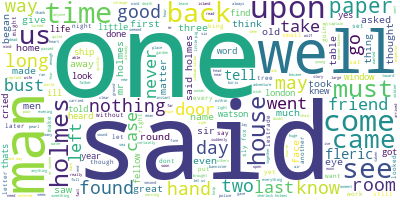

In \[42\]:

    from sklearn.feature_extraction.text import CountVectorizer
    import numpy as np

    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set_style('whitegrid')

In \[43\]:

    # Helper function
    def plot_10_most_common_words(count_data, count_vectorizer):
        import matplotlib.pyplot as plt
        words = count_vectorizer.get_feature_names()
        total_counts = np.zeros(len(words))
        for t in count_data:
            total_counts+=t.toarray()[0]
        
        count_dict = (zip(words, total_counts))
        count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
        words = [w[0] for w in count_dict]
        counts = [w[1] for w in count_dict]
        x_pos = np.arange(len(words)) 
        
        plt.figure(2, figsize=(15, 15/1.6180))
        plt.subplot(title='10 most common words')
        sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
        sns.barplot(x_pos, counts, palette='husl')
        plt.xticks(x_pos, words, rotation=90) 
        plt.xlabel('words')
        plt.ylabel('counts')
        plt.show()

In \[44\]:

    # Initialise the count vectorizer with the English stop words
    count_vectorizer = CountVectorizer(stop_words='english')

    # Fit and transform the processed titles
    count_data = count_vectorizer.fit_transform(listOfFiles)

    # Visualise the 10 most common words
    plot_10_most_common_words(count_data, count_vectorizer)

    C:\Users\Harshal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
      warnings.warn(

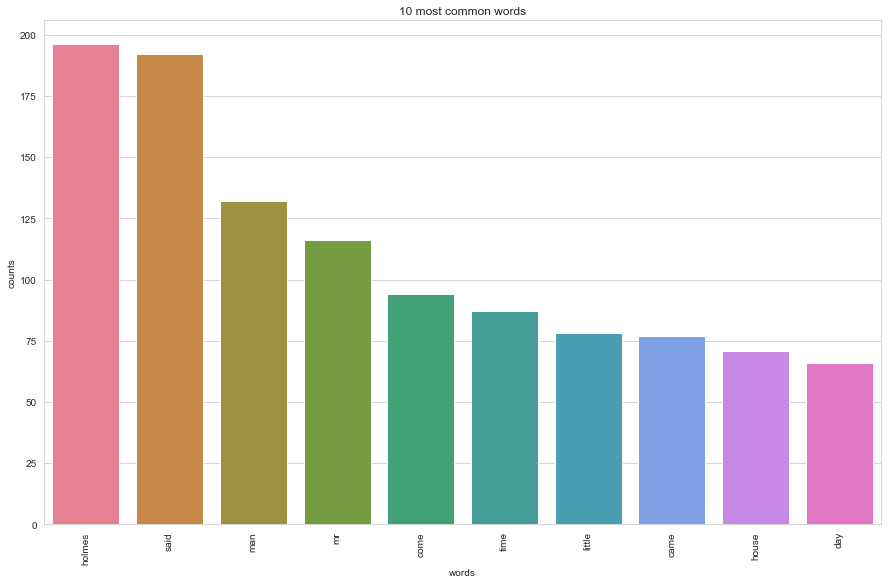

# 11) List down the 10 words in each of the Topics Extracted. (2 Marks)<a href="#11)-List-down-the-10-words-in-each-of-the-Topics-Extracted.-(2-Marks)" class="anchor-link">¶</a>

In \[45\]:

    import warnings
    warnings.simplefilter("ignore", DeprecationWarning)

    # Load the LDA model from sk-learn
    from sklearn.decomposition import LatentDirichletAllocation as LDA
     
    # Helper function
    def print_topics(model, count_vectorizer, n_top_words):
        words = count_vectorizer.get_feature_names()
        for topic_idx, topic in enumerate(model.components_):
            print("\nTopic #%d:" % topic_idx)
            print(" ".join([words[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
            
    # Tweak the two parameters below (use int values below 15)
    number_topics = 10
    number_words = 10

    # Create and fit the LDA model
    lda = LDA(n_components=number_topics)
    lda.fit(count_data)

    # Print the topics found by the LDA model
    print("Topics found via LDA:")
    print_topics(lda, count_vectorizer, number_words)

    Topics found via LDA:

    Topic #0:
    fleric boris moons thou armour flerics hand arch children body

    Topic #1:
    yes tell dont watched voices dancing takes budge visited collapsed

    Topic #2:
    yes tell dont watched voices dancing takes budge visited collapsed

    Topic #3:
    said holmes come man papers time shall openshaw think day

    Topic #4:
    yes tell dont watched voices dancing takes budge visited collapsed

    Topic #5:
    old seven raiko samurai robbers said men emperor mountain wind

    Topic #6:
    wife sausages woodcutter nose elf woodcutters wish tree wishes thinking

    Topic #7:
    rabbit fox sly little mrs mr rabs hedgehog old home

    Topic #8:
    holmes mr said sir man room door soames table left

    Topic #9:
    holmes said man mr house time come day little came

In \[ \]: